<a href="https://colab.research.google.com/github/fbeilstein/topological_data_analysis/blob/master/lecture_4_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA

In [ ]:
#@title Manual PCA
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_12_principal_component_analysis/demo_pca.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>


# PCA introduction

Suppose $A$ is a matrix with data that we have centralized beforehand.
BTW, to do that we need to take average of each feature among all samples and subtract from respective feature reads in samples. It's also a good idea to perform normalization, that means we need additionally divide data rows by  respective sample std's (square roots of the sample variances):

$$
\text{Normalization = Centralization + Scaling (divide by respective sample std)}.
$$

In [ ]:
#@title ## Centralization + normalization
%%html
<svg width="256.31mm" height="84.079mm" version="1.1" viewBox="0 0 278.45 85.695" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".39216" fill-rule="evenodd" stroke="#000" stroke-opacity=".39216" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mstart" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".39216" fill-rule="evenodd" stroke="#000" stroke-opacity=".39216" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".54106" fill-rule="evenodd" stroke="#f00" stroke-opacity=".54106" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".54106" fill-rule="evenodd" stroke="#00f" stroke-opacity=".54106" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00a500" fill-opacity=".54106" fill-rule="evenodd" stroke="#00a500" stroke-opacity=".54106" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(2.4233 1.0907)" stroke="#000">
  <g fill-opacity=".091787" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="7.8598" stroke-width=".15">
   <rect x="50.88" y="12.573" width="8.6935" height="53.862"/>
   <rect x="67.039" y="12.856" width="8.6935" height="53.862"/>
   <rect x="102.19" y="14.742" width="8.6935" height="51.911" stroke-width=".15"/>
  </g>
  <g fill="none">
   <rect x="83.632" y="12.828" width="8.6935" height="53.862" fill="#000" fill-opacity=".091787" stroke="none"/>
  </g>
  <g transform="matrix(1.5,0,0,-1.5,-167.1,1179.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$A=(\\cdots)$\n" xml:space="preserve"><g stroke-width="0"><path d="m110.98 758.59-0.0332-0.0497-0.0333-0.0497-0.0332-0.0497-0.0249-0.0414-0.0334-0.0414-0.0332-0.0332-0.0249-0.0414-0.0332-0.0334-0.0332-0.0332-0.0333-0.0332-0.0249-0.0249-0.0333-0.0249-0.0664-0.0498-0.0249-0.017-0.0332-0.0249-0.0333-0.017-0.0664-0.034-0.0249-0.017-0.0332-8e-3 -0.0333-8e-3 -0.0332-0.017-0.0996-0.024h-0.0333l-0.0332-8e-3 -0.0662-8e-3 -0.0664-8e-3c-0.0995-8e-3 -0.17402-8e-3 -0.17402-0.16573 0-0.0497 0.0414-0.0829 0.1078-0.0829 0.22375 0 0.48066 0.0249 0.71269 0.0249 0.27347 0 0.56352-0.0249 0.82042-0.0249 0.0497 0 0.16574 0 0.16574 0.1492 0 0.091-0.0745 0.0995-0.14084 0.0995-0.18232 0.017-0.38121 0.0828-0.38121 0.29006 0 0.0995 0.0498 0.1906 0.116 0.30662l0.62153 1.0525h2.0801l-0.0249 0.2569h-1.8977l1.6326 2.7182 0.26519-2.7182 0.0249-0.2569c0.017-0.17403 0.13266-1.2928 0.13266-1.3756 0-0.24862-0.43093-0.27349-0.59668-0.27349-0.11601 0-0.19888 0-0.19888-0.16573 0-0.0829 0.0995-0.0829 0.11601-0.0829 0.33977 0 0.69612 0.0249 1.0359 0.0249 0.20718 0 0.72099-0.0249 0.92817-0.0249 0.0497 0 0.14919 0 0.14919 0.15737 0 0.091-0.0828 0.091-0.1906 0.091-0.5138 0-0.5138 0.058-0.53867 0.29835l-0.49722 5.1463c-0.017 0.16574-0.017 0.19888-0.15738 0.19888-0.13267 0-0.16574-0.058-0.21546-0.14084z"/><path d="m121.94 760.89h0.0438l5e-3 5e-3h0.04l5e-3 5e-3h0.015l5e-3 5e-3h5e-3l5e-3 5e-3h5e-3l0.03 0.03v5e-3l5e-3 5e-3v0.01h5e-3v0.03c0 0.0972-0.0923 0.0972-0.16037 0.0972h-2.9014c-0.068 0-0.16038 0-0.16038-0.0972s0.0923-0.0972 0.16524-0.0972z"/><path d="m121.95 759.96h0.0746l0.01 5e-3h0.01l0.01 5e-3h5e-3l5e-3 5e-3h5e-3l5e-3 5e-3h5e-3l0.015 0.015h5e-3v0.01h5e-3v5e-3l5e-3 5e-3v0.01l5e-3 5e-3v0.03c0 0.0923-0.0923 0.0923-0.16524 0.0923h-2.8917c-0.0729 0-0.16524 0-0.16524-0.0923 0-0.0972 0.0923-0.0972 0.16038-0.0972z"/><path d="m143.25 742.48v0.108h-0.01v0.072h-0.01v0.036l-0.01 0.036v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036l-0.05 0.18v0.036h-0.01l-0.04 0.144c-1.25 4.5059-1.56 11.283-1.56 16.762 0 6.2362 0.37 12.472 1.6 16.942 0.13 0.43258 0.13 0.50467 0.13 0.61281 0 0.25233-0.04 0.36049-0.1 0.36049-0.1 0-1-2.4512-1.58-6.9932-0.51-3.9292-0.63-7.9305-0.63-10.922 0-2.8117 0.11-7.1374 0.66-11.175 0.59-4.3978 1.45-6.7409 1.55-6.7409 0.06 0 0.1 0.10819 0.1 0.36047z"/><path d="m169.12 754.54v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m170.53 754.54v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m171.93 754.54v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m187.25 742v0.108h0.01v0.072h0.01v0.036l0.01 0.036v0.036h0.01v0.036h0.01v0.036h0.01v0.036h0.01v0.036l0.05 0.18v0.036h0.01l0.04 0.144c1.25 4.5059 1.56 11.283 1.56 16.762 0 6.2362-0.37 12.472-1.6 16.942-0.13 0.43258-0.13 0.50467-0.13 0.61281 0 0.25233 0.04 0.36049 0.1 0.36049 0.1 0 1-2.4512 1.58-6.9932 0.51-3.9292 0.63-7.9305 0.63-10.922 0-2.8117-0.11-7.1374-0.66-11.175-0.59-4.3978-1.45-6.7409-1.55-6.7409-0.06 0-0.1 0.10819-0.1 0.36047z" fill-rule="evenodd" stroke-miterlimit="10.433"/><path d="m200.63 741.56v0.108h-0.01v0.072h-0.01v0.036l-0.01 0.036v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036l-0.05 0.18v0.036h-0.01l-0.04 0.144c-1.25 4.5059-1.56 11.283-1.56 16.762 0 6.2362 0.37 12.472 1.6 16.942 0.13 0.43258 0.13 0.50467 0.13 0.61281 0 0.25233-0.04 0.36049-0.1 0.36049-0.1 0-1-2.4512-1.58-6.9932-0.51-3.9292-0.63-7.9305-0.63-10.922 0-2.8117 0.11-7.1374 0.66-11.175 0.59-4.3978 1.45-6.7409 1.55-6.7409 0.06 0 0.1 0.10819 0.1 0.36047z" fill-rule="evenodd" stroke-miterlimit="10.433"/></g><g transform="rotate(-90,220.08,759.69)"><g fill-opacity="0" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="7.8598" stroke-width=".1"><g fill-opacity=".091787"><rect transform="scale(1,-1)" x="203.05" y="-777.2" width="5.7956" height="35.908"/><rect transform="scale(1,-1)" x="212.47" y="-777.35" width="5.7956" height="35.908"/><rect transform="scale(1,-1)" x="231.82" y="-777.87" width="5.7956" height="35.908"/></g><g fill="#a0a0a0"><path transform="matrix(0 .19163 .19163 0 188.48 654)" d="m274.83 69.666c-0.83738 2.247-0.14198 4.851-0.36943 7.2397v58.782c0.55857 1.8493 2.9714 1.0306 4.448 0.91562 8.6009-1.9242 14.48-9.0389 21.136-14.242 1.6112-1.4715 3.6683-2.2615 5.7332-2.7504 1.2984-1.1922 0.33568-3.3998 0.63218-5.0121v-44.094c-0.64267-2.0227-3.3281-0.80112-4.9168-1.1339-8.7169 0.07001-17.486-0.14006-26.17 0.10511l-0.27136 0.10511z"/><path transform="matrix(0 .19163 .19163 0 188.48 654)" d="m274.83 69.666c-0.83738 2.247-0.14198 4.851-0.36943 7.2397v58.782c0.55857 1.8493 2.9714 1.0306 4.448 0.91562 8.6009-1.9242 14.48-9.0389 21.136-14.242 1.6112-1.4715 3.6683-2.2615 5.7332-2.7504 1.2984-1.1922 0.33568-3.3998 0.63218-5.0121v-44.094c-0.64267-2.0227-3.3281-0.80112-4.9168-1.1339-8.7169 0.07001-17.486-0.14006-26.17 0.10511l-0.27136 0.10511z"/><path transform="matrix(0 .19163 .19163 0 188.48 654)" d="m274.83 69.666c-0.83738 2.247-0.14198 4.851-0.36943 7.2397v58.782c0.55857 1.8493 2.9714 1.0306 4.448 0.91562 8.6009-1.9242 14.48-9.0389 21.136-14.242 1.6112-1.4715 3.6683-2.2615 5.7332-2.7504 1.2984-1.1922 0.33568-3.3998 0.63218-5.0121v-44.094c-0.64267-2.0227-3.3281-0.80112-4.9168-1.1339-8.7169 0.07001-17.486-0.14006-26.17 0.10511l-0.27136 0.10511z"/></g><g fill-opacity=".091787"><rect transform="scale(1,-1)" x="222.27" y="-777.35" width="5.7956" height="35.908"/><rect transform="scale(1,-1)" x="201.33" y="-803.31" width="9.6204" height="9.476"/><rect transform="scale(1,-1)" x="210.95" y="-812.78" width="9.6204" height="9.476"/><rect transform="scale(1,-1)" x="230.19" y="-831.74" width="9.6204" height="9.476"/><rect transform="scale(1,-1)" x="220.57" y="-822.26" width="9.6204" height="9.476"/></g></g><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m224.06 759.98v6e-3l-3e-3 9e-3v0.0149l-3e-3 9e-3 -3e-3 6e-3 -3e-3 9e-3 -3e-3 6e-3 -3e-3 9e-3 -8e-3 0.0168-6e-3 6e-3 -3e-3 6e-3 -0.0168 0.0168-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.0112 6e-3 -9e-3 3e-3 -6e-3 3e-3 -8e-3 3e-3 -6e-3 3e-3h-9e-3l-6e-3 3e-3h-0.0187l-6e-3 3e-3c-0.0862 0-0.1575-0.0713-0.1575-0.1575 0-0.0861 0.0713-0.15749 0.1575-0.15749s0.1575 0.0713 0.1575 0.15749z"/><path d="m225.37 759.98v0.0149l-3e-3 9e-3v6e-3l-3e-3 9e-3 -3e-3 6e-3v9e-3l-3e-3 6e-3 -3e-3 9e-3 -6e-3 6e-3 -6e-3 0.0112-6e-3 6e-3 -3e-3 6e-3 -0.0168 0.0168-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.0112 6e-3 -9e-3 3e-3 -0.0112 6e-3 -9e-3 3e-3h-9e-3l-6e-3 3e-3h-0.0149l-9e-3 3e-3c-0.0861 0-0.1575-0.0713-0.1575-0.1575 0-0.0861 0.0713-0.15749 0.1575-0.15749 0.0861 0 0.1575 0.0713 0.1575 0.15749z"/><path d="m226.69 759.98v0.0149l-3e-3 9e-3v6e-3l-3e-3 9e-3v6e-3l-3e-3 9e-3 -3e-3 6e-3 -3e-3 9e-3 -6e-3 6e-3 -6e-3 0.0112-6e-3 6e-3 -3e-3 6e-3 -0.0252 0.0252-6e-3 3e-3 -9e-3 6e-3 -0.0168 8e-3 -9e-3 3e-3 -6e-3 3e-3 -9e-3 3e-3h-6e-3l-9e-3 3e-3h-0.0149l-9e-3 3e-3c-0.0862 0-0.1575-0.0713-0.1575-0.1575 0-0.0861 0.0713-0.15749 0.1575-0.15749s0.1575 0.0713 0.1575 0.15749z"/></g></g><g fill-rule="evenodd" stroke-miterlimit="10.433"><path d="m240.25 741.68v0.108h0.01v0.072h0.01v0.036l0.01 0.036v0.036h0.01v0.036h0.01v0.036h0.01v0.036h0.01v0.036l0.05 0.18v0.036h0.01l0.04 0.144c1.25 4.5059 1.56 11.283 1.56 16.762 0 6.2362-0.37 12.472-1.6 16.942-0.13 0.43258-0.13 0.50467-0.13 0.61281 0 0.25233 0.04 0.36049 0.1 0.36049 0.1 0 1-2.4512 1.58-6.9932 0.51-3.9292 0.63-7.9305 0.63-10.922 0-2.8117-0.11-7.1374-0.66-11.175-0.59-4.3978-1.45-6.7409-1.55-6.7409-0.06 0-0.1 0.10819-0.1 0.36047z" stroke-width="0"/><path d="m196.04 759.69h0.0573l6e-3 6e-3h0.0501l6e-3 6e-3h0.0187l6e-3 6e-3h6e-3l6e-3 6e-3h6e-3l0.036 0.036v6e-3l6e-3 6e-3v0.012h6e-3v0.036c-1e-5 0.12733-0.12096 0.12733-0.21009 0.12733h-3.8006c-0.0891 0-0.21008 0-0.21008-0.12733 0-0.12732 0.12096-0.12732 0.21645-0.12732z" stroke-width="0"/><g transform="matrix(1.5,0,0,-1.5,-261.87,1212.9)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$\\text{sample 1}$\n$\\text{sample 1}$\n$\\text{sample }\\dots$\n$\\text{sample n}$\n$s=$\n" xml:space="preserve"><g fill-opacity=".78431"><g stroke-width="0"><path d="m270.65 287.45h4e-3l4e-3 1e-3h4e-3l4e-3 1e-3 7e-3 1e-3 4e-3 1e-3 0.028 4e-3 0.01 4e-3 7e-3 4e-3 7e-3 1e-3 0.01 4e-3 7e-3 4e-3 0.01 4e-3 0.035 0.02 7e-3 7e-3 8e-3 0.014 4e-3 0.01 1e-3 4e-3 4e-3 4e-3 5e-3 0.02v4e-3l1e-3 4e-3v4e-3l1e-3 4e-3v0.015c0 0.0942-0.0648 0.16806-0.20667 0.16806-0.15503 0-0.22151-0.10512-0.2566-0.26214-4e-3 -0.0221-7e-3 -0.0296-0.0258-0.0296-0.0241 0-0.0241 0.0125-0.0241 0.0443v0.24369c0 0.0296 0 0.0422 0.021 0.0422 9e-3 0 9e-3 -1e-3 0.0461-0.035 4e-3 -4e-3 4e-3 -7e-3 0.037-0.0423 0.0811 0.0758 0.16436 0.0777 0.2031 0.0777 0.21045 0 0.29535-0.12173 0.29535-0.25471 0-0.096-0.0555-0.15136-0.0777-0.17351-0.0609-0.0589-0.13305-0.0738-0.20855-0.0887-0.10314-0.021-0.22708-0.0422-0.22708-0.14958 0-0.0648 0.0479-0.14027 0.20669-0.14027 0.20119 0 0.21043 0.16612 0.21413 0.22338 1e-3 0.0175 0.0195 0.0175 0.0221 0.0175 0.0241 0 0.0241-0.01 0.0241-0.0443v-0.18632c0-0.0316 0-0.0443-0.021-0.0443-0.01 0-0.0125 0-0.0369 0.0223-4e-3 7e-3 -0.0239 0.0239-0.0316 0.0296-0.0682-0.0517-0.14399-0.0517-0.17155-0.0517-0.22522 0-0.29538 0.12356-0.29538 0.22704 0 0.0628 0.0296 0.11446 0.0794 0.15504 0.0589 0.0479 0.11069 0.0593 0.24365 0.0849z"/><path d="m271.6 287.66 1e-3 7e-3v4e-3l3e-3 0.021 1e-3 4e-3 1e-3 7e-3 1e-3 4e-3 4e-3 7e-3 4e-3 4e-3 1e-3 7e-3 8e-3 8e-3 4e-3 7e-3 0.036 0.036 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3h7e-3l7e-3 1e-3h0.017c0.0388 0 0.15154-0.0241 0.15154-0.1735v-0.10314h-0.0463v0.10314c0 0.1071-0.0463 0.11811-0.0665 0.11811-0.0608 0-0.0682-0.0831-0.0682-0.0923v-0.36735c0-0.0758 0-0.14773-0.0664-0.21598-0.0718-0.0718-0.16436-0.1016-0.2529-0.1016-0.14962 0-0.2769 0.0868-0.2769 0.20858 0 0.0535 0.0369 0.0849 0.0847 0.0849 0.0519 0 0.0849-0.035 0.0849-0.0831 0-0.0223-0.01-0.0831-0.094-0.0849 0.0499-0.0648 0.14025-0.0849 0.19931-0.0849 0.0887 0 0.1939 0.072 0.1939 0.23444v0.28982c0 0.17544-0.13306 0.23815-0.21413 0.23815-0.0904 0-0.16613-0.0648-0.16613-0.15696 0-0.1016 0.0777-0.25292 0.38027-0.264v-0.0388c-0.0942 4e-3 -0.22336 0.01-0.33781 0.0664-0.13851 0.0628-0.18458 0.157-0.18458 0.23817 0 0.14961 0.17914 0.19388 0.29539 0.19388 0.12006 0 0.20478-0.0718 0.23998-0.15891z"/><path d="m272.11 287.17v0.49101c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15874-4e-3 0.20857-4e-3 0.0479 0 0.144 4e-3 0.205 4e-3v-0.0553c-0.1216 0-0.14204 0-0.14204-0.0831v-0.3378c0-0.19002 0.1311-0.29354 0.24729-0.29354 0.11629 0 0.13655 0.0996 0.13655 0.20312v0.42827c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15893-4e-3 0.20857-4e-3 0.0479 0 0.14399 4e-3 0.20669 4e-3v-0.0553c-0.12384 0-0.144 0-0.144-0.0831v-0.33782c0-0.19 0.1311-0.2935 0.24921-0.2935 0.11447 0 0.1346 0.0996 0.1346 0.2031v0.42825c0 0.0831-0.021 0.0831-0.14219 0.0831v0.0553c0.0646-1e-3 0.15696-4e-3 0.20666-4e-3 0.0479 0 0.14399 4e-3 0.20667 4e-3v-0.0553c-0.096 0-0.14206 0-0.14399-0.0553v-0.35075c0-0.15699 0-0.21411-0.0571-0.28058-0.0258-0.0311-0.087-0.0682-0.19195-0.0682-0.15505 0-0.23632 0.11069-0.26767 0.18087-0.0258-0.16048-0.16244-0.18087-0.24555-0.18087-0.13291 0-0.21966 0.0793-0.27135 0.19388v-0.19388l-0.26028 0.021v0.0573c0.12914 0 0.144 0.0125 0.144 0.10314z"/><path d="m273.76 287.11v-0.12159l-0.2658 0.021v0.0571c0.13111 0 0.14398 0.01 0.14398 0.0923v0.8584c0 0.0812-0.021 0.0812-0.14398 0.0812v0.0571c0.0628-1e-3 0.15872-4e-3 0.20666-4e-3 0.0499 0 0.14399 4e-3 0.20855 4e-3v-0.0571c-0.12354 0-0.14399 0-0.14399-0.0812v-0.32577l0.0258-0.0239c-0.0258-0.0388-0.0258-0.0408-0.0258-0.0777v-0.40797c0.0536-0.094 0.14399-0.14757 0.23814-0.14757 0.13291 0 0.24553 0.16241 0.24553 0.3692 0 0.22151-0.12914 0.37655-0.26398 0.37655-0.0738 0-0.14398-0.0368-0.19389-0.11251l-0.0258 0.0239c0.01 0.0296 0.087 0.12719 0.22708 0.12719 0.21782 0 0.40979-0.17893 0.40979-0.41534 0-0.2326-0.17894-0.41532-0.38395-0.41532-0.14398 0-0.22153 0.0811-0.25844 0.12188z"/><path d="m274.79 286.53-0.26583 0.021v0.0571c0.12914 0 0.14399 0.0125 0.14399 0.1016v0.95437c0 0.0831-0.021 0.0831-0.14399 0.0831v0.0553c0.0608-1e-3 0.15874-4e-3 0.20501-4e-3 0.0463 0 0.13459 4e-3 0.2031 4e-3v-0.0553c-0.12355 0-0.14204 0-0.14204-0.0831z"/><path d="m275.18 287.38 1e-3 -0.0388c0.01-0.27321 0.1661-0.31937 0.22892-0.31937 0.19001 0 0.20856 0.24738 0.20856 0.31937h-0.43751l-1e-3 0.0388h0.51501c0.0408 0 0.0463 0 0.0463-0.0388 0-0.18088-0.0996-0.35997-0.33042-0.35997-0.21416 0-0.38214 0.19001-0.38214 0.41903 0 0.24552 0.19195 0.42275 0.40428 0.42275 0.22521 0 0.30828-0.20312 0.30828-0.23815 0-0.0195-0.0155-0.0222-0.0239-0.0222-0.0175 0-0.021 0.01-0.0241 0.0258-0.0648 0.19-0.23074 0.19-0.2492 0.19-0.0923 0-0.16611-0.0553-0.20856-0.12383-0.0551-0.0887-0.0551-0.20856-0.0551-0.27504z"/><path d="m276.53 286.6v-0.019l-1e-3 -1e-3v-2e-3l-1e-3 -1e-3v-1e-3l-1e-3 -1e-3h-1e-3v-1e-3h-1e-3l-1e-3 -1e-3h-3e-3l-1e-3 -1e-3h-0.012c-0.11433 0.1181-0.27689 0.1181-0.33597 0.1181v0.0553c0.0369 0 0.14594 0 0.24183-0.0463v0.94883c0 0.0665-4e-3 0.0887-0.17157 0.0887h-0.0593v0.0553c0.0647-4e-3 0.2252-4e-3 0.29906-4e-3 0.0718 0 0.23257 0 0.29719 4e-3v-0.0553h-0.0589c-0.16611 0-0.17155-0.021-0.17155-0.0887z"/><path d="m298.74 287.05v0.57384c0 0.0974-0.0244 0.0974-0.16828 0.0974v0.0645c0.0755-1e-3 0.18552-4e-3 0.24374-4e-3 0.056 0 0.16828 4e-3 0.24151 4e-3v-0.0645c-0.1444 0-0.16826 0-0.16826-0.0974v-0.39476c0-0.22211 0.15321-0.34308 0.29121-0.34308 0.1338 0 0.15732 0.1165 0.15732 0.23739v0.5005c0 0.0974-0.0244 0.0974-0.16601 0.0974v0.0645c0.0733-1e-3 0.18347-4e-3 0.24154-4e-3 0.056 0 0.16828 4e-3 0.24152 4e-3v-0.0645c-0.11228 0-0.16602 0-0.16828-0.0646v-0.40992c0-0.18347 0-0.25023-0.0665-0.3279-0.0303-0.0365-0.10146-0.0796-0.22662-0.0796-0.1555 0-0.25671 0.0927-0.31714 0.2266v-0.2266l-0.30418 0.0245v0.0671c0.15109 0 0.16829 0.0146 0.16829 0.1206z" stroke-width="0"/><g stroke="none"><path d="m278.1 287.4h4e-3l4e-3 1e-3h4e-3l4e-3 1e-3 7e-3 1e-3 4e-3 1e-3 0.028 4e-3 0.01 4e-3 7e-3 4e-3 7e-3 1e-3 0.01 4e-3 7e-3 4e-3 0.01 4e-3 0.035 0.02 7e-3 7e-3 8e-3 0.014 4e-3 0.01 1e-3 4e-3 4e-3 4e-3 5e-3 0.02v4e-3l1e-3 4e-3v4e-3l1e-3 4e-3v0.015c0 0.0942-0.0648 0.16806-0.20667 0.16806-0.15503 0-0.22151-0.10512-0.2566-0.26214-4e-3 -0.0221-7e-3 -0.0296-0.0258-0.0296-0.0241 0-0.0241 0.0125-0.0241 0.0443v0.24369c0 0.0296 0 0.0422 0.021 0.0422 9e-3 0 9e-3 -1e-3 0.0461-0.035 4e-3 -4e-3 4e-3 -7e-3 0.037-0.0423 0.0811 0.0758 0.16436 0.0777 0.2031 0.0777 0.21045 0 0.29535-0.12173 0.29535-0.25471 0-0.096-0.0555-0.15136-0.0777-0.17351-0.0609-0.0589-0.13305-0.0738-0.20855-0.0887-0.10314-0.021-0.22708-0.0422-0.22708-0.14958 0-0.0648 0.0479-0.14027 0.20669-0.14027 0.20119 0 0.21043 0.16612 0.21413 0.22338 1e-3 0.0175 0.0195 0.0175 0.0221 0.0175 0.0241 0 0.0241-0.01 0.0241-0.0443v-0.18632c0-0.0316 0-0.0443-0.021-0.0443-0.01 0-0.0125 0-0.0369 0.0223-4e-3 7e-3 -0.0239 0.0239-0.0316 0.0296-0.0682-0.0517-0.14399-0.0517-0.17155-0.0517-0.22522 0-0.29538 0.12356-0.29538 0.22704 0 0.0628 0.0296 0.11446 0.0794 0.15504 0.0589 0.0479 0.11069 0.0593 0.24365 0.0849z"/><path d="m279.05 287.61 9.9e-4 7e-3v4e-3l3e-3 0.021 1e-3 4e-3 1e-3 7e-3 9.9e-4 4e-3 4e-3 7e-3 4e-3 4e-3 1e-3 7e-3 8e-3 8e-3 4e-3 7e-3 0.036 0.036 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3h7e-3l7e-3 1e-3h0.017c0.0388 0 0.15154-0.0241 0.15154-0.1735v-0.10314h-0.0463v0.10314c0 0.1071-0.0463 0.11811-0.0665 0.11811-0.0608 0-0.0682-0.0831-0.0682-0.0923v-0.36735c0-0.0758 0-0.14773-0.0664-0.21598-0.0718-0.0718-0.16434-0.1016-0.25288-0.1016-0.14962 0-0.2769 0.0868-0.2769 0.20858 0 0.0535 0.0369 0.0849 0.0847 0.0849 0.0519 0 0.0849-0.035 0.0849-0.0831 0-0.0223-0.01-0.0831-0.094-0.0849 0.0499-0.0648 0.14025-0.0849 0.19931-0.0849 0.0887 0 0.1939 0.072 0.1939 0.23444v0.28982c0 0.17544-0.13306 0.23815-0.21413 0.23815-0.0904 0-0.16613-0.0648-0.16613-0.15696 0-0.1016 0.0777-0.25292 0.38027-0.264v-0.0388c-0.0942 4e-3 -0.22336 0.01-0.33781 0.0664-0.13851 0.0628-0.18458 0.157-0.18458 0.23817 0 0.14961 0.17914 0.19388 0.29539 0.19388 0.12006 0 0.20478-0.0718 0.23998-0.15891z"/><path d="m279.56 287.12v0.49101c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15874-4e-3 0.20857-4e-3 0.0479 0 0.144 4e-3 0.205 4e-3v-0.0553c-0.1216 0-0.14204 0-0.14204-0.0831v-0.3378c0-0.19002 0.1311-0.29354 0.24729-0.29354 0.11629 0 0.13655 0.0996 0.13655 0.20312v0.42827c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15893-4e-3 0.20857-4e-3 0.0479 0 0.14399 4e-3 0.20669 4e-3v-0.0553c-0.12384 0-0.144 0-0.144-0.0831v-0.33782c0-0.19 0.1311-0.2935 0.24921-0.2935 0.11447 0 0.1346 0.0996 0.1346 0.2031v0.42825c0 0.0831-0.021 0.0831-0.14219 0.0831v0.0553c0.0646-1e-3 0.15696-4e-3 0.20666-4e-3 0.0479 0 0.14399 4e-3 0.20667 4e-3v-0.0553c-0.096 0-0.14206 0-0.14399-0.0553v-0.35075c0-0.15699 0-0.21411-0.0571-0.28058-0.0258-0.0311-0.087-0.0682-0.19195-0.0682-0.15505 0-0.23632 0.11069-0.26767 0.18087-0.0258-0.16048-0.16244-0.18087-0.24555-0.18087-0.13291 0-0.21966 0.0793-0.27135 0.19388v-0.19388l-0.26028 0.021v0.0573c0.12914 0 0.144 0.0125 0.144 0.10314z"/><path d="m281.21 287.06v-0.12159l-0.2658 0.021v0.0571c0.13111 0 0.14398 0.01 0.14398 0.0923v0.8584c0 0.0812-0.021 0.0812-0.14398 0.0812v0.0571c0.0628-9.9e-4 0.15872-4e-3 0.20666-4e-3 0.0499 0 0.14399 4e-3 0.20855 4e-3v-0.0571c-0.12354 0-0.14399 0-0.14399-0.0812v-0.32577l0.0258-0.0239c-0.0258-0.0388-0.0258-0.0408-0.0258-0.0777v-0.40797c0.0536-0.094 0.14399-0.14757 0.23814-0.14757 0.13291 0 0.24553 0.16241 0.24553 0.3692 0 0.22151-0.12914 0.37655-0.26398 0.37655-0.0738 0-0.14398-0.0368-0.19389-0.11251l-0.0258 0.0239c0.01 0.0296 0.087 0.12719 0.22708 0.12719 0.21782 0 0.40979-0.17893 0.40979-0.41534 0-0.2326-0.17894-0.41532-0.38395-0.41532-0.14398 0-0.22153 0.0811-0.25844 0.12188z"/><path d="m282.24 286.48-0.26583 0.021v0.0571c0.12914 0 0.14399 0.0125 0.14399 0.1016v0.95437c0 0.0831-0.021 0.0831-0.14399 0.0831v0.0553c0.0608-1e-3 0.15874-4e-3 0.20501-4e-3 0.0463 0 0.13459 4e-3 0.2031 4e-3v-0.0553c-0.12355 0-0.14204 0-0.14204-0.0831z"/><path d="m282.63 287.33 9.9e-4 -0.0388c0.01-0.27321 0.1661-0.31937 0.22892-0.31937 0.19001 0 0.20856 0.24738 0.20856 0.31937h-0.43751l-9.9e-4 0.0388h0.51501c0.0408 0 0.0463 0 0.0463-0.0388 0-0.18088-0.0996-0.35997-0.33042-0.35997-0.21416 0-0.38214 0.19001-0.38214 0.41903 0 0.24552 0.19195 0.42275 0.40428 0.42275 0.22521 0 0.30828-0.20312 0.30828-0.23815 0-0.0195-0.0155-0.0222-0.0239-0.0222-0.0175 0-0.021 0.01-0.0241 0.0258-0.0648 0.19-0.23074 0.19-0.2492 0.19-0.0923 0-0.16611-0.0553-0.20856-0.12383-0.0551-0.0887-0.0551-0.20856-0.0551-0.27504z"/><path d="m293.06 287.41h4e-3l4e-3 1e-3h4e-3l4e-3 1e-3 7e-3 1e-3 4e-3 1e-3 0.028 4e-3 0.01 4e-3 7e-3 4e-3 7e-3 1e-3 0.01 4e-3 7e-3 4e-3 0.01 4e-3 0.035 0.02 7e-3 7e-3 8e-3 0.014 4e-3 0.01 1e-3 4e-3 4e-3 4e-3 5e-3 0.02v4e-3l1e-3 4e-3v4e-3l1e-3 4e-3v0.015c0 0.0942-0.0648 0.16806-0.20667 0.16806-0.15503 0-0.22151-0.10512-0.2566-0.26214-4e-3 -0.0221-7e-3 -0.0296-0.0258-0.0296-0.0241 0-0.0241 0.0125-0.0241 0.0443v0.24369c0 0.0296 0 0.0422 0.021 0.0422 9e-3 0 9e-3 -1e-3 0.0461-0.035 4e-3 -4e-3 4e-3 -7e-3 0.037-0.0423 0.0811 0.0758 0.16436 0.0777 0.2031 0.0777 0.21045 0 0.29535-0.12173 0.29535-0.25471 0-0.096-0.0555-0.15136-0.0777-0.17351-0.0609-0.0589-0.13305-0.0738-0.20855-0.0887-0.10314-0.021-0.22708-0.0422-0.22708-0.14958 0-0.0648 0.0479-0.14027 0.20669-0.14027 0.20119 0 0.21043 0.16612 0.21413 0.22338 1e-3 0.0175 0.0195 0.0175 0.0221 0.0175 0.0241 0 0.0241-0.01 0.0241-0.0443v-0.18632c0-0.0316 0-0.0443-0.021-0.0443-0.01 0-0.0125 0-0.0369 0.0223-4e-3 7e-3 -0.0239 0.0239-0.0316 0.0296-0.0682-0.0517-0.14399-0.0517-0.17155-0.0517-0.22522 0-0.29538 0.12356-0.29538 0.22704 0 0.0628 0.0296 0.11446 0.0794 0.15504 0.0589 0.0479 0.11069 0.0593 0.24365 0.0849z"/><path d="m294.01 287.62 9.9e-4 7e-3v4e-3l3e-3 0.021 1e-3 4e-3 1e-3 7e-3 9.9e-4 4e-3 4e-3 7e-3 4e-3 4e-3 1e-3 7e-3 8e-3 8e-3 4e-3 7e-3 0.036 0.036 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3h7e-3l7e-3 1e-3h0.017c0.0388 0 0.15154-0.0241 0.15154-0.1735v-0.10314h-0.0463v0.10314c0 0.1071-0.0463 0.11811-0.0665 0.11811-0.0608 0-0.0682-0.0831-0.0682-0.0923v-0.36735c0-0.0758 0-0.14773-0.0664-0.21598-0.0718-0.0718-0.16434-0.1016-0.25288-0.1016-0.14962 0-0.2769 0.0868-0.2769 0.20858 0 0.0535 0.0369 0.0849 0.0847 0.0849 0.0519 0 0.0849-0.035 0.0849-0.0831 0-0.0223-0.01-0.0831-0.094-0.0849 0.0499-0.0648 0.14025-0.0849 0.19931-0.0849 0.0887 0 0.1939 0.072 0.1939 0.23444v0.28982c0 0.17544-0.13306 0.23815-0.21413 0.23815-0.0904 0-0.16613-0.0648-0.16613-0.15696 0-0.1016 0.0777-0.25292 0.38027-0.264v-0.0388c-0.0942 4e-3 -0.22336 0.01-0.33781 0.0664-0.13851 0.0628-0.18458 0.157-0.18458 0.23817 0 0.14961 0.17914 0.19388 0.29539 0.19388 0.12006 0 0.20478-0.0718 0.23998-0.15891z"/><path d="m294.52 287.13v0.49101c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15874-4e-3 0.20857-4e-3 0.0479 0 0.144 4e-3 0.205 4e-3v-0.0553c-0.1216 0-0.14204 0-0.14204-0.0831v-0.3378c0-0.19002 0.1311-0.29354 0.24729-0.29354 0.11629 0 0.13655 0.0996 0.13655 0.20312v0.42827c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15893-4e-3 0.20857-4e-3 0.0479 0 0.14399 4e-3 0.20669 4e-3v-0.0553c-0.12384 0-0.144 0-0.144-0.0831v-0.33782c0-0.19 0.1311-0.2935 0.24921-0.2935 0.11447 0 0.1346 0.0996 0.1346 0.2031v0.42825c0 0.0831-0.021 0.0831-0.14219 0.0831v0.0553c0.0646-1e-3 0.15696-4e-3 0.20666-4e-3 0.0479 0 0.14399 4e-3 0.20667 4e-3v-0.0553c-0.096 0-0.14206 0-0.14399-0.0553v-0.35075c0-0.15699 0-0.21411-0.0571-0.28058-0.0258-0.0311-0.087-0.0682-0.19195-0.0682-0.15505 0-0.23632 0.11069-0.26767 0.18087-0.0258-0.16048-0.16244-0.18087-0.24555-0.18087-0.13291 0-0.21966 0.0793-0.27135 0.19388v-0.19388l-0.26028 0.021v0.0573c0.12914 0 0.144 0.0125 0.144 0.10314z"/><path d="m296.17 287.07v-0.12159l-0.2658 0.021v0.0571c0.13111 0 0.14398 0.01 0.14398 0.0923v0.8584c0 0.0812-0.021 0.0812-0.14398 0.0812v0.0571c0.0628-9.9e-4 0.15872-4e-3 0.20666-4e-3 0.0499 0 0.14399 4e-3 0.20855 4e-3v-0.0571c-0.12354 0-0.14399 0-0.14399-0.0812v-0.32577l0.0258-0.0239c-0.0258-0.0388-0.0258-0.0408-0.0258-0.0777v-0.40797c0.0536-0.094 0.14399-0.14757 0.23814-0.14757 0.13291 0 0.24553 0.16241 0.24553 0.3692 0 0.22151-0.12914 0.37655-0.26398 0.37655-0.0738 0-0.14398-0.0368-0.19389-0.11251l-0.0258 0.0239c0.01 0.0296 0.087 0.12719 0.22708 0.12719 0.21782 0 0.40979-0.17893 0.40979-0.41534 0-0.2326-0.17894-0.41532-0.38395-0.41532-0.14398 0-0.22153 0.0811-0.25844 0.12188z"/><path d="m297.2 286.49-0.26583 0.021v0.0571c0.12914 0 0.14399 0.0125 0.14399 0.1016v0.95437c0 0.0831-0.021 0.0831-0.14399 0.0831v0.0553c0.0608-1e-3 0.15874-4e-3 0.20501-4e-3 0.0463 0 0.13459 4e-3 0.2031 4e-3v-0.0553c-0.12355 0-0.14204 0-0.14204-0.0831z"/><path d="m297.59 287.34 9.9e-4 -0.0388c0.01-0.27321 0.1661-0.31937 0.22892-0.31937 0.19001 0 0.20856 0.24738 0.20856 0.31937h-0.43751l-9.9e-4 0.0388h0.51501c0.0408 0 0.0463 0 0.0463-0.0388 0-0.18088-0.0996-0.35997-0.33042-0.35997-0.21416 0-0.38214 0.19001-0.38214 0.41903 0 0.24552 0.19195 0.42275 0.40428 0.42275 0.22521 0 0.30828-0.20312 0.30828-0.23815 0-0.0195-0.0155-0.0222-0.0239-0.0222-0.0175 0-0.021 0.01-0.0241 0.0258-0.0648 0.19-0.23074 0.19-0.2492 0.19-0.0923 0-0.16611-0.0553-0.20856-0.12383-0.0551-0.0887-0.0551-0.20856-0.0551-0.27504z"/></g></g><g id="content" transform="matrix(1.9269,0,0,-1.9269,-228.46,1480.1)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.0214" ns0:preamble="default_packages.tex" ns0:text="$2$\n" xml:space="preserve"><path d="m265.89 618.9 0.1015 0.0977c0.14845 0.13121 0.20591 0.18293 0.20591 0.27774 0 0.10915-0.0862 0.18483-0.20303 0.18483-0.10733 0-0.17815-0.0871-0.17815-0.17239 0-0.0527 0.0479-0.0527 0.0507-0.0527 0.0162 0 0.0498 0.0114 0.0498 0.0498 0 0.0248-0.0173 0.0497-0.0507 0.0497-7e-3 0-9e-3 0-0.0125-9.2e-4 0.0219 0.0623 0.0737 0.0967 0.12929 0.0967 0.0862 0 0.12738-0.0766 0.12738-0.15515 0-0.0757-0.0479-0.15131-0.0997-0.20974l-0.18388-0.20399c-0.0103-0.0103-0.0103-0.0125-0.0103-0.0344h0.35436l0.0267 0.16473h-0.0239c-5e-3 -0.0287-0.0114-0.0699-0.021-0.0842-7e-3 -7e-3 -0.07-7e-3 -0.091-7e-3z" fill-opacity=".78431" stroke-width="0"/></g></g><g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.22623 0 0 -.22623 204.31 449.07)" ns0:preamble="default_packages.tex" ns0:text="$$a_{11}$$\n$$a_{12}$$\n$$a_{13}$$\n$$a_{21}$$\n$$a_{21}$$\n$$a_{1n}$$\n$$a_{nn}$$\n$$a_{2n}$$\n$$a_{n1}$$\n$$a_{n2}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m302.61 691.36-0.02 0.04-0.01 0.03-0.02 0.04-0.08 0.12-0.03 0.03-0.04 0.06-0.03 0.02-0.02 0.03-0.03 0.02-0.02 0.03-0.18 0.12-0.03 0.01-0.03 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.12 0.03h-0.03l-0.04 0.01h-0.09c-1.16 0-2.4-1.46-2.4-2.91 0-0.93 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.55-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.75 0.95 1.15 0.95 0.65 0 0.79-0.81 0.79-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.84-0.7-1.12-0.7l-0.02-0.22c0.2 0 0.69 0.04 1.29 0.75 0.08-0.42 0.43-0.75 0.91-0.75 0.35 0 0.58 0.23 0.74 0.55 0.17 0.36 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.29 0.13 0.73 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.4c0.07 0.27 0.07 0.29 0.07 0.33 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m306.5 690.54v0.1h-0.01v0.04h-0.01v0.02h-0.01v0.01h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.13c-0.45-0.44-1.08-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.01 0.19v-3.54c0-0.23 0-0.32-0.7-0.32h-0.26v-0.25c0.12 0 0.98 0.02 1.24 0.02 0.22 0 1.1-0.02 1.25-0.02v0.25h-0.26c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m310.47 690.54v0.11h-0.01v0.03l-0.01 0.01v0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.01l-0.01 0.01h-0.14c-0.45-0.44-1.08-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.02 0.19v-3.54c0-0.23 0-0.32-0.71-0.32h-0.26v-0.25c0.13 0 0.99 0.02 1.24 0.02 0.22 0 1.1-0.02 1.26-0.02v0.25h-0.27c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m302.57 664.8-0.02 0.04-0.01 0.03-0.04 0.06-0.02 0.04-0.04 0.06-0.05 0.05-0.02 0.03-0.13 0.13-0.12 0.08-0.03 0.01-0.03 0.02-0.03 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.12 0.03h-0.07l-0.05 0.01h-0.04c-1.16 0-2.4-1.46-2.4-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.54-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.75 0.95 1.15 0.95 0.65 0 0.79-0.82 0.79-0.88s-0.02-0.11-0.03-0.16l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.84-0.7-1.12-0.7l-0.02-0.22c0.2 0 0.69 0.04 1.29 0.74 0.08-0.41 0.43-0.74 0.91-0.74 0.35 0 0.58 0.23 0.74 0.54 0.17 0.36 0.3 0.97 0.3 0.99 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.25-0.3 0.45 0 0.22 0.02 0.3 0.13 0.74 0.11 0.42 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m310.41 662.33v0.1l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.12c-0.45-0.44-1.08-0.45-1.37-0.45v-0.25c0.17 0 0.63 0 1.01 0.2v-3.55c0-0.23 0-0.32-0.7-0.32h-0.26v-0.25c0.12 0.01 0.98 0.03 1.24 0.03 0.22 0 1.1-0.02 1.25-0.03v0.25h-0.26c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m307.81 659.33h-0.24c-0.02-0.16-0.09-0.56-0.18-0.63-0.06-0.05-0.59-0.05-0.69-0.05h-1.29c0.74 0.65 0.98 0.84 1.4 1.17 0.52 0.41 1 0.84 1 1.5 0 0.85-0.74 1.36-1.64 1.36-0.86 0-1.45-0.6-1.45-1.25 0-0.35 0.3-0.38 0.37-0.38 0.17 0 0.37 0.11 0.37 0.36 0 0.13-0.05 0.37-0.41 0.37 0.21 0.5 0.69 0.65 1.02 0.65 0.7 0 1.06-0.54 1.06-1.11 0-0.6-0.43-1.08-0.66-1.33l-1.68-1.66c-0.07-0.06-0.07-0.07-0.07-0.27h2.88z"/><path d="m334.11 692.64-0.02 0.04-0.01 0.03-0.02 0.03-0.02 0.04-0.06 0.09-0.03 0.03-0.02 0.03-0.05 0.05-0.02 0.03-0.03 0.02-0.02 0.03-0.18 0.12-0.03 0.01-0.03 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.12 0.03h-0.03l-0.04 0.01h-0.09c-1.16 0-2.4-1.46-2.4-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.54-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.75 0.95 1.15 0.95 0.65 0 0.79-0.81 0.79-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.84-0.7-1.12-0.7l-0.02-0.22c0.2 0 0.69 0.04 1.29 0.75 0.08-0.42 0.43-0.75 0.91-0.75 0.35 0 0.58 0.23 0.74 0.55 0.17 0.35 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.46 0 0.21 0.02 0.29 0.13 0.73 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.4c0.07 0.27 0.07 0.29 0.07 0.33 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m342.74 687.48h-0.24c-0.02-0.15-0.09-0.56-0.18-0.63-0.06-0.04-0.6-0.04-0.69-0.04h-1.29c0.73 0.64 0.98 0.84 1.4 1.16 0.51 0.41 1 0.85 1 1.51 0 0.84-0.74 1.35-1.64 1.35-0.86 0-1.45-0.6-1.45-1.24 0-0.36 0.3-0.39 0.37-0.39 0.17 0 0.37 0.12 0.37 0.37 0 0.12-0.05 0.36-0.41 0.36 0.21 0.5 0.69 0.65 1.02 0.65 0.7 0 1.06-0.54 1.06-1.1 0-0.61-0.43-1.09-0.66-1.34l-1.68-1.65c-0.07-0.07-0.07-0.08-0.07-0.27h2.88z"/><path d="m337.9 690.67v0.11h-0.01v0.03l-0.02 0.02v0.01h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.13c-0.45-0.44-1.08-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.02 0.19v-3.54c0-0.23 0-0.32-0.71-0.32h-0.26v-0.25c0.13 0 0.99 0.02 1.24 0.02 0.22 0 1.1-0.02 1.26-0.02v0.25h-0.27c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m402.69 692.08-0.01 0.04-0.04 0.06-0.02 0.04-0.08 0.12-0.05 0.05-0.02 0.03-0.05 0.05-0.03 0.02-0.05 0.05-0.09 0.06-0.03 0.01-0.04 0.02-0.03 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.08 0.02-0.03 0.01h-0.04l-0.04 0.01h-0.08c-1.17 0-2.41-1.46-2.41-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.54-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.76 0.95 1.16 0.95 0.64 0 0.78-0.81 0.78-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.04-0.18-0.04-0.2-0.19-0.37-0.44-0.54-0.85-0.7-1.13-0.7l-0.02-0.22c0.2 0 0.7 0.04 1.3 0.74 0.07-0.41 0.42-0.74 0.9-0.74 0.35 0 0.58 0.23 0.74 0.55 0.17 0.35 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.45 0 0.22 0.02 0.3 0.13 0.74 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m408.34 686.95v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.01l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.03l-0.01-0.01v-0.01c0-0.16 0.13-0.23 0.24-0.23 0.13 0 0.24 0.09 0.27 0.16 0.04 0.06 0.09 0.28 0.13 0.43 0.03 0.13 0.11 0.45 0.15 0.62 0.04 0.16 0.09 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.3 0.63 0.19 0.27 0.52 0.64 1.04 0.64 0.41 0 0.42-0.36 0.42-0.49 0-0.42-0.3-1.19-0.42-1.48-0.07-0.2-0.1-0.26-0.1-0.38 0-0.37 0.31-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.13-0.12-0.16-0.56-0.47-0.84-0.75-0.84-0.14 0-0.17 0.1-0.17 0.24 0 0.16 0.04 0.25 0.16 0.57 0.08 0.21 0.37 0.95 0.37 1.34 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.35-1.18-0.63-0.05 0.48-0.46 0.63-0.75 0.63-0.3 0-0.46-0.21-0.55-0.37-0.15-0.26-0.25-0.66-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.4 0.24 0.75 0.51 0.75 0.18 0 0.23-0.16 0.23-0.35 0-0.13-0.06-0.38-0.11-0.57s-0.12-0.47-0.15-0.63z"/><path d="m406.45 690.15v0.07l-0.01 0.01v0.05l-0.01 0.01v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01h-0.03l-0.01 0.01h-0.12c-0.45-0.44-1.09-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.01 0.19v-3.55c0-0.23 0-0.32-0.7-0.32h-0.26v-0.25c0.12 0.01 0.98 0.03 1.24 0.03 0.22 0 1.1-0.02 1.25-0.03v0.25h-0.26c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m402.89 663.92-0.01 0.03-0.02 0.04-0.12 0.18-0.03 0.03-0.04 0.06-0.03 0.02-0.02 0.03-0.06 0.04-0.02 0.03-0.06 0.04-0.03 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.08 0.02h-0.03l-0.04 0.01h-0.04l-0.04 0.01h-0.04c-1.17 0-2.41-1.46-2.41-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.21c-0.5 0-0.64 0.55-0.64 0.94 0 0.5 0.32 1.72 0.55 2.17 0.31 0.59 0.76 0.96 1.16 0.96 0.64 0 0.78-0.82 0.78-0.88s-0.02-0.12-0.03-0.17l-0.5-1.94c-0.04-0.18-0.04-0.2-0.19-0.37-0.44-0.55-0.85-0.71-1.13-0.71l-0.02-0.21c0.2 0 0.7 0.04 1.3 0.74 0.07-0.42 0.42-0.74 0.9-0.74 0.35 0 0.58 0.22 0.74 0.54 0.17 0.36 0.3 0.96 0.3 0.99 0 0.09-0.09 0.09-0.12 0.09-0.1 0-0.11-0.03-0.14-0.17-0.17-0.65-0.35-1.24-0.76-1.24-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.3 0.13 0.74 0.11 0.41 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m409.32 658.97v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.01l-0.01-0.02v-0.03l-0.01-0.02v-0.02l-0.01-0.01v-0.04l-0.01-0.01v-0.04h-0.01v-0.02c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.07 0.09 0.29 0.13 0.43 0.03 0.14 0.11 0.46 0.15 0.63 0.04 0.15 0.09 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.3 0.62 0.19 0.28 0.52 0.64 1.04 0.64 0.41 0 0.42-0.35 0.42-0.48 0-0.42-0.3-1.19-0.42-1.49-0.07-0.19-0.1-0.25-0.1-0.37 0-0.37 0.31-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.13-0.12-0.16-0.56-0.47-0.84-0.75-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.04 0.25 0.16 0.56 0.08 0.22 0.37 0.95 0.37 1.34 0 0.68-0.54 0.8-0.91 0.8-0.58 0-0.97-0.36-1.18-0.63-0.05 0.47-0.46 0.63-0.75 0.63-0.3 0-0.46-0.22-0.55-0.38-0.15-0.25-0.25-0.65-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.58-0.05-0.18-0.12-0.47-0.15-0.62z"/><path d="m408.12 659.2h-0.24c-0.02-0.16-0.09-0.57-0.18-0.64-0.06-0.04-0.6-0.04-0.7-0.04h-1.28c0.73 0.65 0.98 0.84 1.4 1.17 0.51 0.41 1 0.84 1 1.5 0 0.84-0.75 1.36-1.64 1.36-0.87 0-1.46-0.61-1.46-1.25 0-0.35 0.31-0.39 0.38-0.39 0.16 0 0.37 0.12 0.37 0.37 0 0.13-0.05 0.37-0.42 0.37 0.22 0.49 0.7 0.65 1.02 0.65 0.7 0 1.07-0.55 1.07-1.11 0-0.6-0.44-1.08-0.66-1.33l-1.69-1.66c-0.07-0.06-0.07-0.08-0.07-0.27h2.89z"/></g><g fill-rule="evenodd" stroke-miterlimit="10.433"><g stroke-width="0"><path d="m402.89 633.89v0.0177l-9e-3 0.0295v0.0472l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.027 0.0531-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0177 9e-3 -0.0265 9e-3 -0.0177 9e-3h-0.0295l-0.0177 9e-3h-0.059l-0.0177 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49675 0.22484 0.49675 0.49671z"/><path d="m407.04 633.89v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177v0.0295l-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0354 0.018-0.0295 9e-3h-0.0295l-0.0177 9e-3h-0.0472l-0.0295 9e-3c-0.2717 0-0.49675-0.22484-0.49675-0.49672 0-0.27169 0.22484-0.49671 0.49675-0.49671 0.27169 0 0.49671 0.22484 0.49671 0.49671z"/><path d="m411.18 633.89v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0798 0.0798-0.0177 9e-3 -0.0295 0.0177-0.0531 0.027-0.0295 9e-3 -0.0177 9e-3 -0.0295 9e-3h-0.0177l-0.0295 9e-3h-0.0472l-0.0294 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49672 0.22484 0.49672 0.49671z"/><path d="m333.46 633.7v0.0177l-9e-3 0.0295v0.0472l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.027 0.0531-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0177 9e-3 -0.0265 9e-3 -0.0177 9e-3h-0.0295l-0.0177 9e-3h-0.059l-0.0177 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49675 0.22484 0.49675 0.49671z"/><path d="m337.61 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177v0.0295l-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0354 0.018-0.0295 9e-3h-0.0295l-0.0177 9e-3h-0.0472l-0.0295 9e-3c-0.2717 0-0.49675-0.22484-0.49675-0.49672 0-0.27169 0.22484-0.49671 0.49675-0.49671 0.27169 0 0.49671 0.22484 0.49671 0.49671z"/><path d="m341.76 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0798 0.0798-0.0177 9e-3 -0.0295 0.0177-0.0531 0.027-0.0295 9e-3 -0.0177 9e-3 -0.0295 9e-3h-0.0177l-0.0295 9e-3h-0.0472l-0.0294 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49672 0.22484 0.49672 0.49671z"/><path d="m301.72 633.7v0.0177l-9e-3 0.0295v0.0472l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.027 0.0531-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0177 9e-3 -0.0265 9e-3 -0.0177 9e-3h-0.0295l-0.0177 9e-3h-0.059l-0.0177 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49675 0.22484 0.49675 0.49671z"/><path d="m305.87 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177v0.0295l-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0354 0.018-0.0295 9e-3h-0.0295l-0.0177 9e-3h-0.0472l-0.0295 9e-3c-0.2717 0-0.49675-0.22484-0.49675-0.49672 0-0.27169 0.22484-0.49671 0.49675-0.49671 0.27169 0 0.49671 0.22484 0.49671 0.49671z"/><path d="m310.01 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0798 0.0798-0.0177 9e-3 -0.0295 0.0177-0.0531 0.027-0.0295 9e-3 -0.0177 9e-3 -0.0295 9e-3h-0.0177l-0.0295 9e-3h-0.0472l-0.0294 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49672 0.22484 0.49672 0.49671z"/></g><g transform="matrix(.88097 0 0 .88097 41.729 -26.43)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$a_{mn}$$\n$$a_{m1}$$\n$$a_{22}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m408.71 718.88-0.01 0.04-0.02 0.03-0.02 0.04-0.12 0.18-0.13 0.13-0.03 0.02-0.02 0.02-0.12 0.08-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.04 0.01-0.03 0.01-0.04 0.01h-0.04l-0.04 0.01h-0.08c-1.17 0-2.41-1.46-2.41-2.91 0-0.93 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.55-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.76 0.95 1.16 0.95 0.64 0 0.79-0.81 0.79-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.85-0.7-1.13-0.7l-0.02-0.22c0.2 0 0.7 0.04 1.3 0.75 0.08-0.42 0.43-0.75 0.9-0.75 0.35 0 0.58 0.23 0.74 0.55 0.17 0.36 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.03 0.29 0.13 0.73 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.4c0.07 0.27 0.07 0.29 0.07 0.33 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m413.3 714.2-0.01-0.01v-0.02l-0.01-0.01v-0.03l-0.01-0.02v-0.03l-0.03-0.09v-0.02l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.01v-0.03l-0.01-0.01v-0.04c0-0.15 0.12-0.22 0.23-0.22 0.13 0 0.24 0.09 0.28 0.15 0.03 0.06 0.09 0.28 0.12 0.43 0.04 0.13 0.12 0.45 0.16 0.63 0.04 0.15 0.08 0.3 0.12 0.46 0.07 0.3 0.07 0.31 0.21 0.53 0.23 0.34 0.58 0.74 1.12 0.74 0.39 0 0.41-0.32 0.41-0.49 0-0.42-0.3-1.19-0.41-1.48-0.08-0.19-0.1-0.26-0.1-0.38 0-0.36 0.3-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.14-0.12-0.16-0.55-0.46-0.84-0.74-0.84-0.14 0-0.17 0.1-0.17 0.24 0 0.16 0.03 0.25 0.16 0.57 0.08 0.21 0.37 0.95 0.37 1.34 0 0.11 0 0.4-0.26 0.6-0.12 0.1-0.32 0.19-0.65 0.19-0.63 0-1.01-0.41-1.24-0.7-0.05 0.59-0.55 0.7-0.91 0.7-0.58 0-0.97-0.35-1.18-0.63-0.05 0.48-0.46 0.63-0.75 0.63-0.3 0-0.46-0.21-0.55-0.37-0.15-0.26-0.25-0.66-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.58s-0.12-0.47-0.15-0.63l-0.23-0.89c-0.02-0.09-0.07-0.26-0.07-0.28 0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.06 0.09 0.28 0.13 0.43 0.03 0.13 0.11 0.45 0.15 0.63 0.05 0.15 0.09 0.3 0.12 0.46 0.08 0.29 0.09 0.34 0.3 0.63 0.19 0.28 0.52 0.64 1.05 0.64 0.4 0 0.41-0.36 0.41-0.49 0-0.17-0.02-0.26-0.12-0.65z"/><path d="m418.18 714.07v-0.01l-0.01-0.01v-0.03l-0.01-0.01v-0.02l-0.01-0.02v-0.02l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.01c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.06 0.09 0.28 0.13 0.43 0.04 0.13 0.11 0.45 0.15 0.63 0.05 0.15 0.09 0.3 0.12 0.46 0.08 0.29 0.09 0.34 0.3 0.63 0.19 0.28 0.52 0.64 1.04 0.64 0.41 0 0.42-0.36 0.42-0.49 0-0.42-0.3-1.19-0.42-1.48-0.07-0.19-0.1-0.26-0.1-0.38 0-0.36 0.31-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.13-0.12-0.16-0.55-0.46-0.84-0.74-0.84-0.15 0-0.18 0.1-0.18 0.24 0 0.16 0.03 0.25 0.16 0.57 0.09 0.21 0.37 0.95 0.37 1.34 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.35-1.18-0.63-0.05 0.48-0.46 0.63-0.75 0.63-0.3 0-0.46-0.21-0.55-0.37-0.15-0.26-0.25-0.66-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.58s-0.12-0.47-0.15-0.63z"/><path d="m331 720.18-0.0241 0.0482-0.012 0.0361-0.0482 0.0722-0.0241 0.0482-0.0482 0.0722-0.0602 0.0602-0.0241 0.0361-0.1565 0.1565-0.1444 0.0964-0.0361 0.012-0.0361 0.0241-0.0361 0.012-0.0482 0.0241-0.0361 0.012-0.0361 0.0121-0.1446 0.036h-0.0843l-0.0602 0.012h-0.0482c-1.3969 0-2.89-1.7581-2.89-3.5042 0-1.1319 0.6623-1.9146 1.6016-1.9146l0.0241 0.26492c-0.60209 0-0.77068 0.65026-0.77068 1.1199 0 0.60209 0.38534 2.0712 0.6623 2.6251 0.36126 0.69842 0.90314 1.144 1.3848 1.144 0.78272 0 0.9513-0.98743 0.9513-1.0597 0-0.0723-0.0241-0.13246-0.0361-0.19267l-0.60209-2.3482c-0.0602-0.21676-0.0602-0.24084-0.24084-0.44555-0.52984-0.65026-1.0236-0.84293-1.3487-0.84293l-0.0241-0.26492c0.24083 0 0.83089 0.0482 1.5534 0.89109 0.0963-0.49371 0.5178-0.89109 1.0958-0.89109 0.42146 0 0.69842 0.27696 0.89109 0.65026 0.20471 0.4335 0.36126 1.1681 0.36126 1.1921 0 0.12042-0.10838 0.12042-0.1445 0.12042-0.12042 0-0.13246-0.0482-0.16859-0.21675-0.20471-0.78272-0.42146-1.4812-0.91518-1.4812-0.32513 0-0.36126 0.30104-0.36126 0.54188 0 0.26492 0.0241 0.36126 0.15655 0.8911 0.13246 0.50576 0.15654 0.61413 0.26492 1.0717l0.43351 1.6738c0.0843 0.33717 0.0843 0.36126 0.0843 0.40943 0 0.20471-0.1445 0.32513-0.34922 0.32513-0.289 0-0.46963-0.26493-0.50575-0.52985z"/><path d="m336.52 714.54v-0.0241l-0.012-0.012v-0.0361l-0.012-0.0241v-0.012l-0.024-0.0722v-0.0482l-0.012-0.0361-0.012-0.012v-0.0361l-0.012-0.0241v-0.0361l-0.012-0.012v-0.0241l-0.012-0.012v-0.0602l-0.012-0.012c0-0.19267 0.15654-0.27696 0.289-0.27696 0.15655 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0482 0.15654 0.13246 0.54188 0.18062 0.74659 0.0602 0.19267 0.10838 0.3733 0.14451 0.56597 0.0963 0.36125 0.0963 0.3733 0.26492 0.63822 0.26492 0.40942 0.68638 0.87905 1.3487 0.87905 0.46963 0 0.49371-0.38534 0.49371-0.57801 0-0.50575-0.36125-1.433-0.49371-1.7822-0.0963-0.24084-0.13246-0.31309-0.13246-0.45759 0-0.44555 0.37329-0.72251 0.8068-0.72251 0.84293 0 1.2042 1.156 1.2042 1.2885 0 0.10838-0.10838 0.10838-0.13246 0.10838-0.12042 0-0.12042-0.0482-0.15655-0.1445-0.19267-0.67434-0.55392-1.0115-0.8911-1.0115-0.18062 0-0.21675 0.12042-0.21675 0.28901 0 0.19267 0.0482 0.30104 0.19267 0.67434 0.10838 0.26492 0.45759 1.156 0.45759 1.6256 0 0.13246 0 0.48168-0.31309 0.72251-0.1445 0.10838-0.39738 0.2288-0.78272 0.2288-0.75864 0-1.2283-0.49372-1.4932-0.84293-0.0722 0.71047-0.6623 0.84293-1.0958 0.84293-0.69843 0-1.1681-0.42147-1.4209-0.75864-0.0602 0.57801-0.55392 0.75864-0.90314 0.75864-0.36125 0-0.55392-0.26492-0.6623-0.45759-0.19267-0.30105-0.30104-0.78272-0.30104-0.81885 0-0.10837 0.10837-0.10837 0.13246-0.10837 0.12041 0 0.13246 0.0241 0.19267 0.24083 0.12041 0.49372 0.289 0.90314 0.61413 0.90314 0.21675 0 0.27696-0.18063 0.27696-0.40942 0-0.15655-0.0722-0.45759-0.13246-0.68639-0.0602-0.22879-0.1445-0.57801-0.19267-0.75863l-0.26492-1.0717c-0.0361-0.10838-0.0843-0.31309-0.0843-0.33717 0-0.19267 0.15654-0.27696 0.289-0.27696 0.14451 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0361 0.15654 0.13246 0.54188 0.18063 0.74659 0.0482 0.19267 0.0963 0.3733 0.1445 0.56597 0.0963 0.33717 0.10837 0.40942 0.34921 0.74659 0.24084 0.33718 0.63822 0.77068 1.2644 0.77068 0.49371 0 0.49371-0.42146 0.49371-0.57801 0-0.21675-0.0241-0.32513-0.13246-0.79476z"/><g stroke-width="0"><path d="m331.92 784.16-0.0227 0.0341-0.0114 0.0455-0.11352 0.17029-0.0341 0.0341-0.0455 0.0681-0.11352 0.11353-0.0681 0.0454-0.0341 0.0341-0.0341 0.0114-0.10218 0.0681-0.0681 0.0227-0.0454 0.0227-0.0341 0.0114-0.0908 0.0227h-0.0454l-0.0341 0.0114h-0.10217l-0.0455 0.0114c-1.3169 0-2.7246-1.6688-2.7246-3.315 0-1.0558 0.6244-1.7937 1.5099-1.7937l0.0227 0.23841c-0.56763 0-0.72657 0.62439-0.72657 1.0672 0 0.55628 0.36328 1.9526 0.62439 2.4635 0.35194 0.6698 0.85146 1.0898 1.3056 1.0898 0.73792 0 0.89687-0.93092 0.89687-0.99904 0-0.0681-0.0227-0.13623-0.0341-0.19299l-0.56763-2.2024c-0.0568-0.20435-0.0568-0.22706-0.22706-0.42005-0.49952-0.6244-0.95363-0.80604-1.2715-0.80604l-0.0227-0.23841c0.22706 0 0.78333 0.0341 1.4645 0.8401 0.0908-0.47681 0.48817-0.8401 1.0331-0.8401 0.39734 0 0.65846 0.24975 0.8401 0.61304 0.19299 0.4087 0.34058 1.0899 0.34058 1.1126 0 0.11352-0.10218 0.11352-0.13623 0.11352-0.11353 0-0.12488-0.0455-0.15894-0.19299-0.193-0.73793-0.39735-1.4077-0.8628-1.4077-0.30653 0-0.34058 0.29516-0.34058 0.52222 0 0.24975 0.0227 0.34058 0.14758 0.82874 0.12488 0.47682 0.14759 0.59034 0.24976 1.0217l0.40869 1.578c0.0795 0.31787 0.0795 0.34058 0.0795 0.38599 0 0.19299-0.13624 0.30652-0.32923 0.30652-0.27247 0-0.44276-0.24976-0.47681-0.49952z"/><path d="m337.69 779.65h-0.27246c-0.0227-0.18164-0.10218-0.6471-0.20435-0.72657-0.0681-0.0454-0.68116-0.0454-0.78334-0.0454h-1.4645c0.82875 0.73792 1.1126 0.95362 1.5894 1.3283 0.57899 0.46547 1.1353 0.95363 1.1353 1.7029 0 0.95363-0.8401 1.544-1.8618 1.544-0.97633 0-1.6461-0.69252-1.6461-1.4191 0-0.39735 0.34058-0.44276 0.42005-0.44276 0.19299 0 0.42005 0.13623 0.42005 0.42005 0 0.14758-0.0567 0.42005-0.46546 0.42005 0.2384 0.55628 0.78333 0.73792 1.158 0.73792 0.79468 0 1.2034-0.6244 1.2034-1.2602 0-0.68116-0.48817-1.2261-0.74928-1.5099l-1.9072-1.8846c-0.0794-0.0681-0.0794-0.0794-0.0794-0.30652h3.2696z"/><path d="m342.19 779.65h-0.27246c-0.0227-0.18164-0.10218-0.6471-0.20435-0.72657-0.0681-0.0454-0.66981-0.0454-0.78334-0.0454h-1.4645c0.84009 0.73792 1.1126 0.95362 1.5894 1.3283 0.59034 0.46547 1.1353 0.95363 1.1353 1.7029 0 0.95363-0.8401 1.544-1.8618 1.544-0.97633 0-1.6461-0.69252-1.6461-1.4191 0-0.39735 0.34058-0.44276 0.42005-0.44276 0.193 0 0.42005 0.13623 0.42005 0.42005 0 0.14758-0.0567 0.42005-0.46545 0.42005 0.2384 0.55628 0.78332 0.73792 1.158 0.73792 0.79468 0 1.2034-0.6244 1.2034-1.2602 0-0.68116-0.48817-1.2261-0.74928-1.5099l-1.9072-1.8846c-0.0794-0.0681-0.0794-0.0794-0.0794-0.30652h3.2696z"/></g></g><g fill-rule="evenodd" stroke-miterlimit="10.433"><g stroke-width="0"><path d="m294.46 720.38-0.0241 0.0482-0.012 0.0361-0.0482 0.0722-0.0241 0.0482-0.0482 0.0722-0.0602 0.0602-0.0241 0.0361-0.1565 0.1565-0.1444 0.0964-0.0361 0.012-0.0361 0.0241-0.0361 0.012-0.0482 0.0241-0.0361 0.012-0.0361 0.0121-0.1446 0.036h-0.0843l-0.0602 0.012h-0.0482c-1.3969 0-2.89-1.7581-2.89-3.5042 0-1.1319 0.6623-1.9146 1.6016-1.9146l0.0241 0.26492c-0.60209 0-0.77068 0.65026-0.77068 1.1199 0 0.60209 0.38534 2.0712 0.6623 2.6251 0.36126 0.69842 0.90314 1.144 1.3848 1.144 0.78272 0 0.9513-0.98743 0.9513-1.0597 0-0.0723-0.0241-0.13246-0.0361-0.19267l-0.60209-2.3482c-0.0602-0.21676-0.0602-0.24084-0.24084-0.44555-0.52984-0.65026-1.0236-0.84293-1.3487-0.84293l-0.0241-0.26492c0.24083 0 0.83089 0.0482 1.5534 0.89109 0.0963-0.49371 0.5178-0.89109 1.0958-0.89109 0.42146 0 0.69842 0.27696 0.89109 0.65026 0.20471 0.4335 0.36126 1.1681 0.36126 1.1921 0 0.12042-0.10838 0.12042-0.1445 0.12042-0.12042 0-0.13246-0.0482-0.16859-0.21675-0.20471-0.78272-0.42146-1.4812-0.91518-1.4812-0.32513 0-0.36126 0.30104-0.36126 0.54188 0 0.26492 0.0241 0.36126 0.15655 0.8911 0.13245 0.50576 0.15653 0.61413 0.26491 1.0717l0.43351 1.6738c0.0843 0.33717 0.0843 0.36126 0.0843 0.40943 0 0.20471-0.1445 0.32513-0.34922 0.32513-0.289 0-0.46963-0.26493-0.50575-0.52985z"/><path d="m299.98 714.74v-0.0241l-0.012-0.012v-0.0361l-0.012-0.0241v-0.012l-0.024-0.0722v-0.0482l-0.012-0.0361-0.012-0.012v-0.0361l-0.012-0.0241v-0.0361l-0.012-0.012v-0.0241l-0.012-0.012v-0.0602l-0.012-0.012c0-0.19267 0.15654-0.27696 0.289-0.27696 0.15655 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0482 0.15654 0.13246 0.54188 0.18062 0.74659 0.0602 0.19267 0.10838 0.3733 0.14451 0.56597 0.0963 0.36125 0.0963 0.3733 0.26492 0.63822 0.26492 0.40942 0.68638 0.87905 1.3487 0.87905 0.46963 0 0.49371-0.38534 0.49371-0.57801 0-0.50575-0.36125-1.433-0.49371-1.7822-0.0963-0.24084-0.13246-0.31309-0.13246-0.45759 0-0.44555 0.37329-0.72251 0.8068-0.72251 0.84293 0 1.2042 1.156 1.2042 1.2885 0 0.10838-0.10838 0.10838-0.13246 0.10838-0.12042 0-0.12042-0.0482-0.15655-0.1445-0.19267-0.67434-0.55392-1.0115-0.8911-1.0115-0.18062 0-0.21675 0.12042-0.21675 0.28901 0 0.19267 0.0482 0.30104 0.19267 0.67434 0.10838 0.26492 0.45759 1.156 0.45759 1.6256 0 0.13246 0 0.48168-0.31309 0.72251-0.1445 0.10838-0.39738 0.2288-0.78272 0.2288-0.75864 0-1.2283-0.49372-1.4932-0.84293-0.0722 0.71047-0.6623 0.84293-1.0958 0.84293-0.69843 0-1.1681-0.42147-1.4209-0.75864-0.0602 0.57801-0.55392 0.75864-0.90314 0.75864-0.36125 0-0.55392-0.26492-0.6623-0.45759-0.19267-0.30105-0.30104-0.78272-0.30104-0.81885 0-0.10837 0.10837-0.10837 0.13246-0.10837 0.12041 0 0.13246 0.0241 0.19267 0.24083 0.12041 0.49372 0.289 0.90314 0.61413 0.90314 0.21675 0 0.27696-0.18063 0.27696-0.40942 0-0.15655-0.0722-0.45759-0.13246-0.68639-0.0602-0.22879-0.1445-0.57801-0.19267-0.75863l-0.26492-1.0717c-0.0361-0.10838-0.0843-0.31309-0.0843-0.33717 0-0.19267 0.15654-0.27696 0.289-0.27696 0.14451 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0361 0.15654 0.13246 0.54188 0.18063 0.74659 0.0482 0.19267 0.0963 0.3733 0.1445 0.56597 0.0963 0.33717 0.10837 0.40942 0.34921 0.74659 0.24084 0.33718 0.63822 0.77068 1.2644 0.77068 0.49371 0 0.49371-0.42146 0.49371-0.57801 0-0.21675-0.0241-0.32513-0.13246-0.79476z"/><path d="m544.33 712.43-0.0119-0.0119v-0.0236l-0.0119-0.0119v-0.0355l-0.0119-0.0236v-0.0355l-0.0356-0.10652v-0.0236l-0.0119-0.0236v-0.0237l-0.0119-0.0236v-0.0355l-0.0119-0.0119v-0.0356l-0.0119-0.0119v-0.0475c0-0.17756 0.14204-0.26042 0.27225-0.26042 0.15389 0 0.28411 0.10654 0.33146 0.17756 0.0355 0.071 0.10654 0.33144 0.14204 0.50901 0.0474 0.15389 0.14205 0.53268 0.18941 0.74576 0.0474 0.17756 0.0947 0.35512 0.14205 0.54452 0.0829 0.35512 0.0829 0.36696 0.24858 0.62739 0.27226 0.40247 0.68657 0.87597 1.3258 0.87597 0.46166 0 0.48534-0.3788 0.48534-0.58003 0-0.49718-0.35513-1.4086-0.48534-1.7519-0.0947-0.22491-0.11837-0.30777-0.11837-0.44982 0-0.42616 0.35512-0.69841 0.78126-0.69841 0.82864 0 1.1956 1.1364 1.1956 1.2548 0 0.10654-0.10653 0.10654-0.1302 0.10654-0.11839 0-0.13021-0.0474-0.16573-0.14205-0.1894-0.65105-0.54453-0.99435-0.87597-0.99435-0.16573 0-0.20124 0.11838-0.20124 0.28409 0 0.18941 0.0355 0.29594 0.1894 0.67474 0.0947 0.24859 0.43799 1.1246 0.43799 1.5862 0 0.13021 0 0.47349-0.30778 0.71024-0.14205 0.11838-0.3788 0.22491-0.76944 0.22491-0.74575 0-1.1956-0.48533-1.4679-0.82862-0.0592 0.69841-0.65106 0.82862-1.0772 0.82862-0.68657 0-1.1482-0.41431-1.3968-0.74576-0.0592 0.5682-0.54453 0.74576-0.88781 0.74576-0.35513 0-0.54452-0.24858-0.65106-0.43798-0.17756-0.30778-0.29594-0.78128-0.29594-0.81679 0-0.10654 0.11838-0.10654 0.14205-0.10654 0.11838 0 0.11838 0.0236 0.17756 0.24859 0.13021 0.48534 0.2841 0.88781 0.60371 0.88781 0.21308 0 0.27226-0.17756 0.27226-0.40247 0-0.15389-0.071-0.46166-0.13021-0.68657-0.0591-0.22491-0.14205-0.55637-0.17756-0.74576l-0.27226-1.0535c-0.0236-0.10653-0.0829-0.30778-0.0829-0.33145 0-0.17756 0.15388-0.26042 0.28409-0.26042 0.15389 0 0.28411 0.10654 0.31962 0.17756 0.0474 0.071 0.10654 0.33144 0.15388 0.50901 0.0355 0.15389 0.13021 0.53268 0.17757 0.74576 0.0591 0.17756 0.10653 0.35512 0.14205 0.54452 0.0947 0.34328 0.10653 0.40248 0.35512 0.74576 0.22491 0.33145 0.61555 0.7576 1.2429 0.7576 0.4735 0 0.48534-0.42615 0.48534-0.58003 0-0.20125-0.0236-0.30778-0.14206-0.76944z" stroke-width="0"/></g><g transform="matrix(1.1452,0,0,1.1452,301.83,-14.035)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$a^{\\top}$$\n" xml:space="preserve"><path d="m211.99 729.36h1.9902c0.10278 0 0.26162 0 0.26162 0.14949 0 0.16819-0.1495 0.16819-0.26162 0.16819h-4.3074c-0.0934 0-0.26162 0-0.26162-0.15884s0.1495-0.15884 0.26162-0.15884h1.9995v-3.943c0-0.10278 0-0.25228 0.15885-0.25228 0.15884 0 0.15884 0.15884 0.15884 0.25228z" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/></g></g></g><path d="m345.31 603.39h-0.22934c-0.0191-0.14334-0.086-0.53514-0.17202-0.60202-0.0573-0.0382-0.57335-0.0382-0.65936-0.0382h-1.2327c0.69758 0.61158 0.93649 0.8027 1.3378 1.1085 0.48735 0.3918 0.9556 0.81225 0.9556 1.4429 0 0.8027-0.70715 1.2901-1.5672 1.2901-0.8218 0-1.3856-0.57336-1.3856-1.1849 0-0.34401 0.28668-0.37268 0.35357-0.37268 0.16246 0 0.35357 0.11468 0.35357 0.35357 0 0.11467-0.0477 0.34402-0.39179 0.34402 0.20068 0.47779 0.65935 0.62113 0.9747 0.62113 0.66892 0 1.0129-0.51603 1.0129-1.0512 0-0.58291-0.41091-1.0416-0.63069-1.2805l-1.6054-1.5767c-0.0668-0.0669-0.0668-0.0765-0.0668-0.25802h2.7521z" stroke-width="0"/><path d="m312.25 606.61v0.1l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.12c-0.42834-0.41881-1.028-0.42833-1.304-0.42833v-0.23796c0.16182 0 0.59966 0 0.96136 0.19037v-3.379c0-0.21892 0-0.30459-0.66629-0.30459h-0.24748v-0.23796c0.1142 0.01 0.93281 0.0285 1.1803 0.0285 0.2094 0 1.047-0.019 1.1898-0.0285v0.23796h-0.24749c-0.66629 0-0.66629 0.0857-0.66629 0.30459z" stroke-width="0"/></g><path d="m280.68 659.41h-0.28146c-0.0235-0.21349-0.10555-0.74725-0.21109-0.84066-0.0704-0.0668-0.69191-0.0668-0.80918-0.0668h-1.5128c0.86783 0.86736 1.1493 1.1209 1.6418 1.5612 0.60982 0.54708 1.1727 1.1209 1.1727 2.0016 0 1.1342-0.86782 1.8148-1.9233 1.8148-1.0086 0-1.7004-0.80063-1.7004-1.6679 0-0.46704 0.35182-0.50708 0.4339-0.50708 0.19937 0 0.43392 0.14678 0.43392 0.48038 0 0.17347-0.0587 0.49372-0.48081 0.49372 0.24626 0.6672 0.80919 0.86735 1.1962 0.86735 0.82091 0 1.2431-0.72057 1.2431-1.4811 0-0.80063-0.50427-1.4411-0.77398-1.7748l-1.9702-2.2151c-0.0821-0.0801-0.0821-0.0934-0.0821-0.3603h3.3775z" fill-opacity=".73913" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/></g><g transform="matrix(1.5,0,0,-1.5,-83.795,1332.2)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\bar{a}_1$$\n$$\\bar{a}_2$$\n$$\\bar{a}_{\\dots}$$\n$$\\bar{a}_1$$\n" xml:space="preserve"><polygon transform="matrix(.1959 0 0 .1959 210.4 556.25)" points="301.59 700.72 305.19 700.72 305.19 701.03 301.59 701.03"/><path d="m270.05 693.17-0.0344 0.0602-0.0308 0.0308-0.0327 0.0187-7e-3 3e-3 -7e-3 4e-3 -0.0131 6e-3 -0.0149 6e-3 -0.014 6e-3h-7e-3l-7e-3 3e-3h-0.0149c-0.22921 0-0.47212-0.28602-0.47212-0.57008 0-0.18219 0.10775-0.31149 0.26055-0.31149l4e-3 0.0432c-0.0979 0-0.12537 0.10776-0.12537 0.1822 0 0.0979 0.0627 0.33695 0.10774 0.42706 0.0607 0.11362 0.14888 0.18611 0.22725 0.18611 0.12733 0 0.15477-0.15869 0.15477-0.17044 0-0.0118-4e-3 -0.0235-7e-3 -0.0334l-0.098-0.38201c-0.01-0.0352-0.01-0.0392-0.0392-0.0725-0.0863-0.1058-0.16651-0.13714-0.22136-0.13714l-4e-3 -0.0432c0.0392 0 0.13713 7e-3 0.25467 0.14693 0.0157-0.0823 0.0843-0.14693 0.1763-0.14693 0.0686 0 0.11363 0.0451 0.14498 0.10774 0.0334 0.0705 0.0588 0.18807 0.0588 0.19199 0 0.0196-0.0176 0.0196-0.0236 0.0196-0.0196 0-0.0215-7e-3 -0.0275-0.0352-0.0334-0.12733-0.0686-0.24095-0.14888-0.24095-0.0509 0-0.0568 0.0509-0.0568 0.0901 0 0.0432 4e-3 0.0568 0.0255 0.14302 0.0196 0.0823 0.0254 0.10186 0.0431 0.17435l0.0686 0.27426c0.0137 0.0528 0.0137 0.0568 0.0137 0.0646 0 0.0334-0.0234 0.0529-0.0568 0.0529-0.0471 0-0.0745-0.0432-0.0804-0.0862z"/><path d="m270.81 693.01v0.0336l-3e-3 3e-3v6e-3l-6e-3 6e-3h-3e-3l-3e-3 3e-3h-3e-3l-3e-3 3e-3h-0.0392c-0.0862-0.0862-0.21157-0.0862-0.26839-0.0862v-0.049c0.0334 0 0.12342 0 0.19982 0.0372v-0.69298c0-0.0451 0-0.0627-0.13712-0.0627h-0.0529v-0.049c0.0255 0 0.19395 4e-3 0.24488 4e-3 0.0411 0 0.21354-4e-3 0.24489-4e-3v0.049h-0.0528c-0.13714 0-0.13714 0.0176-0.13714 0.0627z"/><polygon transform="matrix(.19821 0 0 .19821 209.48 553.97)" points="301.59 682.79 305.19 682.79 305.19 683.1 301.59 683.1"/><path d="m269.83 688.94-5e-3 7e-3 -0.014 0.0168-5e-3 7e-3 -0.014 0.0168-0.0103 0.0103-5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -0.0224 0.0187-6e-3 2e-3 -6e-3 5e-3 -7e-3 2e-3 -6e-3 5e-3 -6e-3 2e-3 -0.0149 4e-3 -6e-3 2e-3 -7e-3 2e-3h-0.0149l-7e-3 2e-3h-7e-3c-0.2319 0-0.47767-0.28938-0.47767-0.57677 0-0.18632 0.10901-0.31515 0.26361-0.31515l5e-3 0.0435c-0.0991 0-0.12685 0.10702-0.12685 0.18433 0 0.0991 0.0634 0.34091 0.10901 0.43209 0.0614 0.11495 0.15064 0.1883 0.22992 0.1883 0.12883 0 0.15659-0.16253 0.15659-0.17443s-5e-3 -0.0218-6e-3 -0.0317l-0.0991-0.38651c-0.01-0.0357-0.01-0.0397-0.0397-0.0734-0.0872-0.10702-0.16847-0.13874-0.22397-0.13874l-5e-3 -0.0435c0.0397 0 0.13874 7e-3 0.25766 0.14667 0.0159-0.0813 0.0852-0.14667 0.1784-0.14667 0.0694 0 0.11495 0.0456 0.14666 0.10704 0.0337 0.0714 0.0594 0.19225 0.0594 0.19621 0 0.0198-0.0179 0.0198-0.0238 0.0198-0.0198 0-0.0218-7e-3 -0.0277-0.0357-0.0336-0.12883-0.0694-0.2438-0.15064-0.2438-0.0516 0-0.0575 0.0495-0.0575 0.0892 0 0.0435 5e-3 0.0594 0.0257 0.14667 0.0198 0.0833 0.0257 0.10109 0.0435 0.17641l0.0694 0.27551c0.0138 0.0555 0.0138 0.0594 0.0138 0.0674 0 0.0337-0.0238 0.0535-0.0576 0.0535-0.0476 0-0.0753-0.0435-0.0813-0.0872z"/><path d="m270.84 688.15h-0.0456c-6e-3 -0.0317-0.0198-0.111-0.0376-0.12487-0.01-0.01-0.11694-0.01-0.13676-0.01h-0.25569c0.14668 0.12883 0.19425 0.1665 0.27749 0.2319 0.10307 0.0813 0.19821 0.16649 0.19821 0.29731 0 0.16848-0.14667 0.26956-0.32309 0.26956-0.17243 0-0.28937-0.11893-0.28937-0.24776 0-0.0694 0.0594-0.0753 0.0733-0.0753 0.0336 0 0.0734 0.0219 0.0734 0.0714 0 0.0258-0.01 0.0734-0.0813 0.0734 0.0435 0.0991 0.13676 0.12883 0.20217 0.12883 0.13874 0 0.21208-0.10702 0.21208-0.22001 0-0.11892-0.0872-0.21406-0.13082-0.26361l-0.33496-0.32902c-0.0138-0.0119-0.0138-0.0138-0.0138-0.0535h0.57083z"/><polygon transform="matrix(.19821 0 0 .19821 209.55 545.35)" points="305.19 682.79 305.19 683.1 301.59 683.1 301.59 682.79" fill-rule="evenodd" stroke-miterlimit="10.433"/><path d="m269.89 680.32-5e-3 7e-3 -0.014 0.0168-5e-3 7e-3 -0.014 0.0168-0.0103 0.0103-5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -0.0224 0.0187-6e-3 2e-3 -6e-3 5e-3 -7e-3 2e-3 -6e-3 5e-3 -6e-3 2e-3 -0.0149 4e-3 -6e-3 2e-3 -7e-3 2e-3h-0.0149l-7e-3 2e-3h-7e-3c-0.2319 0-0.47768-0.28938-0.47768-0.57677 0-0.18632 0.10901-0.31515 0.26361-0.31515l5e-3 0.0435c-0.0991 0-0.12685 0.10702-0.12685 0.18433 0 0.0991 0.0634 0.34091 0.10901 0.43209 0.0614 0.11495 0.15064 0.1883 0.22992 0.1883 0.12883 0 0.15659-0.16253 0.15659-0.17443s-5e-3 -0.0218-6e-3 -0.0317l-0.0991-0.38651c-0.01-0.0357-0.01-0.0397-0.0397-0.0734-0.0872-0.10702-0.16846-0.13874-0.22396-0.13874l-5e-3 -0.0435c0.0397 0 0.13875 7e-3 0.25766 0.14667 0.0159-0.0813 0.0852-0.14667 0.1784-0.14667 0.0694 0 0.11496 0.0456 0.14667 0.10704 0.0337 0.0714 0.0594 0.19225 0.0594 0.19622 0 0.0198-0.0178 0.0198-0.0238 0.0198-0.0198 0-0.0218-7e-3 -0.0277-0.0357-0.0336-0.12883-0.0694-0.2438-0.15064-0.2438-0.0516 0-0.0575 0.0495-0.0575 0.0892 0 0.0435 5e-3 0.0594 0.0257 0.14668 0.0198 0.0833 0.0257 0.10108 0.0435 0.1764l0.0694 0.27551c0.0138 0.0555 0.0138 0.0594 0.0138 0.0674 0 0.0337-0.0238 0.0535-0.0575 0.0535-0.0476 0-0.0753-0.0435-0.0813-0.0872z" fill-rule="evenodd" stroke-miterlimit="10.433"/></g><g transform="matrix(.26403 0 0 -.26403 195.96 511.4)" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Data matrix}$$\n$$\\text{Centralization matrix}$$\n" xml:space="preserve"><g transform="matrix(.76793 0 0 .76793 84.046 166.54)" fill-opacity=".62745" stroke-width="0"><path d="m323.46 719.62v-0.34338h0.26584c0.84182 0 0.86397-0.12184 0.86397-0.5206v-5.793c0-0.39874-0.0222-0.52059-0.86397-0.52059h-0.26584v-0.34337h4.0429l-0.29906 0.34337h-1.1187c-0.5206 0-0.54276 0.0776-0.54276 0.44306v5.9482c0 0.36553 0.0222 0.44306 0.54276 0.44306h1.1076c0.68676 0 1.44-0.24368 2.0048-1.0301 0.47629-0.64245 0.57599-1.595 0.57599-2.4479 0-1.2184-0.21047-1.883-0.60922-2.4258-0.22153-0.29907-0.85289-0.93039-1.9606-0.93039l0.29906-0.34337c1.8498 0 3.3783 1.6283 3.3783 3.6995 0 2.0935-1.4954 3.8214-3.3783 3.8214z"/><path d="m335.18 712.93v-0.0331l0.0222-0.0885v-0.0331l0.0111-0.0443 0.0111-0.0442 0.0222-0.0331 0.0111-0.0442 0.0222-0.0442 0.0111-0.0331 0.0222-0.0331 0.0222-0.0442 0.0664-0.0996 0.0331-0.0331 0.0222-0.0331 0.0331-0.0331 0.0332-0.0222 0.0222-0.0331 0.0331-0.0222 0.0442-0.0222 0.0664-0.0442 0.0442-0.0111 0.0331-0.0222 0.0443-0.0111 0.0885-0.0222 0.0443-0.0111h0.0997c0.22153 0 0.89719 0.15507 0.89719 1.0412v0.62028h-0.27642v-0.62028c0-0.63137-0.26584-0.69781-0.39874-0.69781-0.35446 0-0.39877 0.48736-0.39877 0.54274v2.2042c0 0.46522 0 0.89719-0.39876 1.296-0.43198 0.43199-0.98581 0.60921-1.5175 0.60921-0.90826 0-1.6615-0.52061-1.6615-1.2406 0-0.3323 0.21046-0.5206 0.49846-0.5206 0.31015 0 0.50951 0.22153 0.50951 0.50953 0 0.13292-0.0553 0.48736-0.56491 0.50952 0.29908 0.37659 0.84184 0.49844 1.1963 0.49844 0.54277 0 1.1742-0.43198 1.1742-1.4068v-1.739c0-1.0412-0.79752-1.4178-1.296-1.4178-0.54276 0-0.99689 0.3877-0.99689 0.9304 0 0.60922 0.46522 1.5175 2.2929 1.5839v0.23259c-0.56491-0.0331-1.3402-0.0665-2.038-0.38767-0.81967-0.3766-1.0966-0.95263-1.0966-1.44 0-0.88612 1.0634-1.163 1.7612-1.163 0.73106 0 1.2406 0.44307 1.451 0.95262z"/><path d="m338.92 716.5h1.5839v0.34337h-1.5839v2.027h-0.26585c-0.0111-0.89719-0.35444-2.0824-1.4289-2.1267v-0.24368h0.94146v-3.035c0-1.3513 1.019-1.4842 1.4178-1.4842 0.78644 0 1.0966 0.78645 1.0966 1.4842v0.63136h-0.27691v-0.60921c0-0.80858-0.3323-1.2295-0.74214-1.2295-0.74211 0-0.74211 0.99689-0.74211 1.1852z"/><path d="m344.98 712.93 0.0111-0.0331v-0.0442l0.0111-0.0442 0.0111-0.0331 0.0111-0.0443 0.0111-0.0442 0.0111-0.0331 0.0222-0.0442 0.0111-0.0442 0.0442-0.0664 0.0111-0.0442 0.0222-0.0331 0.0331-0.0331 0.0442-0.0665 0.0331-0.0331 0.0222-0.0331 0.0331-0.0222 0.0331-0.0331 0.0996-0.0664 0.0442-0.0222 0.0331-0.0111 0.0443-0.0222 0.1329-0.0333 0.0442-0.0111h0.0885c0.23261 0 0.90826 0.15507 0.90826 1.0412v0.62029h-0.27692v-0.62029c0-0.63137-0.27691-0.69781-0.39875-0.69781-0.36553 0-0.40984 0.48737-0.40984 0.54275v2.2042c0 0.46522 0 0.89719-0.39876 1.296-0.43198 0.43199-0.97474 0.60921-1.5064 0.60921-0.90826 0-1.6726-0.52059-1.6726-1.2406 0-0.3323 0.22154-0.5206 0.50953-0.5206 0.31015 0 0.50952 0.22153 0.50952 0.50952 0 0.13292-0.0554 0.48737-0.56489 0.50952 0.29906 0.3766 0.84181 0.49844 1.1963 0.49844 0.54276 0 1.163-0.43198 1.163-1.4068v-1.739c0-1.0412-0.78645-1.4178-1.2849-1.4178-0.54275 0-0.99689 0.38769-0.99689 0.93039 0 0.60922 0.46522 1.5175 2.2818 1.5839v0.23259c-0.56491-0.0331-1.3292-0.0665-2.027-0.38767-0.83075-0.3766-1.1077-0.95262-1.1077-1.44 0-0.88613 1.0745-1.163 1.7722-1.163 0.73106 0 1.2295 0.44307 1.44 0.95264z"/><path d="m351.72 715.89v-2.9575c0-0.48737-0.12185-0.48737-0.86398-0.48737v-0.34337c0.38767 0.0111 0.95261 0.0331 1.2516 0.0331 0.28798 0 0.86397-0.0222 1.2295-0.0331v0.34337c-0.73105 0-0.85288 0-0.85288 0.48737v2.027c0 1.1519 0.77535 1.7612 1.4842 1.7612 0.69783 0 0.81966-0.58704 0.81966-1.2184v-2.5697c0-0.48737-0.12183-0.48737-0.86397-0.48737v-0.34337c0.38767 0.0111 0.95261 0.0331 1.2516 0.0331 0.288 0 0.86399-0.0222 1.2406-0.0331v0.34337c-0.74212 0-0.86395 0-0.86395 0.48737v2.027c0 1.1519 0.78642 1.7612 1.4842 1.7612s0.81966-0.58704 0.81966-1.2184v-2.5697c0-0.48737-0.12184-0.48737-0.85289-0.48737v-0.34337c0.37659 0.0111 0.94146 0.0331 1.2406 0.0331 0.28799 0 0.86396-0.0222 1.2406-0.0331v0.34337c-0.57598 0-0.8529 0-0.86397 0.3323v2.0935c0 0.95261 0 1.296-0.34338 1.6836-0.15508 0.1883-0.52061 0.40984-1.163 0.40984-0.91934 0-1.4068-0.65353-1.595-1.0744-0.15508 0.95261-0.97476 1.0744-1.4732 1.0744-0.8086 0-1.3181-0.47629-1.6283-1.1519v1.1519l-1.5618-0.12185v-0.34336c0.77534 0 0.86396-0.0776 0.86396-0.60922z"/><path d="m363.37 712.93 0.0111-0.0331 0.0111-0.0442v-0.0442l0.0111-0.0331 0.0111-0.0443 0.0111-0.0442 0.0111-0.0331 0.0222-0.0442 0.0111-0.0442 0.0442-0.0664 0.0111-0.0442 0.0222-0.0331 0.0331-0.0331 0.0442-0.0665 0.0332-0.0331 0.0222-0.0331 0.0331-0.0222 0.0331-0.0331 0.0996-0.0664 0.0443-0.0222 0.0331-0.0111 0.0442-0.0222 0.0443-0.0111 0.0442-0.0111 0.0443-0.0111 0.0442-0.0111h0.0885c0.23261 0 0.90826 0.15507 0.90826 1.0412v0.62029h-0.2769v-0.62029c0-0.63137-0.27693-0.69781-0.39877-0.69781-0.36552 0-0.40983 0.48737-0.40983 0.54275v2.2042c0 0.46522 0 0.89719-0.39874 1.296-0.432 0.43199-0.97476 0.60921-1.5064 0.60921-0.90826 0-1.6726-0.52059-1.6726-1.2406 0-0.3323 0.22153-0.5206 0.50953-0.5206 0.31015 0 0.50951 0.22153 0.50951 0.50952 0 0.13292-0.0553 0.48737-0.5649 0.50952 0.29907 0.3766 0.84182 0.49844 1.1963 0.49844 0.54276 0 1.1742-0.43198 1.1742-1.4068v-1.739c0-1.0412-0.79752-1.4178-1.296-1.4178-0.54275 0-0.99689 0.38769-0.99689 0.93039 0 0.60922 0.46522 1.5175 2.2929 1.5839v0.23259c-0.5649-0.0331-1.3403-0.0665-2.038-0.38767-0.83075-0.3766-1.1077-0.95262-1.1077-1.44 0-0.88613 1.0744-1.163 1.7723-1.163 0.73105 0 1.2295 0.44307 1.44 0.95264z"/><path d="m367.12 716.5h1.5839v0.34337h-1.5839v2.027h-0.27693c-0.0111-0.89719-0.34337-2.0824-1.4289-2.1267v-0.24368h0.94146v-3.035c0-1.3513 1.0301-1.4842 1.4289-1.4842 0.78645 0 1.0966 0.78645 1.0966 1.4842v0.63136h-0.2769v-0.60921c0-0.80858-0.33231-1.2295-0.74214-1.2295-0.74212 0-0.74212 0.99689-0.74212 1.1852z"/><path d="m371.36 715.76v1.2074l-1.5396-0.12184v-0.34337c0.77537 0 0.86396-0.0776 0.86396-0.60922v-2.9575c0-0.48737-0.12183-0.48737-0.86396-0.48737v-0.34337c0.43198 0.0111 0.95253 0.0331 1.2627 0.0331 0.43198 0 0.95262 0 1.3957-0.0331v0.34337h-0.23261c-0.80858 0-0.84181 0.12185-0.84181 0.52059v1.6836c0 1.0966 0.46522 2.0713 1.307 2.0713 0.0776 0 0.0997 0 0.12185-0.0111-0.0331-0.0111-0.25476-0.14399-0.25476-0.4209 0-0.31015 0.2326-0.47629 0.4763-0.47629 0.19937 0 0.47629 0.13292 0.47629 0.48736 0 0.34337-0.34338 0.6646-0.81968 0.6646-0.80858 0-1.2074-0.73106-1.3513-1.2074z"/><path d="m375.79 716.96-1.5507-0.12184v-0.34338c0.71997 0 0.81966-0.0665 0.81966-0.59813v-2.9685c0-0.48738-0.12184-0.48738-0.86397-0.48738v-0.34336c0.35445 0.0111 0.95262 0.0331 1.2184 0.0331 0.38767 0 0.77537-0.0222 1.1409-0.0331v0.34336c-0.71997 0-0.76428 0.0553-0.76428 0.4763z"/><path d="m375.83 718.88v0.0331l-0.0111 0.0331v0.0553l-0.0222 0.0664-0.0111 0.0222-0.0111 0.0332-0.0331 0.0664-0.0222 0.0331-0.0111 0.0222-0.0776 0.0776-0.0222 0.0111-0.0222 0.0222-0.0222 0.0111-0.0222 0.0222-0.0332 0.0111-0.0664 0.0331h-0.0331l-0.0222 0.0111-0.0331 0.0111h-0.0553l-0.0331 0.0111h-0.0222c-0.34337 0-0.58705-0.29905-0.58705-0.58704 0-0.29907 0.24368-0.58706 0.58705-0.58706 0.31014 0 0.58707 0.23261 0.58707 0.58706z"/><path d="m380.06 714.68 0.0665 0.0886 0.0665 0.0776 0.0665 0.0886 0.0665 0.0776 0.13291 0.17721 0.0665 0.0776 0.13299 0.17721 0.19949 0.23269 0.0222 0.0332 0.0665 0.0664 0.0222 0.0331 0.0331 0.0332 0.0222 0.0331 0.0331 0.0222 0.0222 0.0331c0.34338 0.38768 0.79751 0.55383 1.3181 0.56491v0.34337c-0.28798-0.0222-0.62027-0.0331-0.90825-0.0331-0.3323 0-0.91933 0.0222-1.0634 0.0331v-0.34337c0.23261-0.0222 0.32122-0.16615 0.32122-0.3323 0-0.17724-0.11077-0.32122-0.16616-0.38769l-0.68674-0.86395-0.86398 1.1187c-0.0997 0.11077-0.0997 0.13293-0.0997 0.19938 0 0.15508 0.16615 0.25476 0.38768 0.26584v0.34337c-0.288-0.0111-1.008-0.0331-1.1852-0.0331-0.23261 0-0.75319 0.0111-1.0522 0.0331v-0.34337c0.77536 0 0.78644-0.0111 1.307-0.6646l1.0855-1.4178-1.0301-1.3181c-0.53168-0.63135-1.1852-0.6535-1.4178-0.6535v-0.34337c0.28798 0.0222 0.63135 0.0331 0.91933 0.0331 0.32121 0 0.78643-0.0222 1.0412-0.0331v0.34337c-0.24369 0.0331-0.32123 0.17722-0.32123 0.34337 0 0.23261 0.32123 0.59815 0.99689 1.3956l0.84182-1.1077c0.0886-0.11076 0.2326-0.28798 0.2326-0.35444 0-0.0997-0.0997-0.26584-0.39876-0.27692v-0.34337c0.3323 0.0111 0.95262 0.0331 1.1963 0.0331 0.29905 0 0.73104-0.0111 1.0522-0.0331v0.34337c-0.58705 0-0.78644 0.0222-1.0412 0.34338z"/><path d="m423.35 716.49v-0.2234l0.0235-0.2234 0.0235-0.21164 0.0353-0.21167 0.0471-0.21164 0.0588-0.19988 0.0706-0.19989 0.0706-0.19988 0.0822-0.18813 0.0942-0.18814 0.094-0.17637 0.23517-0.32923 0.11759-0.1646 0.12933-0.15287 0.14108-0.14109 0.14111-0.14109 0.15285-0.1411 0.15286-0.11758 0.16462-0.11758 0.32923-0.21164 0.17636-0.0942 0.17636-0.0822 0.18814-0.0706 0.37627-0.11765 0.19988-0.0472 0.18812-0.0352 0.1999-0.0235 0.21163-0.0235h0.1999c1.9048 0 3.0571 1.6226 3.0571 2.9747 0 0.11759 0 0.1999-0.15284 0.1999-0.12934 0-0.12934-0.0706-0.1411-0.18814-0.0942-1.6696-1.3404-2.622-2.6221-2.622-0.71724 0-3.0101 0.38801-3.0101 3.8684 0 3.4922 2.281 3.8919 2.9983 3.8919 1.2699 0 2.3164-1.0582 2.5515-2.7631 0.0235-0.16462 0.0235-0.19989 0.18812-0.19989 0.18812 0 0.18812 0.0353 0.18812 0.28219v2.7631c0 0.19989 0 0.28219-0.12934 0.28219-0.0471 0-0.094 0-0.18813-0.14109l-0.58789-0.85834c-0.4233 0.41154-1.0229 0.99941-2.1517 0.99941-2.1987 0-4.0801-1.8578-4.0801-4.2446z"/><path d="m432.44 715.19 0.0118 0.24691c0.0706 1.7402 1.0582 2.0342 1.458 2.0342 1.211 0 1.3287-1.5756 1.3287-2.0342h-2.7867l-0.0118-0.24691h3.2688c0.25868 0 0.29396 0 0.29396 0.24691 0 1.1523-0.62318 2.2929-2.0929 2.2929-1.3639 0-2.4457-1.211-2.4457-2.669 0-1.5638 1.2346-2.6926 2.5867-2.6926 1.4227 0 1.9518 1.2934 1.9518 1.5168 0 0.11758-0.0942 0.14109-0.15286 0.14109-0.10583 0-0.12935-0.0706-0.15286-0.1646-0.41154-1.1993-1.458-1.1993-1.5756-1.1993-0.58789 0-1.0582 0.34098-1.3287 0.77604-0.35275 0.56438-0.35275 1.3287-0.35275 1.752z"/><path d="m437.64 716.51v-3.1276c0-0.52911-0.12933-0.52911-0.91714-0.52911v-0.35275c0.41153 0.0118 1.0112 0.0353 1.3287 0.0353 0.30571 0 0.91714-0.0235 1.3051-0.0353v0.35275c-0.77604 0-0.90538 0-0.90538 0.52911v2.1517c0 1.211 0.83483 1.8695 1.5756 1.8695 0.74073 0 0.8701-0.63495 0.8701-1.2934v-2.7279c0-0.52911-0.12934-0.52911-0.91714-0.52911v-0.35275c0.41153 0.0118 1.0112 0.0353 1.3287 0.0353 0.3057 0 0.91714-0.0235 1.317-0.0353v0.35275c-0.61142 0-0.90538 0-0.91713 0.35274v2.234c0 0.99942 0 1.3639-0.36449 1.7872-0.16462 0.19988-0.55265 0.43506-1.2346 0.43506-0.85833 0-1.3992-0.5056-1.7285-1.2229v1.2229l-1.6579-0.12934v-0.36452c0.82308 0 0.91714-0.0822 0.91714-0.65844z"/><path d="m444.56 717.17h1.6814v0.36449h-1.6814v2.1517h-0.29395c-0.0118-0.96417-0.35274-2.2106-1.505-2.2575v-0.25868h0.9994v-3.2217c0-1.4345 1.0818-1.5756 1.505-1.5756 0.83483 0 1.1641 0.82307 1.1641 1.5756v0.65847h-0.29396v-0.63495c0-0.87009-0.35275-1.3051-0.78779-1.3051-0.78779 0-0.78779 1.0582-0.78779 1.2581z"/><path d="m449.05 716.36v1.2934l-1.6344-0.12934v-0.36451c0.82307 0 0.91713-0.0822 0.91713-0.65845v-3.1276c0-0.52911-0.12933-0.52911-0.91713-0.52911v-0.35275c0.45857 0.0118 1.0112 0.0353 1.3404 0.0353 0.47033 0 1.0229 0 1.4932-0.0353v0.35275h-0.2469c-0.87011 0-0.89362 0.12935-0.89362 0.55262v1.799c0 1.1641 0.49384 2.1987 1.3874 2.1987 0.0822 0 0.10583 0 0.11758-0.0118-0.0353-0.0118-0.25868-0.15285-0.25868-0.45856 0-0.32922 0.24693-0.49384 0.49385-0.49384 0.21163 0 0.50558 0.12934 0.50558 0.5056 0 0.37625-0.3645 0.71725-0.85833 0.71725-0.85834 0-1.2816-0.7878-1.4463-1.2934z"/><path d="m455.59 713.38v-0.0471l0.0117-0.0352v-0.0471l0.0118-0.0471 0.0118-0.0353 0.0235-0.0942 0.0235-0.0353 0.0118-0.0471 0.0235-0.0352 0.0235-0.0471 0.11747-0.17667 0.0707-0.0707 0.0235-0.0353 0.106-0.0705 0.0471-0.0235 0.0353-0.0235 0.047-0.0235 0.0353-0.0118 0.18833-0.047h0.0942c0.24693 0 0.96417 0.16461 0.96417 1.1052v0.65844h-0.29394v-0.65844c0-0.68197-0.29397-0.75251-0.42329-0.75251-0.38802 0-0.43505 0.52912-0.43505 0.58789v2.3399c0 0.49383 0 0.94065-0.41153 1.3757-0.45857 0.45854-1.0465 0.64668-1.6108 0.64668-0.96418 0-1.7754-0.55261-1.7754-1.317 0-0.35274 0.23515-0.55263 0.54086-0.55263 0.32923 0 0.54087 0.23516 0.54087 0.52912 0 0.14108-0.0588 0.5291-0.59965 0.54087 0.31746 0.41153 0.89361 0.54087 1.2699 0.54087 0.57615 0 1.2464-0.45858 1.2464-1.4932v-1.846c0-1.117-0.8466-1.505-1.3757-1.505-0.57615 0-1.0582 0.39977-1.0582 0.98766 0 0.64669 0.49383 1.6108 2.4339 1.6814v0.24695c-0.59967-0.0352-1.4228-0.0706-2.1635-0.42329-0.88185-0.39978-1.1758-0.99942-1.1758-1.5168 0-0.94064 1.1406-1.2346 1.8813-1.2346 0.77604 0 1.317 0.47032 1.5403 1.0112z"/><path d="m459.61 720.6-1.6814-0.12934v-0.3645c0.81131 0 0.90537-0.0823 0.90537-0.6467v-6.0789c0-0.52911-0.12934-0.52911-0.90537-0.52911v-0.35275c0.38801 0.0118 0.99942 0.0353 1.2934 0.0353 0.29395 0 0.87011-0.0235 1.3051-0.0353v0.35275c-0.78778 0-0.91713 0-0.91713 0.52911z"/><path d="m462.87 717.66-1.6461-0.12934v-0.36452c0.76428 0 0.87011-0.0706 0.87011-0.64667v-3.1394c0-0.52911-0.12935-0.52911-0.91714-0.52911v-0.35275c0.37626 0.0118 1.0112 0.0353 1.2934 0.0353 0.41153 0 0.82306-0.0235 1.2228-0.0353v0.35275c-0.77603 0-0.82306 0.0588-0.82306 0.51736z"/><path d="m462.92 719.69v0.0588l-0.0118 0.0353v0.0353l-0.0117 0.0353-0.0118 0.0235v0.0352l-0.0118 0.0235-0.0235 0.0352-0.0352 0.0705-0.0469 0.047-0.0118 0.0235-0.047 0.0471-0.0235 0.0118-0.0235 0.0235-0.0705 0.0352-0.0353 0.0235-0.0235 0.0117h-0.0235l-0.0353 0.0118-0.0235 0.0117h-0.0353l-0.0235 0.0117h-0.0942c-0.36449 0-0.62318-0.31745-0.62318-0.61141 0-0.31745 0.25869-0.62317 0.62318-0.62317 0.32924 0 0.62319 0.24691 0.62319 0.62317z"/><path d="m468.62 717.18 0.0235 0.0235v0.0117h0.0117v0.0118l0.0235 0.0235v0.0117h0.0117v0.0118l0.0117 0.0117v0.0118l0.0118 0.0118v0.0117l0.0118 0.0118v0.0469c0 0.15286-0.0942 0.15286-0.3057 0.15286h-3.7508l-0.12934-1.8813h0.29394c0.0706 1.1876 0.29396 1.6226 1.5873 1.6226h1.3287l-3.2687-4.4093c-0.10581-0.11759-0.10581-0.14109-0.10581-0.19989 0-0.16462 0.0822-0.16462 0.30571-0.16462h3.8684l0.19988 2.1752h-0.29394c-0.10581-1.3757-0.35274-1.893-1.705-1.893h-1.3874z"/><path d="m473.15 713.38v-0.0471l0.0118-0.0352 0.0235-0.0942 0.0118-0.0353 0.0235-0.0942 0.0117-0.0353 0.0235-0.0471 0.0118-0.0352 0.0235-0.0472 0.094-0.14134 0.0353-0.0353 0.0235-0.0353 0.0707-0.0707 0.17668-0.11747 0.0471-0.0235 0.047-0.0117 0.0353-0.0118 0.14125-0.0352h0.10591c0.24692 0 0.96417 0.16462 0.96417 1.1052v0.65844h-0.29396v-0.65844c0-0.68198-0.29395-0.75252-0.42328-0.75252-0.38801 0-0.43505 0.52912-0.43505 0.5879v2.3399c0 0.49382 0 0.94064-0.42329 1.3757-0.45856 0.45855-1.0465 0.64669-1.6108 0.64669-0.95239 0-1.7637-0.55263-1.7637-1.317 0-0.35274 0.23516-0.55262 0.54087-0.55262 0.32923 0 0.52911 0.23515 0.52911 0.52911 0 0.14109-0.047 0.52911-0.5879 0.54088 0.31748 0.41152 0.88185 0.54086 1.2581 0.54086 0.57616 0 1.2464-0.45857 1.2464-1.4932v-1.846c0-1.117-0.8466-1.505-1.3757-1.505-0.57616 0-1.0465 0.39977-1.0465 0.98765 0 0.64668 0.49384 1.6108 2.4222 1.6814v0.24715c-0.59967-0.0352-1.4228-0.0706-2.1517-0.42328-0.88185-0.39978-1.1758-0.99942-1.1758-1.5168 0-0.94064 1.1406-1.2346 1.8695-1.2346 0.77603 0 1.317 0.47032 1.5403 1.0112z"/><path d="m477.14 717.17h1.6696v0.36449h-1.6696v2.1517h-0.29395c-0.0118-0.96417-0.3645-2.2106-1.5168-2.2575v-0.25868h0.99941v-3.2217c0-1.4345 1.0935-1.5756 1.505-1.5756 0.83483 0 1.1641 0.82307 1.1641 1.5756v0.65847h-0.29397v-0.63495c0-0.87009-0.35275-1.3051-0.7878-1.3051-0.77603 0-0.77603 1.0582-0.77603 1.2581z"/><path d="m481.74 717.66-1.6461-0.12934v-0.36452c0.76426 0 0.87009-0.0706 0.87009-0.64667v-3.1394c0-0.52911-0.12932-0.52911-0.91712-0.52911v-0.35275c0.37625 0.0118 1.0112 0.0353 1.2934 0.0353 0.41156 0 0.82308-0.0235 1.2229-0.0353v0.35275c-0.77605 0-0.82308 0.0588-0.82308 0.51736z"/><path d="m481.79 719.69v0.0588l-0.0118 0.0353v0.0353l-0.0118 0.0353v0.0235l-0.0117 0.0352-0.0118 0.0235-0.0117 0.0352-0.0235 0.0235-0.0235 0.0469-0.0235 0.0235-0.0118 0.0235-0.0705 0.0705-0.0235 0.0118-0.0235 0.0235-0.0705 0.0353-0.0235 0.0235-0.0353 0.0118h-0.0235l-0.0353 0.0117-0.0235 0.0118h-0.0352l-0.0235 0.0118h-0.0942c-0.3645 0-0.62317-0.31746-0.62317-0.61141 0-0.31746 0.25867-0.62318 0.62317-0.62318 0.32922 0 0.62317 0.24691 0.62317 0.62318z"/><path d="m488.44 714.99v0.1411l-0.0118 0.1411-0.0235 0.12933-0.0235 0.14109-0.0235 0.12935-0.0352 0.12934-0.0471 0.12934-0.0471 0.11757-0.0471 0.12933-0.0588 0.1176-0.0588 0.10581-0.0706 0.11759-0.0706 0.10582-0.0822 0.10583-0.0822 0.0942-0.0823 0.094-0.094 0.0941-0.0942 0.0822-0.094 0.0823-0.10582 0.0823-0.10582 0.0706-0.10583 0.0588-0.10583 0.0706-0.11757 0.0471-0.23516 0.0942-0.12935 0.0352-0.11757 0.0353-0.12934 0.0235-0.12933 0.0118-0.25869 0.0235-0.0118-0.25867c0.5056 0 1.0112-0.25868 1.3169-0.76428 0.30572-0.49385 0.30572-1.1758 0.30572-1.6226 0-0.41154 0-1.0465-0.25868-1.5638-0.25867-0.52912-0.77602-0.85834-1.3522-0.85834-0.50561 0-1.0229 0.24692-1.3404 0.77602-0.29396 0.51737-0.29396 1.2346-0.29396 1.6462 0 0.45857 0 1.0935 0.28219 1.5991 0.31747 0.54087 0.8701 0.7878 1.3404 0.7878l0.0117 0.25867c-1.4698 0-2.6103-1.2816-2.6103-2.7396 0-1.505 1.2228-2.6221 2.5986-2.6221 1.4109 0 2.5985 1.1406 2.5985 2.6221z"/><path d="m490.06 716.51v-3.1276c0-0.52911-0.12933-0.52911-0.91713-0.52911v-0.35275c0.41154 0.0118 1.0112 0.0353 1.3287 0.0353 0.30572 0 0.91713-0.0235 1.317-0.0353v0.35275c-0.78781 0-0.91713 0-0.91713 0.52911v2.1517c0 1.211 0.83482 1.8695 1.5873 1.8695 0.729 0 0.85834-0.63495 0.85834-1.2934v-2.7279c0-0.52911-0.12934-0.52911-0.90536-0.52911v-0.35275c0.39977 0.0118 0.9994 0.0353 1.317 0.0353 0.3057 0 0.91712-0.0235 1.3169-0.0353v0.35275c-0.61142 0-0.90536 0-0.91712 0.35274v2.234c0 0.99942 0 1.3639-0.3645 1.7872-0.16462 0.19988-0.55263 0.43506-1.2346 0.43506-0.84657 0-1.3992-0.5056-1.7285-1.2229v1.2229l-1.6579-0.12934v-0.36452c0.82308 0 0.91713-0.0822 0.91713-0.65844z"/><path d="m500.48 716.51v-3.1276c0-0.52911-0.12933-0.52911-0.90537-0.52911v-0.35275c0.41153 0.0118 0.99941 0.0353 1.317 0.0353 0.30571 0 0.91713-0.0235 1.317-0.0353v0.35275c-0.78778 0-0.91713 0-0.91713 0.52911v2.1517c0 1.211 0.83483 1.8695 1.5873 1.8695 0.74075 0 0.8701-0.63495 0.8701-1.2934v-2.7279c0-0.52911-0.12935-0.52911-0.91713-0.52911v-0.35275c0.41153 0.0118 1.0112 0.0353 1.317 0.0353 0.3057 0 0.91713-0.0235 1.3168-0.0353v0.35275c-0.78778 0-0.91713 0-0.91713 0.52911v2.1517c0 1.211 0.83483 1.8695 1.5873 1.8695 0.74075 0 0.87009-0.63495 0.87009-1.2934v-2.7279c0-0.52911-0.12934-0.52911-0.91713-0.52911v-0.35275c0.41154 0.0118 1.0112 0.0353 1.3287 0.0353 0.30572 0 0.91712-0.0235 1.3051-0.0353v0.35275c-0.61141 0-0.8936 0-0.90536 0.35274v2.234c0 0.99942 0 1.3639-0.3645 1.7872-0.16461 0.19988-0.55264 0.43506-1.2346 0.43506-0.98767 0-1.505-0.70549-1.7049-1.1523-0.16464 1.0229-1.0229 1.1523-1.5521 1.1523-0.85835 0-1.4109-0.5056-1.7402-1.2229v1.2229l-1.6461-0.12934v-0.36452c0.8113 0 0.90537-0.0822 0.90537-0.65844z"/><path d="m512.86 713.38v-0.0471l0.0117-0.0352 0.0118-0.0471v-0.0471l0.0118-0.0353 0.0235-0.0471 0.0118-0.0471 0.0117-0.0353 0.0235-0.047 0.0118-0.0352 0.0235-0.0471 0.094-0.14133 0.0353-0.0353 0.0235-0.0353 0.0707-0.0707 0.17667-0.11747 0.0471-0.0235 0.0353-0.0117 0.18832-0.047h0.10591c0.24693 0 0.95241 0.16461 0.95241 1.1052v0.65844h-0.29396v-0.65844c0-0.68198-0.28219-0.75252-0.41152-0.75252-0.38802 0-0.43504 0.52911-0.43504 0.5879v2.3398c0 0.49383 0 0.94064-0.42331 1.3757-0.45856 0.45856-1.0465 0.64669-1.6108 0.64669-0.96417 0-1.7637-0.55262-1.7637-1.317 0-0.35275 0.23516-0.55263 0.52911-0.55263 0.32923 0 0.54087 0.23515 0.54087 0.52912 0 0.14108-0.0588 0.52911-0.58791 0.54086 0.30571 0.41154 0.88186 0.54087 1.2581 0.54087 0.57613 0 1.2464-0.45856 1.2464-1.4932v-1.846c0-1.117-0.84657-1.505-1.3757-1.505-0.57615 0-1.0465 0.39978-1.0465 0.98767 0 0.64668 0.48209 1.6108 2.4222 1.6814v0.24685c-0.59966-0.0352-1.4228-0.0706-2.1634-0.42329-0.87011-0.39978-1.1641-0.99942-1.1641-1.5168 0-0.94064 1.1288-1.2346 1.8695-1.2346 0.77604 0 1.317 0.47032 1.5403 1.0112z"/><path d="m516.85 717.17h1.6696v0.36449h-1.6696v2.1517h-0.29395c-0.0117-0.96417-0.36449-2.2106-1.5168-2.2575v-0.25868h0.9994v-3.2217c0-1.4345 1.0817-1.5756 1.505-1.5756 0.83483 0 1.1641 0.82307 1.1641 1.5756v0.65847h-0.29395v-0.63495c0-0.87009-0.35275-1.3051-0.78779-1.3051-0.77604 0-0.77604 1.0582-0.77604 1.2581z"/><path d="m521.33 716.36v1.2934l-1.6344-0.12934v-0.36451c0.82307 0 0.91713-0.0822 0.91713-0.65845v-3.1276c0-0.52911-0.12935-0.52911-0.91713-0.52911v-0.35275c0.45857 0.0118 1.0112 0.0353 1.3404 0.0353 0.47032 0 1.0229 0 1.4932-0.0353v0.35275h-0.24691c-0.87011 0-0.89361 0.12935-0.89361 0.55262v1.799c0 1.1641 0.49384 2.1987 1.3874 2.1987 0.0823 0 0.10582 0 0.12934-0.0118-0.0352-0.0118-0.27045-0.15285-0.27045-0.45856 0-0.32922 0.24693-0.49384 0.50561-0.49384 0.1999 0 0.49384 0.12934 0.49384 0.5056 0 0.37625-0.35273 0.71725-0.85834 0.71725-0.85833 0-1.2816-0.7878-1.4463-1.2934z"/><path d="m526.03 717.66-1.6344-0.12934v-0.36452c0.75253 0 0.85835-0.0706 0.85835-0.64667v-3.1394c0-0.52911-0.12935-0.52911-0.90538-0.52911v-0.35275c0.37626 0.0118 0.99941 0.0353 1.2816 0.0353 0.41153 0 0.82306-0.0235 1.2228-0.0353v0.35275c-0.77604 0-0.82306 0.0588-0.82306 0.51736z"/><path d="m526.08 719.69v0.0588l-0.0118 0.0353v0.0353l-0.0117 0.0353v0.0235l-0.0118 0.0352-0.0117 0.0235-0.0117 0.0352-0.0235 0.0235-0.0235 0.0469-0.0235 0.0235-0.0117 0.0235-0.0705 0.0705-0.0235 0.0118-0.0235 0.0235-0.0705 0.0353-0.0235 0.0235-0.0352 0.0118h-0.0235l-0.0235 0.0117-0.0353 0.0118h-0.0235l-0.0353 0.0118h-0.0942c-0.36452 0-0.62319-0.31746-0.62319-0.61141 0-0.31746 0.25867-0.62318 0.62319-0.62318 0.32921 0 0.62317 0.24691 0.62317 0.62318z"/><path d="m530.59 715.23 0.0588 0.0823 0.0706 0.094 0.0706 0.0823 0.0706 0.094 0.14109 0.17637 0.0823 0.0941 0.0706 0.094 0.0705 0.0823 0.0706 0.0822 0.0588 0.0941 0.0706 0.0706 0.0353 0.0471 0.0353 0.0353 0.0235 0.0353 0.0353 0.0352 0.0235 0.0353 0.0353 0.0235 0.0235 0.0353 0.0235 0.0235c0.3645 0.4233 0.84658 0.59965 1.3992 0.61142v0.36449c-0.3057-0.0235-0.65845-0.0353-0.96418-0.0353-0.35274 0-0.96418 0.0235-1.117 0.0353v-0.36449c0.2469-0.0235 0.32923-0.17638 0.32923-0.3645 0-0.18814-0.10583-0.34099-0.17639-0.41153l-0.71724-0.90537-0.91712 1.1758c-0.10583 0.11759-0.10583 0.1411-0.10583 0.21165 0 0.17637 0.17638 0.28219 0.41154 0.29395v0.36449c-0.30571-0.0118-1.0818-0.0353-1.2699-0.0353-0.24691 0-0.79952 0.0117-1.117 0.0353v-0.36449c0.82305 0 0.83482-0.0117 1.3874-0.71723l1.1641-1.505-1.1052-1.3874c-0.56439-0.6702-1.2581-0.70549-1.5051-0.70549v-0.35274c0.30571 0.0235 0.67022 0.0353 0.97592 0.0353 0.34097 0 0.83483-0.0235 1.117-0.0353v0.35274c-0.25869 0.0471-0.34099 0.18814-0.34099 0.36452 0 0.25866 0.34099 0.6467 1.0582 1.4815l0.88185-1.1641c0.10583-0.12935 0.24693-0.31748 0.24693-0.38802 0-0.10584-0.0941-0.28221-0.4233-0.29397v-0.35275c0.35273 0.0118 1.0112 0.0353 1.2699 0.0353 0.31748 0 0.77605-0.0118 1.1288-0.0353v0.35275c-0.63494 0-0.84657 0.0353-1.117 0.36451z"/></g><g fill="none" stroke-miterlimit="10.433" stroke-opacity=".54106" stroke-width="1.2877"><path d="m354.89 719.8c-11.535 4.3576-17.152 12.915-19.406 23.859" marker-end="url(#Arrow1Mend)" stroke="#f00"/><path d="m455.6 720.19c6.6578 6.5523 13.59 14.518 19.406 23.859" marker-end="url(#d)" stroke="#00f"/><path d="m625.15 719.17c-6.6578 6.5523-13.59 14.518-19.406 23.859" marker-end="url(#c)" stroke="#00a500"/></g><g stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(1.1333 0 0 1.1333 325.4 -75.352)" fill-opacity=".62745" fill-rule="evenodd" stroke-opacity=".40097" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Normalization matrix}$$\n" xml:space="preserve"><path d="m220.53 701.45v8e-3l-0.0384 0.0384v8e-3h-8e-3v8e-3h-8e-3l-0.0154 0.0154h-8e-3v8e-3h-0.0231v8e-3h-0.10751l-8e-3 8e-3h-1.3055v-0.23805h0.22271c0.11518 0 0.26878-8e-3 0.38396-0.0154 0.17662-0.0231 0.1843-0.0306 0.1843-0.17663v-3.9856c0-0.19966 0-0.56058-0.79097-0.56058v-0.23806c0.26878 8e-3 0.64507 0.0231 0.8985 0.0231 0.2534 0 0.62201-0.0154 0.89079-0.0231v0.23806c-0.79096 0-0.79096 0.36092-0.79096 0.56058v3.9702c0.0384-0.0384 0.0461-0.0461 0.0844-0.0921l3.1178-4.5769c0.0692-0.0921 0.0768-0.0998 0.13056-0.0998 0.10751 0 0.10751 0.0537 0.10751 0.19965v4.2083c0 0.20734 0 0.56827 0.79097 0.56827v0.23805c-0.26877-8e-3 -0.64506-0.0307-0.89848-0.0307-0.25341 0-0.62202 0.0231-0.8908 0.0307v-0.23805c0.78329 0 0.78329-0.36093 0.78329-0.56827v-3.256z"/><path d="m228.1 697.97v0.0845l-8e-3 0.0921-0.0154 0.0921-0.0307 0.16895-0.023 0.0844-0.0615 0.16895-0.0307 0.0767-0.0767 0.15359-0.0922 0.13823-0.0537 0.0691-0.1075 0.12288-0.12288 0.12286-0.0615 0.0461-0.0692 0.0537-0.13823 0.0921-0.0692 0.0384-0.0768 0.0384-0.0767 0.0307-0.0768 0.0231-0.0844 0.0307-0.0767 0.0154-0.16893 0.0307-0.0845 8e-3h-0.0844l-8e-3 -0.16895c0.33021 0 0.66042-0.16895 0.86009-0.49147 0.19966-0.33021 0.19966-0.77562 0.19966-1.0598 0-0.27645 0-0.69114-0.16895-1.029-0.16894-0.3379-0.50683-0.5606-0.88312-0.5606-0.33022 0-0.66811 0.16127-0.87545 0.50683-0.19199 0.3379-0.19199 0.80634-0.19199 1.0828 0 0.29182 0 0.7065 0.18431 1.0444 0.20735 0.34556 0.56827 0.50683 0.87545 0.50683l8e-3 0.16895c-0.95991 0-1.7048-0.82937-1.7048-1.7816 0-0.99063 0.79864-1.7202 1.6971-1.7202 0.92152 0 1.6971 0.74489 1.6971 1.7202z"/><path d="m229.6 698.87v0.83705l-1.0674-0.0844v-0.23806c0.53756 0 0.59899-0.0537 0.59899-0.42236v-2.0504c0-0.33789-0.0844-0.33789-0.59899-0.33789v-0.23806c0.2995 8e-3 0.66044 0.0231 0.87545 0.0231 0.30717 0 0.66811 0 0.97528-0.0231v0.23806h-0.16127c-0.56827 0-0.58363 0.0845-0.58363 0.36093v1.1673c0 0.76026 0.32253 1.436 0.89848 1.436 0.0537 0 0.0692 0 0.0921-8e-3 -0.023-8e-3 -0.18432-0.0998-0.18432-0.29182 0-0.21503 0.16128-0.33021 0.33023-0.33021 0.13822 0 0.33021 0.0921 0.33021 0.33789 0 0.23806-0.23806 0.46076-0.56828 0.46076-0.55291 0-0.82936-0.50685-0.93687-0.83705z"/><path d="m232.16 698.96v-2.0504c0-0.3379-0.0845-0.3379-0.59132-0.3379v-0.23806c0.2611 8e-3 0.65275 0.0231 0.8601 0.0231 0.19966 0 0.59899-0.0154 0.86008-0.0231v0.23806c-0.51451 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54523 1.221 1.0367 1.221 0.4838 0 0.56059-0.407 0.56059-0.84472v-1.7816c0-0.3379-0.0767-0.3379-0.59132-0.3379v-0.23806c0.26878 8e-3 0.66043 0.0231 0.8601 0.0231 0.19966 0 0.59898-0.0154 0.86008-0.0231v0.23806c-0.51452 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54524 1.221 1.0367 1.221 0.4838 0 0.56828-0.407 0.56828-0.84472v-1.7816c0-0.3379-0.0845-0.3379-0.59899-0.3379v-0.23806c0.26878 8e-3 0.66041 0.0231 0.86776 0.0231 0.19198 0 0.59131-0.0154 0.85241-0.0231v0.23806c-0.39932 0-0.59131 0-0.59898 0.23038v1.4514c0 0.66042 0 0.89848-0.23039 1.1673-0.10751 0.13055-0.36093 0.28414-0.80633 0.28414-0.64507 0-0.98295-0.45308-1.1135-0.7449-0.10752 0.66043-0.67579 0.7449-1.0137 0.7449-0.56058 0-0.92151-0.33021-1.1365-0.79865v0.79865l-1.0751-0.0844v-0.23806c0.52988 0 0.59132-0.0537 0.59132-0.42236z"/><path d="m240.24 696.91v-0.0231l0.0154-0.0615v-0.0231l0.0154-0.0615 0.0154-0.0231 8e-3 -0.0307 0.0154-0.0307 8e-3 -0.0231 0.0154-0.0231 0.0154-0.0307 0.0461-0.0691 0.0231-0.0231 0.0154-0.0231 0.0231-0.0231 0.023-0.0154 0.0154-0.0231 0.0231-0.0154 0.0307-0.0154 0.0461-0.0307 0.0307-8e-3 0.0231-0.0154 0.12288-0.0307h0.0691c0.16126 0 0.62202 0.10752 0.62202 0.72187v0.43003h-0.19198v-0.43003c0-0.43773-0.1843-0.48381-0.26878-0.48381-0.25342 0-0.28413 0.33789-0.28413 0.37628v1.5282c0 0.32254 0 0.62203-0.27646 0.8985-0.2995 0.29949-0.68346 0.42236-1.0521 0.42236-0.62971 0-1.1519-0.36093-1.1519-0.86009 0-0.23038 0.14591-0.36093 0.34557-0.36093 0.21502 0 0.35325 0.15359 0.35325 0.35325 0 0.0921-0.0384 0.33789-0.39165 0.35325 0.20734 0.2611 0.58363 0.34557 0.82938 0.34557 0.37628 0 0.81401-0.2995 0.81401-0.97528v-1.2057c0-0.72185-0.55292-0.98295-0.89849-0.98295-0.37629 0-0.69114 0.26878-0.69114 0.64506 0 0.42237 0.32253 1.0521 1.5896 1.0982v0.16127c-0.39166-0.0231-0.92922-0.0461-1.413-0.26878-0.56827-0.26109-0.76025-0.66042-0.76025-0.99831 0-0.61435 0.73721-0.80634 1.221-0.80634 0.50682 0 0.86008 0.30718 1.006 0.66043z"/><path d="m242.87 701.62-1.0982-0.0768v-0.23806c0.53756 0 0.59899-0.0537 0.59899-0.43004v-3.9702c0-0.3379-0.0844-0.3379-0.59899-0.3379v-0.23806c0.25342 8e-3 0.66042 0.0231 0.85241 0.0231 0.18431 0 0.56059-0.0154 0.84472-0.0231v0.23806c-0.51451 0-0.59898 0-0.59898 0.3379z"/><path d="m245 699.7-1.0674-0.0844v-0.23806c0.49148 0 0.56059-0.0461 0.56059-0.41468v-2.0581c0-0.33789-0.0844-0.33789-0.59131-0.33789v-0.23806c0.23806 8e-3 0.65274 0.0231 0.83705 0.0231 0.26878 0 0.53755-0.0154 0.79865-0.0231v0.23806c-0.50684 0-0.53756 0.0384-0.53756 0.33021z"/><path d="m245.03 701.03v0.0461l-8e-3 0.0231v0.0154l-8e-3 0.0231v0.0231l-8e-3 0.0154-8e-3 0.0231-8e-3 0.0154-0.0154 0.0154-8e-3 0.0154-8e-3 0.0231-0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0307 0.0306-0.0154 8e-3 -0.0154 0.0154-0.0154 8e-3 -0.0154 0.0154-0.0307 0.0154-0.0231 8e-3 -0.0154 8e-3h-0.0154l-0.0231 8e-3 -0.0154 8e-3h-0.0461l-0.0154 8e-3h-0.023c-0.23806 0-0.40701-0.20735-0.40701-0.40701 0-0.20734 0.16895-0.407 0.40701-0.407 0.21503 0 0.407 0.16126 0.407 0.407z"/><path d="m248.75 699.39 0.0154 0.0154v8e-3h8e-3v8e-3h8e-3v0.0154h8e-3l8e-3 8e-3v8e-3l8e-3 8e-3v8e-3h8e-3v0.0154h8e-3v0.0384c0 0.0998-0.0615 0.0998-0.19966 0.0998h-2.4497l-0.0845-1.2287h0.19198c0.0461 0.77561 0.19198 1.0598 1.0367 1.0598h0.87545l-2.1425-2.8721c-0.0691-0.0845-0.0691-0.0998-0.0691-0.13823 0-0.10752 0.0537-0.10752 0.19966-0.10752h2.5265l0.13055 1.4284h-0.19199c-0.0692-0.90617-0.23038-1.2364-1.1135-1.2364h-0.90615z"/><path d="m251.72 696.91 8e-3 -0.0231v-0.0307l8e-3 -0.0306 8e-3 -0.0231 0.0154-0.0615 8e-3 -0.0231 8e-3 -0.0307 0.0154-0.0307 0.0154-0.0231 8e-3 -0.0231 0.0154-0.0306 0.0307-0.0461 0.0231-0.023 0.0154-0.0231 0.0231-0.0231 0.0154-0.0231 0.0231-0.0154 0.0231-0.0231 0.0692-0.0461 0.0307-0.0154 0.0231-8e-3 0.0307-0.0154 0.0231-8e-3 0.0921-0.0231h0.0692c0.16126 0 0.6297 0.10751 0.6297 0.72186v0.43004h-0.19198v-0.43004c0-0.43773-0.19199-0.4838-0.27646-0.4838-0.25341 0-0.28414 0.33789-0.28414 0.37629v1.5282c0 0.32254 0 0.62203-0.27645 0.8985-0.29949 0.29949-0.68346 0.42235-1.0521 0.42235-0.62203 0-1.1519-0.36092-1.1519-0.86008 0-0.23038 0.15358-0.36094 0.35325-0.36094 0.21502 0 0.35325 0.15359 0.35325 0.35326 0 0.0921-0.0384 0.33789-0.39165 0.35325 0.20735 0.26109 0.58363 0.34556 0.82937 0.34556 0.36862 0 0.80633-0.29949 0.80633-0.97526v-1.2057c0-0.72185-0.55291-0.98296-0.89848-0.98296-0.36861 0-0.68346 0.26878-0.68346 0.64506 0 0.42238 0.32253 1.0521 1.5819 1.0982v0.16125c-0.39164-0.0231-0.92151-0.0461-1.4053-0.26878-0.57596-0.26108-0.76794-0.66041-0.76794-0.99831 0-0.61434 0.7449-0.80633 1.2287-0.80633 0.49916 0 0.85241 0.30718 0.99831 0.66043z"/><path d="m254.32 699.38h1.0905v0.23807h-1.0905v1.4053h-0.19199c-8e-3 -0.62203-0.23805-1.4437-0.99063-1.4744v-0.16895h0.65275v-2.1041c0-0.93688 0.71417-1.029 0.99064-1.029 0.53754 0 0.75257 0.54524 0.75257 1.029v0.43771h-0.19198v-0.42235c0-0.5606-0.23039-0.85241-0.50684-0.85241-0.51452 0-0.51452 0.69113-0.51452 0.82169z"/><path d="m257.32 699.7-1.0674-0.0844v-0.23806c0.49147 0 0.56059-0.0461 0.56059-0.41468v-2.0581c0-0.33789-0.0844-0.33789-0.5913-0.33789v-0.23806c0.23805 8e-3 0.65273 0.0231 0.83703 0.0231 0.26878 0 0.53756-0.0154 0.79866-0.0231v0.23806c-0.50683 0-0.53755 0.0384-0.53755 0.33021z"/><path d="m257.35 701.03v0.0692l-8e-3 0.0154-8e-3 0.0231v0.0231l-8e-3 0.0154-8e-3 0.0231-0.0154 0.0306-0.0154 0.0154-8e-3 0.0231-0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0307 0.0307-0.0154 8e-3 -0.0154 0.0154-0.0154 8e-3 -0.0154 0.0154-0.0306 0.0154-0.0231 8e-3 -0.0154 8e-3h-0.0154l-0.0231 8e-3 -0.0154 8e-3h-0.0384l-0.0231 8e-3h-0.0231c-0.23805 0-0.39932-0.20735-0.39932-0.40701 0-0.20734 0.16127-0.407 0.39932-0.407 0.21503 0 0.40701 0.16126 0.40701 0.407z"/><path d="m261.7 697.97v0.0845l-0.0154 0.1843-0.0154 0.0845-0.0692 0.25342-0.0307 0.0844-0.11519 0.23038-0.0921 0.13823-0.0537 0.0691-0.16128 0.18431-0.0692 0.0615-0.0615 0.0461-0.0615 0.0537-0.0692 0.0461-0.0767 0.0461-0.0692 0.0384-0.0768 0.0384-0.0768 0.0307-0.0768 0.0231-0.0768 0.0307-0.25343 0.0461-0.0844 8e-3h-0.0845l-8e-3 -0.16895c0.3379 0 0.66811-0.16895 0.86008-0.49147 0.19967-0.33021 0.19967-0.77562 0.19967-1.0598 0-0.27646 0-0.69114-0.16895-1.029-0.16894-0.3379-0.49915-0.5606-0.88313-0.5606-0.3302 0-0.66809 0.16127-0.87543 0.50684-0.19199 0.33789-0.19199 0.80633-0.19199 1.0828 0 0.29181 0 0.7065 0.18431 1.0444 0.20734 0.34557 0.56826 0.50683 0.87544 0.50683l8e-3 0.16895c-0.95991 0-1.7048-0.82937-1.7048-1.7816 0-0.99063 0.79866-1.7202 1.6971-1.7202 0.92152 0 1.6971 0.7449 1.6971 1.7202z"/><path d="m262.76 698.96v-2.0504c0-0.3379-0.0844-0.3379-0.59131-0.3379v-0.23806c0.2611 8e-3 0.65275 0.0231 0.86009 0.0231 0.19966 0 0.59899-0.0154 0.86009-0.0231v0.23806c-0.51452 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54523 1.221 1.0367 1.221 0.4838 0 0.56828-0.407 0.56828-0.84472v-1.7816c0-0.3379-0.0845-0.3379-0.59899-0.3379v-0.23806c0.26878 8e-3 0.65274 0.0231 0.8601 0.0231 0.19965 0 0.59898-0.0154 0.86008-0.0231v0.23806c-0.39933 0-0.59131 0-0.59899 0.23038v1.4514c0 0.66042 0 0.89848-0.23807 1.1673-0.1075 0.13055-0.35324 0.28414-0.79864 0.28414-0.5606 0-0.92152-0.33021-1.1366-0.79865v0.79865l-1.0751-0.0844v-0.23806c0.52988 0 0.59131-0.0537 0.59131-0.42236z"/><path d="m269.56 698.96v-2.0504c0-0.3379-0.0768-0.3379-0.59131-0.3379v-0.23806c0.26878 8e-3 0.66043 0.0231 0.86009 0.0231 0.19967 0 0.599-0.0154 0.86009-0.0231v0.23806c-0.51452 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54523 1.221 1.0367 1.221 0.48381 0 0.56828-0.407 0.56828-0.84472v-1.7816c0-0.3379-0.0844-0.3379-0.59899-0.3379v-0.23806c0.26877 8e-3 0.66042 0.0231 0.86776 0.0231 0.19966 0 0.59899-0.0154 0.85241-0.0231v0.23806c-0.51452 0-0.5913 0-0.5913 0.3379v1.4053c0 0.79865 0.53754 1.221 1.029 1.221 0.4838 0 0.56827-0.407 0.56827-0.84472v-1.7816c0-0.3379-0.0844-0.3379-0.59898-0.3379v-0.23806c0.26878 8e-3 0.66041 0.0231 0.86776 0.0231 0.19966 0 0.59899-0.0154 0.86008-0.0231v0.23806c-0.39932 0-0.5913 0-0.59898 0.23038v1.4514c0 0.66042 0 0.89848-0.23806 1.1673-0.10751 0.13055-0.36093 0.28414-0.80633 0.28414-0.64507 0-0.98296-0.45308-1.1058-0.7449-0.1075 0.66043-0.67578 0.7449-1.0214 0.7449-0.56058 0-0.92151-0.33021-1.1365-0.79865v0.79865l-1.0751-0.0844v-0.23806c0.53756 0 0.59131-0.0537 0.59131-0.42236z"/><path d="m277.64 696.91 8e-3 -0.0231v-0.0307l8e-3 -0.0306 8e-3 -0.0231 0.0154-0.0615 8e-3 -0.0231 8e-3 -0.0307 0.0154-0.0307 8e-3 -0.0231 0.0154-0.0231 0.0154-0.0306 0.0306-0.0461 0.0231-0.023 0.0307-0.0461 0.0231-0.0231 0.0231-0.0154 0.0231-0.0231 0.0692-0.0461 0.0306-0.0154 0.0231-8e-3 0.0307-0.0154 0.0231-8e-3 0.0921-0.0231h0.0691c0.16126 0 0.6297 0.10751 0.6297 0.72186v0.43004h-0.19199v-0.43004c0-0.43773-0.19197-0.4838-0.27645-0.4838-0.25342 0-0.28413 0.33788-0.28413 0.37628v1.5282c0 0.32253 0 0.62203-0.27646 0.89849-0.2995 0.2995-0.68346 0.42235-1.0521 0.42235-0.62203 0-1.1519-0.36092-1.1519-0.86008 0-0.23038 0.1536-0.36094 0.35326-0.36094 0.21502 0 0.35324 0.1536 0.35324 0.35326 0 0.0921-0.0384 0.3379-0.39164 0.35325 0.20734 0.2611 0.58363 0.34557 0.8217 0.34557 0.37628 0 0.814-0.29949 0.814-0.97527v-1.2057c0-0.72185-0.55291-0.98295-0.89848-0.98295-0.36861 0-0.68346 0.26878-0.68346 0.64507 0 0.42236 0.32252 1.0521 1.5819 1.0982v0.16126c-0.39165-0.0231-0.92921-0.0461-1.4053-0.26877-0.57595-0.2611-0.76793-0.66043-0.76793-0.99832 0-0.61435 0.74489-0.80633 1.221-0.80633 0.50683 0 0.86009 0.30718 1.006 0.66042z"/><path d="m280.25 699.38h1.0905v0.23807h-1.0905v1.4053h-0.19199c-8e-3 -0.62203-0.23806-1.4437-0.99064-1.4744v-0.16895h0.65275v-2.1041c0-0.93688 0.71418-1.029 0.98296-1.029 0.54523 0 0.76026 0.54524 0.76026 1.029v0.43771h-0.19199v-0.42235c0-0.5606-0.23038-0.85241-0.50684-0.85241-0.51451 0-0.51451 0.69113-0.51451 0.82169z"/><path d="m283.17 698.87v0.83705l-1.0598-0.0844v-0.23806c0.52989 0 0.59132-0.0537 0.59132-0.42236v-2.0504c0-0.33789-0.0845-0.33789-0.59132-0.33789v-0.23806c0.29183 8e-3 0.65275 0.0231 0.86777 0.0231 0.30718 0 0.6681 0 0.97528-0.0231v0.23806h-0.16127c-0.56826 0-0.58363 0.0845-0.58363 0.36093v1.1673c0 0.76026 0.32254 1.436 0.90617 1.436 0.0537 0 0.0691 0 0.0844-8e-3 -0.0231-8e-3 -0.17662-0.0998-0.17662-0.29182 0-0.21503 0.16127-0.33021 0.33021-0.33021 0.13823 0 0.33022 0.0921 0.33022 0.33789 0 0.23806-0.23807 0.46076-0.56828 0.46076-0.56058 0-0.83705-0.50685-0.94456-0.83705z"/><path d="m286.24 699.7-1.0674-0.0844v-0.23806c0.49917 0 0.56061-0.0461 0.56061-0.41468v-2.0581c0-0.33789-0.0768-0.33789-0.59133-0.33789v-0.23806c0.24575 8e-3 0.66044 0.0231 0.84474 0.0231 0.2611 0 0.52988-0.0154 0.79097-0.0231v0.23806c-0.50684 0-0.53756 0.0384-0.53756 0.33021z"/><path d="m286.27 701.03v0.0692l-8e-3 0.0154v0.0231l-8e-3 0.0231-8e-3 0.0154-8e-3 0.0231-0.0154 0.0306-0.0154 0.0154-8e-3 0.0231-0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0154 0.0154-0.023 8e-3 -0.0154 0.0154-0.0461 0.0231-0.0231 8e-3h-0.0154l-0.0231 8e-3 -0.0154 8e-3h-0.0384l-0.0231 8e-3h-0.0154c-0.23807 0-0.40701-0.20734-0.40701-0.40701 0-0.20733 0.16894-0.407 0.40701-0.407 0.20733 0 0.39932 0.16127 0.39932 0.407z"/><path d="m289.22 698.12 0.0384 0.0615 0.0461 0.0537 0.0461 0.0615 0.0461 0.0537 0.0998 0.12287 0.0461 0.0537 0.0921 0.12287 0.0921 0.10752 0.0384 0.0537 0.0461 0.0461 0.0154 0.0231 0.0461 0.0461 0.0154 0.023 0.0384 0.0384c0.23038 0.26878 0.54523 0.38397 0.90615 0.39164v0.23807c-0.19965-0.0154-0.43003-0.0231-0.6297-0.0231-0.22269 0-0.6297 0.0154-0.72953 0.0231v-0.23807c0.16126-0.0154 0.2227-0.11519 0.2227-0.23038 0-0.12287-0.0768-0.2227-0.1152-0.26878l-0.47611-0.59898-0.599 0.77561c-0.0691 0.0768-0.0691 0.0921-0.0691 0.13822 0 0.10753 0.1152 0.17664 0.26878 0.18431v0.23807c-0.19966-8e-3 -0.70651-0.0231-0.82936-0.0231-0.16128 0-0.51452 8e-3 -0.72186 0.0231v-0.23807c0.52986 0 0.53755-8e-3 0.89848-0.46076l0.76025-0.98296-0.72186-0.91383c-0.36861-0.43773-0.81401-0.45309-0.97527-0.45309v-0.23806c0.19965 0.0154 0.43004 0.0231 0.62971 0.0231 0.2227 0 0.54523-0.0154 0.72953-0.0231v0.23806c-0.16895 0.0231-0.2227 0.12288-0.2227 0.23806 0 0.16127 0.2227 0.41469 0.69114 0.96761l0.58363-0.76794c0.0615-0.0768 0.16127-0.19967 0.16127-0.24575 0-0.0692-0.0691-0.18429-0.27645-0.19198v-0.23806c0.23038 8e-3 0.65273 0.0231 0.82168 0.0231 0.20735 0 0.50684-8e-3 0.73721-0.0231v0.23806c-0.41468 0-0.55291 0.0154-0.72953 0.23806z"/></g><g stroke-miterlimit="10.433"><path d="m485.85 831.81 27.68 17.524" fill="none" marker-start="url(#Arrow1Mstart)" stroke-opacity=".39216" stroke-width=".71161"/><path d="m581.19 833.14 27.68 17.524" fill="none" marker-start="url(#a)" stroke-opacity=".39216" stroke-width=".71161"/><g transform="matrix(1.3147 0 0 1.3147 159.97 11.722)" fill-opacity=".62745" fill-rule="evenodd" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{sample mean for feature 1}$$\n$$\\text{sample std for feature 1}$$\n" xml:space="preserve"><path d="m262.68 647.66 0.0118-6e-3h0.0178l0.0177-6e-3h0.0178l0.0178-6e-3 0.0948-0.024 0.0237-0.0118 0.0237-6e-3 0.0296-0.0118 0.0237-0.0118 0.0237-0.0119 0.0297-0.0118 0.0237-0.0178 0.0297-0.0118 0.0711-0.0534 0.0237-0.0237 0.0178-0.0237 0.0237-0.0237 0.0356-0.0474 6e-3 -0.0178 6e-3 -0.0118 6e-3 -0.0178 6e-3 -0.0118 6e-3 -0.0177 6e-3 -0.0118 6e-3 -0.0177 6e-3 -0.0178v-0.0178l6e-3 -0.0178v-0.0178l6e-3 -0.0177v-0.0415c0-0.29616-0.20731-0.53307-0.6693-0.53307-0.49754 0-0.70484 0.33168-0.8233 0.83514-0.0178 0.077-0.0178 0.10069-0.077 0.10069-0.077 0-0.077-0.0415-0.077-0.14808v-0.77591c0-0.10069 0-0.14215 0.0652-0.14215 0.0296 0 0.0355 6e-3 0.14215 0.11846 0.0118 0.0119 0.0118 0.0237 0.11846 0.13623 0.26061-0.24877 0.52714-0.25469 0.65152-0.25469 0.68115 0 0.95361 0.39684 0.95361 0.81737 0 0.31392-0.17769 0.49161-0.24877 0.56269-0.19545 0.18361-0.42645 0.23099-0.67522 0.27838-0.33169 0.0652-0.7226 0.14215-0.7226 0.48568 0 0.20139 0.14807 0.44423 0.65745 0.44423 0.65153 0 0.68115-0.52715 0.69299-0.71076 6e-3 -0.0533 0.0592-0.0533 0.0711-0.0533 0.077 0 0.077 0.0296 0.077 0.14215v0.5923c0 0.10069 0 0.14215-0.0652 0.14215-0.0296 0-0.0415 0-0.11846-0.0711-0.0177-0.0237-0.077-0.077-0.10069-0.0948-0.22507 0.16584-0.46791 0.16584-0.55676 0.16584-0.7226 0-0.94175-0.39092-0.94175-0.7226 0-0.20731 0.0948-0.37315 0.25468-0.50345 0.18361-0.14808 0.34946-0.18362 0.77592-0.26654z"/><path d="m265.75 646.96v-0.0177l6e-3 -0.0237v-0.0237l6e-3 -0.0178 0.012-0.0474 0.0119-0.0178 0.012-0.0474 0.0118-0.0178 0.0119-0.0178 0.0118-0.0237 0.0118-0.0178 0.0119-0.0178 0.0118-0.0178 0.0178-0.0178 0.0119-0.0178 0.0178-0.0178 0.0119-0.0118 0.0178-0.0178 0.0356-0.0236 0.0237-0.0119 0.0177-0.0118 0.0237-6e-3 0.0178-0.0119 0.0948-0.024h0.0474c0.12438 0 0.48568 0.0829 0.48568 0.55675v0.3317h-0.14807v-0.3317c0-0.3376-0.14807-0.37314-0.21323-0.37314-0.19546 0-0.21915 0.26061-0.21915 0.29023v1.1787c0 0.24877 0 0.47977-0.2073 0.69299-0.231 0.231-0.52715 0.32577-0.81145 0.32577-0.48569 0-0.89438-0.27838-0.89438-0.66338 0-0.17769 0.11846-0.27837 0.27246-0.27837 0.16584 0 0.27246 0.11845 0.27246 0.27245 0 0.0711-0.0297 0.26061-0.30207 0.27246 0.15992 0.20138 0.45014 0.26654 0.63968 0.26654 0.29023 0 0.62783-0.231 0.62783-0.75223v-0.92991c0-0.55676-0.42645-0.75814-0.69298-0.75814-0.29023 0-0.53307 0.2073-0.53307 0.49753 0 0.32577 0.24876 0.81145 1.226 0.84699v0.12438c-0.30206-0.0178-0.71668-0.0355-1.0898-0.20731-0.44423-0.20138-0.5923-0.50937-0.5923-0.76999 0-0.47383 0.57453-0.62191 0.94768-0.62191 0.39092 0 0.66337 0.23692 0.77591 0.50938z"/><path d="m267.38 648.54v-1.5814c0-0.26061-0.0652-0.26061-0.45608-0.26061v-0.18361c0.20731 6e-3 0.50346 0.0178 0.66337 0.0178 0.15401 0 0.46201-0.0118 0.66338-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.79961 0.94175 0.37314 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65746-0.0178v0.18361c-0.39685 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42052 0.94175 0.7996 0.94175 0.37315 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.46199-0.0118 0.66338-0.0178v0.18361c-0.308 0-0.45607 0-0.462 0.17769v1.1194c0 0.50938 0 0.69299-0.18361 0.9003-0.0829 0.10069-0.27838 0.21915-0.62191 0.21915-0.49754 0-0.75815-0.34946-0.85884-0.57453-0.077 0.50937-0.5153 0.57453-0.78183 0.57453-0.43238 0-0.71076-0.25469-0.87661-0.61599v0.61599l-0.82922-0.0652v-0.18361c0.41461 0 0.45608-0.0415 0.45608-0.32576z"/><path d="m272.67 648.73v0.385l-0.85291-0.0652v-0.18361c0.42053 0 0.46199-0.0355 0.46199-0.29022v-2.7542c0-0.26653-0.0652-0.26653-0.46199-0.26653v-0.18362c0.20138 6e-3 0.50938 0.0178 0.66338 0.0178 0.15399 0 0.45607-0.0118 0.66338-0.0178v0.18362c-0.39685 0-0.45608 0-0.45608 0.26653v1.0424l0.077 0.077c-0.077 0.11846-0.077 0.12438-0.077 0.24285v1.3149c0.16584 0.29615 0.45608 0.46792 0.75815 0.46792 0.43237 0 0.79367-0.51531 0.79367-1.1787 0-0.71669-0.4146-1.2083-0.85291-1.2083-0.23691 0-0.46199 0.11846-0.62191 0.3613l-0.077-0.077c0.0237-0.0948 0.27246-0.41462 0.72261-0.41462 0.70483 0 1.3149 0.57453 1.3149 1.3386 0 0.7463-0.56861 1.3268-1.232 1.3268-0.462 0-0.71076-0.26061-0.8233-0.385z"/><path d="m275.97 650.6-0.85292-0.0592v-0.18361c0.41461 0 0.462-0.0415 0.462-0.33169v-3.0622c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.19546 6e-3 0.50938 0.0178 0.65746 0.0178 0.14807 0 0.4383-0.0118 0.65745-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061z"/><path d="m277.22 647.88 6e-3 0.11846c0.0355 0.8766 0.53307 1.0247 0.73445 1.0247 0.60415 0 0.66338-0.79368 0.66338-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14808 0 0.14808 0.11846 0 0.58638-0.31984 1.155-1.0543 1.155-0.68708 0-1.232-0.60414-1.232-1.3445 0-0.78775 0.62192-1.3564 1.3031-1.3564 0.71668 0 0.98322 0.65153 0.98322 0.76406 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79368-0.60415-0.29615 0-0.53307 0.17769-0.6693 0.39092-0.17769 0.2843-0.17769 0.67522-0.17769 0.88845z"/><path d="m281.8 648.54v-1.5814c0-0.26061-0.0652-0.26061-0.45607-0.26061v-0.18361c0.2073 6e-3 0.50346 0.0178 0.66337 0.0178 0.15401 0 0.462-0.0118 0.66338-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.7996 0.94175 0.37315 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.46199-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65745-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.7996 0.94175 0.37315 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.46199-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.15399 0 0.45607-0.0118 0.65745-0.0178v0.18361c-0.30207 0-0.45015 0-0.45607 0.17769v1.1194c0 0.50938 0 0.69299-0.18361 0.9003-0.0829 0.10069-0.27838 0.21915-0.62192 0.21915-0.49753 0-0.75814-0.34946-0.85883-0.57453-0.0829 0.50937-0.5153 0.57453-0.78183 0.57453-0.43239 0-0.71076-0.25469-0.87661-0.61599v0.61599l-0.82922-0.0652v-0.18361c0.40869 0 0.45607-0.0415 0.45607-0.32576z"/><path d="m286.73 647.88 6e-3 0.11846c0.0355 0.8766 0.52715 1.0247 0.72852 1.0247 0.61008 0 0.6693-0.79368 0.6693-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14807 0 0.14807 0.11846 0 0.58638-0.31984 1.155-1.0602 1.155-0.68114 0-1.226-0.60414-1.226-1.3445 0-0.78775 0.62191-1.3564 1.2971-1.3564 0.72261 0 0.98914 0.65153 0.98914 0.76406 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79961-0.60415-0.29615 0-0.53307 0.17769-0.6693 0.39092-0.17176 0.2843-0.17176 0.67522-0.17176 0.88845z"/><path d="m290.66 646.96v-0.0177l6e-3 -0.0237v-0.0237l6e-3 -0.0178 0.012-0.0474 0.0118-0.0178 0.012-0.0474 0.0236-0.0356 0.0118-0.0237 0.0118-0.0178 0.0119-0.0178 0.0118-0.0178 0.0178-0.0178 0.0118-0.0178 0.0177-0.0178 0.0119-0.0118 0.0178-0.0178 0.0356-0.0236 0.0237-0.0119 0.0178-0.0118 0.0237-6e-3 0.0178-0.0119 0.0948-0.024h0.0474c0.12438 0 0.48568 0.0829 0.48568 0.55675v0.3317h-0.14808v-0.3317c0-0.3376-0.14807-0.37314-0.21322-0.37314-0.19546 0-0.21323 0.26061-0.21323 0.29023v1.1787c0 0.24877 0 0.47977-0.21323 0.69299-0.23099 0.231-0.52715 0.32577-0.81145 0.32577-0.48569 0-0.89437-0.27838-0.89437-0.66338 0-0.17769 0.11846-0.27837 0.27246-0.27837 0.16584 0 0.27245 0.11845 0.27245 0.27245 0 0.0711-0.0296 0.26061-0.30207 0.27246 0.15992 0.20138 0.45015 0.26654 0.63969 0.26654 0.29022 0 0.62784-0.231 0.62784-0.75223v-0.92991c0-0.55676-0.42646-0.75814-0.693-0.75814-0.29022 0-0.53307 0.2073-0.53307 0.49753 0 0.32577 0.24877 0.81145 1.2261 0.84699v0.12438c-0.30208-0.0178-0.71669-0.0355-1.0898-0.20731-0.44423-0.20138-0.5923-0.50937-0.5923-0.76999 0-0.47383 0.57453-0.62191 0.94768-0.62191 0.39092 0 0.66338 0.23692 0.77592 0.50938z"/><path d="m292.29 648.54v-1.5814c0-0.26061-0.0592-0.26061-0.45607-0.26061v-0.18361c0.20731 6e-3 0.50346 0.0178 0.66338 0.0178 0.154 0 0.46199-0.0118 0.66337-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.79961 0.94175 0.37315 0 0.43829-0.31391 0.43829-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.46199-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65746-0.0178v0.18361c-0.308 0-0.45015 0-0.462 0.17769v1.1194c0 0.50938 0 0.69299-0.17769 0.9003-0.0829 0.10069-0.27838 0.21915-0.62192 0.21915-0.43237 0-0.71075-0.25469-0.8766-0.61599v0.61599l-0.82922-0.0652v-0.18361c0.41461 0 0.45607-0.0415 0.45607-0.32576z"/><path d="m261.92 642.45v0.68115c0 0.52122 0.27838 0.80553 0.53899 0.80553 0.0178 0 0.10661 0 0.19546-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13623 0.0948-0.25469 0.25469-0.25469 0.17177 0 0.26061 0.11846 0.26061 0.26061 0 0.21915-0.21915 0.40869-0.53307 0.40869-0.40868 0-0.91214-0.308-0.91214-0.93583v-0.67523h-0.46792v-0.18361h0.46792v-1.9072c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.231 6e-3 0.50939 0.0178 0.67522 0.0178 0.23693 0 0.50939 0 0.7463-0.0178v0.18361h-0.12438c-0.4383 0-0.44423 0.0652-0.44423 0.27838v1.8894h0.6693v0.18361z"/><path d="m265.46 641.17v0.0652l-0.012 0.1422-0.0119 0.0652-0.0534 0.1956-0.0237 0.0652-0.0297 0.0592-0.0296 0.0592-0.0297 0.0592-0.0355 0.0533-0.0355 0.0534-0.0355 0.0533-0.0415 0.0474-0.0474 0.0474-0.0415 0.0474-0.0474 0.0474-0.0534 0.0355-0.0474 0.0415-0.0534 0.0355-0.0592 0.0355-0.0534 0.0296-0.0592 0.0297-0.0592 0.0237-0.0592 0.0178-0.0592 0.0237-0.0652 0.0118-0.0652 0.0119-0.0652 0.0118-0.0652 6e-3h-0.0652l-6e-3 -0.1303c0.26062 0 0.51531-0.13031 0.6693-0.37908 0.14808-0.25469 0.14808-0.59822 0.14808-0.81737 0-0.21323 0-0.53307-0.1303-0.79369-0.13031-0.26061-0.385-0.43238-0.68115-0.43238-0.25469 0-0.5153 0.12439-0.67523 0.39092-0.14807 0.26062-0.14807 0.62192-0.14807 0.83515 0 0.22507 0 0.54491 0.14215 0.80553 0.15993 0.26653 0.4383 0.39092 0.67522 0.39092l6e-3 0.1303c-0.74037 0-1.3149-0.63969-1.3149-1.3741 0-0.76406 0.616-1.3268 1.309-1.3268 0.71076 0 1.309 0.57453 1.309 1.3268z"/><path d="m266.62 641.87v0.6456l-0.81737-0.0652v-0.18361c0.40868 0 0.45607-0.0415 0.45607-0.32576v-1.5814c0-0.2606-0.0652-0.2606-0.45607-0.2606v-0.18362c0.22507 6e-3 0.50345 0.0178 0.6693 0.0178 0.23691 0 0.51529 0 0.75222-0.0178v0.18362h-0.12439c-0.4383 0-0.45014 0.0652-0.45014 0.27838v0.90029c0 0.58638 0.24876 1.1076 0.69891 1.1076 0.0415 0 0.0533 0 0.0652-6e-3 -0.0178-6e-3 -0.13623-0.077-0.13623-0.22507 0-0.16585 0.12438-0.25469 0.25469-0.25469 0.10662 0 0.25469 0.0711 0.25469 0.26061 0 0.18361-0.18361 0.35538-0.43831 0.35538-0.43237 0-0.6456-0.39092-0.72852-0.64561z"/><path d="m270.94 642.45v0.68115c0 0.52122 0.2843 0.80553 0.54491 0.80553 0.0178 0 0.10662 0 0.19547-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13623 0.0948-0.25469 0.25468-0.25469 0.17177 0 0.26062 0.11846 0.26062 0.26061 0 0.21915-0.21916 0.40869-0.53308 0.40869-0.4146 0-0.91806-0.308-0.91806-0.93583v-0.67523h-0.46792v-0.18361h0.46792v-1.9072c0-0.26061-0.0652-0.26061-0.45607-0.26061v-0.18361c0.22507 6e-3 0.50346 0.0178 0.6693 0.0178 0.23692 0 0.5153 0 0.75222-0.0178v0.18361h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v1.8894h0.67522v0.18361z"/><path d="m272.37 641.27 6e-3 0.11846c0.0355 0.8766 0.53307 1.0247 0.72852 1.0247 0.61007 0 0.6693-0.79368 0.6693-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14807 0 0.14807 0.11846 0 0.58638-0.31984 1.155-1.0602 1.155-0.68114 0-1.2261-0.60414-1.2261-1.3445 0-0.78776 0.62192-1.3564 1.2971-1.3564 0.72261 0 0.98914 0.65152 0.98914 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79961-0.60415-0.29615 0-0.52715 0.17769-0.66338 0.39092-0.17769 0.2843-0.17769 0.67522-0.17769 0.88845z"/><path d="m276.3 640.35v-0.0178l0.012-0.0474v-0.0178l6e-3 -0.0237 0.0118-0.0237 6e-3 -0.0178 6e-3 -0.0237 0.0118-0.0237 6e-3 -0.0178 0.0118-0.0178 0.0118-0.0237 0.0354-0.0534 0.0178-0.0178 0.0118-0.0178 0.0178-0.0178 0.0178-0.0118 0.0177-0.0178 0.0356-0.0236 0.0178-0.0119 0.0178-0.0118 0.0237-6e-3 0.0177-0.0119 0.0948-0.024h0.0534c0.12438 0 0.47976 0.0829 0.47976 0.55676v0.33169h-0.14807v-0.33169c0-0.33761-0.14216-0.37315-0.20731-0.37315-0.19546 0-0.21915 0.26061-0.21915 0.29022v1.1787c0 0.24876 0 0.47976-0.21323 0.69298-0.231 0.231-0.52715 0.32577-0.81145 0.32577-0.48569 0-0.88845-0.27839-0.88845-0.66337 0-0.17769 0.11846-0.27839 0.26653-0.27839 0.16585 0 0.27246 0.11846 0.27246 0.27246 0 0.0711-0.0296 0.26061-0.29614 0.27246 0.15399 0.20138 0.44422 0.26654 0.63376 0.26654 0.29022 0 0.62783-0.231 0.62783-0.75223v-0.92991c0-0.55676-0.42646-0.75814-0.69299-0.75814-0.29022 0-0.52714 0.20731-0.52714 0.49753 0 0.32576 0.24284 0.81145 1.2201 0.84699v0.12438c-0.30207-0.0178-0.71668-0.0355-1.0898-0.20731-0.4383-0.20137-0.58638-0.50937-0.58638-0.76998 0-0.47385 0.56861-0.62192 0.94176-0.62192 0.39092 0 0.66337 0.23692 0.77592 0.50938z"/><path d="m278.3 642.26h0.84699v0.18361h-0.84699v1.0839h-0.14215c-0.0118-0.47976-0.18361-1.1135-0.76407-1.1372v-0.13031h0.50346v-1.6229c0-0.72261 0.54491-0.79368 0.75814-0.79368 0.42053 0 0.58638 0.42053 0.58638 0.79368v0.33761h-0.14808v-0.32576c0-0.43238-0.17769-0.65746-0.39684-0.65746-0.39684 0-0.39684 0.53307-0.39684 0.63376z"/><path d="m281.89 640.38v-0.53307l0.85292 0.0652v0.18361c-0.41461 0-0.462 0.0415-0.462 0.32576v2.0908l-0.87068-0.0652v-0.18361c0.41461 0 0.462-0.0415 0.462-0.32576v-1.0484c0-0.50937-0.28431-0.91213-0.71076-0.91213-0.49753 0-0.52123 0.27838-0.52123 0.58045v1.9546l-0.87068-0.0652v-0.18361c0.462 0 0.462-0.0178 0.462-0.53899v-0.88253c0-0.45607 0-0.99506 0.90029-0.99506 0.33169 0 0.58638 0.16585 0.75814 0.53307z"/><path d="m283.84 641.87v0.6456l-0.81738-0.0652v-0.18361c0.41461 0 0.462-0.0415 0.462-0.32576v-1.5814c0-0.2606-0.0652-0.2606-0.462-0.2606v-0.18362c0.231 6e-3 0.50938 0.0178 0.67523 0.0178 0.23099 0 0.50937 0 0.74629-0.0178v0.18362h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v0.90029c0 0.58638 0.24877 1.1076 0.69891 1.1076 0.0415 0 0.0533 0 0.0652-6e-3 -0.0177-6e-3 -0.13623-0.077-0.13623-0.22507 0-0.16585 0.12439-0.25469 0.25469-0.25469 0.10661 0 0.2547 0.0711 0.2547 0.26061 0 0.18361-0.18362 0.35538-0.43831 0.35538-0.43238 0-0.64561-0.39092-0.72853-0.64561z"/><path d="m285.83 641.27 6e-3 0.11846c0.0355 0.8766 0.53307 1.0247 0.73446 1.0247 0.60414 0 0.66337-0.79368 0.66337-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14808 0 0.14808 0.11846 0 0.58638-0.31985 1.155-1.0543 1.155-0.68708 0-1.232-0.60414-1.232-1.3445 0-0.78776 0.62191-1.3564 1.2971-1.3564 0.7226 0 0.98914 0.65152 0.98914 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.7996-0.60415-0.29023 0-0.52715 0.17769-0.66338 0.39092-0.17769 0.2843-0.17769 0.67522-0.17769 0.88845z"/><path d="m290.6 643.68v0.078l-6e-3 6e-3v0.024l-6e-3 6e-3v6e-3l-6e-3 6e-3v6e-3h-6e-3v6e-3h-6e-3l-6e-3 6e-3h-0.012v6e-3h-0.048v6e-3h-0.042c-0.36722-0.37907-0.88845-0.37907-1.078-0.37907v-0.18361c0.11846 0 0.46791 0 0.77591 0.15399v-3.0444c0-0.21323-0.0178-0.2843-0.55084-0.2843h-0.18953v-0.18361c0.2073 0.0178 0.7226 0.0178 0.95952 0.0178s0.75222 0 0.95361-0.0178v0.18361h-0.18362c-0.53307 0-0.55084 0.0652-0.55084 0.2843z"/><path d="m332.88 647.56h0.0296l0.0356-0.012 0.0237-6e-3h0.0178l0.0474-0.012 0.0237-0.0119 0.0237-6e-3 0.0297-0.0118 0.0237-6e-3 0.0237-0.0119 0.0297-0.0118 0.0237-0.0177 0.0297-0.0118 0.0237-0.0177 0.0237-0.0118 0.0237-0.0178 0.0237-0.0237 0.0237-0.0177 0.0178-0.0237 0.0237-0.0237 0.0178-0.0237 0.0177-0.0296 6e-3 -0.0119 6e-3 -0.0118 0.0119-0.0178 6e-3 -0.0119 6e-3 -0.0177 6e-3 -0.0178v-0.0118l0.012-0.0356v-0.0178l6e-3 -0.0177v-0.0593c0-0.30207-0.20731-0.53307-0.6693-0.53307-0.49161 0-0.70484 0.33169-0.81737 0.83514-0.0178 0.077-0.0237 0.1007-0.0829 0.1007-0.077 0-0.077-0.0415-0.077-0.14808v-0.77591c0-0.10069 0-0.14215 0.0652-0.14215 0.0297 0 0.0355 6e-3 0.14808 0.11845 0.0119 0.0118 0.0119 0.0237 0.11846 0.13031 0.26061-0.24284 0.52715-0.24876 0.64561-0.24876 0.68114 0 0.9536 0.39091 0.9536 0.81737 0 0.30799-0.17769 0.48568-0.24876 0.55676-0.19547 0.18954-0.42646 0.23692-0.67523 0.2843-0.32576 0.0652-0.72261 0.14215-0.72261 0.47977 0 0.2073 0.15401 0.45015 0.65746 0.45015 0.65153 0 0.68114-0.53307 0.69299-0.71076 6e-3 -0.0533 0.0592-0.0533 0.0711-0.0533 0.077 0 0.077 0.0296 0.077 0.14216v0.5923c0 0.10069 0 0.14215-0.0652 0.14215-0.0297 0-0.0415 0-0.11847-0.0711-0.0177-0.0237-0.077-0.077-0.10068-0.0948-0.22508 0.16585-0.46792 0.16585-0.55677 0.16585-0.71668 0-0.94176-0.39684-0.94176-0.72261 0-0.2073 0.0948-0.37314 0.25469-0.50345 0.18954-0.154 0.35539-0.18954 0.77592-0.27246z"/><path d="m335.94 646.87v-0.0237l6e-3 -0.0178 0.012-0.0474 6e-3 -0.0178 0.012-0.0474 6e-3 -0.0177 0.0118-0.0237 6e-3 -0.0177 0.0118-0.0237 0.0118-0.0178 0.0119-0.0178 0.0236-0.0356 0.0178-0.0177 0.0118-0.0178 0.0178-0.0178 0.0177-0.0178 0.0356-0.0236 0.0178-0.0119 0.0178-0.0118 0.0177-0.0118 0.0237-0.0119 0.0237-6e-3 0.0178-6e-3 0.0711-0.018h0.0534c0.12439 0 0.48569 0.0829 0.48569 0.55677v0.33168h-0.14808v-0.33168c0-0.34354-0.14807-0.37908-0.21322-0.37908-0.19547 0-0.21915 0.26654-0.21915 0.29616v1.1787c0 0.24877 0 0.47384-0.21323 0.693-0.231 0.23099-0.52715 0.32576-0.81145 0.32576-0.48569 0-0.88846-0.27838-0.88846-0.66338 0-0.17769 0.11847-0.27838 0.27246-0.27838 0.16585 0 0.27246 0.11847 0.27246 0.26654 0 0.0711-0.0296 0.26653-0.30208 0.27245 0.15993 0.20731 0.44423 0.27246 0.63377 0.27246 0.29022 0 0.62784-0.23099 0.62784-0.75222v-0.92991c0-0.56268-0.42646-0.75814-0.693-0.75814-0.2843 0-0.52715 0.20138-0.52715 0.49753 0 0.32576 0.24878 0.81145 1.2202 0.84699v0.12438c-0.30208-0.0178-0.71668-0.0355-1.0839-0.21322-0.44422-0.20139-0.59229-0.50346-0.59229-0.76407 0-0.47384 0.57453-0.62191 0.94175-0.62191 0.39092 0 0.66338 0.23691 0.77592 0.50937z"/><path d="m337.58 648.44v-1.5755c0-0.26654-0.0652-0.26654-0.46199-0.26654v-0.17769c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65746-0.0178v0.17769c-0.39092 0-0.45608 0-0.45608 0.26654v1.0839c0 0.61007 0.41462 0.94175 0.79368 0.94175 0.37315 0 0.43831-0.31984 0.43831-0.65152v-1.3741c0-0.26654-0.0652-0.26654-0.46199-0.26654v-0.17769c0.2073 6e-3 0.50937 0.0178 0.66929 0.0178 0.154 0 0.462-0.0118 0.66338-0.0178v0.17769c-0.39684 0-0.462 0-0.462 0.26654v1.0839c0 0.61007 0.42054 0.94175 0.79369 0.94175 0.37314 0 0.4383-0.31984 0.4383-0.65152v-1.3741c0-0.26654-0.0652-0.26654-0.462-0.26654v-0.17769c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.462-0.0118 0.66338-0.0178v0.17769c-0.308 0-0.45607 0-0.46199 0.17769v1.1254c0 0.50346 0 0.68707-0.18362 0.9003-0.0829 0.10069-0.27838 0.21915-0.62191 0.21915-0.49161 0-0.75222-0.35538-0.85291-0.58046-0.0829 0.51531-0.52123 0.58046-0.78776 0.58046-0.43239 0-0.71077-0.25469-0.87068-0.61599v0.61599l-0.83515-0.0652v-0.18361c0.41461 0 0.46199-0.0415 0.46199-0.33169z"/><path d="m342.86 648.63v0.39092l-0.85291-0.0652v-0.18361c0.42053 0 0.462-0.0355 0.462-0.29616v-2.7483c0-0.26654-0.0652-0.26654-0.462-0.26654v-0.18361c0.20138 6e-3 0.50938 0.0178 0.66337 0.0178 0.15993 0 0.462-0.0119 0.66338-0.0178v0.18361c-0.39092 0-0.45607 0-0.45607 0.26654v1.0365l0.0829 0.077c-0.0829 0.12438-0.0829 0.13031-0.0829 0.24876v1.3149c0.17177 0.29615 0.45607 0.46792 0.75815 0.46792 0.43238 0 0.79368-0.5153 0.79368-1.1846 0-0.71076-0.41462-1.2024-0.85291-1.2024-0.23101 0-0.45608 0.11253-0.61599 0.35538l-0.0829-0.077c0.0297-0.0948 0.27838-0.40868 0.72261-0.40868 0.70484 0 1.3208 0.57453 1.3208 1.3327 0 0.74629-0.57453 1.3327-1.2379 1.3327-0.45607 0-0.70484-0.26061-0.8233-0.39091z"/><path d="m346.17 650.5-0.84699-0.0652v-0.18361c0.41461 0 0.45607-0.0415 0.45607-0.32577v-3.0622c0-0.26654-0.0592-0.26654-0.45607-0.26654v-0.17769c0.19546 6e-3 0.50345 0.0178 0.65153 0.0178 0.14807 0 0.4383-0.0118 0.65745-0.0178v0.17769c-0.39684 0-0.46199 0-0.46199 0.26654z"/><path d="m347.42 647.78 6e-3 0.12438c0.0355 0.87661 0.53306 1.0247 0.73444 1.0247 0.61008 0 0.6693-0.79368 0.6693-1.0247h-1.4037l-6e-3 -0.12438h1.6466c0.13031 0 0.14808 0 0.14808 0.12438 0 0.58046-0.31984 1.155-1.0543 1.155-0.68706 0-1.232-0.61007-1.232-1.3445 0-0.78776 0.62191-1.3564 1.3031-1.3564 0.71669 0 0.98322 0.65153 0.98322 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.2073-0.60414-0.73445-0.60414-0.79368-0.60414-0.29615 0-0.53307 0.17177-0.6693 0.39092-0.17769 0.2843-0.17769 0.6693-0.17769 0.88252z"/><path d="m351.64 647.61h0.0296l0.0356-0.012 0.0237-6e-3h0.0178l0.0474-0.012 0.0237-0.0119 0.0237-6e-3 0.0297-0.0118 0.0237-6e-3 0.0237-0.0119 0.0297-0.0118 0.0237-0.0177 0.0297-0.0118 0.0237-0.0177 0.0237-0.0118 0.0237-0.0178 0.0237-0.0237 0.0237-0.0177 0.0178-0.0237 0.0237-0.0237 0.0178-0.0237 0.0178-0.0296 6e-3 -0.0119 6e-3 -0.0118 0.0118-0.0178 6e-3 -0.0119 6e-3 -0.0177 6e-3 -0.0178v-0.0118l0.012-0.0356v-0.0178l6e-3 -0.0177v-0.0593c0-0.30207-0.2073-0.53307-0.66337-0.53307-0.49753 0-0.71076 0.33169-0.8233 0.83514-0.0178 0.077-0.0237 0.1007-0.0829 0.1007-0.077 0-0.077-0.0415-0.077-0.14808v-0.77591c0-0.10069 0-0.14215 0.0652-0.14215 0.0297 0 0.0355 6e-3 0.14807 0.11845 0.0119 0.0118 0.0119 0.0237 0.11847 0.13031 0.26061-0.24284 0.52714-0.24876 0.65152-0.24876 0.67523 0 0.94769 0.39091 0.94769 0.81737 0 0.30799-0.17769 0.48568-0.24877 0.55676-0.19546 0.18954-0.42646 0.23692-0.67522 0.2843-0.32577 0.0652-0.72261 0.14215-0.72261 0.47977 0 0.2073 0.154 0.45015 0.66338 0.45015 0.6456 0 0.67522-0.53307 0.68706-0.71076 6e-3 -0.0533 0.0592-0.0533 0.0711-0.0533 0.077 0 0.077 0.0296 0.077 0.14216v0.5923c0 0.10069 0 0.14215-0.0652 0.14215-0.0297 0-0.0415 0-0.11846-0.0711-0.0178-0.0237-0.077-0.077-0.10069-0.0948-0.22508 0.16585-0.46792 0.16585-0.55084 0.16585-0.7226 0-0.94768-0.39684-0.94768-0.72261 0-0.2073 0.0948-0.37314 0.25468-0.50345 0.18955-0.154 0.35538-0.18954 0.77592-0.27246z"/><path d="m353.76 648.82h0.84699v0.18361h-0.84699v1.0839h-0.14807c0-0.48569-0.17769-1.1135-0.75814-1.1372v-0.1303h0.50345v-1.6229c0-0.7226 0.54492-0.79368 0.75814-0.79368 0.42054 0 0.58638 0.41461 0.58638 0.79368v0.33169h-0.14807v-0.31984c0-0.4383-0.17769-0.65745-0.39685-0.65745-0.39684 0-0.39684 0.53307-0.39684 0.63376z"/><path d="m357.28 646.79v-0.38499l0.87068 0.0652v0.17769c-0.41461 0-0.462 0.0415-0.462 0.33169v3.5716l-0.85291-0.0652v-0.18362c0.41461 0 0.462-0.0415 0.462-0.32577v-1.2734c-0.17177 0.21323-0.42646 0.36723-0.74038 0.36723l0.0237-0.13031c0.20731 0 0.45015-0.0888 0.63376-0.35538 0.0652-0.10069 0.0652-0.11253 0.0652-0.21323v-1.2083c0-0.10661 0-0.11845-0.0652-0.21915-0.17769-0.27838-0.4383-0.40869-0.69299-0.40869-0.26653 0-0.47976 0.14808-0.62191 0.37316-0.154 0.24284-0.17177 0.58045-0.17177 0.81737 0 0.21915 0.0118 0.57453 0.18361 0.83514 0.12439 0.18362 0.34946 0.37907 0.6693 0.37907l-0.0237 0.13031c-0.69891 0-1.3208-0.58046-1.3208-1.3386 0-0.7463 0.58046-1.3268 1.2557-1.3268 0.37907 0 0.63969 0.20138 0.78776 0.38499z"/><path d="m332.9 642.4v0.68115c0 0.5153 0.2843 0.7996 0.54491 0.7996 0.0178 0 0.10661 0 0.19546-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13031 0.0948-0.24877 0.25469-0.24877 0.17177 0 0.26061 0.11846 0.26061 0.25469 0 0.21915-0.21915 0.4146-0.53307 0.4146-0.41461 0-0.91807-0.31391-0.91807-0.93583v-0.67522h-0.46199v-0.18361h0.46199v-1.9072c0-0.26653-0.0652-0.26653-0.45607-0.26653v-0.17769c0.22508 6e-3 0.50346 0.0177 0.6693 0.0177 0.23692 0 0.51531 0 0.75222-0.0177v0.17769h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v1.8954h0.67522v0.18361z"/><path d="m336.45 641.12v0.0711l-6e-3 0.0711-0.0118 0.0652-0.0118 0.0711-0.0118 0.0652-0.0178 0.0652-0.0237 0.0652-0.0237 0.0592-0.0237 0.0652-0.0297 0.0592-0.0296 0.0533-0.0355 0.0592-0.0355 0.0533-0.0415 0.0533-0.083 0.0948-0.0474 0.0474-0.0948 0.083-0.0533 0.0415-0.0533 0.0355-0.0533 0.0296-0.0533 0.0355-0.1776 0.0711-0.0652 0.0178-0.0592 0.0178-0.0652 0.0118-0.1304 0.012-0.0711 6e-3 -6e-3 -0.13031c0.2606 0 0.5153-0.13031 0.66929-0.38499 0.154-0.24877 0.154-0.59231 0.154-0.81738 0-0.2073 0-0.52714-0.1303-0.78775-0.13031-0.26654-0.39092-0.43238-0.68707-0.43238-0.24877 0-0.50938 0.12438-0.6693 0.39092-0.14808 0.26061-0.14808 0.62191-0.14808 0.82921 0 0.231 0 0.55085 0.14216 0.80553 0.15992 0.27246 0.43829 0.39684 0.6693 0.39684l6e-3 0.13031c-0.73445 0-1.309-0.6456-1.309-1.3801 0-0.75815 0.616-1.3208 1.3031-1.3208 0.71668 0 1.3149 0.57453 1.3149 1.3208z"/><path d="m337.61 641.81v0.65154l-0.82329-0.0652v-0.18362c0.4146 0 0.46199-0.0415 0.46199-0.33169v-1.5755c0-0.26654-0.0652-0.26654-0.46199-0.26654v-0.17769c0.23099 6e-3 0.50937 0.0178 0.67522 0.0178 0.23691 0 0.51529 0 0.74629-0.0178v0.17769h-0.12438c-0.43238 0-0.44422 0.0652-0.44422 0.27838v0.90622c0 0.58637 0.24876 1.1076 0.69298 1.1076 0.0415 0 0.0534 0 0.0652-6e-3 -0.0178-6e-3 -0.13031-0.077-0.13031-0.231 0-0.16584 0.11846-0.24876 0.24876-0.24876 0.10662 0 0.2547 0.0652 0.2547 0.25469 0 0.18953-0.18362 0.3613-0.43831 0.3613-0.42645 0-0.63968-0.39684-0.7226-0.65153z"/><path d="m341.18 642.45v0.68115c0 0.5153 0.2843 0.7996 0.54491 0.7996 0.0118 0 0.10069 0 0.18954-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13031 0.0948-0.24877 0.25469-0.24877 0.17177 0 0.26061 0.11846 0.26061 0.25469 0 0.21915-0.21915 0.4146-0.52715 0.4146-0.4146 0-0.91806-0.31391-0.91806-0.93583v-0.67522h-0.46792v-0.18361h0.46792v-1.9072c0-0.26653-0.0652-0.26653-0.462-0.26653v-0.17769c0.231 6e-3 0.50939 0.0177 0.67522 0.0177 0.23693 0 0.51531 0 0.74631-0.0177v0.17769h-0.12439c-0.43237 0-0.44422 0.0652-0.44422 0.27838v1.8954h0.66929v0.18361z"/><path d="m342.6 641.27 6e-3 0.12438c0.0355 0.8766 0.53307 1.0247 0.73445 1.0247 0.61007 0 0.6693-0.79368 0.6693-1.0247h-1.4038l-6e-3 -0.12438h1.6525c0.12438 0 0.14215 0 0.14215 0.12438 0 0.58046-0.31392 1.155-1.0543 1.155-0.68706 0-1.2261-0.61006-1.2261-1.3445 0-0.78776 0.616-1.3564 1.2971-1.3564 0.72261 0 0.98322 0.65154 0.98322 0.76407 0 0.0592-0.0415 0.0711-0.0711 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79961-0.60415-0.29615 0-0.53307 0.17176-0.6693 0.39092-0.17769 0.2843-0.17769 0.6693-0.17769 0.88253z"/><path d="m346.54 640.35v-0.0237l6e-3 -0.0178v-0.0237l6e-3 -0.0237 6e-3 -0.0178 0.012-0.0474 0.0118-0.0178 6e-3 -0.0237 0.0118-0.0178 0.0119-0.0237 0.059-0.089 0.0178-0.0178 0.0118-0.0177 0.0178-0.0178 0.0177-0.0118 0.0178-0.0119 0.0178-0.0118 0.0237-0.0118 0.0178-0.0119 0.0178-0.0118 0.1185-0.03h0.0474c0.12439 0 0.48569 0.0829 0.48569 0.55676v0.33169h-0.14807v-0.33169c0-0.34353-0.14808-0.37907-0.21323-0.37907-0.19546 0-0.21915 0.26654-0.21915 0.29615v1.1787c0 0.24876 0 0.47384-0.21323 0.69299-0.22508 0.231-0.52123 0.32577-0.80553 0.32577-0.48569 0-0.89437-0.27839-0.89437-0.66338 0-0.17769 0.11846-0.27838 0.27245-0.27838 0.16585 0 0.27246 0.11845 0.27246 0.26653 0 0.0711-0.0296 0.26654-0.30207 0.27246 0.15992 0.2073 0.45015 0.27246 0.63969 0.27246 0.29022 0 0.62191-0.231 0.62191-0.75222v-0.92991c0-0.56269-0.42054-0.75815-0.68707-0.75815-0.29022 0-0.53307 0.20139-0.53307 0.49753 0 0.32577 0.24877 0.81145 1.2201 0.84699v0.12439c-0.29615-0.0178-0.71076-0.0355-1.0839-0.21323-0.44422-0.20138-0.5923-0.50346-0.5923-0.76407 0-0.47384 0.57453-0.62192 0.94768-0.62192 0.39092 0 0.66337 0.23693 0.77592 0.50939z"/><path d="m348.54 642.26h0.84699v0.18361h-0.84699v1.0839h-0.14808c-6e-3 -0.48568-0.18361-1.1135-0.75814-1.1372v-0.1303h0.49753v-1.6229c0-0.72261 0.55084-0.79369 0.76407-0.79369 0.42053 0 0.58638 0.41461 0.58638 0.79369v0.33168h-0.14808v-0.31984c0-0.4383-0.17769-0.65745-0.39684-0.65745-0.39684 0-0.39684 0.53307-0.39684 0.63376z"/><path d="m352.12 640.37v-0.52715l0.85292 0.0652v0.17769c-0.41461 0-0.462 0.0415-0.462 0.3317v2.0908l-0.87068-0.0652v-0.18361c0.41461 0 0.462-0.0415 0.462-0.33169v-1.0424c0-0.5153-0.28431-0.91214-0.71669-0.91214-0.49753 0-0.5153 0.27246-0.5153 0.58046v1.9546l-0.87068-0.0652v-0.18362c0.462 0 0.462-0.0178 0.462-0.539v-0.88252c0-0.462 0-0.99507 0.89437-0.99507 0.33168 0 0.5923 0.16585 0.76406 0.52715z"/><path d="m354.08 641.86v0.65154l-0.82331-0.0652v-0.18362c0.41462 0 0.462-0.0415 0.462-0.33169v-1.5755c0-0.26654-0.0652-0.26654-0.462-0.26654v-0.17769c0.231 6e-3 0.50939 0.0178 0.67523 0.0178 0.23692 0 0.5153 0 0.75222-0.0178v0.17769h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v0.90622c0 0.58637 0.24877 1.1076 0.69891 1.1076 0.0415 0 0.0534 0 0.0652-6e-3 -0.0178-6e-3 -0.13623-0.077-0.13623-0.231 0-0.16584 0.12439-0.24876 0.25469-0.24876 0.10661 0 0.24877 0.0652 0.24877 0.25469 0 0.18953-0.17769 0.3613-0.43238 0.3613-0.43238 0-0.64561-0.39684-0.72853-0.65153z"/><path d="m356.06 641.27 6e-3 0.12438c0.0355 0.8766 0.53307 1.0247 0.73445 1.0247 0.61007 0 0.66929-0.79368 0.66929-1.0247h-1.4037l-6e-3 -0.12438h1.6525c0.13031 0 0.14807 0 0.14807 0.12438 0 0.58046-0.31984 1.155-1.0602 1.155-0.68707 0-1.2261-0.61006-1.2261-1.3445 0-0.78776 0.61599-1.3564 1.2971-1.3564 0.7226 0 0.98913 0.65154 0.98913 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.7996-0.60415-0.29616 0-0.53308 0.17176-0.6693 0.39092-0.17769 0.2843-0.17769 0.6693-0.17769 0.88253z"/><path d="m360.93 643.62v0.1018l-6e-3 6e-3v0.012l-6e-3 6e-3v6e-3l-6e-3 6e-3h-6e-3v6e-3h-6e-3l-6e-3 6e-3h-0.012l-6e-3 6e-3h-0.0838c-0.3613-0.37315-0.88252-0.37315-1.0721-0.37315v-0.18361c0.11846 0 0.46792 0 0.77592 0.154v-3.0504c0-0.21323-0.0178-0.28431-0.55084-0.28431h-0.18954v-0.17769c0.20731 0.0178 0.7226 0.0178 0.95953 0.0178 0.23099 0 0.74629 0 0.9536-0.0178v0.17769h-0.18954c-0.53307 0-0.55084 0.0652-0.55084 0.28431z"/></g></g></g></g></g></g><g transform="matrix(1.5,0,0,-1.5,-343.96,1156.1)" fill-opacity=".78431" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{feature }1$$\n$$\\text{feature }1$$\n$$\\text{feature }\\dots$$\n$$\\text{feature }m$$\n" xml:space="preserve"><path d="m322.22 254.74v-0.028l-2e-3 -2e-3v-6e-3l-2e-3 -2e-3v-4e-3l-2e-3 -2e-3h-2e-3v-2e-3h-2e-3l-2e-3 -2e-3h-4e-3v-2e-3h-0.014l-2e-3 -2e-3h-0.014c-0.12779 0.1319-0.30915 0.1319-0.37511 0.1319v0.064c0.0412 0 0.16282 0 0.27-0.0536v1.0594c0 0.0742-7e-3 0.099-0.19168 0.099h-0.0661v0.064c0.0722-7e-3 0.25146-7e-3 0.33389-7e-3 0.0825 0 0.26177 0 0.3339 7e-3v-0.064h-0.066c-0.18549 0-0.19168-0.0227-0.19168-0.099z"/><path d="m321.99 274.05-2e-3 4e-3v6e-3l-2e-3 2e-3v6e-3l-2e-3 6e-3 -2e-3 9e-3 -2e-3 6e-3v6e-3l-2e-3 6e-3v4e-3l-2e-3 2e-3v5e-3l-2e-3 2e-3v6e-3l-2e-3 2e-3v0.014c0 0.0363 0.0263 0.0546 0.0566 0.0546 0.0242 0 0.0605-0.0162 0.0747-0.0566 2e-3 -3e-3 0.0263-0.099 0.0384-0.1495l0.0445-0.17982c0.0122-0.0445 0.0242-0.0889 0.0343-0.13538 9e-3 -0.0343 0.0243-0.0909 0.0263-0.099 0.0303-0.0627 0.13738-0.24448 0.32933-0.24448 0.0888 0 0.10904 0.0728 0.10904 0.13942 0 0.0504-0.0142 0.10707-0.0324 0.16769l-0.0546 0.23236-0.0404 0.15153c-9e-3 0.0405-0.0262 0.10915-0.0262 0.11916 0 0.0363 0.0283 0.0545 0.0587 0.0545 0.0627 0 0.0747-0.0505 0.0889-0.11514 0.0304-0.11318 0.10307-0.40611 0.12123-0.48289 6e-3 -0.0262 0.11318-0.2667 0.33337-0.2667 0.0869 0 0.10916 0.0666 0.10916 0.13941 0 0.11513-0.0849 0.34349-0.12526 0.45057-0.0182 0.0465-0.0263 0.0688-0.0263 0.10916 0 0.095 0.0707 0.16567 0.16567 0.16567 0.1879 0 0.26267-0.29297 0.26267-0.30914 0-0.0203-0.0182-0.0203-0.0242-0.0203-0.0203 0-0.0203 6e-3 -0.0303 0.0363-0.0283 0.10501-0.0929 0.24851-0.20407 0.24851-0.0343 0-0.0486-0.0203-0.0486-0.0666 0-0.0505 0.0182-0.099 0.0363-0.14143 0.0384-0.10501 0.12325-0.32731 0.12325-0.44248 0-0.13133-0.0807-0.21416-0.23237-0.21416-0.15151 0-0.25457 0.0869-0.32932 0.19396-2e-3 -0.0263-9e-3 -0.095-0.0646-0.14346-0.0486-0.0405-0.11318-0.0505-0.16366-0.0505-0.18183 0-0.28084 0.12729-0.31519 0.17375-0.01-0.11514-0.095-0.17375-0.18587-0.17375-0.091 0-0.12932 0.0768-0.14751 0.11317-0.0363 0.0707-0.0627 0.18993-0.0627 0.19599 0 0.0203 0.0203 0.0203 0.0242 0.0203 0.0203 0 0.0222-2e-3 0.0324-0.0464 0.0363-0.14345 0.0748-0.23842 0.1475-0.23842 0.0323 0 0.0627 0.0142 0.0627 0.091 0 0.0424-6e-3 0.0646-0.0321 0.16972z"/><g fill-opacity=".7343" stroke="none"><path d="m314.87 273.22v-0.25827c0-0.19537 0.10789-0.30317 0.20659-0.30317 6e-3 0 0.0403 0 0.0741 0.0158-0.027 0.01-0.0673 0.0381-0.0673 0.0944 0 0.0516 0.036 0.0965 0.0965 0.0965 0.0629 0 0.0965-0.0448 0.0965-0.0988 0-0.083-0.0807-0.15719-0.19985-0.15719-0.15719 0-0.34808 0.11902-0.34808 0.35481v0.25603h-0.17742v0.0697h0.17742v0.72312c0 0.10099-0.0247 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19313-6e-3 0.256-6e-3 0.0897 0 0.19538 0 0.28521 6e-3v-0.0697h-0.0473c-0.16619 0-0.17068-0.0247-0.17068-0.10567v-0.71862h0.25601v-0.0697z"/><path d="m315.41 273.67 2e-3 -0.0473c0.0138-0.33234 0.19986-0.3885 0.27621-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52996l-2e-3 0.0473h0.62432c0.0494 0 0.0561 0 0.0561-0.0473 0-0.22007-0.12137-0.43567-0.40195-0.43567-0.25829 0-0.46488 0.22907-0.46488 0.50754 0 0.29867 0.23578 0.51428 0.49181 0.51428 0.27397 0 0.37502-0.24704 0.37502-0.28971 0-0.0225-0.0179-0.0248-0.029-0.0248-0.0203 0-0.0247 0.0112-0.0292 0.029-0.0787 0.23132-0.2807 0.23132-0.30316 0.23132-0.11226 0-0.19987-0.0673-0.25152-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m316.9 274.02v0.01l2e-3 0.01 2e-3 6e-3v0.01l2e-3 0.01 2e-3 6e-3 3e-3 0.01 2e-3 0.01 3e-3 6e-3 2e-3 0.01 6e-3 0.012 3e-3 0.01 6e-3 0.012 6e-3 6e-3 3e-3 6e-3 6e-3 3e-3 0.015 0.015 0.01 3e-3 6e-3 3e-3 6e-3 2e-3 0.01 3e-3 6e-3 2e-3 0.01 3e-3 0.02 4e-3h0.02l0.01 2e-3c0.0473 0 0.18415-0.0314 0.18415-0.21333v-0.12361h-0.0561v0.12361c0 0.13021-0.0539 0.14371-0.0807 0.14371-0.0719 0-0.0808-0.10098-0.0808-0.11227v-0.44689c0-0.0922 0-0.17968-0.0808-0.26275-0.0877-0.0853-0.19985-0.12137-0.30767-0.12137-0.18413 0-0.33685 0.10322-0.33685 0.25153 0 0.0673 0.0425 0.10566 0.10098 0.10566 0.0629 0 0.10321-0.0448 0.10321-0.10321 0-0.0269-0.0111-0.10099-0.11443-0.10321 0.0607-0.0787 0.17068-0.10333 0.24253-0.10333 0.11013 0 0.23805 0.0877 0.23805 0.28746v0.35025c0 0.21333-0.1617 0.28969-0.26275 0.28969-0.11001 0-0.20211-0.0787-0.20211-0.19088 0-0.12137 0.0944-0.30767 0.46486-0.32116v-0.0472c-0.11445 6e-3 -0.27173 0.0138-0.41321 0.0808-0.16617 0.0764-0.22233 0.19312-0.22233 0.28968 0 0.1819 0.2156 0.23582 0.35707 0.23582 0.14822 0 0.25153-0.0877 0.29419-0.19314z"/><path d="m317.66 273.29h0.32115v-0.0697h-0.32115v-0.40871h-0.0562c-2e-3 0.1819-0.0673 0.41995-0.28745 0.42892v0.0494h0.19087v0.61531c0 0.27622 0.2066 0.30094 0.28746 0.30094 0.15944 0 0.22233-0.15721 0.22233-0.30094v-0.12572h-0.0561v0.12137c0 0.16617-0.0673 0.25149-0.15045 0.25149-0.15047 0-0.15047-0.20436-0.15047-0.24252z"/><path d="m319.02 274.01v0.19988l0.32339-0.0225v-0.0697c-0.1572 0-0.17517-0.0158-0.17517-0.12573v-0.79275l-0.33012 0.0247v0.0697c0.15719 0 0.17517 0.0158 0.17517 0.12573v0.39748c0 0.19312-0.10778 0.34584-0.2695 0.34584-0.18862 0-0.19761-0.10566-0.19761-0.22233v-0.74109l-0.33012 0.0248v0.0697c0.17517 0 0.17517 6e-3 0.17517 0.2066v0.33462c0 0.17291 0 0.37504 0.3391 0.37504 0.12574 0 0.22458-0.0607 0.28969-0.19988z"/><path d="m319.76 273.45v-0.247l-0.3099 0.0247v0.0697c0.15496 0 0.17517 0.0158 0.17517 0.12573v0.59736c0 0.10099-0.0269 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19088-6e-3 0.25376-6e-3 0.0897 0 0.19539 0 0.2852 6e-3v-0.0697h-0.0473c-0.16618 0-0.17067-0.0248-0.17067-0.10567v-0.34358c0-0.22007 0.0944-0.41996 0.265-0.41996 0.0158 0 0.0203 0 0.0247 2e-3 -6e-3 2e-3 -0.0516 0.029-0.0516 0.0877 0 0.0629 0.0473 0.0965 0.0965 0.0965 0.0403 0 0.0965-0.027 0.0965-0.0988s-0.0697-0.13705-0.16616-0.13705c-0.16394 0-0.24478 0.15048-0.27624 0.24705z"/><path d="m320.51 273.67 2e-3 -0.0473c0.0138-0.33234 0.19989-0.3885 0.27623-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52998l-2e-3 0.0473h0.62429c0.0494 0 0.0562 0 0.0562-0.0473 0-0.22007-0.12137-0.43567-0.40199-0.43567-0.25824 0-0.46486 0.22907-0.46486 0.50754 0 0.29867 0.2358 0.51428 0.49182 0.51428 0.27397 0 0.37503-0.24704 0.37503-0.28971 0-0.0225-0.0181-0.0248-0.0292-0.0248-0.0202 0-0.0247 0.0112-0.029 0.029-0.0787 0.23132-0.28072 0.23132-0.30316 0.23132-0.11001 0-0.19988-0.0673-0.25153-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m314.91 261.43v-0.25827c0-0.19537 0.10789-0.30317 0.20659-0.30317 6e-3 0 0.0403 0 0.0741 0.0158-0.027 0.01-0.0673 0.0381-0.0673 0.0944 0 0.0516 0.036 0.0965 0.0965 0.0965 0.0629 0 0.0965-0.0448 0.0965-0.0988 0-0.083-0.0807-0.15719-0.19985-0.15719-0.15719 0-0.34808 0.11902-0.34808 0.35481v0.25603h-0.17742v0.0697h0.17742v0.72312c0 0.10099-0.0247 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19313-6e-3 0.256-6e-3 0.0897 0 0.19538 0 0.28521 6e-3v-0.0697h-0.0473c-0.16619 0-0.17068-0.0247-0.17068-0.10567v-0.71862h0.25601v-0.0697z"/><path d="m315.45 261.88 2e-3 -0.0473c0.0138-0.33234 0.19986-0.3885 0.27621-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52996l-2e-3 0.0473h0.62432c0.0494 0 0.0561 0 0.0561-0.0473 0-0.22007-0.12137-0.43567-0.40195-0.43567-0.25829 0-0.46488 0.22907-0.46488 0.50754 0 0.29867 0.23578 0.51428 0.49181 0.51428 0.27397 0 0.37502-0.24704 0.37502-0.28971 0-0.0225-0.0179-0.0248-0.029-0.0248-0.0203 0-0.0247 0.0112-0.0292 0.029-0.0787 0.23132-0.2807 0.23132-0.30316 0.23132-0.11226 0-0.19987-0.0673-0.25152-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m316.94 262.23v0.01l2e-3 0.01 2e-3 6e-3v0.01l2e-3 0.01 2e-3 6e-3 3e-3 0.01 2e-3 0.01 3e-3 6e-3 2e-3 0.01 6e-3 0.012 3e-3 0.01 6e-3 0.012 6e-3 6e-3 3e-3 6e-3 6e-3 3e-3 0.015 0.015 0.01 3e-3 6e-3 3e-3 6e-3 2e-3 0.01 3e-3 6e-3 2e-3 0.01 3e-3 0.02 4e-3h0.02l0.01 2e-3c0.0473 0 0.18415-0.0314 0.18415-0.21333v-0.12361h-0.0561v0.12361c0 0.13021-0.0539 0.14371-0.0807 0.14371-0.0719 0-0.0808-0.10098-0.0808-0.11227v-0.44689c0-0.0922 0-0.17968-0.0808-0.26275-0.0877-0.0853-0.19985-0.12137-0.30767-0.12137-0.18413 0-0.33685 0.10322-0.33685 0.25153 0 0.0673 0.0425 0.10566 0.10098 0.10566 0.0629 0 0.10321-0.0448 0.10321-0.10321 0-0.0269-0.0111-0.10099-0.11443-0.10321 0.0607-0.0787 0.17068-0.10333 0.24253-0.10333 0.11013 0 0.23805 0.0877 0.23805 0.28746v0.35025c0 0.21333-0.1617 0.28969-0.26275 0.28969-0.11001 0-0.20211-0.0787-0.20211-0.19088 0-0.12137 0.0944-0.30767 0.46486-0.32116v-0.0472c-0.11445 6e-3 -0.27173 0.0138-0.41321 0.0808-0.16617 0.0764-0.22233 0.19312-0.22233 0.28968 0 0.1819 0.2156 0.23582 0.35707 0.23582 0.14822 0 0.25153-0.0877 0.29419-0.19314z"/><path d="m317.7 261.5h0.32115v-0.0697h-0.32115v-0.40871h-0.0562c-2e-3 0.1819-0.0673 0.41995-0.28745 0.42892v0.0494h0.19087v0.61531c0 0.27622 0.2066 0.30094 0.28746 0.30094 0.15944 0 0.22233-0.15721 0.22233-0.30094v-0.12572h-0.0561v0.12137c0 0.16617-0.0673 0.25149-0.15045 0.25149-0.15047 0-0.15047-0.20436-0.15047-0.24252z"/><path d="m319.06 262.22v0.19988l0.32339-0.0225v-0.0697c-0.1572 0-0.17517-0.0158-0.17517-0.12573v-0.79275l-0.33012 0.0247v0.0697c0.15719 0 0.17517 0.0158 0.17517 0.12573v0.39748c0 0.19312-0.10778 0.34584-0.2695 0.34584-0.18862 0-0.19761-0.10566-0.19761-0.22233v-0.74109l-0.33012 0.0248v0.0697c0.17517 0 0.17517 6e-3 0.17517 0.2066v0.33462c0 0.17291 0 0.37504 0.3391 0.37504 0.12574 0 0.22458-0.0607 0.28969-0.19988z"/><path d="m319.8 261.66v-0.247l-0.3099 0.0247v0.0697c0.15496 0 0.17517 0.0158 0.17517 0.12573v0.59736c0 0.10099-0.0269 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19088-6e-3 0.25376-6e-3 0.0897 0 0.19539 0 0.2852 6e-3v-0.0697h-0.0473c-0.16618 0-0.17067-0.0248-0.17067-0.10567v-0.34358c0-0.22007 0.0944-0.41996 0.265-0.41996 0.0158 0 0.0203 0 0.0247 2e-3 -6e-3 2e-3 -0.0516 0.029-0.0516 0.0877 0 0.0629 0.0473 0.0965 0.0965 0.0965 0.0403 0 0.0965-0.027 0.0965-0.0988s-0.0697-0.13705-0.16616-0.13705c-0.16394 0-0.24478 0.15048-0.27624 0.24705z"/><path d="m320.55 261.88 2e-3 -0.0473c0.0138-0.33234 0.19989-0.3885 0.27623-0.3885 0.2313 0 0.25374 0.30091 0.25374 0.3885h-0.52997l-2e-3 0.0473h0.62429c0.0494 0 0.0562 0 0.0562-0.0473 0-0.22007-0.12137-0.43567-0.40199-0.43567-0.25824 0-0.46486 0.22907-0.46486 0.50754 0 0.29867 0.2358 0.51428 0.49182 0.51428 0.27397 0 0.37503-0.24704 0.37503-0.28971 0-0.0225-0.0181-0.0248-0.0292-0.0248-0.0202 0-0.0247 0.0112-0.029 0.029-0.0787 0.23132-0.28072 0.23132-0.30316 0.23132-0.11001 0-0.19988-0.0673-0.25153-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m314.95 255.14v-0.25827c0-0.19537 0.10789-0.30317 0.20659-0.30317 6e-3 0 0.0403 0 0.0741 0.0158-0.027 0.01-0.0673 0.0381-0.0673 0.0944 0 0.0516 0.036 0.0965 0.0965 0.0965 0.0629 0 0.0965-0.0448 0.0965-0.0988 0-0.083-0.0807-0.15719-0.19985-0.15719-0.15719 0-0.34808 0.11902-0.34808 0.35481v0.25603h-0.17742v0.0697h0.17742v0.72312c0 0.10099-0.0247 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19313-6e-3 0.256-6e-3 0.0897 0 0.19538 0 0.28521 6e-3v-0.0697h-0.0473c-0.16619 0-0.17068-0.0247-0.17068-0.10567v-0.71862h0.25601v-0.0697z"/><path d="m315.49 255.59 2e-3 -0.0473c0.0138-0.33234 0.19986-0.3885 0.27621-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52996l-2e-3 0.0473h0.62432c0.0494 0 0.0561 0 0.0561-0.0473 0-0.22007-0.12137-0.43567-0.40195-0.43567-0.25829 0-0.46488 0.22907-0.46488 0.50754 0 0.29867 0.23578 0.51428 0.49181 0.51428 0.27397 0 0.37502-0.24704 0.37502-0.28971 0-0.0225-0.0179-0.0248-0.029-0.0248-0.0203 0-0.0247 0.0112-0.0292 0.029-0.0787 0.23132-0.2807 0.23132-0.30316 0.23132-0.11226 0-0.19987-0.0673-0.25152-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m316.98 255.94v0.01l2e-3 0.01 2e-3 6e-3v0.01l2e-3 0.01 2e-3 6e-3 3e-3 0.01 2e-3 0.01 3e-3 6e-3 2e-3 0.01 6e-3 0.012 3e-3 0.01 6e-3 0.012 6e-3 6e-3 3e-3 6e-3 6e-3 3e-3 0.015 0.015 0.01 3e-3 6e-3 3e-3 6e-3 2e-3 0.01 3e-3 6e-3 2e-3 0.01 3e-3 0.02 4e-3h0.02l0.01 2e-3c0.0473 0 0.18415-0.0314 0.18415-0.21333v-0.12361h-0.0561v0.12361c0 0.13021-0.0539 0.14371-0.0807 0.14371-0.0719 0-0.0808-0.10098-0.0808-0.11227v-0.44689c0-0.0922 0-0.17968-0.0808-0.26275-0.0877-0.0853-0.19985-0.12137-0.30767-0.12137-0.18413 0-0.33685 0.10322-0.33685 0.25153 0 0.0673 0.0425 0.10566 0.10098 0.10566 0.0629 0 0.10321-0.0448 0.10321-0.10321 0-0.0269-0.0111-0.10099-0.11443-0.10321 0.0607-0.0787 0.17068-0.10333 0.24253-0.10333 0.11013 0 0.23805 0.0877 0.23805 0.28746v0.35025c0 0.21333-0.1617 0.28969-0.26275 0.28969-0.11001 0-0.20211-0.0787-0.20211-0.19088 0-0.12137 0.0944-0.30767 0.46486-0.32116v-0.0472c-0.11445 6e-3 -0.27173 0.0138-0.41321 0.0808-0.16617 0.0764-0.22233 0.19312-0.22233 0.28968 0 0.1819 0.2156 0.23582 0.35707 0.23582 0.14822 0 0.25153-0.0877 0.29419-0.19314z"/><path d="m317.74 255.21h0.32115v-0.0697h-0.32115v-0.40871h-0.0562c-2e-3 0.1819-0.0673 0.41995-0.28745 0.42892v0.0494h0.19087v0.61531c0 0.27622 0.2066 0.30094 0.28746 0.30094 0.15944 0 0.22233-0.15721 0.22233-0.30094v-0.12572h-0.0561v0.12137c0 0.16617-0.0673 0.25149-0.15045 0.25149-0.15047 0-0.15047-0.20436-0.15047-0.24252z"/><path d="m319.1 255.93v0.19988l0.32339-0.0225v-0.0697c-0.1572 0-0.17517-0.0158-0.17517-0.12573v-0.79275l-0.33012 0.0247v0.0697c0.15719 0 0.17517 0.0158 0.17517 0.12573v0.39748c0 0.19312-0.10778 0.34584-0.2695 0.34584-0.18862 0-0.19761-0.10566-0.19761-0.22233v-0.74109l-0.33012 0.0248v0.0697c0.17517 0 0.17517 6e-3 0.17517 0.2066v0.33462c0 0.17291 0 0.37504 0.3391 0.37504 0.12574 0 0.22458-0.0607 0.28969-0.19988z"/><path d="m319.84 255.37v-0.247l-0.3099 0.0247v0.0697c0.15496 0 0.17517 0.0158 0.17517 0.12573v0.59736c0 0.10099-0.0269 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19088-6e-3 0.25376-6e-3 0.0897 0 0.19539 0 0.2852 6e-3v-0.0697h-0.0473c-0.16618 0-0.17067-0.0248-0.17067-0.10567v-0.34358c0-0.22007 0.0944-0.41996 0.265-0.41996 0.0158 0 0.0203 0 0.0247 2e-3 -6e-3 2e-3 -0.0516 0.029-0.0516 0.0877 0 0.0629 0.0473 0.0965 0.0965 0.0965 0.0403 0 0.0965-0.027 0.0965-0.0988s-0.0697-0.13705-0.16616-0.13705c-0.16394 0-0.24478 0.15048-0.27624 0.24705z"/><path d="m320.59 255.59 2e-3 -0.0473c0.0138-0.33234 0.19989-0.3885 0.27623-0.3885 0.2313 0 0.25374 0.30091 0.25374 0.3885h-0.52997l-2e-3 0.0473h0.62429c0.0494 0 0.0562 0 0.0562-0.0473 0-0.22007-0.12137-0.43567-0.40199-0.43567-0.25824 0-0.46486 0.22907-0.46486 0.50754 0 0.29867 0.2358 0.51428 0.49182 0.51428 0.27397 0 0.37503-0.24704 0.37503-0.28971 0-0.0225-0.0181-0.0248-0.0292-0.0248-0.0202 0-0.0247 0.0112-0.029 0.029-0.0787 0.23132-0.28072 0.23132-0.30316 0.23132-0.11001 0-0.19988-0.0673-0.25153-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/></g></g><g stroke-width="0"><path d="m220.98 766.29h0.66097c0.0341 0 0.0869 0 0.0869 0.0496 0 0.0559-0.0496 0.0559-0.0869 0.0559h-1.4306c-0.031 0-0.0869 0-0.0869-0.0527s0.0497-0.0527 0.0869-0.0527h0.66408v-1.3095c0-0.0341 0-0.0838 0.0527-0.0838s0.0527 0.0527 0.0527 0.0838z"/><path d="m221.31 746.77h0.66955c0.0346 0 0.088 0 0.088 0.0503 0 0.0565-0.0503 0.0565-0.088 0.0565h-1.4491c-0.0314 0-0.088 0-0.088-0.0534s0.0504-0.0534 0.088-0.0534h0.67269v-1.3265c0-0.0346 0-0.0848 0.0534-0.0848s0.0534 0.0534 0.0534 0.0848z"/><path d="m253.49 741.08v0.11237h-0.01v0.0749h-0.01v0.0375l-0.01 0.0375v0.0375h-0.01v0.0375h-0.01v0.0375h-0.01v0.0374h-0.01v0.0375l-0.05 0.18728v0.0375h-0.01l-0.04 0.14983c-1.25 4.6882-1.56 11.74-1.56 17.44 0 6.4885 0.37 12.977 1.6 17.628 0.13 0.45009 0.13 0.52509 0.13 0.63761 0 0.26254-0.04 0.37507-0.1 0.37507-0.1 0-1-2.5504-1.58-7.2762-0.51-4.0882-0.63-8.2514-0.63-11.364 0-2.9255 0.11-7.4262 0.66-11.627 0.59-4.5758 1.45-7.0137 1.55-7.0137 0.06 0 0.1 0.11257 0.1 0.37506z"/><path d="m293.11 741.2v0.11119h0.01v0.0741h0.01v0.0371l0.01 0.0371v0.0371h0.01v0.0371h0.01v0.0371h0.01v0.0371h0.01v0.0371l0.05 0.18532v0.0371h0.01l0.04 0.14826c1.25 4.6391 1.56 11.617 1.56 17.258 0 6.4206-0.37 12.841-1.6 17.443-0.13 0.44537-0.13 0.51959-0.13 0.63093 0 0.25979 0.04 0.37115 0.1 0.37115 0.1 0 1-2.5237 1.58-7.2 0.51-4.0454 0.63-8.165 0.63-11.245 0-2.8948-0.11-7.3484-0.66-11.505-0.59-4.5278-1.45-6.9402-1.55-6.9402-0.06 0-0.1 0.11139-0.1 0.37113z"/></g><g transform="matrix(1.5,0,0,1.5,-379.07,-297.98)" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$[1,2]$$\n" xml:space="preserve"><path d="m337.93 718.28h-1.0097v-26.43l1.2337 7e-3" fill="none" stroke-width=".23251"/><path d="m414.84 718.34h1.0097v-26.43l-1.2337 7e-3" fill="none" stroke-width=".23251"/><g transform="matrix(1.5,0,0,1.5,11.182,-326.41)" fill-rule="evenodd" ns0:preamble="default_packages.tex" ns0:text="$$\\frac{1}{s_1}$$\n$$\\frac{1}{s_2}$$\n$$\\frac{1}{s_n}$$\n$$0$$\n" xml:space="preserve"><path d="m276.28 695.58v2e-3l-2e-3 2e-3v0.0287l-2e-3 2e-3v4e-3l-2e-3 2e-3v2e-3h-2e-3l-4e-3 4e-3h-4e-3l-2e-3 2e-3h-0.0249l-4e-3 2e-3c-0.10436-0.10949-0.25492-0.10949-0.30967-0.10949v-0.0531c0.0342 0 0.13516 0 0.22413 0.0444v-0.8811c0-0.0598-5e-3 -0.0804-0.15911-0.0804h-0.0548v-0.0531c0.0599 5e-3 0.20873 5e-3 0.27716 5e-3 0.0685 0 0.21557 0 0.27545-5e-3v0.0531h-0.0548c-0.15226 0-0.15739 0.0189-0.15739 0.0804z" stroke-width="0"/><line x1="275.42" x2="276.99" y1="693.76" y2="693.76" stroke-width=".071102"/><g stroke-width="0"><path d="m276.09 692.81h-9e-3l-4e-3 -2e-3h-5e-3l-8e-3 -4e-3h-5e-3l-0.0115-6e-3 -4e-3 -4e-3 -8e-3 -4e-3 -0.01-0.01-4e-3 -2e-3 -2e-3 -4e-3 -4e-3 -2e-3 -0.0134-0.0268v-4e-3l-2e-3 -4e-3v-8e-3l-2e-3 -4e-3v-4e-3c0-0.0239 0.0154-0.0496 0.053-0.0496s0.0787 0.0291 0.0787 0.0958c0 0.077-0.0736 0.14713-0.20187 0.14713-0.22584 0-0.28914-0.17451-0.28914-0.24807 0-0.13345 0.1266-0.15912 0.17622-0.16938 0.089-0.0172 0.17622-0.0359 0.17622-0.12831 0-0.0444-0.0394-0.18819-0.24294-0.18819-0.024 0-0.15569 0-0.19504 0.0907 0.065-9e-3 0.10778 0.0428 0.10778 0.0907 0 0.0394-0.0274 0.0598-0.0633 0.0598-0.0444 0-0.0958-0.0359-0.0958-0.11292 0-0.0975 0.0975-0.16424 0.24465-0.16424 0.27545 0 0.34218 0.20531 0.34218 0.28058 0 0.0616-0.0326 0.10437-0.0531 0.12489-0.0462 0.0479-0.0941 0.0565-0.16937 0.0718-0.0616 0.0137-0.13002 0.0257-0.13002 0.10094 0 0.0496 0.0411 0.15397 0.19162 0.15397 0.0411 0 0.1266-0.012 0.15226-0.0787z"/><path d="m276.62 692.67v0.0134h-2e-3v0.0115l-2e-3 2e-3v2e-3l-2e-3 2e-3v2e-3h-2e-3l-2e-3 2e-3h-2e-3l-2e-3 2e-3h-0.01v2e-3h-0.0172c-0.077-0.0753-0.18649-0.077-0.23439-0.077v-0.0428c0.0274 0 0.10607 0 0.17279 0.0342v-0.60736c0-0.0394 0-0.0548-0.11976-0.0548h-0.0444v-0.0428c0.0205 2e-3 0.16765 5e-3 0.21214 5e-3 0.0376 0 0.18819-4e-3 0.21386-5e-3v0.0428h-0.0444c-0.11976 0-0.11976 0.0154-0.11976 0.0548z"/><path d="m280.43 691.33v4e-3l-2e-3 2e-3v0.0287l-2e-3 2e-3v4e-3l-4e-3 4e-3h-2e-3v2e-3h-2e-3l-2e-3 2e-3h-6e-3v2e-3h-0.0268c-0.10436-0.10778-0.25492-0.10778-0.30967-0.10778v-0.0531c0.0342 0 0.13516 0 0.22413 0.0444v-0.88109c0-0.0616-5e-3 -0.0822-0.15911-0.0822h-0.0548v-0.0513c0.0599 5e-3 0.20873 5e-3 0.27716 5e-3 0.0685 0 0.21557 0 0.27545-5e-3v0.0513h-0.0548c-0.15226 0-0.15739 0.0189-0.15739 0.0822z"/></g><line x1="279.58" x2="281.14" y1="689.52" y2="689.52" stroke-width=".071102"/><g stroke-width="0"><path d="m280.24 688.57h-4e-3l-5e-3 -2e-3h-4e-3l-5e-3 -2e-3h-4e-3l-4e-3 -2e-3 -5e-3 -2e-3 -0.023-0.0115-0.01-0.01-4e-3 -2e-3 -2e-3 -4e-3 -6e-3 -6e-3 -0.0115-0.023v-4e-3l-2e-3 -4e-3v-8e-3l-2e-3 -4e-3v-4e-3c0-0.0239 0.0154-0.0496 0.053-0.0496s0.0787 0.0291 0.0787 0.0958c0 0.077-0.0735 0.14542-0.20187 0.14542-0.22584 0-0.28914-0.17279-0.28914-0.24807 0-0.13174 0.1266-0.15741 0.17622-0.16766 0.089-0.0171 0.17622-0.0359 0.17622-0.12832 0-0.0444-0.0394-0.18819-0.24294-0.18819-0.024 0-0.15569 0-0.19504 0.0907 0.065-9e-3 0.10778 0.0428 0.10778 0.0907 0 0.0376-0.0274 0.0581-0.0633 0.0581-0.0444 0-0.0958-0.0359-0.0958-0.1112 0-0.0975 0.0975-0.16595 0.24464-0.16595 0.27545 0 0.34218 0.20701 0.34218 0.28229 0 0.0616-0.0326 0.10436-0.0531 0.12489-0.0462 0.0479-0.0941 0.0564-0.16937 0.0701-0.0616 0.0137-0.13002 0.0257-0.13002 0.10266 0 0.0496 0.0411 0.15227 0.19162 0.15227 0.0411 0 0.1266-0.0102 0.15226-0.077z"/><path d="m280.98 687.89h-0.0411c-4e-3 -0.0257-0.0154-0.0958-0.0326-0.10778-9e-3 -7e-3 -0.10093-7e-3 -0.11804-7e-3h-0.21899c0.12489 0.11121 0.16766 0.14371 0.23951 0.20018 0.0873 0.0701 0.17109 0.14371 0.17109 0.25662 0 0.14371-0.12831 0.23097-0.28058 0.23097-0.14884 0-0.24807-0.10266-0.24807-0.21215 0-0.0598 0.0496-0.0667 0.0633-0.0667 0.0274 0 0.0633 0.0205 0.0633 0.0633 0 0.0222-9e-3 0.0633-0.0718 0.0633 0.0376 0.0838 0.11805 0.1095 0.1745 0.1095 0.11976 0 0.18306-0.0924 0.18306-0.18819 0-0.10436-0.0753-0.18649-0.11292-0.22926l-0.28913-0.28229c-0.0102-0.0102-0.0102-0.0137-0.0102-0.0462h0.49272z"/><path d="m289.04 682.76v2e-3l-2e-3 2e-3v0.0307l-2e-3 2e-3v4e-3h-2e-3v2e-3l-2e-3 2e-3h-2e-3v2e-3h-4e-3v2e-3h-8e-3v2e-3h-0.0249c-0.10436-0.10949-0.25492-0.10949-0.30967-0.10949v-0.0513c0.0342 0 0.13516 0 0.22413 0.0428v-0.87938c0-0.0616-5e-3 -0.0822-0.15911-0.0822h-0.0548v-0.0531c0.0599 5e-3 0.20873 5e-3 0.27716 5e-3 0.0685 0 0.21557 0 0.27545-5e-3v0.0531h-0.0548c-0.15226 0-0.1574 0.0189-0.1574 0.0822z"/></g><line x1="288.1" x2="289.83" y1="680.94" y2="680.94" stroke-width=".071102"/><g stroke-width="0"><path d="m288.76 679.98h-0.0134l-4e-3 -2e-3h-5e-3l-8e-3 -4e-3 -5e-3 -2e-3 -0.0153-8e-3 -6e-3 -6e-3 -4e-3 -2e-3 -4e-3 -4e-3 -2e-3 -4e-3 -4e-3 -2e-3 -2e-3 -4e-3 -6e-3 -6e-3 -8e-3 -0.0153v-4e-3l-2e-3 -4e-3v-4e-3l-2e-3 -4e-3v-0.0115c0-0.0239 0.0154-0.0496 0.0531-0.0496 0.0376 0 0.0787 0.0291 0.0787 0.0958 0 0.0753-0.0736 0.14542-0.2036 0.14542-0.22583 0-0.28913-0.17279-0.28913-0.24808 0-0.13173 0.1266-0.15739 0.17622-0.16766 0.089-0.0171 0.17793-0.0359 0.17793-0.13002 0-0.0444-0.0394-0.18649-0.24465-0.18649-0.0239 0-0.1557 0-0.19504 0.0907 0.065-9e-3 0.10778 0.0411 0.10778 0.089 0 0.0394-0.0274 0.0599-0.0633 0.0599-0.0444 0-0.0941-0.0359-0.0941-0.11292 0-0.0958 0.0958-0.16424 0.24295-0.16424 0.27716 0 0.34388 0.20529 0.34388 0.28229 0 0.0616-0.0326 0.10436-0.0531 0.12318-0.0462 0.0479-0.0958 0.0565-0.17109 0.0718-0.0616 0.0137-0.13002 0.0257-0.13002 0.10265 0 0.0496 0.0411 0.15227 0.19161 0.15227 0.0428 0 0.12832-0.012 0.15399-0.0787z" stroke-width="0"/><path d="m289.04 679.17-2e-3 -2e-3v-6e-3l-2e-3 -2e-3v-6e-3l-2e-3 -4e-3v-4e-3l-4e-3 -8e-3v-8e-3l-2e-3 -2e-3v-8e-3h-2e-3v-6e-3c0-0.0257 0.0222-0.0376 0.0411-0.0376 0.0205 0 0.0411 0.0154 0.0462 0.0257 7e-3 0.0103 0.0154 0.0496 0.0222 0.0736 5e-3 0.0222 0.0189 0.077 0.0257 0.10779 7e-3 0.0257 0.0137 0.0513 0.0205 0.0787 0.0137 0.0496 0.0154 0.0581 0.0496 0.10778 0.0342 0.0479 0.0907 0.10949 0.17964 0.10949 0.0701 0 0.0701-0.0616 0.0701-0.0838 0-0.0718-0.0513-0.20359-0.0701-0.25321-0.0137-0.0342-0.0172-0.0444-0.0172-0.065 0-0.0616 0.0513-0.10094 0.11291-0.10094 0.11977 0 0.17281 0.16424 0.17281 0.18136 0 0.0154-0.0154 0.0154-0.0189 0.0154-0.0171 0-0.0189-7e-3 -0.0239-0.0205-0.0274-0.0941-0.0787-0.14371-0.12661-0.14371-0.0257 0-0.0291 0.0172-0.0291 0.0428 0 0.0257 5e-3 0.0428 0.0274 0.0958 0.0137 0.0359 0.0633 0.16253 0.0633 0.22925 0 0.11463-0.0924 0.13516-0.15569 0.13516-0.0992 0-0.16595-0.0599-0.20188-0.10778-9e-3 0.0821-0.0787 0.10778-0.12831 0.10778-0.0513 0-0.0787-0.0359-0.0941-0.0633-0.0274-0.0444-0.0428-0.11292-0.0428-0.11805 0-0.0154 0.0154-0.0154 0.0205-0.0154 0.0154 0 0.0171 4e-3 0.0257 0.0359 0.0171 0.0702 0.0411 0.12831 0.0872 0.12831 0.0308 0 0.0394-0.0274 0.0394-0.0581 0-0.0239-0.0102-0.0668-0.0189-0.0992-9e-3 -0.0326-0.0205-0.0805-0.0274-0.10779z" stroke-width="0"/><path d="m276.04 689.61v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/></g><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m276.07 680.91v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m280.5 693.82v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m289.36 693.85v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m280.51 680.98v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m289.35 689.78v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m284.13 693.78v3e-3l-1e-3 4e-3v7e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 9e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3 -3e-3 1e-3h-4e-3l-3e-3 1e-3h-8e-3l-3e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.76 693.78v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3v4e-3l-1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -6e-3 2e-3 -4e-3 1e-3h-4e-3l-3e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m285.39 693.78v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -0.013 0.013-3e-3 1e-3 -4e-3 3e-3 -9e-3 3e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3h-3e-3l-4e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.08 689.7v3e-3l-1e-3 4e-3v7e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 9e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3 -3e-3 1e-3h-4e-3l-3e-3 1e-3h-8e-3l-3e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.71 689.7v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3v4e-3l-1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -6e-3 2e-3 -4e-3 1e-3h-4e-3l-3e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m285.33 689.7v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -0.013 0.013-3e-3 1e-3 -4e-3 3e-3 -9e-3 3e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3h-3e-3l-4e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.04 685.23v3e-3l-1e-3 4e-3v7e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 9e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3 -3e-3 1e-3h-4e-3l-3e-3 1e-3h-8e-3l-3e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.67 685.23v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3v4e-3l-1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -6e-3 2e-3 -4e-3 1e-3h-4e-3l-3e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m285.29 685.23v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -0.013 0.013-3e-3 1e-3 -4e-3 3e-3 -9e-3 3e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3h-3e-3l-4e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/></g></g></g><g stroke-width="0"><path d="m257.13 753.89v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m258.54 753.89v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m259.94 753.89v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m267.28 753.98v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m268.69 753.98v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m270.1 753.98v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m287.02 754.36v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m288.43 754.36v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m289.84 754.36v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m276.67 744.46v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m278.08 744.46v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m279.48 744.46v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m248.71 758.57v0.0155l-8e-3 0.0259v0.0413l-8e-3 0.0258-8e-3 0.0155-8e-3 0.0259-8e-3 0.0155-8e-3 0.0258-0.024 0.0465-0.0155 0.0155-8e-3 0.0155-0.0465 0.0465-0.0155 8e-3 -0.0155 0.0155-0.0155 8e-3 -0.0155 0.0155-0.031 0.016-0.0259 8e-3 -0.0155 8e-3 -0.0233 8e-3 -0.0155 8e-3h-0.0258l-0.0155 8e-3h-0.0518l-0.0155 8e-3c-0.23839 0-0.43583-0.19728-0.43583-0.43583 0-0.23839 0.19728-0.43583 0.43583-0.43583 0.23839 0 0.43585 0.19728 0.43585 0.43583z"/></g></g></g>
 </g>
</svg>


**Idea**: find unit direction $\boldsymbol{x}$ so that

$$
\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A]
$$

is maximum. It means we are looking for a direction so that if we project data onto it we will get maximum variation along that axis.

$$
\begin{aligned}
& \text{argmax}_{\boldsymbol{\boldsymbol{x}}}{\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A]},\\
& \boldsymbol{x}^{\top}\boldsymbol{x}=1.
\end{aligned}
$$

We can rewrite

$$
\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A] = \boldsymbol{x}^{\top} S \boldsymbol{x},
$$

where $S=A\, A^{\top}$ is an $n \times n$ **sample covariance matrix**. By introducing Lagrange multiplier $\lambda$ we get

$$
\text{argmax}_{\boldsymbol{\boldsymbol{x}}} \, \boldsymbol{x}^{\top} S \boldsymbol{x}+\lambda (\boldsymbol{x}^{\top}\boldsymbol{x}-1)
$$

By differentiating and setting derivative to $0$ we get

$$
S \, \boldsymbol{x}=\lambda \, \boldsymbol{x}.
$$

This is an eigenvalue problem that has $n$ solutions.
$S$ is symmetric so $\boldsymbol{x}$'s orthonormal.
If we pack $\boldsymbol{x}$'s into an orthogonal matrix $U$ we get

$$
S=U \Lambda \, U^{\top},
$$

where $\Lambda=\text{diag}(\lambda_1, \dots, \lambda_n)$ and $U^{\top}=U^{-1}$.

Initial variation of data is now distributed among directions we've found. In fact the largest eigenvalue - the largest fraction of variation is contained in the direction.

$$
\def\id{{\Large\unicode{x1D7D9}}}
\mathbb{V}\text{ar}[\text{data}]=\text{tr}\, S=\text{tr} \, (U \Lambda U^{\top})=\text{tr} \, (\Lambda \, \underbrace{U^{\top}U}_{\color{grey}{\id}})=\text{tr}\, \Lambda=\sum_i \lambda_i.
$$

You can drop columns from $U$ to eliminate relatively less important features

$$
U \leadsto U_{\text{red[used]}}.
$$





In [ ]:
#@title ## Reduced vs nonreduced variances
%%html

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg width="103.2mm" height="118.28mm" version="1.1" viewBox="0 0 103.2 118.28" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="StopL" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-40.913 -55.618)">
  <g transform="matrix(1.5,0,0,-1.5,-409.75,1105.5)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$U=()\\lambda_1 \\lambda_2 \\lambda_3 \\lambda_4 \\lambda_5 m$$\n" xml:space="preserve"><g stroke-width="0"><path d="m304.27 667.51 0.0135 0.0541 7e-3 0.0203 7e-3 0.0271 7e-3 0.0203 0.0135 0.0271 7e-3 0.0203 0.0135 0.0203 0.0135 0.0271 7e-3 0.0203 0.027 0.0406 0.0203 0.0135 0.0135 0.0203 0.0203 0.0203 0.0406 0.027 0.0203 0.0203 0.0203 0.0135 0.0813 0.0405 0.0338 7e-3 0.0338 0.0135 0.0676 0.014 0.1624 0.028h0.0474l0.0271 7e-3h0.0271c0.0338 0 0.11501 7e-3 0.11501 0.13531 0 7e-3 0 0.0744-0.0879 0.0744-0.22325 0-0.46003-0.0271-0.69005-0.0271s-0.48033 0.0271-0.70358 0.0271c-0.0406 0-0.12177 0-0.12177-0.1353 0-0.0744 0.0677-0.0744 0.12177-0.0744 0.38562-7e-3 0.46003-0.14883 0.46003-0.29766 0-0.0203-0.0135-0.12178-0.0203-0.14207l-0.60887-2.3949c-0.23001-0.90654-1.0012-1.4883-1.6778-1.4883-0.46003 0-0.82535 0.29767-0.82535 0.87271 0 0.0135 0 0.23001 0.0744 0.52768l0.65622 2.6114c0.0609 0.24354 0.0744 0.31119 0.56827 0.31119 0.1759 0 0.23002 0 0.23002 0.13531 0 0.0744-0.0744 0.0744-0.0947 0.0744-0.18943 0-0.67652-0.0271-0.86595-0.0271-0.19619 0-0.67651 0.0271-0.8727 0.0271-0.0474 0-0.12178 0-0.12178-0.1353 0-0.0744 0.0609-0.0744 0.18266-0.0744 0.0203 0 0.14207 0 0.25708-0.0135 0.12177-0.0135 0.18266-0.0203 0.18266-0.10824 0-0.0406-0.0744-0.32473-0.11501-0.48033l-0.14883-0.58857c-0.0541-0.26384-0.37885-1.5357-0.40591-1.6642-0.0474-0.18266-0.0474-0.28414-0.0474-0.38561 0-0.81859 0.60887-1.2922 1.3192-1.2922 0.85241 0 1.6845 0.7577 1.9078 1.6507z"/><path d="m311.83 665.82h0.1019l7e-3 7e-3h0.0275l0.0135 7e-3h7e-3l7e-3 7e-3h7e-3l7e-3 7e-3 0.0135 7e-3h7e-3v7e-3l0.014 0.014v7e-3h7e-3v7e-3l7e-3 7e-3v0.014l7e-3 7e-3v0.042c0 0.1353-0.12853 0.1353-0.22325 0.1353h-4.0388c-0.0947 0-0.22325 0-0.22325-0.1353 0-0.13531 0.12854-0.13531 0.23002-0.13531z"/><path d="m311.84 664.52h0.0751l0.0135 7e-3h0.0345l0.0135 7e-3h7e-3l7e-3 7e-3h7e-3l7e-3 7e-3h0.0135l0.014 0.014v7e-3h7e-3l7e-3 7e-3v7e-3l7e-3 7e-3v7e-3h7e-3v0.014l7e-3 7e-3v0.042c0 0.1353-0.12853 0.1353-0.23001 0.1353h-4.0253c-0.10148 0-0.23002 0-0.23002-0.1353 0-0.13531 0.12854-0.13531 0.22325-0.13531z"/><path d="m318.91 646.74v0.1181h-0.0135v0.0394l-0.0135 0.0393v0.0394l-0.0135 0.0393-0.0136 0.0394-0.0135 0.0393v0.0394h-0.0135v0.0394h-0.0135v0.0393h-0.0135v0.0394h-0.0136v0.0393l-0.0135 0.0394h-0.0136v0.0393h-0.0135v0.0394l-0.0135 0.0393h-0.0136v0.0394l-0.0135 0.0394-0.0136 0.0393h-0.0135c-1.6851 4.9551-2.12 12.309-2.12 18.287 0 6.8034 0.51641 13.607 2.1743 18.483 0.17667 0.47192 0.17667 0.55057 0.17667 0.66855 0 0.27528-0.0544 0.39326-0.1359 0.39326-0.13589 0-1.359-2.6349-2.1472-7.6293-0.69307-4.2866-0.85615-8.6125-0.85615-11.916 0-3.0281 0.14949-7.7473 0.89693-12.191 0.81537-4.7978 1.9705-7.3147 2.1064-7.3147 0.0815 0 0.1359 0.11798 0.1359 0.39327z"/><g fill-opacity=".61353"><path d="m323.41 644.01 0.0338-0.0846 0.0296-0.0887 0.0338-0.0887 0.1014-0.2787 0.0296-0.0887 0.0169-0.0464 0.0127-0.0423 0.0169-0.0423 0.0127-0.0423 0.0169-0.038 0.0254-0.076 0.0254-0.0676 0.0254-0.0592 8e-3 -0.0296 0.0127-0.0254 8e-3 -0.0211 0.024-0.0507 5e-3 -8e-3c0.0676-0.0929 0.10985-0.0929 0.22392-0.0929h0.0929c0.0423 5e-3 0.0464 0.0296 0.0464 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.85761 2.387c-0.0887 0.24081-0.31687 0.29573-0.51543 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13942-0.0253 0.16899-0.0507 0.27461-0.33798l0.4098-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0592-0.12251 0.12675-0.12251 0.0634 0 0.10139 0.0464 0.13941 0.0887z"/><path d="m325.35 644.02v0.055l-5e-3 5e-3v0.01l-5e-3 5e-3v5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-0.07c-0.18589-0.18589-0.45628-0.18589-0.5788-0.18589v-0.10561c0.0719 0 0.26616 0 0.43092 0.0803v-1.4956c0-0.0972 0-0.13519-0.29572-0.13519h-0.10566v-0.10562c0.0549 0 0.41824 8e-3 0.52808 8e-3 0.0887 0 0.4605-8e-3 0.5281-8e-3v0.10562h-0.11407c-0.29573 0-0.29573 0.038-0.29573 0.13519z"/><path d="m330.82 643.47 0.0338-0.0846 0.0296-0.0887 0.0338-0.0887 0.1014-0.2787 0.0296-0.0887 0.0169-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0381-0.114 0.0169-0.0338 8e-3 -0.0338 0.0381-0.0888 8e-3 -0.0254 8e-3 -0.0211 0.024-0.0507 8e-3 -8e-3c0.0676-0.0929 0.10562-0.0929 0.21968-0.0929h0.0929c0.0423 5e-3 0.0464 0.0296 0.0464 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.85762 2.387c-0.0887 0.24081-0.31685 0.29573-0.51541 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13942-0.0253 0.16899-0.0507 0.27461-0.33798l0.40979-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12674-0.12251 0.0676 0 0.10562 0.0464 0.13942 0.0887z"/><path d="m333.26 642.15h-0.10139c-8e-3 -0.0634-0.038-0.23659-0.076-0.26616-0.0211-0.0169-0.24926-0.0169-0.2915-0.0169h-0.545c0.31263 0.27038 0.41402 0.35487 0.59147 0.49007 0.21968 0.17743 0.42247 0.3591 0.42247 0.63793 0 0.35488-0.31263 0.57034-0.68863 0.57034-0.36755 0-0.61681-0.25349-0.61681-0.52387 0-0.15209 0.12674-0.16476 0.15631-0.16476 0.0719 0 0.15632 0.0507 0.15632 0.15631 0 0.0507-0.0211 0.15632-0.17322 0.15632 0.093 0.20701 0.29151 0.27038 0.43092 0.27038 0.29574 0 0.44783-0.22814 0.44783-0.46472 0-0.25771-0.18166-0.4605-0.27461-0.56611l-0.71397-0.69708c-0.0296-0.0254-0.0296-0.0338-0.0296-0.11407h1.2167z"/><path d="m337.9 643.42 0.0338-0.0846 0.0338-0.0887 0.0296-0.0887 0.1014-0.2787 0.0296-0.0887 0.0169-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0254-0.076 0.0169-0.038 0.0254-0.0676 8e-3 -0.0296 0.0254-0.0592 8e-3 -0.0254 8e-3 -0.0211 0.024-0.0507 8e-3 -8e-3c0.0676-0.0929 0.10984-0.0929 0.22391-0.0929h0.0887c0.0423 5e-3 0.0507 0.0296 0.0507 0.0423s-8e-3 0.0211-0.0254 0.038c-0.038 0.0465-0.0634 0.10984-0.093 0.19434l-0.86184 2.387c-0.0887 0.24081-0.31685 0.29573-0.51119 0.29573-0.0253 0-0.076 0-0.076-0.0423 0-0.0338 0.0296-0.0423 0.038-0.0423 0.13519-0.0253 0.16476-0.0507 0.27038-0.33798l0.4098-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12675-0.12251 0.0676 0 0.10561 0.0464 0.13941 0.0887z"/><path d="m339.65 642.54h0.0211l0.0211-5e-3h0.0211l0.0211-5e-3 0.0169-5e-3 0.0211-5e-3 0.0169-8e-3 0.0211-5e-3 0.0507-0.024 0.0169-0.0127 0.0127-0.0127 0.0169-0.0127 0.0254-0.0254 0.0508-0.0676 8e-3 -0.0169 0.024-0.0633 5e-3 -0.0253 8e-3 -0.0211 5e-3 -0.0253 5e-3 -0.0254 5e-3 -0.0253v-0.0296l5e-3 -0.0253v-0.0296c0-0.36333-0.21546-0.47317-0.38445-0.47317-0.11829 0-0.38022 0.0338-0.50274 0.20701 0.13942 5e-3 0.17321 0.1014 0.17321 0.16477 0 0.0929-0.0719 0.16053-0.16477 0.16053-0.0845 0-0.16476-0.0507-0.16476-0.17321 0-0.27461 0.30841-0.45205 0.66328-0.45205 0.40981 0 0.69708 0.27038 0.69708 0.56612 0 0.22813-0.19011 0.45627-0.51541 0.52387 0.3084 0.11406 0.42247 0.33375 0.42247 0.51118 0 0.23237-0.27038 0.40558-0.59569 0.40558-0.32952 0-0.57878-0.15631-0.57878-0.3929 0-0.0972 0.0634-0.15631 0.15209-0.15631 0.0929 0 0.15209 0.0676 0.15209 0.15209 0 0.0845-0.0591 0.14786-0.15209 0.15209 0.10139 0.13096 0.3084 0.16053 0.41824 0.16053 0.13097 0 0.31686-0.0634 0.31686-0.32108 0-0.12251-0.0423-0.2577-0.11829-0.34642-0.0972-0.11407-0.17744-0.11829-0.32953-0.12675-0.0719-8e-3 -0.076-8e-3 -0.0929-8e-3 -5e-3 0-0.0296-8e-3 -0.0296-0.038 0-0.0423 0.0254-0.0423 0.076-0.0423z"/><path d="m345.79 643.24 0.0338-0.0846 0.0676-0.1774 0.0296-0.0929 0.0676-0.1858 0.0338-0.0887 0.0127-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0254-0.076 0.0169-0.038 0.0254-0.0676 8e-3 -0.0296 0.0254-0.0592 8e-3 -0.0254 8e-3 -0.0211 0.0127-0.0169 5e-3 -0.0169 8e-3 -0.0169 8e-3 -8e-3c0.0676-0.0929 0.10985-0.0929 0.22392-0.0929h0.0929c0.0423 5e-3 0.0465 0.0296 0.0465 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.86185 2.387c-0.0887 0.24081-0.31685 0.29573-0.51119 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13519-0.0253 0.16899-0.0507 0.27038-0.33798l0.4098-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12675-0.12251 0.0676 0 0.10562 0.0464 0.13942 0.0887z"/><path d="m348.3 641.87v0.10562h-0.3253v1.3097c0 0.0592 0 0.0803-0.0676 0.0803-0.0338 0-0.0465 0-0.076-0.038l-0.97591-1.3519v-0.10562h0.86607l0.0211 0.10562h-0.78156l0.78156 1.0731v-1.0731l-0.0211-0.10562v-0.2408c0-0.10139 0-0.13519-0.24081-0.13519h-0.076v-0.10562c0.14787 5e-3 0.33376 8e-3 0.4436 8e-3 0.10562 0 0.29574-5e-3 0.4436-8e-3v0.10562h-0.0803c-0.23658 0-0.23658 0.0338-0.23658 0.13519v0.2408z"/><path d="m353.47 643.17 0.0338-0.0846 0.0676-0.1774 0.0338-0.0929 0.0296-0.0929 0.0338-0.0929 0.0338-0.0887 0.0127-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0127-0.038 0.0169-0.038 0.0127-0.038 0.0254-0.0676 0.0127-0.0296 8e-3 -0.0296 0.0127-0.0296 8e-3 -0.0254 0.0127-0.0211 0.016-0.0338 5e-3 -0.0169 8e-3 -8e-3c0.0676-0.0929 0.10985-0.0929 0.22391-0.0929h0.0929c0.0423 5e-3 0.0464 0.0296 0.0464 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.86185 2.387c-0.0887 0.24081-0.31262 0.29573-0.51119 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13941-0.0253 0.16899-0.0507 0.2746-0.33798l0.40558-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12673-0.12251 0.0676 0 0.10562 0.0464 0.13942 0.0887z"/><path d="m354.88 642.96 0.0381-0.015h0.0127l0.0254-0.01h0.0127l0.0127-5e-3h0.0207l0.0127-5e-3h8e-3l8e-3 -5e-3h0.0367l8e-3 -5e-3h0.091c0.38868 0 0.61681 0.26193 0.61681 0.30841 0 0.0296-0.0169 0.038-0.0338 0.038-5e-3 0-0.0127 0-0.0254-8e-3 -0.0676-0.0253-0.22391-0.0845-0.4436-0.0845-0.0845 0-0.2408 8e-3 -0.43091 0.0803-0.0296 0.0127-0.038 0.0127-0.038 0.0127-0.038 0-0.038-0.0296-0.038-0.0803v-0.86607c0-0.0464 0-0.0845 0.0465-0.0845 0.0253 0 0.0296 8e-3 0.0591 0.0423 0.12674 0.16054 0.3084 0.18589 0.4098 0.18589 0.17743 0 0.25771-0.14365 0.27038-0.16476 0.0549-0.0972 0.0718-0.20702 0.0718-0.38023 0-0.0887 0-0.26193-0.0887-0.38868-0.0719-0.10561-0.19856-0.17743-0.34643-0.17743-0.19011 0-0.38868 0.10562-0.46472 0.29995 0.11407-8e-3 0.16899 0.0634 0.16899 0.14365 0 0.12673-0.10562 0.14786-0.14786 0.14786-5e-3 0-0.14365 0-0.14365-0.15632 0-0.26615 0.24082-0.52809 0.59569-0.52809 0.376 0 0.70976 0.27883 0.70976 0.64638 0 0.33376-0.25771 0.63794-0.62103 0.63794-0.13098 0-0.28729-0.0296-0.41403-0.14364z"/></g><path d="m338.31 688.9v-0.012l-4e-3 -8e-3v-4e-3l-4e-3 -0.0119-4e-3 -0.0158v-0.0119l-0.012-0.0357v-0.012l-4e-3 -8e-3v-0.016l-4e-3 -4e-3v-0.02h-4e-3v-0.012c0-0.0713 0.0554-0.10689 0.11479-0.10689 0.0475 0 0.11876 0.0317 0.14646 0.11084 4e-3 8e-3 0.0515 0.19397 0.0752 0.28897l0.0871 0.35625c0.0238 0.0871 0.0475 0.17417 0.0673 0.26126 0.0158 0.0673 0.0475 0.18209 0.0515 0.19792 0.0594 0.12272 0.26522 0.47897 0.64126 0.47897 0.17813 0 0.21375-0.14646 0.21375-0.27312 0-0.099-0.0277-0.2098-0.0594-0.32855l-0.11083-0.45523-0.0791-0.30084c-0.0158-0.0752-0.0515-0.20979-0.0515-0.22958 0-0.0713 0.0554-0.10689 0.11479-0.10689 0.12271 0 0.14647 0.099 0.17813 0.22564 0.0554 0.21771 0.20188 0.79168 0.2375 0.94606 0.0119 0.0515 0.22168 0.52251 0.64919 0.52251 0.17021 0 0.21375-0.13459 0.21375-0.27312 0-0.22564-0.16625-0.67295-0.24146-0.88274-0.0357-0.095-0.0554-0.13854-0.0554-0.21375 0-0.18605 0.13855-0.3246 0.32459-0.3246 0.3721 0 0.51855 0.57397 0.51855 0.60564 0 0.0396-0.0357 0.0396-0.0475 0.0396-0.0396 0-0.0396-0.0119-0.0594-0.0713-0.0594-0.20979-0.18605-0.48688-0.40376-0.48688-0.0673 0-0.095 0.0396-0.095 0.13062 0 0.095 0.0357 0.19002 0.0713 0.27709 0.0752 0.20584 0.24146 0.64127 0.24146 0.86689 0 0.25335-0.15833 0.4196-0.45521 0.4196-0.29293 0-0.49481-0.17416-0.64127-0.38-4e-3 0.0515-0.0158 0.18208-0.12667 0.27709-0.099 0.0831-0.22563 0.10291-0.32459 0.10291-0.35229 0-0.54626-0.25333-0.61355-0.34042-0.0198 0.22167-0.18605 0.34042-0.36418 0.34042-0.18208 0-0.2573-0.15438-0.29292-0.22563-0.0713-0.13458-0.12271-0.36813-0.12271-0.38 0-0.0396 0.0396-0.0396 0.0475-0.0396 0.0396 0 0.0435 4e-3 0.0673 0.091 0.0673 0.27709 0.14646 0.46709 0.28897 0.46709 0.0633 0 0.12271-0.0317 0.12271-0.17813 0-0.0832-0.0119-0.12666-0.0633-0.3325z" fill-opacity=".59903"/><g id="content" transform="matrix(1.5,0,0,-1.5,-409.66,1105.5)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Cumulative variance (reduced) Full data variance}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m484.11 318.99 5e-3 0.0891 4e-3 0.0447 6e-3 0.0421 0.01 0.0421 0.0117 0.0398 0.028 0.0797 0.0164 0.0376 0.0188 0.0352 0.0211 0.0352 0.0211 0.0351 0.0236 0.0329 0.0234 0.0328 0.0258 0.0306 0.0562 0.0562 0.0306 0.0258 0.0304 0.0258 0.0328 0.0236 0.0328 0.0211 0.0329 0.0189 0.0352 0.0188 0.0376 0.0165 0.0352 0.0164 0.0376 0.0117 0.0398 0.0117 0.0375 0.01 0.0399 6e-3 0.0399 5e-3 0.0397 2e-3 0.0398 2e-3c0.38194 0 0.60924-0.32335 0.60924-0.59281 0-0.0236 0-0.0399-0.0281-0.0399-0.0258 0-0.0258 0.0141-0.0306 0.0376-0.0188 0.33274-0.26713 0.52254-0.52254 0.52254-0.14294 0-0.59988-0.0797-0.59988-0.77327 0-0.69593 0.45459-0.77325 0.59752-0.77325 0.25541 0 0.46397 0.21088 0.51084 0.55065 2e-3 0.0328 2e-3 0.0398 0.0376 0.0398 0.0352 0 0.0352-6e-3 0.0352-0.0562v-0.55067c0-0.0397 0-0.0562-0.0258-0.0562-6e-3 0-0.0188 0-0.0352 0.0281l-0.11717 0.17105c-0.0867-0.0843-0.20619-0.19916-0.43116-0.19916-0.43584 0-0.81308 0.37022-0.81308 0.84356z"/><path d="m486.57 319.6v0.21087l0.33509-0.0258v-0.0727c-0.16405 0-0.18044-0.0164-0.18044-0.12887v-0.82717l-0.34447 0.0258v0.0727c0.16404 0 0.18278 0.0164 0.18278 0.12889v0.41475c0 0.20151-0.11247 0.36084-0.28353 0.36084-0.19683 0-0.2062-0.11012-0.2062-0.22963v-0.77327l-0.34211 0.0258v0.0727c0.18043 0 0.18043 6e-3 0.18043 0.21324v0.34913c0 0.18044 0 0.39366 0.35618 0.39366 0.13121 0 0.23432-0.0656 0.30227-0.21087z"/><path d="m487.21 318.98v0.62564c0 0.1031-0.0258 0.1031-0.18278 0.1031v0.0727c0.082-2e-3 0.20153-6e-3 0.2648-6e-3 0.0609 0 0.18278 4e-3 0.26243 6e-3v-0.0727c-0.15698 0-0.18275 0-0.18275-0.1031v-0.42882c0-0.24369 0.16636-0.37258 0.31397-0.37258 0.14764 0 0.17342 0.1242 0.17342 0.25777v0.54363c0 0.1031-0.0258 0.1031-0.18279 0.1031v0.0727c0.082-2e-3 0.20154-6e-3 0.26479-6e-3 0.0609 0 0.18277 4e-3 0.26245 6e-3v-0.0727c-0.15701 0-0.18277 0-0.18277-0.1031v-0.42882c0-0.24369 0.16637-0.37258 0.31632-0.37258 0.14762 0 0.17341 0.1242 0.17341 0.25777v0.54363c0 0.1031-0.0258 0.1031-0.18277 0.1031v0.0727c0.082-2e-3 0.19917-6e-3 0.26244-6e-3 0.0608 0 0.18278 4e-3 0.26243 6e-3v-0.0727c-0.12182 0-0.18043 0-0.18276-0.0702v-0.44286c0-0.20152 0-0.27417-0.0727-0.35618-0.0328-0.0397-0.10776-0.0867-0.24369-0.0867-0.19683 0-0.29992 0.13824-0.33976 0.22728-0.0328-0.20151-0.20621-0.22728-0.31166-0.22728-0.16871 0-0.27884 0.10069-0.34445 0.24368v-0.24368l-0.3304 0.0258v0.0727c0.16404 0 0.18279 0.0165 0.18279 0.12887z"/><path d="m489.76 319.6v0.21087l0.33509-0.0258v-0.0727c-0.16402 0-0.18277-0.0164-0.18277-0.12887v-0.82717l-0.34211 0.0258v0.0727c0.16166 0 0.18277 0.0164 0.18277 0.12889v0.41475c0 0.20151-0.11247 0.36084-0.28353 0.36084-0.19684 0-0.20621-0.11012-0.20621-0.22963v-0.77327l-0.34445 0.0258v0.0727c0.18278 0 0.18278 6e-3 0.18278 0.21324v0.34913c0 0.18044 0 0.39366 0.35615 0.39366 0.13122 0 0.23434-0.0656 0.30228-0.21087z"/><path d="m490.55 318.17-0.33743 0.0234v0.0727c0.16402 0 0.18276 0.0165 0.18276 0.13122v1.2115c0 0.1031-0.0258 0.1031-0.18276 0.1031v0.0727c0.0773-2e-3 0.20152-6e-3 0.2601-6e-3 0.0586 0 0.17104 4e-3 0.25774 6e-3v-0.0727c-0.15463 0-0.18041 0-0.18041-0.1031z"/><path d="m491.56 319.61v6e-3l4e-3 0.0195 2e-3 6e-3 4e-3 0.0195 2e-3 6e-3 2e-3 0.01 5e-3 0.01 2e-3 6e-3 5e-3 6e-3 5e-3 0.01 0.013 0.0195 6e-3 6e-3 4e-3 6e-3 6e-3 6e-3 6e-3 5e-3 6e-3 6e-3 0.0261 0.0174 0.01 2e-3 6e-3 4e-3 0.0391 8e-3h0.0215c0.0491 0 0.19215-0.0328 0.19215-0.22027v-0.13121h-0.0585v0.13121c0 0.13356-0.0586 0.14764-0.0843 0.14764-0.0773 0-0.0867-0.1031-0.0867-0.11484v-0.46629c0-0.0984 0-0.1898-0.0842-0.27416-0.0913-0.0913-0.20857-0.12888-0.32105-0.12888-0.18979 0-0.35147 0.11014-0.35147 0.26245 0 0.0702 0.0471 0.11014 0.10778 0.11014 0.0656 0 0.10548-0.0471 0.10548-0.10778 0-0.0281-0.0118-0.1031-0.11717-0.10776 0.0608-0.0797 0.17574-0.1055 0.25073-0.1055 0.11481 0 0.24838 0.0914 0.24838 0.29761v0.36788c0 0.22026-0.16871 0.29994-0.27416 0.29994-0.11482 0-0.21089-0.082-0.21089-0.19684 0-0.12888 0.0985-0.32102 0.48505-0.33509v-0.0491c-0.11951 6e-3 -0.28352 0.0141-0.42881 0.082-0.17574 0.0797-0.23432 0.20151-0.23432 0.30459 0 0.18747 0.22496 0.24606 0.37256 0.24606 0.15466 0 0.26245-0.0938 0.30697-0.20152z"/><path d="m492.35 318.85h0.33274v-0.0727h-0.33274v-0.4288h-0.0585c-2e-3 0.1898-0.0727 0.44052-0.30228 0.44989v0.0515h0.19917v0.64205c0 0.28588 0.21792 0.314 0.29994 0.314 0.16637 0 0.23198-0.16638 0.23198-0.314v-0.13356h-0.0586v0.12888c0 0.17105-0.0702 0.26009-0.157 0.26009-0.15465 0-0.15465-0.21088-0.15465-0.25074z"/><path d="m493.28 318.75-0.32805 0.0258v0.0727c0.15231 0 0.17341 0.0141 0.17341 0.12655v0.62798c0 0.10309-0.0258 0.10309-0.18278 0.10309v0.0727c0.075-2e-3 0.20152-6e-3 0.25775-6e-3 0.082 0 0.16403 4e-3 0.2437 6e-3v-0.0727c-0.15467 0-0.16403-0.0117-0.16403-0.1007z"/><path d="m493.28 318.35v-0.013l-2e-3 -6e-3v-4e-3l-2e-3 -6e-3v-6e-3l-2e-3 -5e-3 -2e-3 -6e-3 -2e-3 -4e-3 -4e-3 -5e-3 -2e-3 -5e-3 -2e-3 -6e-3 -0.0195-0.0195-5e-3 -2e-3 -4e-3 -4e-3 -4e-3 -2e-3 -4e-3 -5e-3 -5e-3 -2e-3 -6e-3 -2e-3 -8e-3 -5e-3h-6e-3l-4e-3 -2e-3 -6e-3 -2e-3h-0.0108l-4e-3 -2e-3h-6e-3c-0.0727 0-0.12419 0.0632-0.12419 0.12417 0 0.0632 0.0516 0.1242 0.12419 0.1242 0.0657 0 0.12419-0.0491 0.12419-0.1242z"/><path d="m494.48 319.01 5e-3 -8e-3 2e-3 -6e-3 2e-3 -4e-3 2e-3 -6e-3 2e-3 -4e-3 5e-3 -6e-3 2e-3 -6e-3 2e-3 -5e-3 0.013-0.0195 4e-3 -4e-3 8e-3 -0.0131 6e-3 -5e-3 5e-3 -6e-3 6e-3 -5e-3 6e-3 -6e-3 6e-3 -5e-3 0.01-4e-3 6e-3 -5e-3 0.0195-8e-3 0.01-2e-3 0.0117-4e-3 0.01-2e-3 0.0118-2e-3 0.014-2e-3h5e-3l6e-3 -2e-3h0.0262v-0.0727c-0.0538 5e-3 -0.12184 6e-3 -0.17574 6e-3 -0.0562 0-0.16402-4e-3 -0.20387-6e-3v0.0727c0.0867 2e-3 0.11249 0.0538 0.11249 0.0985 0 0.0211-5e-3 0.0306-0.014 0.0562l-0.23903 0.59284-0.26009-0.64906c-0.0141-0.0304-0.0141-0.0328-0.0141-0.0398 0-0.0585 0.0914-0.0585 0.13356-0.0585v-0.0727c-0.0702 2e-3 -0.2015 6e-3 -0.2554 6e-3 -0.0632 0-0.15699-2e-3 -0.22731-6e-3v0.0727c0.14763 0 0.15701 0.0141 0.18747 0.0843l0.33509 0.82715c0.0141 0.0328 0.0188 0.0447 0.0516 0.0447 0.0281 0 0.0376-0.0211 0.0468-0.0447z"/><path d="m494.93 319.24 2e-3 -0.0469c0.0141-0.3468 0.21089-0.40538 0.29055-0.40538 0.239 0 0.26246 0.31401 0.26246 0.40538h-0.55301l-2e-3 0.0469h0.65142c0.0516 0 0.0586 0 0.0586-0.0469 0-0.23196-0.12651-0.45693-0.41708-0.45693-0.2718 0-0.48739 0.23902-0.48739 0.53191 0 0.31166 0.24604 0.53661 0.51316 0.53661 0.28588 0 0.39131-0.25775 0.39131-0.30227 0-0.0235-0.0188-0.0281-0.0304-0.0281-0.0211 0-0.0258 0.0141-0.0306 0.0328-0.082 0.23901-0.2929 0.23901-0.31633 0.23901-0.11482 0-0.20855-0.0703-0.26245-0.15465-0.0703-0.11247-0.0703-0.26714-0.0703-0.35149z"/><path d="m497.46 319.01v-5e-3l2e-3 -4e-3 2e-3 -6e-3 2e-3 -4e-3 2e-3 -6e-3 4e-3 -4e-3 5e-3 -0.0131 5e-3 -5e-3 2e-3 -6e-3 8e-3 -0.013 5e-3 -4e-3 5e-3 -6e-3 0.0282-0.0282 0.01-5e-3 6e-3 -4e-3 0.01-5e-3 6e-3 -4e-3 0.01-5e-3 0.0117-2e-3 0.01-4e-3 0.0352-6e-3h6e-3l4e-3 -2e-3h0.0261v-0.0727c-0.0538 5e-3 -0.12184 6e-3 -0.17574 6e-3 -0.0562 0-0.16168-4e-3 -0.20152-6e-3v0.0727c0.0867 2e-3 0.11247 0.0538 0.11247 0.0984 0 0.0211-6e-3 0.0306-0.0141 0.0562l-0.239 0.59284-0.26246-0.64908c-0.014-0.0304-0.014-0.0328-0.014-0.0399 0-0.0585 0.0913-0.0585 0.13356-0.0585v-0.0727c-0.0702 2e-3 -0.20151 6e-3 -0.25541 6e-3 -0.0632 0-0.15466-2e-3 -0.22496-6e-3v0.0727c0.14529 0 0.15466 0.014 0.18512 0.0843l0.33742 0.82714c0.0141 0.0328 0.0188 0.0447 0.0491 0.0447 0.0304 0 0.0399-0.0211 0.0491-0.0447z"/><path d="m498.37 319.61v6e-3l2e-3 0.01v0.01l2e-3 6e-3 4e-3 0.0195 4e-3 6e-3 5e-3 0.0195 8e-3 0.013 5e-3 0.01 0.013 0.0195 6e-3 6e-3 5e-3 6e-3 0.0174 0.0174 6e-3 5e-3 0.01 4e-3 0.013 8e-3 0.01 2e-3 6e-3 4e-3 0.0391 8e-3h0.0195c0.0491 0 0.19214-0.0328 0.19214-0.22027v-0.13121h-0.0585v0.13121c0 0.13356-0.0586 0.14764-0.0843 0.14764-0.0749 0-0.0843-0.1031-0.0843-0.11484v-0.46629c0-0.0985 0-0.1898-0.0843-0.27417-0.0913-0.0913-0.20855-0.12887-0.321-0.12887-0.19215 0-0.3515 0.11014-0.3515 0.26245 0 0.0702 0.0446 0.11013 0.10549 0.11013 0.0657 0 0.10777-0.047 0.10777-0.10777 0-0.0281-0.0117-0.1031-0.11951-0.10776 0.0632-0.0797 0.17808-0.1055 0.25307-0.1055 0.11484 0 0.24839 0.0913 0.24839 0.29761v0.36787c0 0.22027-0.16871 0.29995-0.27416 0.29995-0.11482 0-0.2109-0.082-0.2109-0.19684 0-0.12888 0.0984-0.32102 0.48506-0.33509v-0.0491c-0.11952 6e-3 -0.28353 0.0141-0.43117 0.082-0.17337 0.0797-0.23197 0.20151-0.23197 0.3046 0 0.18747 0.22495 0.24606 0.37257 0.24606 0.15466 0 0.26245-0.0938 0.30697-0.20152z"/><path d="m499.15 319.01v-0.2554l-0.32335 0.0258v0.0727c0.16402 0 0.18277 0.0165 0.18277 0.1289v0.62565c0 0.10307-0.0258 0.10307-0.18277 0.10307v0.0727c0.0914-2e-3 0.19916-6e-3 0.26478-6e-3 0.0938 0 0.20387 0 0.29759 6e-3v-0.0727h-0.0491c-0.17342 0-0.1781-0.0258-0.1781-0.11013v-0.35617c0-0.23196 0.0985-0.43818 0.2765-0.43818 0.0165 0 0.0211 0 0.0258 2e-3 -6e-3 2e-3 -0.0538 0.0304-0.0538 0.0891 0 0.0657 0.0491 0.10081 0.10071 0.10081 0.0422 0 0.10081-0.0281 0.10081-0.10309 0-0.0727-0.0727-0.1406-0.17339-0.1406-0.17106 0-0.2554 0.15465-0.28823 0.25541z"/><path d="m500.09 318.75-0.3257 0.0258v0.0727c0.1523 0 0.17341 0.0141 0.17341 0.12655v0.62798c0 0.10309-0.0258 0.10309-0.18279 0.10309v0.0727c0.0749-2e-3 0.20152-6e-3 0.25775-6e-3 0.0798 0 0.1617 4e-3 0.24135 6e-3v-0.0727c-0.15466 0-0.16402-0.0117-0.16402-0.1007z"/><path d="m500.1 318.35v-0.0195l-2e-3 -4e-3v-6e-3l-2e-3 -6e-3 -2e-3 -5e-3 -2e-3 -6e-3 -6e-3 -0.0131-4e-3 -6e-3 -2e-3 -5e-3 -5e-3 -4e-3 -5e-3 -2e-3 -2e-3 -5e-3 -5e-3 -4e-3 -5e-3 -2e-3 -4e-3 -4e-3 -5e-3 -2e-3 -4e-3 -5e-3 -6e-3 -2e-3 -8e-3 -4e-3 -6e-3 -2e-3h-5e-3l-6e-3 -2e-3 -5e-3 -2e-3h-0.0108l-6e-3 -2e-3h-5e-3c-0.0727 0-0.12419 0.0632-0.12419 0.12419 0 0.0632 0.0515 0.1242 0.12419 0.1242 0.0657 0 0.12184-0.0491 0.12184-0.1242z"/><path d="m501.1 319.61v6e-3l5e-3 0.0195v6e-3l2e-3 0.01 4e-3 0.01 2e-3 6e-3 2e-3 0.01 4e-3 0.01 2e-3 6e-3 5e-3 6e-3 4e-3 0.01 0.013 0.0195 6e-3 6e-3 5e-3 6e-3 6e-3 6e-3 6e-3 5e-3 4e-3 6e-3 6e-3 5e-3 0.01 4e-3 0.013 8e-3 0.01 2e-3 6e-3 4e-3 0.0391 8e-3h0.0215c0.0491 0 0.18979-0.0328 0.18979-0.22027v-0.13122h-0.0562v0.13122c0 0.13357-0.0586 0.14763-0.082 0.14763-0.0773 0-0.0867-0.10309-0.0867-0.11482v-0.4663c0-0.0985 0-0.1898-0.0843-0.27417-0.0913-0.0913-0.20856-0.12887-0.32103-0.12887-0.19215 0-0.35148 0.11014-0.35148 0.26244 0 0.0702 0.0446 0.11014 0.10548 0.11014 0.0657 0 0.10777-0.047 0.10777-0.10777 0-0.0281-0.0117-0.10309-0.11715-0.10777 0.0609-0.0797 0.17573-0.10548 0.25072-0.10548 0.11481 0 0.24837 0.0913 0.24837 0.2976v0.36788c0 0.22026-0.16871 0.29993-0.27414 0.29993-0.11482 0-0.2109-0.082-0.2109-0.19683 0-0.12887 0.0984-0.32102 0.48504-0.33508v-0.0491c-0.11951 6e-3 -0.28352 0.0141-0.43115 0.082-0.17338 0.0796-0.23197 0.20151-0.23197 0.30461 0 0.18745 0.22495 0.24604 0.37257 0.24604 0.15464 0 0.26245-0.0938 0.30696-0.20152z"/><path d="m501.75 318.98v0.62564c0 0.1031-0.0258 0.1031-0.18277 0.1031v0.0727c0.082-2e-3 0.20152-6e-3 0.26478-6e-3 0.0585 0 0.18043 4e-3 0.2601 6e-3v-0.0727c-0.15699 0-0.18277 0-0.18277-0.1031v-0.42882c0-0.24369 0.16637-0.37258 0.31634-0.37258 0.14761 0 0.1734 0.1242 0.1734 0.25777v0.54363c0 0.1031-0.0258 0.1031-0.18279 0.1031v0.0727c0.082-2e-3 0.20153-6e-3 0.2648-6e-3 0.0609 0 0.18041 4e-3 0.2601 6e-3v-0.0727c-0.1195 0-0.17808 0-0.18043-0.0702v-0.44286c0-0.20152 0-0.27417-0.0727-0.35618-0.0328-0.0397-0.11014-0.0867-0.24604-0.0867-0.17106 0-0.28119 0.10069-0.34679 0.24368v-0.24368l-0.32805 0.0258v0.0727c0.16401 0 0.18276 0.0165 0.18276 0.12887z"/><path d="m503.06 319.27v-0.0329l2e-3 -0.0188v-0.0164l2e-3 -0.0141v-0.0164l2e-3 -0.0164 0.0108-0.0701 6e-3 -0.0234 6e-3 -0.0258 6e-3 -0.0211 0.01-0.0234 0.0292-0.0563 0.0118-0.0165 0.0352-0.042 0.0117-0.0117 0.0117-0.01 0.0141-0.01 0.0117-0.01 0.0141-0.01 0.0141-6e-3 0.0117-5e-3 0.028-8e-3 0.0117-4e-3 0.0141-2e-3 0.0236-5e-3h0.0258c0.0211 0 0.16637 2e-3 0.24837 0.0867-0.0961 6e-3 -0.10775 0.075-0.10775 0.10551 0 0.0608 0.0422 0.10776 0.10548 0.10776 0.0609 0 0.10777-0.0398 0.10777-0.11013 0-0.157-0.1781-0.24838-0.35618-0.24838-0.29291 0-0.50848 0.25073-0.50848 0.53893 0 0.29994 0.23198 0.52958 0.5038 0.52958 0.31165 0 0.38664-0.27885 0.38664-0.30229 0-0.0234-0.0236-0.0234-0.0305-0.0234-0.0211 0-0.0258 0.01-0.0305 0.0234-0.0679 0.2156-0.21791 0.2437-0.30462 0.2437-0.12418 0-0.33039-0.1007-0.33039-0.47567z"/><path d="m504.09 319.24 2e-3 -0.0469c0.014-0.3468 0.21089-0.40538 0.29056-0.40538 0.23901 0 0.26245 0.31401 0.26245 0.40538h-0.55301l-2e-3 0.0469h0.6514c0.0514 0 0.0586 0 0.0586-0.0469 0-0.23196-0.12652-0.45693-0.41709-0.45693-0.2718 0-0.48739 0.23902-0.48739 0.53191 0 0.31166 0.24606 0.53661 0.51317 0.53661 0.28588 0 0.39131-0.25775 0.39131-0.30227 0-0.0235-0.0188-0.0281-0.0305-0.0281-0.0211 0-0.0258 0.0141-0.0304 0.0328-0.082 0.23901-0.29289 0.23901-0.31632 0.23901-0.11483 0-0.20855-0.0703-0.26245-0.15465-0.0702-0.11247-0.0702-0.26714-0.0702-0.35149z"/><path d="m490.09 322.92v-4e-3h-2e-3v-5e-3h-2e-3v-2e-3l-2e-3 -2e-3v-2e-3h-2e-3v-2e-3h-2e-3v-2e-3l-2e-3 -2e-3h-2e-3v-2e-3l-6e-3 -6e-3v-2e-3h-2e-3l-0.0109-0.0108v-2e-3h-2e-3c-0.2929-0.29525-0.36787-0.73342-0.36787-1.0896 0-0.40539 0.0891-0.81076 0.37725-1.1014 0.0304-0.0281 0.0304-0.0328 0.0304-0.0399 0-0.0164-0.01-0.0234-0.0236-0.0234-0.0234 0-0.23432 0.15699-0.37258 0.45458-0.1195 0.25541-0.14762 0.51318-0.14762 0.71001 0 0.18042 0.0258 0.46161 0.15466 0.7264 0.14058 0.28588 0.34211 0.43583 0.36554 0.43583 0.0141 0 0.0236-6e-3 0.0236-0.0234z"/><path d="m490.61 321.59v-0.25542l-0.32571 0.0258v0.0727c0.16403 0 0.18278 0.0164 0.18278 0.12886v0.62565c0 0.10308-0.0258 0.10308-0.18278 0.10308v0.0727c0.0914-2e-3 0.2015-6e-3 0.26713-6e-3 0.0938 0 0.2015 0 0.29524 6e-3v-0.0727h-0.0491c-0.17105 0-0.17574-0.0258-0.17574-0.11012v-0.35617c0-0.23199 0.0961-0.43818 0.27415-0.43818 0.0165 0 0.0211 0 0.0258 2e-3 -6e-3 2e-3 -0.0538 0.0306-0.0538 0.0891 0 0.0657 0.0491 0.10071 0.1007 0.10071 0.0422 0 0.10082-0.0281 0.10082-0.10309 0-0.0727-0.0727-0.14059-0.1734-0.14059-0.17106 0-0.25307 0.15464-0.28587 0.2554z"/><path d="m491.4 321.83 2e-3 -0.047c0.0141-0.3468 0.21089-0.40539 0.29056-0.40539 0.23903 0 0.26245 0.314 0.26245 0.40539h-0.55301l-2e-3 0.047h0.65143c0.0515 0 0.0585 0 0.0585-0.047 0-0.23199-0.12653-0.45693-0.41709-0.45693-0.2718 0-0.48737 0.23901-0.48737 0.53191 0 0.31165 0.24602 0.53659 0.5155 0.53659 0.28352 0 0.38896-0.25775 0.38896-0.30228 0-0.0234-0.0188-0.0281-0.0304-0.0281-0.0211 0-0.0258 0.0141-0.0306 0.0329-0.082 0.23902-0.29058 0.23902-0.31401 0.23902-0.11717 0-0.2109-0.0702-0.26477-0.15467-0.0702-0.11248-0.0702-0.26712-0.0702-0.35147z"/><path d="m493.07 322.24v0.15465l0.34445-0.0258v-0.0727c-0.16402 0-0.18276-0.0164-0.18276-0.12888v-1.4129l-0.33743 0.0235v0.0727c0.16404 0 0.18277 0.0164 0.18277 0.13123v0.50146c-0.0679-0.082-0.16872-0.14294-0.29524-0.14294l0.01 0.0516c0.082 0 0.18043 0.0351 0.25307 0.13825 0.0258 0.0399 0.0258 0.0446 0.0258 0.0867v0.47802c0 0.0422 0 0.047-0.0258 0.0867-0.0702 0.11015-0.17574 0.16167-0.2765 0.16167-0.10549 0-0.18746-0.0609-0.24371-0.14761-0.0609-0.0961-0.0679-0.22963-0.0679-0.3257 0-0.0843 4e-3 -0.22495 0.0727-0.33039 0.0491-0.0702 0.13823-0.14764 0.26243-0.14764l-0.01-0.0516c-0.27417 0-0.52021 0.2273-0.52021 0.52722 0 0.2976 0.22964 0.52724 0.49443 0.52724 0.14997 0 0.25542-0.0797 0.31399-0.15466z"/><path d="m494.39 322.17v0.2109l0.33508-0.0258v-0.0727c-0.16404 0-0.18279-0.0164-0.18279-0.12889v-0.82716l-0.34209 0.0258v0.0727c0.16167 0 0.18276 0.0165 0.18276 0.12887v0.41476c0 0.20151-0.11247 0.36085-0.28353 0.36085-0.19685 0-0.20621-0.11012-0.20621-0.22963v-0.77327l-0.34446 0.0258v0.0727c0.18279 0 0.18279 6e-3 0.18279 0.21323v0.34915c0 0.18042 0 0.39366 0.35617 0.39366 0.13121 0 0.23432-0.0657 0.30228-0.2109z"/><path d="m495.05 321.86v-0.0516l2e-3 -0.0165v-0.0141l4e-3 -0.0329v-0.0141l6e-3 -0.042 4e-3 -0.014 5e-3 -0.0235 6e-3 -0.0258 0.01-0.0211 6e-3 -0.0234 0.0195-0.0376 0.0117-0.0189 0.01-0.0164 0.0351-0.042 0.0141-0.0117 0.0117-0.01 0.0141-0.01 0.0117-0.01 0.0141-0.01 0.0117-6e-3 0.028-8e-3 0.0118-5e-3 0.014-5e-3 0.0118-2e-3 0.014-2e-3 0.0117-2e-3h0.0236c0.0211 0 0.16872 2e-3 0.25073 0.0867-0.096 6e-3 -0.11012 0.075-0.11012 0.10548 0 0.0609 0.0422 0.10777 0.10775 0.10777 0.0609 0 0.10778-0.0397 0.10778-0.11012 0-0.15701-0.1781-0.24839-0.35853-0.24839-0.29053 0-0.50612 0.25072-0.50612 0.53894 0 0.29993 0.23198 0.52958 0.50145 0.52958 0.314 0 0.38897-0.27886 0.38897-0.30228 0-0.0235-0.0236-0.0235-0.0306-0.0235-0.0211 0-0.0258 0.01-0.0304 0.0235-0.0681 0.21556-0.22028 0.24368-0.30699 0.24368-0.12418 0-0.32803-0.10069-0.32803-0.47566z"/><path d="m496.07 321.83 2e-3 -0.047c0.0117-0.3468 0.20855-0.40539 0.28822-0.40539 0.24135 0 0.26478 0.314 0.26478 0.40539h-0.553l-2e-3 0.047h0.65143c0.0516 0 0.0585 0 0.0585-0.047 0-0.23199-0.12653-0.45693-0.41942-0.45693-0.26949 0-0.48506 0.23901-0.48506 0.53191 0 0.31165 0.2437 0.53659 0.51316 0.53659 0.28588 0 0.39132-0.25775 0.39132-0.30228 0-0.0234-0.0188-0.0281-0.0304-0.0281-0.0211 0-0.0258 0.0141-0.0305 0.0329-0.082 0.23902-0.29291 0.23902-0.31633 0.23902-0.11716 0-0.21089-0.0702-0.26245-0.15467-0.0702-0.11248-0.0702-0.26712-0.0702-0.35147z"/><path d="m497.74 322.24v0.15465l0.3421-0.0258v-0.0727c-0.16402 0-0.18275-0.0164-0.18275-0.12888v-1.4129l-0.3351 0.0235v0.0727c0.16404 0 0.18277 0.0164 0.18277 0.13123v0.50146c-0.068-0.082-0.16869-0.14294-0.29523-0.14294l0.01 0.0516c0.082 0 0.18041 0.0351 0.25306 0.13825 0.0258 0.0399 0.0258 0.0446 0.0258 0.0867v0.47802c0 0.0422 0 0.047-0.0258 0.0867-0.0702 0.11015-0.17574 0.16167-0.2765 0.16167-0.10548 0-0.18982-0.0609-0.24604-0.14761-0.0609-0.0961-0.0681-0.22963-0.0681-0.3257 0-0.0843 4e-3 -0.22495 0.0727-0.33039 0.0491-0.0702 0.13824-0.14764 0.26479-0.14764l-0.01-0.0516c-0.2765 0-0.52254 0.2273-0.52254 0.52722 0 0.2976 0.22963 0.52724 0.49676 0.52724 0.14997 0 0.25542-0.0797 0.31399-0.15466z"/><path d="m498.82 321.78v-0.0728l-2e-3 -0.0397-2e-3 -0.0422-4e-3 -0.0421-5e-3 -0.0447-6e-3 -0.0445-6e-3 -0.047-0.01-0.0491-0.0117-0.047-0.0117-0.0491-0.0141-0.0491-0.0165-0.0516-0.0188-0.0491-0.01-0.0258-0.0118-0.0234-0.01-0.0258-0.0117-0.0236c-0.14061-0.28586-0.34213-0.43818-0.36555-0.43818-0.0141 0-0.0235 0.01-0.0235 0.0235 0 6e-3 0 0.0118 0.0447 0.0538 0.22963 0.22964 0.36085 0.59986 0.36085 1.0872 0 0.39601-0.0843 0.80609-0.37492 1.099-0.0305 0.0281-0.0305 0.0329-0.0305 0.0397 0 0.0141 0.01 0.0236 0.0234 0.0236 0.0235 0 0.23434-0.157 0.37257-0.45224 0.11716-0.25775 0.14529-0.5155 0.14529-0.70999z"/></g><path d="m491.84 312.95h-1.3108v0.0718h0.0574c0.18417 0 0.18896 0.0263 0.18896 0.11241v1.2438c0 0.0861-5e-3 0.11241-0.18896 0.11241h-0.0574v0.0741c0.0837-7e-3 0.27028-7e-3 0.36357-7e-3 0.0981 0 0.31334 0 0.39944 7e-3v-0.0741h-0.0789c-0.22484 0-0.22484-0.0311-0.22484-0.1148v-0.58363h0.20331c0.22962 0 0.25354 0.0765 0.25354 0.27746h0.0598v-0.62906h-0.0598c0 0.20092-0.0239 0.27745-0.25354 0.27745h-0.20331v-0.60036c0-0.079 5e-3 -0.0957 0.1172-0.0957h0.28463c0.35879 0 0.41858 0.13394 0.45686 0.46163h0.0598z"/><path d="m492.74 314.38v0.21526l0.34443-0.0263v-0.0741c-0.16743 0-0.18656-0.0168-0.18656-0.13156v-0.84434l-0.35162 0.0263v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13155v0.42336c0 0.20571-0.11481 0.36835-0.28942 0.36835-0.19853 0-0.21048-0.11241-0.21048-0.2344v-0.78932l-0.34922 0.0263v0.0741c0.18657 0 0.18657 7e-3 0.18657 0.21767v0.35639c0 0.18418 0 0.40184 0.36118 0.40184 0.13394 0 0.23918-0.067 0.30855-0.21528z"/><path d="m493.56 312.92-0.34443 0.0239v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13395v1.2366c0 0.10524-0.0263 0.10524-0.18657 0.10524v0.0741c0.079-3e-3 0.2057-7e-3 0.26549-7e-3 0.0598 0 0.17701 5e-3 0.26551 7e-3v-0.0741c-0.16026 0-0.18657 0-0.18657-0.10524z"/><path d="m494.22 312.92-0.34443 0.0239v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13395v1.2366c0 0.10524-0.0263 0.10524-0.18657 0.10524v0.0741c0.079-3e-3 0.20571-7e-3 0.2655-7e-3 0.0598 0 0.177 5e-3 0.2655 7e-3v-0.0741c-0.16025 0-0.18657 0-0.18657-0.10524z"/><path d="m496.16 314.44v0.15786l0.34921-0.0263v-0.0741c-0.16503 0-0.18656-0.0168-0.18656-0.13156v-1.4423l-0.34204 0.0239v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13394v0.51186c-0.0693-0.0837-0.17222-0.1459-0.30138-0.1459l0.01 0.0526c0.0837 0 0.18418 0.0358 0.25833 0.14112 0.0263 0.0407 0.0263 0.0455 0.0263 0.0885v0.48794c0 0.043 0 0.0479-0.0263 0.0885-0.0718 0.11243-0.1794 0.16504-0.28225 0.16504-0.10763 0-0.19374-0.0622-0.25114-0.15068-0.0622-0.0981-0.0694-0.23441-0.0694-0.33247 0-0.0861 5e-3 -0.22963 0.0741-0.33726 0.0502-0.0718 0.14111-0.15069 0.27028-0.15069l-0.01-0.0526c-0.28225 0-0.53101 0.23201-0.53101 0.53817 0 0.30378 0.23202 0.53819 0.50469 0.53819 0.15308 0 0.26072-0.0813 0.32052-0.15787z"/><path d="m497.37 314.39 3e-3 7e-3v0.01l3e-3 0.01 3e-3 7e-3 6e-3 0.02 3e-3 7e-3 5e-3 0.01 3e-3 0.01 0.01 0.014 3e-3 0.01 5e-3 7e-3 7e-3 7e-3 0.01 0.014 7e-3 7e-3 5e-3 7e-3 7e-3 5e-3 7e-3 7e-3 0.021 0.015 0.01 5e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 3e-3 0.01 3e-3 0.012 3e-3h0.02c0.0502 0 0.19613-0.0335 0.19613-0.22483v-0.13315h-0.0598v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.0789 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.3253-0.13156-0.19614 0-0.36118 0.11241-0.36118 0.26789 0 0.0718 0.0479 0.11241 0.11003 0.11241 0.067 0 0.11003-0.0479 0.11003-0.11002 0-0.0287-0.012-0.10524-0.12199-0.11003 0.0646-0.0813 0.18178-0.10763 0.25832-0.10763 0.11721 0 0.25115 0.0933 0.25115 0.30377v0.3755c0 0.22483-0.16982 0.30616-0.27746 0.30616-0.1172 0-0.21527-0.0837-0.21527-0.20092 0-0.13155 0.10046-0.32769 0.49273-0.34204v-0.0502c-0.11959 7e-3 -0.28702 0.0144-0.43771 0.0837-0.1794 0.0813-0.23919 0.20571-0.23919 0.31095 0 0.19135 0.23201 0.25115 0.3827 0.25115 0.15787 0 0.2655-0.0957 0.31095-0.2057z"/><path d="m498.18 313.62h0.33964v-0.0741h-0.33964v-0.43771h-0.0598c-3e-3 0.19374-0.0741 0.44967-0.30855 0.45924v0.0526h0.20331v0.65537c0 0.29181 0.22245 0.32051 0.30855 0.32051 0.16983 0 0.23441-0.16982 0.23441-0.32051v-0.13633h-0.0574v0.13155c0 0.1746-0.0718 0.2655-0.16025 0.2655-0.16026 0-0.16026-0.21527-0.16026-0.25593z"/><path d="m499.49 314.39v7e-3l6e-3 0.02v7e-3l3e-3 0.01 5e-3 0.01 3e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 5e-3 7e-3 5e-3 0.01 0.015 0.021 7e-3 7e-3 5e-3 7e-3 7e-3 7e-3 7e-3 5e-3 7e-3 7e-3 0.028 0.02 0.01 3e-3 7e-3 5e-3 0.04 0.012h0.022c0.0502 0 0.19613-0.0335 0.19613-0.22483v-0.13315h-0.0598v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.079 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.32769-0.13156-0.19613 0-0.35878 0.11241-0.35878 0.26789 0 0.0718 0.0479 0.11241 0.11002 0.11241 0.067 0 0.10764-0.0479 0.10764-0.11002 0-0.0287-0.012-0.10524-0.11959-0.11003 0.0646-0.0813 0.17938-0.10763 0.25592-0.10763 0.1172 0 0.25355 0.0933 0.25355 0.30377v0.3755c0 0.22483-0.17222 0.30616-0.27986 0.30616-0.1172 0-0.21527-0.0837-0.21527-0.20092 0-0.13155 0.10046-0.32769 0.49513-0.34204v-0.0502c-0.12199 7e-3 -0.28942 0.0144-0.43772 0.0837-0.17939 0.0813-0.23919 0.20571-0.23919 0.31095 0 0.19135 0.23202 0.25115 0.38031 0.25115 0.15787 0 0.26789-0.0957 0.31334-0.2057z"/><path d="m501.67 313.78v-5e-3l3e-3 -5e-3 3e-3 -7e-3 3e-3 -5e-3 5e-3 -7e-3 3e-3 -5e-3 6e-3 -0.014 5e-3 -5e-3 5e-3 -7e-3 3e-3 -7e-3 5e-3 -7e-3 5e-3 -5e-3 5e-3 -7e-3 0.019-0.019 7e-3 -5e-3 7e-3 -7e-3 0.014-0.01 0.01-5e-3 7e-3 -5e-3 0.01-5e-3 0.012-3e-3 0.01-5e-3 0.0238-6e-3 0.012-3e-3h7e-3l7e-3 -3e-3h0.026v-0.0741c-0.0551 5e-3 -0.12199 7e-3 -0.17939 7e-3 -0.0551 0-0.16505-5e-3 -0.2057-7e-3v0.0741c0.0885 3e-3 0.1148 0.0551 0.1148 0.10046 0 0.0216-5e-3 0.0311-0.0144 0.0574l-0.24398 0.60515-0.26789-0.66256c-0.0144-0.0311-0.0144-0.0335-0.0144-0.0407 0-0.0598 0.0933-0.0598 0.13634-0.0598v-0.0741c-0.0718 3e-3 -0.2057 7e-3 -0.26072 7e-3 -0.0646 0-0.15786-3e-3 -0.22962-7e-3v0.0741c0.14829 0 0.15786 0.0144 0.19135 0.0861l0.34204 0.84434c0.0144 0.0335 0.0191 0.0454 0.0502 0.0454s0.0407-0.0216 0.0502-0.0454z"/><path d="m502.6 314.39v7e-3l6e-3 0.02v7e-3l3e-3 0.01 5e-3 0.01 3e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 5e-3 7e-3 5e-3 0.01 0.015 0.021 7e-3 7e-3 5e-3 7e-3 7e-3 7e-3 7e-3 5e-3 5e-3 7e-3 7e-3 5e-3 0.01 5e-3 0.014 0.01 0.01 3e-3 7e-3 5e-3 0.04 0.012h0.0219c0.0502 0 0.19374-0.0335 0.19374-0.22483v-0.13315h-0.0574v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.079 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.32769-0.13156-0.19613 0-0.35879 0.11241-0.35879 0.26789 0 0.0718 0.0454 0.11241 0.11003 0.11241 0.0646 0 0.10764-0.0479 0.10764-0.11002 0-0.0287-0.0119-0.10524-0.12199-0.11003 0.0646-0.0813 0.18178-0.10763 0.25833-0.10763 0.1172 0 0.25354 0.0933 0.25354 0.30377v0.3755c0 0.22483-0.17222 0.30616-0.27985 0.30616-0.11721 0-0.21527-0.0837-0.21527-0.20092 0-0.13155 0.10046-0.32769 0.49512-0.34204v-0.0502c-0.12199 7e-3 -0.28942 0.0144-0.44012 0.0837-0.17699 0.0813-0.23679 0.20571-0.23679 0.31095 0 0.19135 0.22963 0.25115 0.38031 0.25115 0.15786 0 0.2679-0.0957 0.31334-0.2057z"/><path d="m503.39 313.78v-0.26071l-0.33007 0.0263v0.0741c0.16743 0 0.18656 0.0168 0.18656 0.13156v0.63863c0 0.10525-0.0263 0.10525-0.18656 0.10525v0.0741c0.0933-3e-3 0.20569-7e-3 0.27028-7e-3 0.0957 0 0.20809 0 0.30377 7e-3v-0.0741h-0.0502c-0.177 0-0.18179-0.0263-0.18179-0.11243v-0.36356c0-0.2368 0.10046-0.44729 0.28225-0.44729 0.0167 0 0.0215 0 0.0263 3e-3 -7e-3 3e-3 -0.055 0.0311-0.055 0.0909 0 0.067 0.0502 0.10285 0.10285 0.10285 0.043 0 0.10285-0.0287 0.10285-0.10524 0-0.0741-0.0742-0.14351-0.177-0.14351-0.17461 0-0.26071 0.15787-0.2942 0.26072z"/><path d="m504.35 313.52-0.33486 0.0263v0.0741c0.15547 0 0.177 0.0144 0.177 0.12916v0.64103c0 0.10525-0.0263 0.10525-0.18657 0.10525v0.0741c0.0765-3e-3 0.20571-7e-3 0.26311-7e-3 0.0837 0 0.16744 5e-3 0.24875 7e-3v-0.0741c-0.15786 0-0.16743-0.012-0.16743-0.10285z"/><path d="m504.36 313.11v-7e-3l-3e-3 -7e-3v-7e-3l-3e-3 -5e-3v-7e-3l-3e-3 -7e-3 -3e-3 -5e-3 -3e-3 -7e-3 -9e-3 -0.015-5e-3 -7e-3 -3e-3 -5e-3 -5e-3 -5e-3 -5e-3 -3e-3 -3e-3 -5e-3 -5e-3 -5e-3 -5e-3 -3e-3 -5e-3 -5e-3 -5e-3 -3e-3 -5e-3 -5e-3 -7e-3 -3e-3 -0.01-6e-3 -7e-3 -3e-3h-5e-3l-5e-3 -3e-3 -7e-3 -3e-3h-0.012l-7e-3 -3e-3h-5e-3c-0.0741 0-0.12677 0.0646-0.12677 0.12676 0 0.0646 0.0526 0.12677 0.12677 0.12677 0.067 0 0.12677-0.0502 0.12677-0.12677z"/><path d="m505.39 314.39v7e-3l6e-3 0.02 3e-3 7e-3 6e-3 0.02 3e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 5e-3 7e-3 5e-3 0.01 0.015 0.021 7e-3 7e-3 5e-3 7e-3 7e-3 7e-3 7e-3 5e-3 7e-3 7e-3 0.028 0.02 0.01 3e-3 0.01 5e-3 7e-3 3e-3 0.03 9e-3h0.0219c0.0502 0 0.19614-0.0335 0.19614-0.22483v-0.13315h-0.0598v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.079 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.32769-0.13156-0.19374 0-0.35877 0.11241-0.35877 0.26789 0 0.0718 0.0479 0.11241 0.11002 0.11241 0.067 0 0.10763-0.0479 0.10763-0.11002 0-0.0287-0.01-0.10524-0.11959-0.11003 0.0646-0.0813 0.17939-0.10763 0.25593-0.10763 0.1172 0 0.25354 0.0933 0.25354 0.30377v0.3755c0 0.22483-0.17221 0.30616-0.27985 0.30616-0.1172 0-0.21288-0.0837-0.21288-0.20092 0-0.13155 0.10046-0.32769 0.49273-0.34204v-0.0502c-0.12199 7e-3 -0.28942 0.0144-0.43771 0.0837-0.1794 0.0813-0.23919 0.20571-0.23919 0.31095 0 0.19135 0.23201 0.25115 0.38031 0.25115 0.15787 0 0.26789-0.0957 0.31333-0.2057z"/><path d="m506.05 313.75v0.63864c0 0.10524-0.0263 0.10524-0.18656 0.10524v0.0741c0.0837-3e-3 0.2057-7e-3 0.27028-7e-3 0.0622 0 0.18417 5e-3 0.2655 7e-3v-0.0741c-0.16026 0-0.18417 0-0.18417-0.10524v-0.43772c0-0.24875 0.16743-0.3803 0.32051-0.3803 0.15069 0 0.17699 0.12677 0.17699 0.26311v0.55491c0 0.10524-0.0263 0.10524-0.18656 0.10524v0.0741c0.0837-3e-3 0.2057-7e-3 0.27028-7e-3 0.0622 0 0.18657 5e-3 0.2655 7e-3v-0.0741c-0.12198 0-0.18178 0-0.18417-0.0718v-0.45206c0-0.20571 0-0.27986-0.0741-0.36357-0.0335-0.0407-0.11241-0.0885-0.25115-0.0885-0.17461 0-0.28463 0.10285-0.3516 0.24876v-0.24876l-0.33726 0.0263v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13155z"/><path d="m507.38 314.05v-0.0336l3e-3 -0.0191v-0.0168l3e-3 -0.0144v-0.0168l3e-3 -0.0167 0.015-0.072 7e-3 -0.0239 7e-3 -0.0263 7e-3 -0.0215 0.01-0.0239 0.03-0.0573 0.0119-0.0167 0.012-0.0144 0.0238-0.0288 0.012-0.012 0.0144-0.01 0.012-0.01 0.0144-0.01 0.012-0.01 0.0144-7e-3 0.0144-5e-3 0.012-5e-3 0.0144-5e-3 0.012-5e-3 0.0144-3e-3 0.0119-3e-3 0.0144-3e-3h0.0239c0.0216 0 0.17222 3e-3 0.25593 0.0885-0.0981 7e-3 -0.11242 0.0765-0.11242 0.10765 0 0.0622 0.043 0.11002 0.11004 0.11002 0.0598 0 0.10763-0.0407 0.10763-0.11242 0-0.16026-0.1794-0.25354-0.36357-0.25354-0.29899 0-0.51665 0.25594-0.51665 0.55014 0 0.30615 0.2344 0.54056 0.51187 0.54056 0.31811 0 0.39466-0.28464 0.39466-0.30855 0-0.0239-0.0239-0.0239-0.0311-0.0239-0.0216 0-0.0239 0.01-0.0287 0.0239-0.0693 0.22005-0.22484 0.24875-0.31333 0.24875-0.12677 0-0.33727-0.10285-0.33727-0.48555z"/><path d="m508.43 314.02 3e-3 -0.0479c0.0144-0.354 0.21527-0.4138 0.2966-0.4138 0.24397 0 0.26789 0.32052 0.26789 0.4138h-0.56449l-3e-3 0.0479h0.66495c0.0526 0 0.0598 0 0.0598-0.0479 0-0.23679-0.12916-0.46642-0.42576-0.46642-0.27746 0-0.49751 0.24397-0.49751 0.54296 0 0.31812 0.25115 0.54774 0.52622 0.54774 0.28941 0 0.39705-0.26311 0.39705-0.30855 0-0.0239-0.0191-0.0287-0.0311-0.0287-0.0215 0-0.0263 0.0144-0.0311 0.0335-0.0837 0.24397-0.2966 0.24397-0.32052 0.24397-0.11959 0-0.21527-0.0718-0.27028-0.15786-0.0718-0.11481-0.0718-0.27268-0.0718-0.35878z"/></g><path d="m358.09 646.58v0.1149h0.0135v0.0383l0.0135 0.0383v0.0383l0.0135 0.0383 0.0136 0.0383 0.0135 0.0383v0.0383h0.0135v0.0383h0.0135v0.0383h0.0135v0.0383h0.0136v0.0383l0.0135 0.0383h0.0136v0.0383h0.0135v0.0383l0.0135 0.0383h0.0136v0.0383l0.0135 0.0383 0.0136 0.0383h0.0135c1.6851 4.8191 2.12 11.971 2.12 17.785 0 6.6167-0.51641 13.233-2.1743 17.976-0.17667 0.45897-0.17667 0.53547-0.17667 0.65021 0 0.26772 0.0544 0.38246 0.1359 0.38246 0.13589 0 1.359-2.5625 2.1472-7.4199 0.69307-4.1689 0.85615-8.3761 0.85615-11.589 0-2.945-0.14949-7.5346-0.89693-11.857-0.81537-4.6661-1.9705-7.1139-2.1064-7.1139-0.0815 0-0.1359 0.11474-0.1359 0.38247z"/></g><rect transform="scale(1,-1)" x="320.95" y="-684.66" width="5.0298" height="37.045" fill-opacity=".13527" stroke="none"/><rect transform="scale(1,-1)" x="328.33" y="-684.52" width="5.2365" height="36.753" fill-opacity=".13527" stroke="none"/><path d="m342.74 685.57 14.018-44.439" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".48792" stroke-width=".57667"/><g fill-opacity=".13527" stroke="none"><rect transform="scale(1,-1)" x="335.8" y="-684.46" width="5.0298" height="36.802"/><rect transform="scale(1,-1)" x="343.17" y="-684.32" width="5.2365" height="36.704"/><rect transform="scale(1,-1)" x="350.58" y="-684.18" width="5.2365" height="36.509"/></g><path d="m356.66 685.55-13.399-44.291" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".48792" stroke-width=".57667"/><path d="m321.64 687.56h34.933" fill="none" marker-end="url(#d)" marker-start="url(#b)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".5314" stroke-width=".33333"/><path d="m366.24 664.85v-0.012l-4e-3 -8e-3v-4e-3l-4e-3 -0.0119-4e-3 -0.0158v-0.0119l-0.012-0.0357v-0.012l-4e-3 -8e-3v-0.016l-4e-3 -4e-3v-0.02h-4e-3v-0.012c0-0.0713 0.0554-0.10688 0.1148-0.10688 0.0475 0 0.11876 0.0317 0.14646 0.11084 4e-3 8e-3 0.0515 0.19397 0.0752 0.28896l0.0871 0.35626c0.0238 0.0871 0.0475 0.17417 0.0673 0.26126 0.0158 0.0673 0.0475 0.18209 0.0515 0.19791 0.0594 0.12272 0.26522 0.47897 0.64127 0.47897 0.17813 0 0.21375-0.14646 0.21375-0.27312 0-0.099-0.0277-0.2098-0.0594-0.32855l-0.11084-0.45522-0.0791-0.30084c-0.0158-0.0752-0.0515-0.20979-0.0515-0.22959 0-0.0713 0.0554-0.10688 0.11479-0.10688 0.12271 0 0.14646 0.099 0.17813 0.22563 0.0554 0.21772 0.20187 0.79169 0.2375 0.94607 0.0119 0.0515 0.22167 0.5225 0.64918 0.5225 0.17021 0 0.21375-0.13458 0.21375-0.27312 0-0.22563-0.16624-0.67294-0.24146-0.88273-0.0357-0.095-0.0554-0.13855-0.0554-0.21375 0-0.18606 0.13854-0.3246 0.32459-0.3246 0.37209 0 0.51855 0.57397 0.51855 0.60564 0 0.0396-0.0357 0.0396-0.0475 0.0396-0.0396 0-0.0396-0.0119-0.0594-0.0713-0.0594-0.20979-0.18605-0.48689-0.40377-0.48689-0.0673 0-0.095 0.0396-0.095 0.13063 0 0.095 0.0357 0.19001 0.0713 0.27709 0.0752 0.20584 0.24146 0.64126 0.24146 0.86689 0 0.25334-0.15833 0.4196-0.45521 0.4196-0.29293 0-0.4948-0.17417-0.64126-0.38001-4e-3 0.0515-0.0158 0.18208-0.12667 0.27709-0.099 0.0832-0.22564 0.10292-0.32459 0.10292-0.3523 0-0.54626-0.25334-0.61356-0.34042-0.0198 0.22167-0.18605 0.34042-0.36418 0.34042-0.18208 0-0.25729-0.15438-0.29292-0.22564-0.0713-0.13457-0.12271-0.36813-0.12271-0.37999 0-0.0396 0.0396-0.0396 0.0475-0.0396 0.0396 0 0.0436 4e-3 0.0673 0.091 0.0673 0.27708 0.14646 0.46709 0.28896 0.46709 0.0633 0 0.12272-0.0317 0.12272-0.17813 0-0.0832-0.0119-0.12667-0.0633-0.33251z" fill-opacity=".59903" stroke-width="0"/><g stroke-miterlimit="10.433"><path d="m364.53 683.24v-34.933" fill="none" marker-end="url(#StopL)" marker-start="url(#e)" stroke="#000" stroke-opacity=".5314" stroke-width=".33333"/><path d="m321.25 695.34h19.45" fill="none" marker-end="url(#c)" marker-start="url(#a)" stroke="#000" stroke-opacity=".5314" stroke-width=".33333"/><g fill-rule="evenodd"><g transform="matrix(.41407 0 0 .41407 204.58 408.76)" fill-opacity=".6" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$m^\\prime$$\n" xml:space="preserve"><path d="m300.73 695.76v-0.02l-0.01-0.01v-0.03l-0.01-0.03-0.01-0.04v-0.03l-0.03-0.09v-0.03l-0.01-0.02v-0.04l-0.01-0.01v-0.05h-0.01v-0.03c0-0.18 0.14-0.27 0.29-0.27 0.12 0 0.3 0.08 0.37 0.28 0.01 0.02 0.13 0.49 0.19 0.73l0.22 0.9c0.06 0.22 0.12 0.44 0.17 0.66 0.04 0.17 0.12 0.46 0.13 0.5 0.15 0.31 0.67 1.21 1.62 1.21 0.45 0 0.54-0.37 0.54-0.69 0-0.25-0.07-0.53-0.15-0.83l-0.28-1.15-0.2-0.76c-0.04-0.19-0.13-0.53-0.13-0.58 0-0.18 0.14-0.27 0.29-0.27 0.31 0 0.37 0.25 0.45 0.57 0.14 0.55 0.51 2 0.6 2.39 0.03 0.13 0.56 1.32 1.64 1.32 0.43 0 0.54-0.34 0.54-0.69 0-0.57-0.42-1.7-0.61-2.23-0.09-0.24-0.14-0.35-0.14-0.54 0-0.47 0.35-0.82 0.82-0.82 0.94 0 1.31 1.45 1.31 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.03-0.15-0.18-0.15-0.53-0.47-1.23-1.02-1.23-0.17 0-0.24 0.1-0.24 0.33 0 0.24 0.09 0.48 0.18 0.7 0.19 0.52 0.61 1.62 0.61 2.19 0 0.64-0.4 1.06-1.15 1.06-0.74 0-1.25-0.44-1.62-0.96-0.01 0.13-0.04 0.46-0.32 0.7-0.25 0.21-0.57 0.26-0.82 0.26-0.89 0-1.38-0.64-1.55-0.86-0.05 0.56-0.47 0.86-0.92 0.86-0.46 0-0.65-0.39-0.74-0.57-0.18-0.34-0.31-0.93-0.31-0.96 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.01 0.17 0.23 0.17 0.7 0.37 1.18 0.73 1.18 0.16 0 0.31-0.08 0.31-0.45 0-0.21-0.03-0.32-0.16-0.84z"/><path d="m310.63 702.57v0.01l0.01 0.01v0.01l0.01 0.01v0.02h0.01v0.02l0.01 0.01v0.02l0.01 0.01v0.03l0.01 0.01v0.06c0 0.21-0.2 0.38-0.41 0.38-0.27 0-0.35-0.21-0.39-0.33l-0.92-3.01c-0.01-0.01-0.03-0.1-0.03-0.11 0-0.08 0.21-0.15 0.27-0.15 0.05 0 0.05 0.01 0.1 0.12z"/></g><g transform="matrix(0 .73288 2.0413 0 -1092.7 406.42)" fill-opacity=".4686" stroke="#000" stroke-width="1.2264" ns0:preamble="default_packages.tex" ns0:text="$$\\{$$\n" xml:space="preserve"><path d="m305.95 701.3 0.01 0.04v0.08l0.03 0.12 0.01 0.05 0.01 0.04 0.02 0.04 0.02 0.05 0.04 0.08 0.03 0.05 0.06 0.08 0.12 0.12 0.1 0.08 0.05 0.03 0.06 0.04 0.12 0.06 0.07 0.02 0.07 0.03 0.2 0.05 0.05 0.01 0.04 0.01h0.05l0.04 0.01h0.05l0.05 0.01h0.05c0.05 0.01 0.09 0.05 0.09 0.11 0 0.11-0.08 0.11-0.19 0.11-1 0-1.9-0.51-1.91-1.24v-2.27c0-0.38 0-0.7-0.4-1.03-0.35-0.29-0.73-0.31-0.95-0.32-0.05-0.01-0.09-0.05-0.09-0.11 0-0.1 0.06-0.1 0.16-0.11 0.66-0.04 1.14-0.39 1.25-0.88 0.03-0.11 0.03-0.13 0.03-0.49v-1.96c0-0.42 0-0.74 0.48-1.12 0.38-0.29 1.04-0.4 1.43-0.4 0.11 0 0.19 0 0.19 0.11 0 0.1-0.06 0.1-0.16 0.11-0.63 0.04-1.12 0.35-1.25 0.86-0.03 0.09-0.03 0.11-0.03 0.47v2.08c0 0.46-0.07 0.63-0.39 0.95-0.21 0.2-0.5 0.3-0.78 0.38 0.82 0.23 1.17 0.69 1.17 1.26z" fill-opacity=".4686" stroke-width="0"/></g><g transform="matrix(0 .75119 3.5579 0 -2143.1 409.28)" fill-opacity=".48792" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$\\{$$\n" xml:space="preserve"><path d="m305.95 701.3 0.01 0.04v0.08l0.03 0.12 0.01 0.05 0.01 0.04 0.02 0.04 0.02 0.05 0.04 0.08 0.03 0.05 0.06 0.08 0.12 0.12 0.1 0.08 0.05 0.03 0.06 0.04 0.12 0.06 0.07 0.02 0.07 0.03 0.2 0.05 0.05 0.01 0.04 0.01h0.05l0.04 0.01h0.05l0.05 0.01h0.05c0.05 0.01 0.09 0.05 0.09 0.11 0 0.11-0.08 0.11-0.19 0.11-1 0-1.9-0.51-1.91-1.24v-2.27c0-0.38 0-0.7-0.4-1.03-0.35-0.29-0.73-0.31-0.95-0.32-0.05-0.01-0.09-0.05-0.09-0.11 0-0.1 0.06-0.1 0.16-0.11 0.66-0.04 1.14-0.39 1.25-0.88 0.03-0.11 0.03-0.13 0.03-0.49v-1.96c0-0.42 0-0.74 0.48-1.12 0.38-0.29 1.04-0.4 1.43-0.4 0.11 0 0.19 0 0.19 0.11 0 0.1-0.06 0.1-0.16 0.11-0.63 0.04-1.12 0.35-1.25 0.86-0.03 0.09-0.03 0.11-0.03 0.47v2.08c0 0.46-0.07 0.63-0.39 0.95-0.21 0.2-0.5 0.3-0.78 0.38 0.82 0.23 1.17 0.69 1.17 1.26z" fill-opacity=".48792" stroke-miterlimit="10.433" stroke-opacity="0"/></g></g></g></g>
 </g>
</svg>




This will reduce **cumulative variance** (reduced data variance)

$$
\text{Cumulative variance} = \sum_{i}^{m'} \lambda_i, \qquad m' \leq m.
$$

New data with updated features

$$
A'=U^{\top} A.
$$

If we want the data matrix with reduced number of features we

$$
A'_{\text{red}}=U^{\top}_{\text{red}}\, A.
$$


**In the end we expect modified data matrix with reduced number of rows(features). New features are linear combinations of old ones. Also new features are weakly correlated and ordered according to their "importance".**

In [ ]:
#@title ## Noise elimination
%%html
<svg width="210mm" height="85mm" version="1.1" viewBox="0 0 323.08 109.57" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".52174" fill-rule="evenodd" stroke="#f00" stroke-opacity=".52174" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(14.934 -2.9095)">
  <g fill="#0c0000" fill-opacity=".34783" stroke-linecap="square" stroke-linejoin="bevel" stroke-opacity=".29952" stroke-width=".5">
   <circle transform="rotate(-29.293)" cx="5.3351" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.816" cy="78.985" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="29.124" cy="77.095" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.163" cy="71.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.16925" cy="78.796" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.792" cy="81.631" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.4847" cy="82.387" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.382" cy="72.182" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.636" cy="72.371" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="9.0912" cy="76.15" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="8.7132" cy="79.93" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.731" cy="76.717" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-25.116" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.887" cy="64.055" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.727" cy="91.477" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.966" cy="82.576" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="68.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="6.0674" cy="62.543" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.793" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.456" cy="67.079" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="58.606" cy="75.205" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-32.864" cy="73.127" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.486" cy="79.174" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.7288" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.415" cy="80.497" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="40.085" cy="82.954" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.6894" cy="75.961" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.509" cy="75.016" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.872" cy="73.316" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.005" cy="63.677" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.338" cy="56.952" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.9664" cy="79.392" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="50.102" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.989" cy="71.615" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="80.875" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.942" cy="74.26" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-12.831" cy="86.828" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.604" cy="72.749" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="39.518" cy="72.938" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="11.359" cy="73.505" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.2364" cy="72.172" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.588" cy="68.213" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.541" cy="63.299" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.5949" cy="83.757" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="16.273" cy="73.693" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.225" cy="67.457" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.086" cy="74.628" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-14.042" cy="72.89" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.282" cy="74.36" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="3.197" cy="74.895" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="1.0588" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.9502" cy="79.305" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="76.528" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.03" cy="85.853" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-1.4922" cy="65.189" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="35.361" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="86.167" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.378" cy="87.991" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.118" cy="63.001" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.385" cy="72.089" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="26.85" cy="76.766" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.26" cy="70.218" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.532" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-29.944" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="53.31" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.697" cy="80.775" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.149" cy="84.383" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.548" cy="87.348" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.284" cy="69.95" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.046" cy="69.55" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="70.485" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="75.964" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.371" cy="73.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx=".019747" cy="82.765" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.0591" cy="83.521" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="4.7444" cy="80.781" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="22.604" cy="83.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="74.733" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.1224" cy="73.882" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.016" cy="69.683" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-21.659" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="80.374" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.2152" cy="88.125" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.472" cy="60.329" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-6.5584" cy="67.278" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="72.489" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.5448" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-15.855" cy="79.458" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.151" cy="82.632" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.879" cy="75.3" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="38.744" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="44.156" cy="73.625" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.652" cy="73.826" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.645" cy="74.761" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.06" cy="74.427" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.839" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.898" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.868" cy="82.044" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="37.207" cy="78.77" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="28.258" cy="81.126" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.1" cy="68.547" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.558" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.623" cy="81.443" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.759" cy="78.971" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-19.257" cy="78.04" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.353" cy="75.111" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.017" cy="77.434" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-26.336" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="43.109" cy="68.591" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-37.022" cy="78.418" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="55.204" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="61.996" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="67.3" cy="75.961" r="1.7373"/>
  </g>
  <g fill="none">
   <path d="m143.14 54.431c12.595-4.9428 20.828-2.1101 29.466 0" marker-end="url(#Arrow1Mend)" stroke="#f00" stroke-opacity=".52174" stroke-width=".865"/>
   <path d="m-6.1108 111.36v-107.86" marker-end="url(#b)" stroke="#000" stroke-opacity=".37198" stroke-width=".81411"/>
   <path d="m-10.363 103.12h119.51" marker-end="url(#c)" stroke="#000" stroke-opacity=".37198" stroke-width=".81411"/>
  </g>
  <g transform="matrix(1.5 0 0 -1.5 -194.61 1187.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{feature}_1$\n$\\text{feature}_2$\n" xml:space="preserve"><g stroke-width="0"><path d="m189.89 720.8v0.53626c0 0.4057 0.22383 0.62953 0.42901 0.62953 9e-3 0 0.0793 0 0.14922-0.0326-0.056-0.0187-0.1399-0.0793-0.1399-0.19586 0-0.10258 0.0746-0.19585 0.20052-0.19585 0.13523 0 0.20518 0.0933 0.20518 0.20052 0 0.17253-0.17253 0.32642-0.41502 0.32642-0.32642 0-0.72279-0.24715-0.72279-0.73678v-0.5316h-0.36839v-0.14456h0.36839v-1.5015c0-0.20984-0.0513-0.20984-0.36373-0.20984v-0.13989c0.18187 5e-3 0.40103 0.014 0.5316 0.014 0.18653 0 0.40103 0 0.58756-0.014v0.13989h-0.0979c-0.34042 0-0.34974 0.0513-0.34974 0.21917v1.4922h0.52694v0.14456z"/><path d="m191.01 719.87 5e-3 0.0979c0.028 0.69015 0.4197 0.80672 0.57824 0.80672 0.48031 0 0.52694-0.62486 0.52694-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.10259 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54093 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0653 0.056-0.0373 0-0.0466-0.028-0.056-0.0653-0.1632-0.48031-0.58288-0.48031-0.62952-0.48031-0.23316 0-0.41968 0.1399-0.52693 0.31244-0.1399 0.22383-0.1399 0.52693-0.1399 0.69481z"/><path d="m194.11 719.15v-0.0186l5e-3 -0.014v-0.0187l5e-3 -0.0186 5e-3 -0.0187 5e-3 -0.014 5e-3 -0.0186 9e-3 -0.014 5e-3 -0.0187 9e-3 -0.0139 9e-3 -0.0187 0.018-0.028 9e-3 -0.0186 0.018-0.028 0.014-9e-3 9e-3 -0.014 0.014-0.014 0.0278-0.018 0.0139-0.014 0.0187-9e-3 0.0139-5e-3 0.0139-9e-3 0.0187-5e-3 0.0187-9e-3 0.0187-5e-3h0.0187l0.0187-5e-3h0.0373c0.0979 0 0.38239 0.0607 0.38239 0.43833v0.26114h-0.11659v-0.26059c0-0.27047-0.11658-0.29845-0.16786-0.29845-0.15389 0-0.17254 0.20985-0.17254 0.23316v0.92797c0 0.19119 0 0.37305-0.16788 0.54559-0.1772 0.18186-0.41036 0.25647-0.63419 0.25647-0.38238 0-0.70414-0.21916-0.70414-0.52693 0-0.13524 0.0933-0.21451 0.21451-0.21451 0.13057 0 0.2145 0.0886 0.2145 0.20984 0 0.056-0.0233 0.20984-0.23782 0.2145 0.12591 0.16322 0.35441 0.21451 0.50363 0.21451 0.22849 0 0.48963-0.18186 0.48963-0.59222v-0.7321c0-0.443-0.33109-0.60155-0.54093-0.60155-0.2285 0-0.41968 0.16322-0.41968 0.39638 0 0.25647 0.19585 0.63885 0.96061 0.66683v0.0979c-0.23316-0.014-0.55958-0.028-0.85336-0.16787-0.34974-0.15854-0.46632-0.39637-0.46632-0.60154 0-0.37773 0.45233-0.48964 0.74611-0.48964 0.30777 0 0.52227 0.18187 0.61087 0.40103z"/><path d="m195.69 720.65h0.66683v0.14456h-0.66683v0.8487h-0.11658c-5e-3 -0.37772-0.14456-0.87202-0.60155-0.89067v-0.10259h0.39637v-1.2777c0-0.56891 0.43367-0.62487 0.60155-0.62487 0.33109 0 0.46165 0.32642 0.46165 0.62487v0.26113h-0.11658v-0.25181c0-0.34507-0.1399-0.52228-0.31243-0.52228-0.31243 0-0.31243 0.42435-0.31243 0.50363z"/><path d="m198.51 719.17v-0.41502l0.67149 0.0513v0.13989c-0.32641 0-0.36372 0.0326-0.36372 0.26114v1.6461l-0.68548-0.0513v-0.14456c0.32641 0 0.36372-0.0326 0.36372-0.26113v-0.82539c0-0.40103-0.22383-0.71812-0.56424-0.71812-0.38704 0-0.41036 0.21917-0.41036 0.46165v1.5388l-0.68082-0.0513v-0.14455c0.36372 0 0.36372-0.014 0.36372-0.42901v-0.69481c0-0.35907 0-0.77876 0.70414-0.77876 0.26114 0 0.46632 0.12591 0.60155 0.41502z"/><path d="m200.05 720.34v0.51294l-0.64817-0.0513v-0.14456c0.32642 0 0.36372-0.0326 0.36372-0.26113v-1.2404c0-0.20984-0.0513-0.20984-0.36372-0.20984v-0.13989c0.18186 5e-3 0.40103 0.014 0.5316 0.014 0.18652 0 0.40569 0 0.59222-0.014v0.13989h-0.0979c-0.34507 0-0.3544 0.0513-0.3544 0.21917v0.71346c0 0.45699 0.19586 0.87202 0.55025 0.87202 0.0327 0 0.0419 0 0.0513-5e-3 -0.0139-5e-3 -0.10725-0.0606-0.10725-0.18186 0-0.13057 0.0979-0.20051 0.20051-0.20051 0.0839 0 0.20052 0.056 0.20052 0.20517 0 0.14922-0.14456 0.28445-0.34508 0.28445-0.3404 0-0.50828-0.31242-0.57357-0.51294z"/><path d="m201.61 719.87 5e-3 0.0979c0.028 0.69015 0.41968 0.80672 0.57823 0.80672 0.48031 0 0.52695-0.62486 0.52695-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.1026 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54092 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0606 0.056-0.0419 0-0.0513-0.028-0.0607-0.0653-0.16321-0.48031-0.5829-0.48031-0.62952-0.48031-0.23317 0-0.41969 0.1399-0.52695 0.31244-0.13989 0.22383-0.13989 0.52693-0.13989 0.69481z"/><path d="m204.25 720.16v0.04l-5e-3 5e-3v0.025l-0.01 0.01v5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-0.02l-5e-3 5e-3h-0.05c-0.20984-0.20519-0.50829-0.20985-0.63886-0.20985v-0.11658c0.0792 0 0.29378 0 0.47099 0.0933v-1.6554c0-0.10726 0-0.14923-0.32643-0.14923h-0.12124v-0.11657c0.056 5e-3 0.45699 0.014 0.57823 0.014 0.10259 0 0.51295-9e-3 0.5829-0.014v0.11657h-0.12124c-0.32642 0-0.32642 0.0419-0.32642 0.14923z"/></g><g transform="rotate(90 123.29 788.56)" stroke-width="0"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g><g transform="matrix(1.5 0 0 -1.5 -347.18 1068.5)" fill-rule="evenodd" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><path d="m401.29 234.4v-47.937" fill="none" marker-end="url(#d)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37198" stroke-width=".36183"/><path d="m399.4 230.73h53.117" fill="none" marker-end="url(#a)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37198" stroke-width=".36183"/><g fill-rule="evenodd" stroke-miterlimit="10.433"><g stroke-width="0"><path d="m444.11 232.28v-0.35751c0-0.27046 0.14922-0.41968 0.286-0.41968 6e-3 0 0.0529 0 0.0995 0.0217-0.0373 0.0125-0.0933 0.0529-0.0933 0.13057 0 0.0684 0.0497 0.13057 0.13368 0.13057 0.0901 0 0.13678-0.0622 0.13678-0.13368 0-0.11502-0.11502-0.21761-0.27668-0.21761-0.21761 0-0.48186 0.16476-0.48186 0.49118v0.3544h-0.24559v0.0964h0.24559v1.001c0 0.1399-0.0342 0.1399-0.24248 0.1399v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.26735 0 0.3917 9e-3v-0.0933h-0.0653c-0.22695 0-0.23316-0.0342-0.23316-0.14612v-0.9948h0.35129v-0.0964z"/><path d="m444.86 232.9 3e-3 -0.0653c0.0187-0.4601 0.2798-0.53781 0.38549-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73679l-3e-3 0.0653h0.86735c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36062 0-0.64352 0.3202-0.64352 0.70569 0 0.41347 0.32332 0.71191 0.68082 0.71191 0.37928 0 0.51917-0.34196 0.51917-0.40103 0-0.0311-0.0249-0.0373-0.0435-0.0373-0.0249 0-0.0311 0.0187-0.0373 0.0435-0.1088 0.32021-0.38858 0.32021-0.41968 0.32021-0.15544 0-0.27978-0.0933-0.35128-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m446.92 233.37v0.0124l3e-3 9e-3v0.0125l3e-3 0.0124 3e-3 0.0125 3e-3 9e-3 3e-3 0.0124 6e-3 9e-3 3e-3 0.0125 6e-3 9e-3 6e-3 0.0125 0.012 0.018 6e-3 0.0124 0.012 0.018 9e-3 6e-3 6e-3 9e-3 9e-3 9e-3 0.018 0.012 9e-3 9e-3 0.0125 6e-3 9e-3 3e-3 9e-3 6e-3 0.0125 3e-3 0.0125 6e-3 0.0125 3e-3h0.0125l0.0125 3e-3h0.0249c0.0653 0 0.25493-0.0405 0.25493-0.29222v-0.17409h-0.0777v0.17373c0 0.18031-0.0777 0.19896-0.11191 0.19896-0.10259 0-0.11502-0.1399-0.11502-0.15544v-0.61864c0-0.12746 0-0.2487-0.11192-0.36373-0.11814-0.12124-0.27358-0.17098-0.4228-0.17098-0.25491 0-0.46942 0.14611-0.46942 0.35129 0 0.0902 0.0622 0.14301 0.14301 0.14301 0.087 0 0.14299-0.0591 0.14299-0.1399 0-0.0373-0.0155-0.13989-0.15854-0.143 0.0839-0.10881 0.23627-0.14301 0.33575-0.14301 0.15233 0 0.32642 0.12125 0.32642 0.39482v0.4881c0 0.29534-0.22072 0.40104-0.36062 0.40104-0.15233 0-0.27979-0.10882-0.27979-0.26426 0-0.17098 0.13057-0.42589 0.64041-0.44455v-0.0653c-0.15544 9e-3 -0.37305 0.0187-0.5689 0.11191-0.23316 0.10569-0.31088 0.26425-0.31088 0.40103 0 0.25182 0.30155 0.32642 0.4974 0.32642 0.20518 0 0.34818-0.12125 0.40725-0.26735z"/><path d="m447.98 232.37h0.44456v-0.0964h-0.44456v-0.5658h-0.0777c-3e-3 0.25181-0.0964 0.58135-0.40103 0.59378v0.0684h0.26425v0.8518c0 0.37928 0.28911 0.41658 0.40103 0.41658 0.22073 0 0.30777-0.21761 0.30777-0.41658v-0.17408h-0.0777v0.16787c0 0.23005-0.0933 0.34819-0.20829 0.34819-0.20829 0-0.20829-0.2829-0.20829-0.33576z"/><path d="m449.86 233.36v0.27668l0.44766-0.0342v-0.0933c-0.21761 0-0.24248-0.0217-0.24248-0.17409v-1.0974l-0.45699 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.55026c0 0.26735-0.14922 0.47874-0.37616 0.47874-0.25802 0-0.27357-0.14611-0.27357-0.30776v-1.0259l-0.45388 0.0342v0.0964c0.24248 0 0.24248 9e-3 0.24248 0.28601v0.4632c0 0.23938 0 0.51918 0.46943 0.51918 0.17409 0 0.31088-0.0839 0.40103-0.27668z"/><path d="m450.88 232.58v-0.34196l-0.43211 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.82694c0 0.13989-0.0342 0.13989-0.24248 0.13989v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.27046 0 0.39481 9e-3v-0.0933h-0.0653c-0.23005 0-0.23627-0.0342-0.23627-0.14611v-0.47564c0-0.30466 0.13057-0.58135 0.36683-0.58135 0.0218 0 0.0279 0 0.0342 3e-3 -9e-3 3e-3 -0.0715 0.0404-0.0715 0.12124 0 0.087 0.0653 0.13367 0.13368 0.13367 0.0559 0 0.13368-0.0373 0.13368-0.13678 0-0.0995-0.0964-0.18963-0.23006-0.18963-0.22693 0-0.33885 0.20828-0.38238 0.34196z"/><path d="m451.92 232.9 3e-3 -0.0653c0.0187-0.4601 0.27978-0.53781 0.38548-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73678l-3e-3 0.0653h0.86734c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36061 0-0.64351 0.3202-0.64351 0.70569 0 0.41347 0.32331 0.71191 0.68082 0.71191 0.37927 0 0.51916-0.34196 0.51916-0.40103 0-0.0311-0.0249-0.0373-0.0404-0.0373-0.0279 0-0.0342 0.0187-0.0405 0.0435-0.10881 0.32021-0.3886 0.32021-0.41968 0.32021-0.15545 0-0.2798-0.0933-0.3513-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m453.68 232.7v-0.024l-3e-3 -3e-3v-0.015l-6e-3 -6e-3v-3e-3l-3e-3 -3e-3h-3e-3l-3e-3 -3e-3h-0.012l-3e-3 -3e-3h-0.03c-0.13989 0.1368-0.33886 0.1399-0.4259 0.1399v0.0777c0.0528 0 0.19585 0 0.31399-0.0622v1.1036c0 0.0715 0 0.0995-0.21762 0.0995h-0.0808v0.0777c0.0373-3e-3 0.30466-9e-3 0.38549-9e-3 0.0684 0 0.34197 6e-3 0.3886 9e-3v-0.0777h-0.0808c-0.21761 0-0.21761-0.0279-0.21761-0.0995z"/></g><g transform="matrix(0 -.66667 -.66667 0 925.39 269.71)" stroke="#000" stroke-width="0"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g><g transform="matrix(1.5 0 0 -1.5 -255.3 1118.8)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$\\text{Features are correlated}$\n$\\text{Features are weakly (not) correlated}$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 -1.5 -60.904 1123.6)" ns0:preamble="default_packages.tex" ns0:text="$\'$\n" xml:space="preserve"><path d="m355.65 354.79 7.7e-4 -7.6e-4v-0.00154l7.7e-4 -7.7e-4v-7.6e-4l7.7e-4 -7.7e-4v-0.00153l7.6e-4 -7.7e-4v-0.00154l7.7e-4 -7.6e-4v-0.0023h7.7e-4v-0.00614c0-0.0223-0.0201-0.0402-0.0433-0.0402-0.0285 0-0.037 0.0232-0.0402 0.0349l-0.0984 0.31834c0 7.7e-4 -3e-3 0.0106-3e-3 0.0117 0 8e-3 0.0222 0.0159 0.0285 0.0159 5e-3 0 6e-3 -7.7e-4 0.0117-0.0117z" stroke-width="0"/><g stroke-miterlimit="10.433"><path d="m330.89 335.19-7.6e-4 -7.7e-4h-0.00154l-7.7e-4 -7.7e-4h-7.6e-4l-7.7e-4 -7.7e-4h-0.00153l-7.7e-4 -7.6e-4h-0.00154l-7.6e-4 -7.7e-4h-0.0023v-7.7e-4h-0.00614c-0.0223 0-0.0402 0.0201-0.0402 0.0433 0 0.0285 0.0232 0.037 0.0349 0.0402l0.31834 0.0984c7.7e-4 0 0.0106 3e-3 0.0117 3e-3 8e-3 0 0.0159-0.0222 0.0159-0.0285 0-5e-3 -7.7e-4 -6e-3 -0.0117-0.0117z" fill-rule="evenodd" stroke-width="0"/><path d="m304.73 345.89 9.2389-7.2468" fill="none" stroke="#0000e5" stroke-width=".19753"/><path d="m304.73 345.89-2.5529-3.2611" fill="none" stroke="#0000e5" stroke-width=".19753"/></g><g fill="#0c0000" fill-opacity=".34783" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".29952" stroke-width=".098765"><circle transform="rotate(-29.293)" cx="128.47" cy="470.02" r=".34316"/><circle transform="rotate(-29.293)" cx="130.03" cy="469.78" r=".34316"/><circle transform="rotate(-29.293)" cx="133.12" cy="469.37" r=".34316"/><circle transform="rotate(-29.293)" cx="131.08" cy="469.65" r=".34316"/><circle transform="rotate(-31.464)" cx="109.31" cy="474.67" r=".34316"/><circle transform="rotate(-29.293)" cx="129.32" cy="469.9" r=".34316"/><circle transform="rotate(-31.464)" cx="107.87" cy="474.85" r=".34316"/><circle transform="rotate(-31.464)" cx="108.75" cy="474.75" r=".34316"/><circle transform="rotate(-29.293)" cx="133.53" cy="469.31" r=".34316"/><circle transform="rotate(-29.293)" cx="129.19" cy="469.93" r=".34316"/><circle transform="rotate(-29.293)" cx="128.87" cy="469.99" r=".34316"/><circle transform="rotate(-29.293)" cx="135.56" cy="468.94" r=".34316"/><circle transform="rotate(-31.464)" cx="104.8" cy="475.25" r=".34316"/><circle transform="rotate(-31.464)" cx="106.03" cy="475.1" r=".34316"/><circle transform="rotate(-31.464)" cx="107.6" cy="474.93" r=".34316"/><circle transform="rotate(-29.293)" cx="128.69" cy="469.94" r=".34316"/><circle transform="rotate(-29.293)" cx="131.96" cy="469.53" r=".34316"/><circle transform="rotate(-29.293)" cx="133.71" cy="469.27" r=".34316"/><circle transform="rotate(-29.293)" cx="128.97" cy="469.94" r=".34316"/><circle transform="rotate(-31.464)" cx="104.25" cy="475.32" r=".34316"/><circle transform="rotate(-29.293)" cx="136.96" cy="468.72" r=".34316"/><circle transform="rotate(-29.293)" cx="138.88" cy="468.45" r=".34316"/><circle transform="rotate(-31.464)" cx="103.24" cy="475.44" r=".34316"/><circle transform="rotate(-29.293)" cx="130.97" cy="469.64" r=".34316"/><circle transform="rotate(-31.464)" cx="108.11" cy="474.86" r=".34316"/><circle transform="rotate(-31.464)" cx="104.96" cy="475.24" r=".34316"/><circle transform="rotate(-29.293)" cx="134.58" cy="469.13" r=".34316"/><circle transform="rotate(-29.293)" cx="128.53" cy="470.05" r=".34316"/><circle transform="rotate(-31.464)" cx="107.31" cy="474.99" r=".34316"/><circle transform="rotate(-29.293)" cx="134.65" cy="469.06" r=".34316"/><circle transform="rotate(-29.293)" cx="130.51" cy="469.8" r=".34316"/><circle transform="rotate(-29.293)" cx="130.66" cy="469.71" r=".34316"/><circle transform="rotate(-31.464)" cx="108.66" cy="474.78" r=".34316"/><circle transform="rotate(-29.293)" cx="137.32" cy="468.68" r=".34316"/><circle transform="rotate(-31.464)" cx="106.77" cy="475.02" r=".34316"/><circle transform="rotate(-31.464)" cx="106.15" cy="475.08" r=".34316"/><circle transform="rotate(-29.293)" cx="131.79" cy="469.52" r=".34316"/><circle transform="rotate(-31.464)" cx="107.01" cy="475" r=".34316"/><circle transform="rotate(-31.464)" cx="105.19" cy="475.24" r=".34316"/><circle transform="rotate(-29.293)" cx="135.17" cy="468.98" r=".34316"/><circle transform="rotate(-29.293)" cx="129.67" cy="469.88" r=".34316"/><circle transform="rotate(-31.464)" cx="108.38" cy="474.79" r=".34316"/><circle transform="rotate(-29.293)" cx="132.31" cy="469.47" r=".34316"/><circle transform="rotate(-29.293)" cx="131.6" cy="469.56" r=".34316"/><circle transform="rotate(-29.293)" cx="128.11" cy="470.07" r=".34316"/><circle transform="rotate(-29.293)" cx="130.72" cy="469.7" r=".34316"/><circle transform="rotate(-29.293)" cx="129.52" cy="469.86" r=".34316"/><circle transform="rotate(-29.293)" cx="130.01" cy="469.87" r=".34316"/><circle transform="rotate(-31.464)" cx="107.02" cy="474.98" r=".34316"/><circle transform="rotate(-31.464)" cx="109.32" cy="474.72" r=".34316"/><circle transform="rotate(-29.293)" cx="128.11" cy="470.09" r=".34316"/><circle transform="rotate(-29.293)" cx="127.85" cy="470.14" r=".34316"/><circle transform="rotate(-31.464)" cx="109.02" cy="474.76" r=".34316"/><circle transform="rotate(-29.293)" cx="134.04" cy="469.19" r=".34316"/><circle transform="rotate(-29.293)" cx="130.48" cy="469.77" r=".34316"/><circle transform="rotate(-31.464)" cx="109.56" cy="474.7" r=".34316"/><circle transform="rotate(-29.293)" cx="134.45" cy="469.13" r=".34316"/><circle transform="rotate(-29.293)" cx="132.81" cy="469.42" r=".34316"/><circle transform="rotate(-29.293)" cx="131.57" cy="469.57" r=".34316"/><circle transform="rotate(-29.293)" cx="133.38" cy="469.32" r=".34316"/><circle transform="rotate(-29.293)" cx="132.86" cy="469.41" r=".34316"/><circle transform="rotate(-29.293)" cx="132.54" cy="469.43" r=".34316"/><circle transform="rotate(-29.293)" cx="133.65" cy="469.26" r=".34316"/><circle transform="rotate(-29.293)" cx="130.08" cy="469.79" r=".34316"/><circle transform="rotate(-31.464)" cx="103.77" cy="475.39" r=".34316"/><circle transform="rotate(-29.293)" cx="137.86" cy="468.63" r=".34316"/><circle transform="rotate(-29.293)" cx="136.16" cy="468.89" r=".34316"/><circle transform="rotate(-29.293)" cx="134.81" cy="469.05" r=".34316"/><circle transform="rotate(-29.293)" cx="130.22" cy="469.79" r=".34316"/><circle transform="rotate(-29.293)" cx="130.17" cy="469.84" r=".34316"/><circle transform="rotate(-31.464)" cx="106.39" cy="475.08" r=".34316"/><circle transform="rotate(-31.464)" cx="107.78" cy="474.87" r=".34316"/><circle transform="rotate(-31.464)" cx="108.07" cy="474.82" r=".34316"/><circle transform="rotate(-29.293)" cx="131.69" cy="469.59" r=".34316"/><circle transform="rotate(-31.464)" cx="109.24" cy="474.73" r=".34316"/><circle transform="rotate(-31.464)" cx="109.04" cy="474.76" r=".34316"/><circle transform="rotate(-29.293)" cx="128.28" cy="470.06" r=".34316"/><circle transform="rotate(-29.293)" cx="131.15" cy="469.66" r=".34316"/><circle transform="rotate(-29.293)" cx="134.08" cy="469.25" r=".34316"/><circle transform="rotate(-29.293)" cx="128.44" cy="470.05" r=".34316"/><circle transform="rotate(-29.293)" cx="135.73" cy="469" r=".34316"/><circle transform="rotate(-31.464)" cx="105.52" cy="475.19" r=".34316"/><circle transform="rotate(-31.464)" cx="107.31" cy="474.98" r=".34316"/><circle transform="rotate(-31.464)" cx="108.8" cy="474.83" r=".34316"/><circle transform="rotate(-29.293)" cx="135.54" cy="468.91" r=".34316"/><circle transform="rotate(-31.464)" cx="108.45" cy="474.84" r=".34316"/><circle transform="rotate(-31.464)" cx="108.21" cy="474.82" r=".34316"/><circle transform="rotate(-31.464)" cx="109.7" cy="474.67" r=".34316"/><circle transform="rotate(-31.464)" cx="106.54" cy="475.07" r=".34316"/><circle transform="rotate(-29.293)" cx="129.79" cy="469.84" r=".34316"/><circle transform="rotate(-29.293)" cx="130.92" cy="469.65" r=".34316"/><circle transform="rotate(-29.293)" cx="134.86" cy="469.11" r=".34316"/><circle transform="rotate(-29.293)" cx="135.05" cy="469.03" r=".34316"/><circle transform="rotate(-29.293)" cx="132.85" cy="469.36" r=".34316"/><circle transform="rotate(-29.293)" cx="132.18" cy="469.48" r=".34316"/><circle transform="rotate(-29.293)" cx="133.45" cy="469.29" r=".34316"/><circle transform="rotate(-29.293)" cx="131.44" cy="469.6" r=".34316"/><circle transform="rotate(-29.293)" cx="136.57" cy="468.78" r=".34316"/><circle transform="rotate(-29.293)" cx="133.92" cy="469.24" r=".34316"/><circle transform="rotate(-29.293)" cx="134.44" cy="469.09" r=".34316"/><circle transform="rotate(-29.293)" cx="132.51" cy="469.45" r=".34316"/><circle transform="rotate(-29.293)" cx="131.32" cy="469.65" r=".34316"/><circle transform="rotate(-29.293)" cx="130.77" cy="469.66" r=".34316"/><circle transform="rotate(-29.293)" cx="130.02" cy="469.88" r=".34316"/><circle transform="rotate(-29.293)" cx="130.35" cy="469.77" r=".34316"/><circle transform="rotate(-31.464)" cx="105.87" cy="475.14" r=".34316"/><circle transform="rotate(-29.293)" cx="135.85" cy="468.9" r=".34316"/><circle transform="rotate(-29.293)" cx="129.7" cy="469.92" r=".34316"/><circle transform="rotate(-31.464)" cx="104.57" cy="475.27" r=".34316"/><circle transform="rotate(-29.293)" cx="136.25" cy="468.9" r=".34316"/><circle transform="rotate(-31.464)" cx="102.4" cy="475.54" r=".34316"/><circle transform="rotate(-29.293)" cx="138.33" cy="468.54" r=".34316"/><circle transform="rotate(-29.293)" cx="139.59" cy="468.33" r=".34316"/><circle transform="rotate(-29.293)" cx="140.35" cy="468.24" r=".34316"/></g><path d="m342.97 346.38 9.2389-7.2468" fill="none" stroke="#0000e5" stroke-miterlimit="10.433" stroke-width=".19753"/><g fill-rule="evenodd" stroke-miterlimit="10.433"><path d="m342.97 346.38-2.5529-3.2611" fill="#0000ae" fill-opacity=".50725" stroke="#00e" stroke-opacity=".48792" stroke-width=".19753"/><g transform="matrix(.17221 0 0 -.17221 301.68 458.81)" fill="#0000ae" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><path d="m297.73 696.69-0.0259 0.22681v2.3379c0 0.28788 0.0173 0.34894 0.41377 0.34894h0.76722c1.3707 0 1.3707-0.92468 1.3707-1.3434 0-0.40999 0-1.3434-1.3707-1.3434h-1.181l0.0259-0.22681h1.4482c1.0344 0 1.9655 0.69788 1.9655 1.5702 0 0.84618-0.85342 1.6138-2.0344 1.6138h-3.0344v-0.27042h0.20689c0.66377 0 0.68101-0.096 0.68101-0.41v-4.5623c0-0.31404-0.0173-0.41-0.68101-0.41h-0.20689v-0.27042c0.30171 0.0262 0.93962 0.0262 1.2672 0.0262s0.96549 0 1.2672-0.0262v0.27042h-0.20689c-0.65516 0-0.6724 0.096-0.6724 0.41z"/><path d="m302.11 696.92 9e-3 -0.16574 9e-3 -0.16575 0.0172-0.16574 0.0259-0.15702 0.0345-0.15702 0.0431-0.1483 0.0517-0.1483 0.0518-0.1483 0.0604-0.13957 0.069-0.13085 0.1552-0.2617 0.0861-0.12213 0.0863-0.12213 0.0948-0.11341 0.10345-0.10467 0.10344-0.10468 0.11207-0.096 0.11206-0.096 0.12068-0.0872 0.12069-0.0785 0.12069-0.0698 0.12931-0.0698 0.13792-0.0611 0.12931-0.0611 0.13792-0.0436 0.13793-0.0436 0.14655-0.0349 0.14655-0.0262 0.14655-0.0175 0.29309-0.018c1.4051 0 2.2413 1.2038 2.2413 2.207 0 0.0872 0 0.1483-0.11207 0.1483-0.0861 0-0.0861-0.0524-0.0948-0.13958-0.0776-1.2387-0.99135-1.9453-1.931-1.9453-0.52584 0-2.2068 0.29658-2.2068 2.8787 0 2.5908 1.6724 2.8787 2.1982 2.8787 0.93963 0 1.7068-0.78512 1.8706-2.05 0.0259-0.12214 0.0259-0.1483 0.13792-0.1483 0.13794 0 0.13794 0.0262 0.13794 0.20935v2.05c0 0.1483 0 0.20937-0.0949 0.20937-0.0345 0-0.069 0-0.12931-0.10468l-0.43102-0.63681c-0.31896 0.31404-0.7586 0.74149-1.5862 0.74149-1.6034 0-2.9913-1.3783-2.9913-3.1404z"/><path d="m309.85 696.51v0.09h-9e-3v0.036h-9e-3v0.018h-9e-3v9e-3h-9e-3l-9e-3 9e-3h-0.018l-9e-3 9e-3h-0.117c-0.38792-0.38382-0.931-0.38382-1.181-0.38382v-0.21809c0.14654 0 0.54308 0 0.87066 0.16575v-3.0881c0-0.20063 0-0.27915-0.60343-0.27915h-0.22413v-0.21808c0.10344 0 0.8448 0.0174 1.0689 0.0174 0.18966 0 0.94825-0.0174 1.0776-0.0174v0.21808h-0.22413c-0.60344 0-0.60344 0.0785-0.60344 0.27915z"/><g fill-opacity=".50725"><path d="m209.78 674.13-0.0259 0.21549v2.3186c0 0.27582 0.0172 0.33616 0.41373 0.33616h0.76712c1.3705 0 1.3705-0.90503 1.3705-1.3274 0-0.39649 0-1.3274-1.3705-1.3274h-1.1808l0.0259-0.21549h1.448c1.0343 0 1.9652 0.68955 1.9652 1.5429 0 0.84469-0.85331 1.5946-2.0342 1.5946h-3.034v-0.2672h0.20686c0.66369 0 0.68093-0.0948 0.68093-0.39649v-4.5165c0-0.3103-0.0172-0.40511-0.68093-0.40511h-0.20686v-0.25858c0.30168 0.0259 0.93951 0.0259 1.267 0.0259s0.96536 0 1.267-0.0259v0.25858h-0.20686c-0.65507 0-0.67231 0.0948-0.67231 0.40511z"/><path d="m214.15 674.35 0.018-0.32754 0.0172-0.15515 0.0259-0.15514 0.0345-0.15515 0.0431-0.14653 0.1034-0.29306 0.0603-0.13791 0.069-0.1379 0.0776-0.12929 0.0776-0.12067 0.0862-0.12067 0.0862-0.12068 0.0948-0.11205 0.20686-0.20686 0.11206-0.10343 0.11205-0.0862 0.12067-0.0862 0.24134-0.1552 0.12929-0.0689 0.13791-0.0603 0.12929-0.0517 0.27581-0.0862 0.14653-0.0345 0.14653-0.0259 0.29306-0.0344h0.14653c1.405 0 2.241 1.1895 2.241 2.1807 0 0.0862 0 0.14653-0.11205 0.14653-0.0862 0-0.0862-0.0517-0.0948-0.13791-0.0776-1.2239-0.99123-1.9221-1.9307-1.9221-0.52578 0-2.2066 0.28444-2.2066 2.8358 0 2.5599 1.6722 2.853 2.1979 2.853 0.9395 0 1.7066-0.77574 1.8704-2.0255 0.0259-0.12067 0.0259-0.14653 0.13791-0.14653 0.13791 0 0.13791 0.0259 0.13791 0.20687v2.0255c0 0.14653 0 0.20686-0.0948 0.20686-0.0345 0-0.069 0-0.12929-0.10343l-0.43097-0.62921c-0.31891 0.30167-0.7585 0.73264-1.586 0.73264-1.6032 0-2.9909-1.3618-2.9909-3.1116z"/><path d="m222.91 671.23h-0.20686c-0.0172-0.13791-0.0776-0.48268-0.15515-0.54301-0.0517-0.0431-0.51716-0.0431-0.59473-0.0431h-1.1119c0.62921 0.56026 0.8447 0.72402 1.2067 1.0085 0.4482 0.35339 0.86193 0.72402 0.86193 1.2929 0 0.73264-0.63783 1.1722-1.4136 1.1722-0.74988 0-1.2498-0.51715-1.2498-1.0774 0-0.30168 0.25858-0.32753 0.31892-0.32753 0.14652 0 0.31891 0.0948 0.31891 0.31029 0 0.11205-0.0431 0.31892-0.35339 0.31892 0.181 0.43096 0.59473 0.56025 0.87917 0.56025 0.60335 0 0.91365-0.46544 0.91365-0.95674 0-0.51716-0.37063-0.93089-0.56888-1.1464l-1.448-1.4308c-0.0603-0.0517-0.0603-0.0603-0.0603-0.23272h2.4824z"/></g><g id="content" transform="matrix(1.0964 -1.2585 1.2585 1.0964 -900.56 345.63)" fill-opacity=".50725" fill-rule="evenodd" stroke="#00e" stroke-miterlimit="10.433" stroke-opacity=".48792" ns0:preamble="default_packages.tex" ns0:text="$$\\text{noise ??}$$\n$$\\text{redundant feature ??}$$\n\n" xml:space="preserve"><path d="m271.43 639.68v-1.5156c0-0.24975-0.0681-0.24975-0.44275-0.24975v-0.17596c0.19867 6e-3 0.48248 0.017 0.63573 0.017 0.14759 0 0.44275-0.0113 0.63574-0.017v0.17596c-0.38031 0-0.44275 0-0.44275 0.24975v1.0388c0 0.59032 0.40302 0.90252 0.76629 0.90252 0.3576 0 0.42004-0.30085 0.42004-0.62439v-1.3169c0-0.24975-0.0624-0.24975-0.44275-0.24975v-0.17596c0.19868 6e-3 0.48816 0.017 0.64142 0.017 0.14758 0 0.43707-0.0113 0.63006-0.017v0.17596c-0.28949 0-0.43139 0-0.44274 0.17029v1.0728c0 0.48815 0 0.66412-0.17029 0.86278-0.0795 0.0965-0.26679 0.21002-0.596 0.21002-0.41436 0-0.68114-0.24408-0.84008-0.59032v0.59032l-0.79467-0.0624v-0.17595c0.39166 0 0.44275-0.0397 0.44275-0.3122z"/><path d="m276.61 638.95v0.0624l-6e-3 0.0681-0.0113 0.0681-0.0226 0.1248-0.034 0.1248-0.0228 0.0624-0.0852 0.1704-0.0682 0.1022-0.0397 0.0511-0.0794 0.0908-0.0454 0.0455-0.0455 0.0454-0.0455 0.0341-0.0511 0.0397-0.1022 0.0682-0.0511 0.0284-0.0568 0.0283-0.0568 0.0228-0.0568 0.0171-0.0624 0.0228-0.0568 0.0113-0.1248 0.0226-0.0624 6e-3h-0.0624l-6e-3 -0.12489c0.24408 0 0.48815-0.12487 0.63573-0.36327 0.14759-0.24408 0.14759-0.5733 0.14759-0.78332 0-0.20434 0-0.51085-0.12488-0.76061s-0.37463-0.41436-0.65277-0.41436c-0.24407 0-0.49383 0.1192-0.64708 0.37463-0.14191 0.24975-0.14191 0.596-0.14191 0.80034 0 0.2157 0 0.52221 0.13624 0.77197 0.15325 0.25543 0.42003 0.37462 0.64708 0.37462l6e-3 0.12489c-0.70952 0-1.2601-0.61303-1.2601-1.3169 0-0.73222 0.59032-1.2715 1.2544-1.2715 0.68115 0 1.2544 0.55058 1.2544 1.2715z"/><path d="m277.78 640.23-0.79467-0.0624v-0.17595c0.36896 0 0.42004-0.0341 0.42004-0.30652v-1.5212c0-0.24974-0.0624-0.24974-0.44274-0.24974v-0.17597c0.18163 6e-3 0.48816 0.017 0.62438 0.017 0.19867 0 0.39734-0.0113 0.59033-0.017v0.17597c-0.37463 0-0.39734 0.0284-0.39734 0.24407z"/><path d="m277.8 641.22v0.034l-6e-3 0.017v0.0113l-6e-3 0.0171-6e-3 0.017v0.0113l-6e-3 0.017-0.0113 0.0113-0.012 0.0226-6e-3 0.017-0.0512 0.0512-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.017 6e-3 -0.0226 0.012h-0.017l-0.0113 6e-3 -0.017 6e-3h-0.0283l-0.0113 6e-3h-0.017c-0.17596 0-0.30085-0.15326-0.30085-0.30085 0-0.15326 0.12489-0.30084 0.30085-0.30084 0.15894 0 0.30084 0.11921 0.30084 0.30084z"/><path d="m279.52 638.84 0.0113-6e-3h0.0113l0.0171-6e-3h0.017l0.0227-6e-3 0.017-6e-3 0.0227-6e-3 0.0228-6e-3 0.0227-6e-3 0.0228-0.0113 0.0283-6e-3 0.0228-0.0113 0.0227-0.0113 0.0284-0.0113 0.0228-0.0113 0.0283-0.0171 0.0228-0.0113 0.0227-0.017 0.0228-0.017 0.0227-0.017 0.0228-0.0227 0.0227-0.0228 0.017-0.0227 0.017-0.0228 0.017-0.0227 6e-3 -0.017 0.0113-0.0113 6e-3 -0.0171 6e-3 -0.0113 6e-3 -0.017 6e-3 -0.0113 6e-3 -0.017v-0.0171l6e-3 -0.017v-0.017l6e-3 -0.0171v-0.0567c0-0.28381-0.19868-0.51086-0.63575-0.51086-0.47679 0-0.68115 0.31786-0.78899 0.80034-0.017 0.0738-0.0228 0.0965-0.0795 0.0965-0.0738 0-0.0738-0.0397-0.0738-0.1419v-0.74358c0-0.0965 0-0.13624 0.0624-0.13624 0.0284 0 0.0341 6e-3 0.1419 0.11353 0.0113 0.0113 0.0113 0.0228 0.11352 0.13055 0.24976-0.2384 0.50519-0.24408 0.62438-0.24408 0.6471 0 0.9082 0.38031 0.9082 0.78332 0 0.30084-0.17029 0.47113-0.23841 0.53924-0.18731 0.17596-0.40868 0.22137-0.6414 0.26679-0.31787 0.0624-0.69818 0.13622-0.69818 0.46545 0 0.19298 0.14759 0.42571 0.63575 0.42571 0.6187 0 0.64708-0.50519 0.65842-0.68114 6e-3 -0.0511 0.0568-0.0511 0.0681-0.0511 0.0738 0 0.0738 0.0283 0.0738 0.13623v0.56762c0 0.0965 0 0.13623-0.0624 0.13623-0.0284 0-0.0397 0-0.11352-0.0681-0.017-0.0227-0.0737-0.0737-0.0965-0.0908-0.21569 0.15894-0.44273 0.15894-0.52788 0.15894-0.6925 0-0.9082-0.37464-0.9082-0.69251 0-0.19867 0.0908-0.3576 0.24409-0.48248 0.18163-0.14191 0.34056-0.17596 0.74926-0.25542z"/><path d="m281.2 639.05 6e-3 0.11352c0.0341 0.84009 0.51086 0.98199 0.70385 0.98199 0.57897 0 0.63574-0.76062 0.63574-0.98199h-1.3396l-6e-3 -0.11352h1.578c0.12487 0 0.14191 0 0.14191 0.11352 0 0.56194-0.30653 1.1069-1.0104 1.1069-0.65844 0-1.1806-0.57898-1.1806-1.2885 0-0.75494 0.596-1.2999 1.2431-1.2999 0.6925 0 0.94793 0.62438 0.94793 0.73223 0 0.0568-0.0454 0.0681-0.0737 0.0681-0.0511 0-0.0624-0.0341-0.0738-0.0795-0.19867-0.57899-0.70952-0.57899-0.76629-0.57899-0.27813 0-0.50518 0.17029-0.63573 0.37463-0.17029 0.27246-0.17029 0.64709-0.17029 0.85143z"/><path d="m286.3 639.14v0.0681l0.012 0.1248 0.0113 0.0624 0.0113 0.0568 0.034 0.1136 0.0228 0.0511 0.017 0.0511 0.0227 0.0511 0.0284 0.0454 0.0228 0.0511 0.0284 0.0454 0.0568 0.0794 0.0341 0.0397 0.0284 0.0397 0.0341 0.0341 0.0284 0.0397 0.0341 0.0284 0.0284 0.0341 0.0341 0.0284 0.0568 0.0568 0.0284 0.0228 0.0284 0.0284 0.0284 0.017 0.0284 0.0227 0.0228 0.017 0.0227 0.0228 0.0227 0.0113 0.0227 0.017c0.15326 0.11352 0.27245 0.31219 0.27245 0.55059 0 0.32921-0.22705 0.76061-1.0728 0.76061-0.61303 0-0.96495-0.38031-0.96495-0.74926 0-0.19299 0.13055-0.26678 0.2611-0.26678 0.15893 0 0.2611 0.10785 0.2611 0.25543 0 0.25543-0.2384 0.25543-0.31786 0.25543 0.17596 0.30083 0.50518 0.38597 0.74358 0.38597 0.61871 0 0.61871-0.38597 0.61871-0.60734 0-0.32923-0.0908-0.43139-0.193-0.53356-0.37462-0.4087-0.49951-0.92523-0.49951-1.2715v-0.24975c0-0.10218 0-0.13623 0.0681-0.13623 0.0738 0 0.0738 0.0511 0.0738 0.15326z"/><path d="m286.53 638.04v0.0283l-6e-3 0.017v0.0113l-6e-3 0.0171-6e-3 0.0113v0.017l-0.012 0.0226-0.0113 0.0171-0.012 0.0226-0.0113 0.0113-6e-3 0.0113-0.0512 0.0512-0.0171 6e-3 -0.0113 0.0113-0.0226 0.012-0.017 6e-3 -0.0226 0.012-0.017 6e-3h-0.0113l-0.0171 6e-3h-0.0453c-0.1646 0-0.30084-0.13624-0.30084-0.29517 0-0.16461 0.13624-0.30084 0.30084-0.30084 0.16462 0 0.30085 0.13623 0.30085 0.30084z"/><path d="m288.97 639.14 6e-3 0.0681v0.0624l0.0226 0.1248 0.0113 0.0568 0.034 0.1136 0.017 0.0511 0.0228 0.0511 0.0227 0.0511 0.0228 0.0454 0.0284 0.0511 0.0284 0.0454 0.0852 0.1191 0.0341 0.0397 0.0284 0.0341 0.0284 0.0397 0.0341 0.0284 0.0909 0.0909 0.0341 0.0284 0.0283 0.0228 0.0284 0.0284 0.0284 0.017 0.0227 0.0227 0.0284 0.017 0.0227 0.0228 0.0228 0.0113 0.017 0.017c0.15326 0.11352 0.27246 0.31219 0.27246 0.55059 0 0.32921-0.22704 0.76061-1.0728 0.76061-0.60735 0-0.95928-0.38031-0.95928-0.74926 0-0.19299 0.13056-0.26678 0.26111-0.26678 0.15893 0 0.2611 0.10785 0.2611 0.25543 0 0.25543-0.2384 0.25543-0.31786 0.25543 0.17595 0.30083 0.4995 0.38597 0.73791 0.38597 0.6187 0 0.6187-0.38597 0.6187-0.60734 0-0.32923-0.0908-0.43139-0.19299-0.53356-0.37463-0.4087-0.49383-0.92523-0.49383-1.2715v-0.24975c0-0.10218 0-0.13623 0.0624-0.13623 0.0738 0 0.0738 0.0511 0.0738 0.15326z"/><path d="m289.2 638.04v0.0453l-6e-3 0.0113v0.0171l-6e-3 0.0113-6e-3 0.017-0.012 0.0226-6e-3 0.0171-6e-3 0.0113-0.0113 0.0113-6e-3 0.0113-0.0226 0.0226-6e-3 0.0113-0.0113 0.0113-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.017 6e-3 -0.0226 0.012-0.017 6e-3 -0.0113 6e-3h-0.017l-0.017 6e-3h-0.0453c-0.1646 0-0.29516-0.13624-0.29516-0.29517 0-0.16461 0.13056-0.30084 0.29516-0.30084 0.16461 0 0.30084 0.13623 0.30084 0.30084z"/></g></g><g transform="matrix(.13008 -.10553 -.10553 -.13008 399.94 457.01)" fill="#0000f6" fill-opacity=".85024" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Maximum variation direction}$\n" xml:space="preserve"><path d="m151.12 713.69-0.01 0.01v0.01l-0.01 0.01v0.01l-0.01 0.02-0.01 0.01v0.02l-0.01 0.01-0.01 0.02v0.01l-0.03 0.03v0.01h-0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-1.84v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-4.97c0-0.27 0-0.74-1.03-0.74v-0.3c0.35 0.01 0.84 0.03 1.17 0.03s0.82-0.02 1.16-0.03v0.3c-1.02 0-1.02 0.47-1.02 0.74v5.35h0.01l2.4-6.18c0.05-0.13 0.1-0.21 0.2-0.21 0.11 0 0.14 0.07 0.18 0.18l2.45 6.29h0.01v-5.7c0-0.36-0.02-0.47-0.79-0.47h-0.23v-0.3c0.36 0.03 1.04 0.03 1.43 0.03s1.06 0 1.43-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47v5.24c0 0.35 0.02 0.46 0.79 0.46h0.24v0.31h-1.69c-0.26 0-0.26-0.01-0.33-0.19l-2.18-5.59z"/><path d="m161.16 707.88 0.01-0.04 0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.3 0.86z"/><path d="m165.69 709.46 0.05 0.07 0.06 0.08 0.06 0.07 0.06 0.08 0.13 0.15 0.12 0.16 0.18 0.21 0.05 0.07 0.06 0.06 0.02 0.04 0.08 0.08 0.02 0.03 0.02 0.02c0.31 0.36 0.72 0.51 1.19 0.52v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.29 0-0.82 0.02-0.95 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.31s-0.1-0.29-0.15-0.35l-0.62-0.77-0.78 1c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.15 0.15 0.24 0.35 0.25v0.31c-0.26-0.01-0.92-0.03-1.08-0.03-0.21 0-0.68 0.01-0.94 0.03v-0.31c0.69 0 0.7-0.01 1.17-0.61l0.99-1.28-0.94-1.18c-0.48-0.58-1.07-0.6-1.27-0.6v-0.3c0.26 0.02 0.56 0.03 0.82 0.03 0.29 0 0.71-0.02 0.95-0.03v0.3c-0.22 0.03-0.29 0.16-0.29 0.31 0 0.22 0.29 0.55 0.9 1.26l0.76-0.99c0.08-0.11 0.21-0.27 0.21-0.33 0-0.09-0.09-0.24-0.36-0.25v-0.3c0.3 0.01 0.85 0.03 1.07 0.03 0.27 0 0.66-0.01 0.96-0.03v0.3c-0.54 0-0.72 0.02-0.95 0.31z"/><path d="m169.85 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m169.89 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m171.95 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m182.77 707.91v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.46-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-1.77c0-0.86-0.48-1.54-1.2-1.54-0.84 0-0.88 0.47-0.88 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.52-1.67 0.56 0 1 0.27 1.28 0.89z"/><path d="m185.51 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m200.19 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.05 0.05 0.02 0.03 0.03 0.02 0.03 0.03 0.06 0.04 0.03 0.03 0.08 0.04 0.04 0.01 0.04 0.02 0.04 0.01 0.05 0.02 0.1 0.02h0.09l0.02 0.01h0.06v0.31c-0.22-0.02-0.51-0.03-0.74-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.85-0.03-1.08-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.43-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m204.06 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m207.39 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m211.39 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m211.43 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m215.71 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.08-0.08 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m219.1 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.7 0 0.98 0.7 0.98 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.66 0-0.66 0.91-0.66 1.08z"/><path d="m223.01 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m223.05 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m228.71 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.08 0.07-0.1 0.05-0.09 0.05-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.12-0.65 0.26-0.43 0.26-1 0.26-1.38 0-0.36 0-0.89-0.22-1.33-0.21-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m230.09 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m170.38 697.91v-0.65l1.46 0.11v0.3c-0.7 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.03 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m173.89 701.76-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m173.93 703.48v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m176.56 700.66v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m179.9 699.66 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m184.39 699.53v0.22l0.01 0.07v0.07l0.01 0.07v0.06l0.04 0.24 0.02 0.06 0.02 0.11 0.03 0.1 0.04 0.1 0.03 0.09 0.04 0.09 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.05 0.05 0.06 0.05 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.03 0.05 0.03 0.06 0.03 0.06 0.02 0.05 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.24 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m189.37 701.34h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.3-1.87-1.28-1.91v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m193.29 701.76-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m193.33 703.48v0.03l-0.01 0.03v0.06l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m198.99 699.49-0.01 0.12v0.12l-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.1 0.05-0.09 0.05-0.1 0.04-0.11 0.04-0.1 0.03-0.11 0.03-0.1 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m200.37 700.78v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/></g></g></g><g transform="matrix(.25831 0 0 .25831 334.26 436.16)" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><g fill="#0000ae" stroke-width="0"><path d="m297.73 696.69-0.0259 0.22681v2.3379c0 0.28788 0.0173 0.34894 0.41377 0.34894h0.76722c1.3707 0 1.3707-0.92468 1.3707-1.3434 0-0.40999 0-1.3434-1.3707-1.3434h-1.181l0.0259-0.22681h1.4482c1.0344 0 1.9655 0.69788 1.9655 1.5702 0 0.84618-0.85342 1.6138-2.0344 1.6138h-3.0344v-0.27042h0.20689c0.66377 0 0.68101-0.096 0.68101-0.41v-4.5623c0-0.31404-0.0173-0.41-0.68101-0.41h-0.20689v-0.27042c0.30171 0.0262 0.93962 0.0262 1.2672 0.0262s0.96549 0 1.2672-0.0262v0.27042h-0.20689c-0.65516 0-0.6724 0.096-0.6724 0.41z"/><path d="m302.11 696.92 9e-3 -0.16574 9e-3 -0.16575 0.0172-0.16574 0.0259-0.15702 0.0345-0.15702 0.0431-0.1483 0.0517-0.1483 0.0518-0.1483 0.0604-0.13957 0.069-0.13085 0.1552-0.2617 0.0861-0.12213 0.0863-0.12213 0.0948-0.11341 0.10345-0.10467 0.10344-0.10468 0.11207-0.096 0.11206-0.096 0.12068-0.0872 0.12069-0.0785 0.12069-0.0698 0.12931-0.0698 0.13792-0.0611 0.12931-0.0611 0.13792-0.0436 0.13793-0.0436 0.14655-0.0349 0.14655-0.0262 0.14655-0.0175 0.29309-0.018c1.4051 0 2.2413 1.2038 2.2413 2.207 0 0.0872 0 0.1483-0.11207 0.1483-0.0861 0-0.0861-0.0524-0.0948-0.13958-0.0776-1.2387-0.99135-1.9453-1.931-1.9453-0.52584 0-2.2068 0.29658-2.2068 2.8787 0 2.5908 1.6724 2.8787 2.1982 2.8787 0.93963 0 1.7068-0.78512 1.8706-2.05 0.0259-0.12214 0.0259-0.1483 0.13792-0.1483 0.13794 0 0.13794 0.0262 0.13794 0.20935v2.05c0 0.1483 0 0.20937-0.0949 0.20937-0.0345 0-0.069 0-0.12931-0.10468l-0.43102-0.63681c-0.31896 0.31404-0.7586 0.74149-1.5862 0.74149-1.6034 0-2.9913-1.3783-2.9913-3.1404z"/><path d="m309.85 696.51v0.09h-9e-3v0.036h-9e-3v0.018h-9e-3v9e-3h-9e-3l-9e-3 9e-3h-0.018l-9e-3 9e-3h-0.117c-0.38792-0.38382-0.931-0.38382-1.181-0.38382v-0.21809c0.14654 0 0.54308 0 0.87066 0.16575v-3.0881c0-0.20063 0-0.27915-0.60343-0.27915h-0.22413v-0.21808c0.10344 0 0.8448 0.0174 1.0689 0.0174 0.18966 0 0.94825-0.0174 1.0776-0.0174v0.21808h-0.22413c-0.60344 0-0.60344 0.0785-0.60344 0.27915z"/><path d="m209.78 674.13-0.0259 0.21549v2.3186c0 0.27582 0.0172 0.33616 0.41373 0.33616h0.76712c1.3705 0 1.3705-0.90503 1.3705-1.3274 0-0.39649 0-1.3274-1.3705-1.3274h-1.1808l0.0259-0.21549h1.448c1.0343 0 1.9652 0.68955 1.9652 1.5429 0 0.84469-0.85331 1.5946-2.0342 1.5946h-3.034v-0.2672h0.20686c0.66369 0 0.68093-0.0948 0.68093-0.39649v-4.5165c0-0.3103-0.0172-0.40511-0.68093-0.40511h-0.20686v-0.25858c0.30168 0.0259 0.93951 0.0259 1.267 0.0259s0.96536 0 1.267-0.0259v0.25858h-0.20686c-0.65507 0-0.67231 0.0948-0.67231 0.40511z"/><path d="m214.15 674.35 0.018-0.32754 0.0172-0.15515 0.0259-0.15514 0.0345-0.15515 0.0431-0.14653 0.1034-0.29306 0.0603-0.13791 0.069-0.1379 0.0776-0.12929 0.0776-0.12067 0.0862-0.12067 0.0862-0.12068 0.0948-0.11205 0.20686-0.20686 0.11206-0.10343 0.11205-0.0862 0.12067-0.0862 0.24134-0.1552 0.12929-0.0689 0.13791-0.0603 0.12929-0.0517 0.27581-0.0862 0.14653-0.0345 0.14653-0.0259 0.29306-0.0344h0.14653c1.405 0 2.241 1.1895 2.241 2.1807 0 0.0862 0 0.14653-0.11205 0.14653-0.0862 0-0.0862-0.0517-0.0948-0.13791-0.0776-1.2239-0.99123-1.9221-1.9307-1.9221-0.52578 0-2.2066 0.28444-2.2066 2.8358 0 2.5599 1.6722 2.853 2.1979 2.853 0.9395 0 1.7066-0.77574 1.8704-2.0255 0.0259-0.12067 0.0259-0.14653 0.13791-0.14653 0.13791 0 0.13791 0.0259 0.13791 0.20687v2.0255c0 0.14653 0 0.20686-0.0948 0.20686-0.0345 0-0.069 0-0.12929-0.10343l-0.43097-0.62921c-0.31891 0.30167-0.7585 0.73264-1.586 0.73264-1.6032 0-2.9909-1.3618-2.9909-3.1116z"/><path d="m222.91 671.23h-0.20686c-0.0172-0.13791-0.0776-0.48268-0.15515-0.54301-0.0517-0.0431-0.51716-0.0431-0.59473-0.0431h-1.1119c0.62921 0.56026 0.8447 0.72402 1.2067 1.0085 0.4482 0.35339 0.86193 0.72402 0.86193 1.2929 0 0.73264-0.63783 1.1722-1.4136 1.1722-0.74988 0-1.2498-0.51715-1.2498-1.0774 0-0.30168 0.25858-0.32753 0.31892-0.32753 0.14652 0 0.31891 0.0948 0.31891 0.31029 0 0.11205-0.0431 0.31892-0.35339 0.31892 0.181 0.43096 0.59473 0.56025 0.87917 0.56025 0.60335 0 0.91365-0.46544 0.91365-0.95674 0-0.51716-0.37063-0.93089-0.56888-1.1464l-1.448-1.4308c-0.0603-0.0517-0.0603-0.0603-0.0603-0.23272h2.4824z"/></g><path d="m232.34 671.8v-20.509" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".66184" stroke-width="1.2216"/><path d="m221.91 664.45 20.983-5.0976" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".66184" stroke-width="1.2216"/></g></g></g></g></g>
 </g>
</svg>



In [ ]:
#@title ## Correlation elimination
%%html
<svg width="251.74mm" height="71.857mm" version="1.1" viewBox="0 0 387.31 92.628" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".52174" fill-rule="evenodd" stroke="#f00" stroke-opacity=".52174" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(14.95 -10.777)">
  <g fill="#0c0000" fill-opacity=".34783" stroke-linecap="square" stroke-linejoin="bevel" stroke-opacity=".29952" stroke-width=".5">
   <circle transform="rotate(-29.293)" cx="5.3351" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.816" cy="78.985" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="29.124" cy="77.095" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.163" cy="71.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.16925" cy="78.796" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.792" cy="81.631" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.4847" cy="82.387" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.382" cy="72.182" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.636" cy="72.371" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="9.0912" cy="76.15" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="8.7132" cy="79.93" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.731" cy="76.717" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-25.116" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.887" cy="64.055" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.727" cy="91.477" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.966" cy="82.576" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="68.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="6.0674" cy="62.543" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.793" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.456" cy="67.079" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="58.606" cy="75.205" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-32.864" cy="73.127" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.486" cy="79.174" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.7288" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.415" cy="80.497" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="40.085" cy="82.954" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.6894" cy="75.961" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.509" cy="75.016" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.872" cy="73.316" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.005" cy="63.677" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.338" cy="56.952" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.9664" cy="79.392" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="50.102" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.989" cy="71.615" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="80.875" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.942" cy="74.26" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-12.831" cy="86.828" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.604" cy="72.749" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="39.518" cy="72.938" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="11.359" cy="73.505" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.2364" cy="72.172" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.588" cy="68.213" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.541" cy="63.299" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.5949" cy="83.757" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="16.273" cy="73.693" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.225" cy="67.457" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.086" cy="74.628" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-14.042" cy="72.89" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.282" cy="74.36" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="3.197" cy="74.895" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="1.0588" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.9502" cy="79.305" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="76.528" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.03" cy="85.853" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-1.4922" cy="65.189" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="35.361" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="86.167" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.378" cy="87.991" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.118" cy="63.001" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.385" cy="72.089" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="26.85" cy="76.766" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.26" cy="70.218" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.532" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-29.944" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="53.31" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.697" cy="80.775" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.149" cy="84.383" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.548" cy="87.348" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.284" cy="69.95" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.046" cy="69.55" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="70.485" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="75.964" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.371" cy="73.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx=".019747" cy="82.765" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.0591" cy="83.521" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="4.7444" cy="80.781" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="22.604" cy="83.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="74.733" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.1224" cy="73.882" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.016" cy="69.683" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-21.659" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="80.374" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.2152" cy="88.125" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.472" cy="60.329" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-6.5584" cy="67.278" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="72.489" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.5448" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-15.855" cy="79.458" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.151" cy="82.632" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.879" cy="75.3" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="38.744" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="44.156" cy="73.625" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.652" cy="73.826" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.645" cy="74.761" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.06" cy="74.427" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.839" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.898" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.868" cy="82.044" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="37.207" cy="78.77" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="28.258" cy="81.126" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.1" cy="68.547" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.558" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.623" cy="81.443" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.759" cy="78.971" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-19.257" cy="78.04" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.353" cy="75.111" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.017" cy="77.434" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-26.336" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="43.109" cy="68.591" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-37.022" cy="78.418" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="55.204" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="61.996" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="67.3" cy="75.961" r="1.7373"/>
  </g>
  <g fill="none">
   <path d="m143.14 54.431c12.595-4.9428 20.828-2.1101 29.466 0" marker-end="url(#Arrow1Mend)" stroke="#f00" stroke-opacity=".52174" stroke-width=".865"/>
   <path d="M -6.1108,111.36 V 3.5" marker-end="url(#f)" stroke="#000" stroke-opacity=".37255" stroke-width=".81414"/>
   <path d="m-10.363 103.12h119.51" marker-end="url(#g)" stroke="#000" stroke-opacity=".37255" stroke-width=".81414"/>
  </g>
  <g transform="matrix(1.5,0,0,-1.5,-194.61,1187.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{feature}_1$\n$\\text{feature}_2$\n" xml:space="preserve"><g stroke-width="0"><path d="m189.89 720.8v0.53626c0 0.4057 0.22383 0.62953 0.42901 0.62953 9e-3 0 0.0793 0 0.14922-0.0326-0.056-0.0187-0.1399-0.0793-0.1399-0.19586 0-0.10258 0.0746-0.19585 0.20052-0.19585 0.13523 0 0.20518 0.0933 0.20518 0.20052 0 0.17253-0.17253 0.32642-0.41502 0.32642-0.32642 0-0.72279-0.24715-0.72279-0.73678v-0.5316h-0.36839v-0.14456h0.36839v-1.5015c0-0.20984-0.0513-0.20984-0.36373-0.20984v-0.13989c0.18187 5e-3 0.40103 0.014 0.5316 0.014 0.18653 0 0.40103 0 0.58756-0.014v0.13989h-0.0979c-0.34042 0-0.34974 0.0513-0.34974 0.21917v1.4922h0.52694v0.14456z"/><path d="m191.01 719.87 5e-3 0.0979c0.028 0.69015 0.4197 0.80672 0.57824 0.80672 0.48031 0 0.52694-0.62486 0.52694-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.10259 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54093 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0653 0.056-0.0373 0-0.0466-0.028-0.056-0.0653-0.1632-0.48031-0.58288-0.48031-0.62952-0.48031-0.23316 0-0.41968 0.1399-0.52693 0.31244-0.1399 0.22383-0.1399 0.52693-0.1399 0.69481z"/><path d="m194.11 719.15v-0.0186l5e-3 -0.014v-0.0187l5e-3 -0.0186 5e-3 -0.0187 5e-3 -0.014 5e-3 -0.0186 9e-3 -0.014 5e-3 -0.0187 9e-3 -0.0139 9e-3 -0.0187 0.018-0.028 9e-3 -0.0186 0.018-0.028 0.014-9e-3 9e-3 -0.014 0.014-0.014 0.0278-0.018 0.0139-0.014 0.0187-9e-3 0.0139-5e-3 0.0139-9e-3 0.0187-5e-3 0.0187-9e-3 0.0187-5e-3h0.0187l0.0187-5e-3h0.0373c0.0979 0 0.38239 0.0607 0.38239 0.43833v0.26114h-0.11659v-0.26059c0-0.27047-0.11658-0.29845-0.16786-0.29845-0.15389 0-0.17254 0.20985-0.17254 0.23316v0.92797c0 0.19119 0 0.37305-0.16788 0.54559-0.1772 0.18186-0.41036 0.25647-0.63419 0.25647-0.38238 0-0.70414-0.21916-0.70414-0.52693 0-0.13524 0.0933-0.21451 0.21451-0.21451 0.13057 0 0.2145 0.0886 0.2145 0.20984 0 0.056-0.0233 0.20984-0.23782 0.2145 0.12591 0.16322 0.35441 0.21451 0.50363 0.21451 0.22849 0 0.48963-0.18186 0.48963-0.59222v-0.7321c0-0.443-0.33109-0.60155-0.54093-0.60155-0.2285 0-0.41968 0.16322-0.41968 0.39638 0 0.25647 0.19585 0.63885 0.96061 0.66683v0.0979c-0.23316-0.014-0.55958-0.028-0.85336-0.16787-0.34974-0.15854-0.46632-0.39637-0.46632-0.60154 0-0.37773 0.45233-0.48964 0.74611-0.48964 0.30777 0 0.52227 0.18187 0.61087 0.40103z"/><path d="m195.69 720.65h0.66683v0.14456h-0.66683v0.8487h-0.11658c-5e-3 -0.37772-0.14456-0.87202-0.60155-0.89067v-0.10259h0.39637v-1.2777c0-0.56891 0.43367-0.62487 0.60155-0.62487 0.33109 0 0.46165 0.32642 0.46165 0.62487v0.26113h-0.11658v-0.25181c0-0.34507-0.1399-0.52228-0.31243-0.52228-0.31243 0-0.31243 0.42435-0.31243 0.50363z"/><path d="m198.51 719.17v-0.41502l0.67149 0.0513v0.13989c-0.32641 0-0.36372 0.0326-0.36372 0.26114v1.6461l-0.68548-0.0513v-0.14456c0.32641 0 0.36372-0.0326 0.36372-0.26113v-0.82539c0-0.40103-0.22383-0.71812-0.56424-0.71812-0.38704 0-0.41036 0.21917-0.41036 0.46165v1.5388l-0.68082-0.0513v-0.14455c0.36372 0 0.36372-0.014 0.36372-0.42901v-0.69481c0-0.35907 0-0.77876 0.70414-0.77876 0.26114 0 0.46632 0.12591 0.60155 0.41502z"/><path d="m200.05 720.34v0.51294l-0.64817-0.0513v-0.14456c0.32642 0 0.36372-0.0326 0.36372-0.26113v-1.2404c0-0.20984-0.0513-0.20984-0.36372-0.20984v-0.13989c0.18186 5e-3 0.40103 0.014 0.5316 0.014 0.18652 0 0.40569 0 0.59222-0.014v0.13989h-0.0979c-0.34507 0-0.3544 0.0513-0.3544 0.21917v0.71346c0 0.45699 0.19586 0.87202 0.55025 0.87202 0.0327 0 0.0419 0 0.0513-5e-3 -0.0139-5e-3 -0.10725-0.0606-0.10725-0.18186 0-0.13057 0.0979-0.20051 0.20051-0.20051 0.0839 0 0.20052 0.056 0.20052 0.20517 0 0.14922-0.14456 0.28445-0.34508 0.28445-0.3404 0-0.50828-0.31242-0.57357-0.51294z"/><path d="m201.61 719.87 5e-3 0.0979c0.028 0.69015 0.41968 0.80672 0.57823 0.80672 0.48031 0 0.52695-0.62486 0.52695-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.1026 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54092 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0606 0.056-0.0419 0-0.0513-0.028-0.0607-0.0653-0.16321-0.48031-0.5829-0.48031-0.62952-0.48031-0.23317 0-0.41969 0.1399-0.52695 0.31244-0.13989 0.22383-0.13989 0.52693-0.13989 0.69481z"/><path d="m204.25 720.16v0.04l-5e-3 5e-3v0.025l-0.01 0.01v5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-0.02l-5e-3 5e-3h-0.05c-0.20984-0.20519-0.50829-0.20985-0.63886-0.20985v-0.11658c0.0792 0 0.29378 0 0.47099 0.0933v-1.6554c0-0.10726 0-0.14923-0.32643-0.14923h-0.12124v-0.11657c0.056 5e-3 0.45699 0.014 0.57823 0.014 0.10259 0 0.51295-9e-3 0.5829-0.014v0.11657h-0.12124c-0.32642 0-0.32642 0.0419-0.32642 0.14923z"/></g><g transform="rotate(90,123.29,788.56)" stroke-width="0"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g><g transform="matrix(1.5,0,0,-1.5,-347.18,1068.5)" fill-rule="evenodd" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><path d="m401.29 234.4v-47.937" fill="none" marker-end="url(#h)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37255" stroke-width=".36184"/><path d="m399.4 230.73h53.117" fill="none" marker-end="url(#d)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37255" stroke-width=".36184"/><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m444.11 232.28v-0.35751c0-0.27046 0.14922-0.41968 0.286-0.41968 6e-3 0 0.0529 0 0.0995 0.0217-0.0373 0.0125-0.0933 0.0529-0.0933 0.13057 0 0.0684 0.0497 0.13057 0.13368 0.13057 0.0901 0 0.13678-0.0622 0.13678-0.13368 0-0.11502-0.11502-0.21761-0.27668-0.21761-0.21761 0-0.48186 0.16476-0.48186 0.49118v0.3544h-0.24559v0.0964h0.24559v1.001c0 0.1399-0.0342 0.1399-0.24248 0.1399v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.26735 0 0.3917 9e-3v-0.0933h-0.0653c-0.22695 0-0.23316-0.0342-0.23316-0.14612v-0.9948h0.35129v-0.0964z"/><path d="m444.86 232.9 3e-3 -0.0653c0.0187-0.4601 0.2798-0.53781 0.38549-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73679l-3e-3 0.0653h0.86735c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36062 0-0.64352 0.3202-0.64352 0.70569 0 0.41347 0.32332 0.71191 0.68082 0.71191 0.37928 0 0.51917-0.34196 0.51917-0.40103 0-0.0311-0.0249-0.0373-0.0435-0.0373-0.0249 0-0.0311 0.0187-0.0373 0.0435-0.1088 0.32021-0.38858 0.32021-0.41968 0.32021-0.15544 0-0.27978-0.0933-0.35128-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m446.92 233.37v0.0124l3e-3 9e-3v0.0125l3e-3 0.0124 3e-3 0.0125 3e-3 9e-3 3e-3 0.0124 6e-3 9e-3 3e-3 0.0125 6e-3 9e-3 6e-3 0.0125 0.012 0.018 6e-3 0.0124 0.012 0.018 9e-3 6e-3 6e-3 9e-3 9e-3 9e-3 0.018 0.012 9e-3 9e-3 0.0125 6e-3 9e-3 3e-3 9e-3 6e-3 0.0125 3e-3 0.0125 6e-3 0.0125 3e-3h0.0125l0.0125 3e-3h0.0249c0.0653 0 0.25493-0.0405 0.25493-0.29222v-0.17409h-0.0777v0.17373c0 0.18031-0.0777 0.19896-0.11191 0.19896-0.10259 0-0.11502-0.1399-0.11502-0.15544v-0.61864c0-0.12746 0-0.2487-0.11192-0.36373-0.11814-0.12124-0.27358-0.17098-0.4228-0.17098-0.25491 0-0.46942 0.14611-0.46942 0.35129 0 0.0902 0.0622 0.14301 0.14301 0.14301 0.087 0 0.14299-0.0591 0.14299-0.1399 0-0.0373-0.0155-0.13989-0.15854-0.143 0.0839-0.10881 0.23627-0.14301 0.33575-0.14301 0.15233 0 0.32642 0.12125 0.32642 0.39482v0.4881c0 0.29534-0.22072 0.40104-0.36062 0.40104-0.15233 0-0.27979-0.10882-0.27979-0.26426 0-0.17098 0.13057-0.42589 0.64041-0.44455v-0.0653c-0.15544 9e-3 -0.37305 0.0187-0.5689 0.11191-0.23316 0.10569-0.31088 0.26425-0.31088 0.40103 0 0.25182 0.30155 0.32642 0.4974 0.32642 0.20518 0 0.34818-0.12125 0.40725-0.26735z"/><path d="m447.98 232.37h0.44456v-0.0964h-0.44456v-0.5658h-0.0777c-3e-3 0.25181-0.0964 0.58135-0.40103 0.59378v0.0684h0.26425v0.8518c0 0.37928 0.28911 0.41658 0.40103 0.41658 0.22073 0 0.30777-0.21761 0.30777-0.41658v-0.17408h-0.0777v0.16787c0 0.23005-0.0933 0.34819-0.20829 0.34819-0.20829 0-0.20829-0.2829-0.20829-0.33576z"/><path d="m449.86 233.36v0.27668l0.44766-0.0342v-0.0933c-0.21761 0-0.24248-0.0217-0.24248-0.17409v-1.0974l-0.45699 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.55026c0 0.26735-0.14922 0.47874-0.37616 0.47874-0.25802 0-0.27357-0.14611-0.27357-0.30776v-1.0259l-0.45388 0.0342v0.0964c0.24248 0 0.24248 9e-3 0.24248 0.28601v0.4632c0 0.23938 0 0.51918 0.46943 0.51918 0.17409 0 0.31088-0.0839 0.40103-0.27668z"/><path d="m450.88 232.58v-0.34196l-0.43211 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.82694c0 0.13989-0.0342 0.13989-0.24248 0.13989v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.27046 0 0.39481 9e-3v-0.0933h-0.0653c-0.23005 0-0.23627-0.0342-0.23627-0.14611v-0.47564c0-0.30466 0.13057-0.58135 0.36683-0.58135 0.0218 0 0.0279 0 0.0342 3e-3 -9e-3 3e-3 -0.0715 0.0404-0.0715 0.12124 0 0.087 0.0653 0.13367 0.13368 0.13367 0.0559 0 0.13368-0.0373 0.13368-0.13678 0-0.0995-0.0964-0.18963-0.23006-0.18963-0.22693 0-0.33885 0.20828-0.38238 0.34196z"/><path d="m451.92 232.9 3e-3 -0.0653c0.0187-0.4601 0.27978-0.53781 0.38548-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73678l-3e-3 0.0653h0.86734c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36061 0-0.64351 0.3202-0.64351 0.70569 0 0.41347 0.32331 0.71191 0.68082 0.71191 0.37927 0 0.51916-0.34196 0.51916-0.40103 0-0.0311-0.0249-0.0373-0.0404-0.0373-0.0279 0-0.0342 0.0187-0.0405 0.0435-0.10881 0.32021-0.3886 0.32021-0.41968 0.32021-0.15545 0-0.2798-0.0933-0.3513-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m453.68 232.7v-0.024l-3e-3 -3e-3v-0.015l-6e-3 -6e-3v-3e-3l-3e-3 -3e-3h-3e-3l-3e-3 -3e-3h-0.012l-3e-3 -3e-3h-0.03c-0.13989 0.1368-0.33886 0.1399-0.4259 0.1399v0.0777c0.0528 0 0.19585 0 0.31399-0.0622v1.1036c0 0.0715 0 0.0995-0.21762 0.0995h-0.0808v0.0777c0.0373-3e-3 0.30466-9e-3 0.38549-9e-3 0.0684 0 0.34197 6e-3 0.3886 9e-3v-0.0777h-0.0808c-0.21761 0-0.21761-0.0279-0.21761-0.0995z"/><g transform="matrix(0 -.66667 -.66667 0 925.39 269.71)" stroke="#000"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g></g><g fill="#0c0000" fill-opacity=".34783" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".29952" stroke-width=".22222"><circle transform="rotate(1.983)" cx="433.53" cy="193.92" r=".77211"/><circle transform="rotate(1.983)" cx="437.3" cy="197.34" r=".77211"/><circle transform="rotate(1.983)" cx="444.11" cy="196.5" r=".77211"/><circle transform="rotate(1.983)" cx="439.23" cy="193.81" r=".77211"/><circle transform="rotate(1.983)" cx="431.09" cy="197.26" r=".77211"/><circle transform="rotate(1.983)" cx="435.96" cy="198.52" r=".77211"/><circle transform="rotate(1.983)" cx="427.39" cy="198.85" r=".77211"/><circle transform="rotate(1.983)" cx="429.66" cy="194.32" r=".77211"/><circle transform="rotate(1.983)" cx="444.78" cy="194.4" r=".77211"/><circle transform="rotate(1.983)" cx="435.2" cy="196.08" r=".77211"/><circle transform="rotate(1.983)" cx="435.03" cy="197.76" r=".77211"/><circle transform="rotate(1.983)" cx="450.15" cy="196.33" r=".77211"/><circle transform="rotate(1.983)" cx="420" cy="195.16" r=".77211"/><circle transform="rotate(1.983)" cx="423.36" cy="195.74" r=".77211"/><circle transform="rotate(1.983)" cx="425.88" cy="190.7" r=".77211"/><circle transform="rotate(1.983)" cx="435.93" cy="202.89" r=".77211"/><circle transform="rotate(1.983)" cx="442.26" cy="198.93" r=".77211"/><circle transform="rotate(1.983)" cx="444.86" cy="192.47" r=".77211"/><circle transform="rotate(1.983)" cx="433.86" cy="190.03" r=".77211"/><circle transform="rotate(1.983)" cx="420.59" cy="191.71" r=".77211"/><circle transform="rotate(1.983)" cx="452.25" cy="192.05" r=".77211"/><circle transform="rotate(1.983)" cx="457.21" cy="195.66" r=".77211"/><circle transform="rotate(1.983)" cx="416.56" cy="194.74" r=".77211"/><circle transform="rotate(1.983)" cx="439.82" cy="197.42" r=".77211"/><circle transform="rotate(1.983)" cx="427.73" cy="195.74" r=".77211"/><circle transform="rotate(1.983)" cx="420.75" cy="198.01" r=".77211"/><circle transform="rotate(1.983)" cx="448.98" cy="199.1" r=".77211"/><circle transform="rotate(1.983)" cx="433.69" cy="196" r=".77211"/><circle transform="rotate(1.983)" cx="426.05" cy="195.58" r=".77211"/><circle transform="rotate(1.983)" cx="447.55" cy="194.82" r=".77211"/><circle transform="rotate(1.983)" cx="437.39" cy="190.54" r=".77211"/><circle transform="rotate(1.983)" cx="437.09" cy="187.55" r=".77211"/><circle transform="rotate(1.983)" cx="429.4" cy="197.52" r=".77211"/><circle transform="rotate(1.983)" cx="453.43" cy="195.16" r=".77211"/><circle transform="rotate(1.983)" cx="423.61" cy="194.06" r=".77211"/><circle transform="rotate(1.983)" cx="423.36" cy="198.18" r=".77211"/><circle transform="rotate(1.983)" cx="440.91" cy="195.24" r=".77211"/><circle transform="rotate(1.983)" cx="425.46" cy="200.82" r=".77211"/><circle transform="rotate(1.983)" cx="420.67" cy="194.57" r=".77211"/><circle transform="rotate(1.983)" cx="448.73" cy="194.65" r=".77211"/><circle transform="rotate(1.983)" cx="436.21" cy="194.9" r=".77211"/><circle transform="rotate(1.983)" cx="427.5" cy="194.31" r=".77211"/><circle transform="rotate(1.983)" cx="442.09" cy="192.55" r=".77211"/><circle transform="rotate(1.983)" cx="439.4" cy="190.37" r=".77211"/><circle transform="rotate(1.983)" cx="433.65" cy="199.46" r=".77211"/><circle transform="rotate(1.983)" cx="438.39" cy="194.99" r=".77211"/><circle transform="rotate(1.983)" cx="435.71" cy="192.22" r=".77211"/><circle transform="rotate(1.983)" cx="436.98" cy="195.4" r=".77211"/><circle transform="rotate(1.983)" cx="424.92" cy="194.63" r=".77211"/><circle transform="rotate(1.983)" cx="430.15" cy="195.28" r=".77211"/><circle transform="rotate(1.983)" cx="432.58" cy="195.52" r=".77211"/><circle transform="rotate(1.983)" cx="431.63" cy="193.09" r=".77211"/><circle transform="rotate(1.983)" cx="429.85" cy="197.48" r=".77211"/><circle transform="rotate(1.983)" cx="446.46" cy="196.25" r=".77211"/><circle transform="rotate(1.983)" cx="439.18" cy="200.39" r=".77211"/><circle transform="rotate(1.983)" cx="430.5" cy="191.21" r=".77211"/><circle transform="rotate(1.983)" cx="446.88" cy="191.71" r=".77211"/><circle transform="rotate(1.983)" cx="444.86" cy="200.53" r=".77211"/><circle transform="rotate(1.983)" cx="442" cy="201.34" r=".77211"/><circle transform="rotate(1.983)" cx="443.21" cy="190.24" r=".77211"/><circle transform="rotate(1.983)" cx="443.33" cy="194.27" r=".77211"/><circle transform="rotate(1.983)" cx="443.1" cy="196.35" r=".77211"/><circle transform="rotate(1.983)" cx="445.06" cy="193.44" r=".77211"/><circle transform="rotate(1.983)" cx="437.18" cy="192.89" r=".77211"/><circle transform="rotate(1.983)" cx="417.85" cy="196.89" r=".77211"/><circle transform="rotate(1.983)" cx="454.85" cy="193.09" r=".77211"/><circle transform="rotate(1.983)" cx="452.36" cy="198.13" r=".77211"/><circle transform="rotate(1.983)" cx="449.45" cy="199.74" r=".77211"/><circle transform="rotate(1.983)" cx="438.96" cy="201.06" r=".77211"/><circle transform="rotate(1.983)" cx="436.62" cy="193.32" r=".77211"/><circle transform="rotate(1.983)" cx="424.03" cy="193.15" r=".77211"/><circle transform="rotate(1.983)" cx="426.35" cy="193.56" r=".77211"/><circle transform="rotate(1.983)" cx="427.77" cy="196" r=".77211"/><circle transform="rotate(1.983)" cx="440.66" cy="194.69" r=".77211"/><circle transform="rotate(1.983)" cx="431.17" cy="199.02" r=".77211"/><circle transform="rotate(1.983)" cx="430.25" cy="199.35" r=".77211"/><circle transform="rotate(1.983)" cx="433.27" cy="198.14" r=".77211"/><circle transform="rotate(1.983)" cx="441.21" cy="199.14" r=".77211"/><circle transform="rotate(1.983)" cx="446.46" cy="195.45" r=".77211"/><circle transform="rotate(1.983)" cx="433.44" cy="195.07" r=".77211"/><circle transform="rotate(1.983)" cx="449.39" cy="193.2" r=".77211"/><circle transform="rotate(1.983)" cx="421.54" cy="198.91" r=".77211"/><circle transform="rotate(1.983)" cx="426.35" cy="197.96" r=".77211"/><circle transform="rotate(1.983)" cx="430.18" cy="201.4" r=".77211"/><circle transform="rotate(1.983)" cx="447.37" cy="189.05" r=".77211"/><circle transform="rotate(1.983)" cx="428.25" cy="192.14" r=".77211"/><circle transform="rotate(1.983)" cx="427.77" cy="194.45" r=".77211"/><circle transform="rotate(1.983)" cx="430.92" cy="195.88" r=".77211"/><circle transform="rotate(1.983)" cx="424.11" cy="197.55" r=".77211"/><circle transform="rotate(1.983)" cx="437.45" cy="198.96" r=".77211"/><circle transform="rotate(1.983)" cx="439.11" cy="195.7" r=".77211"/><circle transform="rotate(1.983)" cx="448.38" cy="195.88" r=".77211"/><circle transform="rotate(1.983)" cx="450.79" cy="194.96" r=".77211"/><circle transform="rotate(1.983)" cx="443.45" cy="195.05" r=".77211"/><circle transform="rotate(1.983)" cx="442.12" cy="195.46" r=".77211"/><circle transform="rotate(1.983)" cx="444.97" cy="195.31" r=".77211"/><circle transform="rotate(1.983)" cx="440.87" cy="196.89" r=".77211"/><circle transform="rotate(1.983)" cx="452.45" cy="193.92" r=".77211"/><circle transform="rotate(1.983)" cx="446.66" cy="198.7" r=".77211"/><circle transform="rotate(1.983)" cx="447.7" cy="197.24" r=".77211"/><circle transform="rotate(1.983)" cx="443.72" cy="198.29" r=".77211"/><circle transform="rotate(1.983)" cx="439.65" cy="192.7" r=".77211"/><circle transform="rotate(1.983)" cx="438.08" cy="192.43" r=".77211"/><circle transform="rotate(1.983)" cx="437.66" cy="198.43" r=".77211"/><circle transform="rotate(1.983)" cx="438.17" cy="197.33" r=".77211"/><circle transform="rotate(1.983)" cx="422.6" cy="196.92" r=".77211"/><circle transform="rotate(1.983)" cx="449.99" cy="195.62" r=".77211"/><circle transform="rotate(1.983)" cx="436.5" cy="196.65" r=".77211"/><circle transform="rotate(1.983)" cx="419.46" cy="198.91" r=".77211"/><circle transform="rotate(1.983)" cx="450.32" cy="192.72" r=".77211"/><circle transform="rotate(1.983)" cx="414.71" cy="197.09" r=".77211"/><circle transform="rotate(1.983)" cx="455.7" cy="192.89" r=".77211"/><circle transform="rotate(1.983)" cx="458.72" cy="192.43" r=".77211"/><circle transform="rotate(1.983)" cx="461.07" cy="196" r=".77211"/></g><g transform="matrix(1.5,0,0,-1.5,-255.3,1118.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{Features are correlated}$\n$\\text{Features are weakly (not) correlated}$\n" xml:space="preserve"><g fill="#00f" stroke-width="0"><g fill-opacity=".85098" stroke-miterlimit="10.433"><path d="m409.76 607.5h-1.3743v-0.0778h0.0602c0.19309 0 0.1981-0.0276 0.1981-0.11786v-1.304c0-0.0903-4e-3 -0.11789-0.1981-0.11789h-0.0602v-0.0752c0.0878 8e-3 0.28338 8e-3 0.38119 8e-3 0.10279 0 0.32853 0 0.4188-8e-3v0.0752h-0.0827c-0.23574 0-0.23574 0.0326-0.23574 0.12038v0.6119h0.21316c0.24076 0 0.26582-0.0778 0.26582-0.2909h0.0627v0.65957h-0.0627c0-0.20816-0.025-0.29092-0.26582-0.29092h-0.21316v0.62944c0 0.0827 4e-3 0.10036 0.12038 0.10036h0.30093c0.37618 0 0.43888-0.13793 0.47901-0.4815h0.0601z"/><path d="m410 606.38 3e-3 0.0526c0.015 0.37115 0.22322 0.43386 0.30847 0.43386 0.25831 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69717c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44891 0.48902-0.2884 0-0.5191-0.25831-0.5191-0.56928 0-0.33354 0.2608-0.57428 0.54921-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0877-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m411.67 606v-0.01l3e-3 -8e-3v-0.01l6e-3 -0.02 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 4e-3 -8e-3 0.02-0.02 4e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0627v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0903 0.11285-0.0903 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0978 0.0978-0.2232 0.13793-0.34357 0.13793-0.20564 0-0.37869-0.11788-0.37869-0.28338 0-0.0728 0.0502-0.11536 0.11538-0.11536 0.0702 0 0.11535 0.0476 0.11535 0.11285 0 0.0301-0.0125 0.11285-0.1279 0.11535 0.0678 0.0877 0.19059 0.11537 0.27084 0.11537 0.12288 0 0.26584-0.0978 0.26584-0.3185v-0.39366c0-0.23826-0.18058-0.32351-0.29342-0.32351-0.12288 0-0.2257 0.0877-0.2257 0.21315 0 0.13794 0.10534 0.34359 0.51912 0.35862v0.0526c-0.12792-8e-3 -0.30344-0.0152-0.46144-0.0903-0.1881-0.0853-0.24828-0.21317-0.24828-0.32351 0-0.20314 0.24075-0.26331 0.39874-0.26331 0.16552 0 0.28087 0.0978 0.32853 0.21567z"/><path d="m412.52 606.8h0.35862v0.0778h-0.35862v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46897-0.32101-0.479v-0.0552h0.21065v-0.68715c0-0.30595 0.23323-0.33605 0.32351-0.33605 0.17806 0 0.24827 0.17555 0.24827 0.33605v0.14044h-0.0627v-0.13543c0-0.18558-0.0752-0.28086-0.16802-0.28086-0.16802 0-0.16802 0.2282-0.16802 0.27084z"/><path d="m414.03 606v-0.22318l0.36111 0.0277v0.0752c-0.17553 0-0.1956 0.0175-0.1956 0.14046v0.88526l-0.36866-0.0276v-0.0778c0.17555 0 0.19563-0.0176 0.19563-0.14043v-0.44389c0-0.21566-0.12037-0.3862-0.30346-0.3862-0.20815 0-0.21817 0.11787-0.21817 0.24828v0.82758l-0.36866-0.0276v-0.0778c0.19561 0 0.19561-8e-3 0.19561-0.23071v-0.37368c0-0.19309 0-0.41879 0.3812-0.41879 0.13792 0 0.24827 0.0676 0.321 0.22319z"/><path d="m414.86 606.63v0.27586l-0.34607-0.0276v-0.0778c0.17303 0 0.19309-0.0176 0.19309-0.14043v-0.66709c0-0.11285-0.0276-0.11285-0.19309-0.11285v-0.0752c0.0978 3e-3 0.21315 8e-3 0.28337 8e-3 0.10036 0 0.21819 0 0.3185-8e-3v0.0752h-0.0526c-0.18557 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0176 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18557 0.15298-0.18306 0-0.27335-0.16803-0.30846-0.27586z"/><path d="m415.7 606.38 3e-3 0.0526c0.0152 0.37115 0.2232 0.43386 0.30847 0.43386 0.25829 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69716c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44889 0.48902-0.2884 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26332-0.57428 0.5492-0.57428 0.30596 0 0.41881 0.27586 0.41881 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33856-0.25828-0.12539 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m417.05 606.29h4e-3l8e-3 -3e-3h8e-3l0.016-6e-3 0.05-0.015 0.01-4e-3 0.0126-4e-3 0.01-3e-3 0.01-8e-3 0.0126-4e-3 0.01-4e-3 0.01-8e-3 0.0126-8e-3 0.03-0.024 8e-3 -0.01 0.01-0.01 8e-3 -0.01 8e-3 -0.0126 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 6e-3 -0.016 3e-3 -4e-3v-8e-3l3e-3 -8e-3v-8e-3l3e-3 -0.01v-0.016c0-0.1279-0.0878-0.22821-0.28338-0.22821-0.21067 0-0.30095 0.14294-0.34859 0.35611-8e-3 0.0301-8e-3 0.04-0.0351 0.04-0.0301 0-0.0301-0.0175-0.0301-0.0602v-0.33103c0-0.0402 0-0.0577 0.0277-0.0577 0.01 0 0.0152 3e-3 0.0627 0.0476 3e-3 4e-3 3e-3 0.01 0.0476 0.0578 0.11032-0.10279 0.2232-0.10534 0.27586-0.10534 0.2884 0 0.40376 0.16553 0.40376 0.34608 0 0.13041-0.0752 0.20564-0.10533 0.23573-0.0827 0.0802-0.18056 0.10035-0.28589 0.12039-0.14043 0.0276-0.30595 0.0577-0.30595 0.20312 0 0.0878 0.0627 0.19059 0.27837 0.19059 0.27585 0 0.28839-0.22568 0.29341-0.30344 3e-3 -0.0226 0.025-0.0226 0.0301-0.0226 0.0326 0 0.0326 0.0152 0.0326 0.0601v0.25329c0 0.0427 0 0.0601-0.0277 0.0601-0.0124 0-0.0176 0-0.0502-0.0301-8e-3 -0.01-0.0326-0.0326-0.0428-0.0402-0.0953 0.0702-0.19813 0.0702-0.23573 0.0702-0.30597 0-0.39876-0.16802-0.39876-0.30846 0-0.0853 0.0377-0.15547 0.10534-0.21066 0.0802-0.0651 0.15047-0.0802 0.33103-0.11534z"/><path d="m419.18 606 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -8e-3 8e-3 -0.01 8e-3 -0.016 8e-3 -4e-3 4e-3 -8e-3 8e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0626v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0928 0.11285-0.0928 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0953 0.0978-0.22069 0.13793-0.34107 0.13793-0.20564 0-0.37868-0.11788-0.37868-0.28338 0-0.0728 0.0502-0.11536 0.11536-0.11536 0.0702 0 0.11537 0.0476 0.11537 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0877 0.19059 0.11537 0.27084 0.11537 0.12289 0 0.26332-0.0978 0.26332-0.3185v-0.39366c0-0.23826-0.17804-0.32351-0.2909-0.32351-0.12288 0-0.22569 0.0877-0.22569 0.21315 0 0.13794 0.10533 0.34359 0.51659 0.35862v0.0526c-0.12539-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18808-0.0853-0.25077-0.21317-0.25077-0.32351 0-0.20314 0.24325-0.26331 0.40125-0.26331 0.1655 0 0.27837 0.0978 0.32602 0.21567z"/><path d="m420.02 606.63v0.27586l-0.34859-0.0276v-0.0778c0.17555 0 0.19561-0.0176 0.19561-0.14043v-0.66709c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.2859 8e-3 0.10035 0 0.21817 0 0.31848-8e-3v0.0752h-0.0526c-0.18559 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0578-0.0326-0.0578-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18558 0.15298-0.18308 0-0.27336-0.16803-0.30846-0.27586z"/><path d="m420.86 606.38 3e-3 0.0526c0.0152 0.37115 0.2257 0.43386 0.31097 0.43386 0.25829 0 0.28338-0.33607 0.28338-0.43386h-0.59435l-3e-3 -0.0526h0.69969c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13542 0.48902-0.4489 0.48902-0.2909 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26082-0.57428 0.54922-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0225 0-0.0276-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.2834 0.16801-0.0752 0.12037-0.0752 0.28338-0.0752 0.37365z"/><path d="m409.76 604.02v0.0552l3e-3 0.0176v0.0176l3e-3 0.0176 6e-3 0.0304v0.0152l3e-3 0.0152 4e-3 0.0152 3e-3 0.0149 4e-3 0.0277 0.01 0.025 8e-3 0.025 8e-3 0.0226 0.01 0.0226 0.0125 0.02 0.01 0.0176 0.0125 0.0176 0.01 0.0176 0.0125 0.0149 0.0152 0.0126 0.0126 0.0125 0.0125 0.0126 0.0152 0.01 0.0126 0.01 0.0149 8e-3 0.0152 8e-3 0.0126 8e-3 0.0152 4e-3 0.0124 4e-3 0.015 3e-3 0.0152 4e-3 0.0125 3e-3h0.0124l0.0126 3e-3h0.0152c0.02 0 0.17807-3e-3 0.26583-0.0928-0.10279-8e-3 -0.11785-0.0827-0.11785-0.11535 0-0.0652 0.0452-0.11286 0.11536-0.11286 0.0651 0 0.11534 0.0402 0.11534 0.11537 0 0.17053-0.1906 0.26834-0.38369 0.26834-0.31097 0-0.54168-0.27085-0.54168-0.57931 0-0.3185 0.24826-0.56427 0.53917-0.56427 0.33354 0 0.4138 0.29844 0.4138 0.32352 0 0.025-0.025 0.025-0.0326 0.025-0.0226 0-0.0277-0.01-0.0326-0.025-0.0728-0.23323-0.23574-0.26333-0.32602-0.26333-0.13291 0-0.3536 0.10789-0.3536 0.50909z"/><path d="m411.76 604.01-6e-3 0.0602-3e-3 0.0276-4e-3 0.0301-4e-3 0.0276-8e-3 0.0277-0.01 0.0276-0.02 0.05-0.0124 0.025-0.0149 0.025-0.0126 0.0226-0.0152 0.025-0.0176 0.02-0.0175 0.0226-0.0176 0.02-0.02 0.0201-0.0201 0.0175-0.0202 0.0176-0.0226 0.0152-0.0226 0.0175-0.0226 0.0126-0.025 0.0126-0.0226 0.0125-0.025 0.01-0.0277 0.01-0.025 8e-3 -0.0277 8e-3 -0.025 4e-3 -0.0277 3e-3 -0.0276 3e-3 -0.0301 3e-3 -3e-3 -0.0552c0.11032 0 0.21819-0.0553 0.28339-0.163 0.0652-0.10789 0.0652-0.2508 0.0652-0.34608 0-0.0903 0-0.2232-0.0552-0.33354-0.0552-0.11285-0.16553-0.18558-0.29092-0.18558-0.10777 0-0.21817 0.0526-0.28337 0.16802-0.0627 0.11032-0.0627 0.26082-0.0627 0.3511 0 0.0978 0 0.23072 0.0601 0.34106 0.0677 0.11535 0.18307 0.16802 0.28339 0.16802l3e-3 0.0552c-0.31098 0-0.55424-0.27336-0.55424-0.58433 0-0.32101 0.26082-0.55923 0.55172-0.55923 0.30344 0 0.55674 0.24325 0.55674 0.55923z"/><path d="m412.24 604.3v0.27585l-0.34856-0.0276v-0.0777c0.17553 0 0.19558-0.0176 0.19558-0.14044v-0.66708c0-0.11285-0.0276-0.11285-0.19558-0.11285v-0.0752c0.0978 3e-3 0.21566 8e-3 0.28587 8e-3 0.10035 0 0.21567 0 0.31599-8e-3v0.0752h-0.0526c-0.18307 0-0.18809 0.0276-0.18809 0.11786v0.3837c0 0.24577 0.10533 0.46896 0.29341 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10788 0.10789-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18559 0.15299-0.18056 0-0.27084-0.16804-0.30595-0.27588z"/><path d="m413.22 604.3v0.27585l-0.34858-0.0276v-0.0777c0.17554 0 0.19561-0.0176 0.19561-0.14044v-0.66708c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.28587 8e-3 0.10036 0 0.2182 0 0.31851-8e-3v0.0752h-0.0526c-0.18558 0-0.19059 0.0276-0.19059 0.11786v0.3837c0 0.24577 0.10534 0.46896 0.29592 0.46896 0.015 0 0.0226 0 0.0277-3e-3 -8e-3 -3e-3 -0.0601-0.0326-0.0601-0.0978 0-0.0702 0.0552-0.10788 0.10788-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18307 0.15299-0.18308 0-0.27335-0.16804-0.30847-0.27588z"/><path d="m414.06 604.05 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31097 0.43384 0.2583 0 0.28339-0.33605 0.28339-0.43384h-0.59436l-3e-3 -0.0526h0.69719c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13292 0.48899-0.4464 0.48899-0.29091 0-0.52163-0.25828-0.52163-0.56925 0-0.33354 0.26332-0.5743 0.55173-0.5743 0.30595 0 0.4163 0.27586 0.4163 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.0149-0.0301-0.0351-0.0877-0.25832-0.31347-0.25832-0.33856-0.25832-0.12539 0-0.2257 0.0752-0.28338 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m415.34 605.21-0.36112-0.0276v-0.0778c0.17555 0 0.19562-0.0176 0.19562-0.13792v-1.2965c0-0.11286-0.0276-0.11286-0.19562-0.11286v-0.0752c0.0827 3e-3 0.21569 8e-3 0.27836 8e-3 0.0627 0 0.18559-4e-3 0.27837-8e-3v0.0752c-0.16802 0-0.19561 0-0.19561 0.11286z"/><path d="m416.42 603.67 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 8e-3 -8e-3 4e-3 -8e-3 0.02-0.02 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3h0.01l0.01-3e-3h0.0225c0.0526 0 0.20565 0.0326 0.20565 0.23574v0.14044h-0.0627v-0.14044c0-0.14544-0.0627-0.16048-0.0903-0.16048-0.0827 0-0.0928 0.11283-0.0928 0.12538v0.49905c0 0.10279 0 0.20063-0.0903 0.29342-0.0978 0.0978-0.22318 0.13793-0.34356 0.13793-0.20313 0-0.37619-0.11787-0.37619-0.28339 0-0.0728 0.0502-0.11535 0.11537-0.11535 0.0702 0 0.11536 0.0476 0.11536 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0878 0.19059 0.11538 0.26835 0.11538 0.12287 0 0.26582-0.0978 0.26582-0.31851v-0.39367c0-0.23825-0.18056-0.32351-0.29341-0.32351-0.12038 0-0.22319 0.0877-0.22319 0.21316 0 0.13793 0.10534 0.34356 0.5166 0.35862v0.0526c-0.1279-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18809-0.0853-0.25078-0.21317-0.25078-0.32352 0-0.20313 0.24326-0.26332 0.40125-0.26332 0.163 0 0.27837 0.0978 0.32601 0.21567z"/><path d="m417.27 604.47h0.35612v0.0778h-0.35612v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46896-0.32353-0.47901v-0.0553h0.21317v-0.68714c0-0.30597 0.23324-0.33605 0.32351-0.33605 0.17555 0 0.24576 0.17554 0.24576 0.33605v0.14044h-0.0627v-0.13543c0-0.18559-0.0752-0.28087-0.16551-0.28087-0.16802 0-0.16802 0.22821-0.16802 0.27084z"/><path d="m418.09 604.05 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31098 0.43384 0.2583 0 0.28338-0.33605 0.28338-0.43384h-0.59436l-3e-3 -0.0526h0.69968c0.0552 0 0.0602 0 0.0602 0.0526 0 0.24575-0.13292 0.48899-0.44642 0.48899-0.29089 0-0.5191-0.25828-0.5191-0.56925 0-0.33354 0.2608-0.5743 0.54921-0.5743 0.30595 0 0.41631 0.27586 0.41631 0.32351 0 0.025-0.0176 0.0301-0.0326 0.0301-0.0201 0-0.0277-0.0149-0.0326-0.0351-0.0854-0.25832-0.31099-0.25832-0.33607-0.25832-0.12539 0-0.2257 0.0752-0.28337 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m419.87 603.61v-0.16302l0.36863 0.0277v0.0752c-0.17555 0-0.19561 0.0176-0.19561 0.14045v1.5122l-0.35861-0.0276v-0.0778c0.17305 0 0.1931-0.0176 0.1931-0.13793v-0.53918c-0.0728 0.0903-0.17806 0.15549-0.31347 0.15549l0.01-0.0552c0.0853 0 0.19059-0.0376 0.26833-0.15047 0.0276-0.0428 0.0276-0.0476 0.0276-0.0928v-0.50908c0-0.0452 0-0.0502-0.0276-0.0928-0.0752-0.12038-0.18558-0.17555-0.29342-0.17555-0.11285 0-0.20313 0.0652-0.26332 0.1605-0.0652 0.10279-0.0728 0.24325-0.0728 0.34608 0 0.0927 4e-3 0.24075 0.0778 0.35361 0.0526 0.0778 0.14798 0.1605 0.28339 0.1605l-0.01 0.0552c-0.29595 0-0.55926-0.24578-0.55926-0.56676 0-0.31601 0.24577-0.56177 0.53166-0.56177 0.16049 0 0.27085 0.0827 0.33355 0.16302z"/></g><g transform="translate(-15.76,-18.178)" fill-opacity=".85098" stroke-width="0"><path d="m491.13 622.36 4e-3 0.0118 2e-3 9e-3 0.0168 0.0377 4e-3 7e-3 7e-3 7e-3 8e-3 0.0147 7e-3 4e-3 4e-3 7e-3 7e-3 4e-3 4e-3 4e-3 7e-3 4e-3 4e-3 4e-3 0.0147 8e-3 0.0147 4e-3 4e-3 4e-3 0.022 6e-3h7e-3l9e-3 2e-3h7e-3l7e-3 2e-3h7e-3l7e-3 2e-3h0.0168v0.073c-0.052-4e-3 -0.12019-7e-3 -0.17202-7e-3 -0.0683 0-0.17439 4e-3 -0.21918 7e-3v-0.073c0.0849-2e-3 0.13669-0.0448 0.13669-0.11312 0-0.0141 0-0.0188-0.0117-0.0495l-0.21444-0.59857-0.2333 0.65277c-9e-3 0.0283-9e-3 0.0329-9e-3 0.0448 0 0.0637 0.0896 0.0637 0.1367 0.0637v0.073c-0.0683-2e-3 -0.18618-7e-3 -0.24273-7e-3 -0.0708 0-0.13906 2e-3 -0.20975 7e-3v-0.073c0.0872 0 0.1249-4e-3 0.14847-0.0353 0.0117-0.0141 0.0377-0.085 0.0542-0.12959l-0.20267-0.5656-0.22387 0.6245c-0.0117 0.0283-0.0117 0.0329-0.0117 0.0423 0 0.0637 0.092 0.0637 0.13903 0.0637v0.073c-0.0708-2e-3 -0.20267-7e-3 -0.25686-7e-3 -9e-3 0-0.13433 2e-3 -0.21681 7e-3v-0.073c0.11547 0 0.14373-7e-3 0.17202-0.0824l0.29694-0.82952c0.0117-0.033 0.0188-0.0494 0.0496-0.0494 0.0307 0 0.0353 0.0141 0.0471 0.0448l0.23802 0.66458 0.23802-0.66693c9e-3 -0.026 0.0164-0.0423 0.0472-0.0423 0.0306 0 0.0377 0.0187 0.0471 0.0423z"/><path d="m491.57 622.12 2e-3 0.0494c0.0142 0.34877 0.2121 0.40769 0.29222 0.40769 0.24038 0 0.26396-0.31578 0.26396-0.40769h-0.55609l-2e-3 -0.0494h0.65513c0.0519 0 0.0589 0 0.0589 0.0494 0 0.23095-0.12725 0.45954-0.41947 0.45954-0.27338 0-0.49019-0.24273-0.49019-0.53495 0-0.31342 0.24746-0.53966 0.51611-0.53966 0.28751 0 0.39355 0.25922 0.39355 0.30401 0 0.0237-0.0188 0.0283-0.0306 0.0283-0.0213 0-0.026-0.0141-0.0307-0.033-0.0824-0.24273-0.29457-0.24273-0.31815-0.24273-0.11547 0-0.20972 0.0708-0.26393 0.15788-0.0708 0.11313-0.0708 0.26632-0.0708 0.35115z"/><path d="m493.13 621.75v-9e-3l2e-3 -7e-3 6e-3 -0.0283 2e-3 -7e-3 2e-3 -9e-3 2e-3 -7e-3 4e-3 -9e-3 2e-3 -7e-3 4e-3 -9e-3 8e-3 -0.0147 4e-3 -9e-3 4e-3 -7e-3 0.0262-0.0262 0.0147-8e-3 7e-3 -7e-3 7e-3 -4e-3 7e-3 -2e-3 9e-3 -4e-3 9e-3 -2e-3 7e-3 -4e-3 9e-3 -2e-3h9e-3l9e-3 -2e-3h0.0211c0.0496 0 0.19324 0.0307 0.19324 0.22153v0.13197h-0.059v-0.13197c0-0.13669-0.0589-0.15082-0.0849-0.15082-0.0778 0-0.0872 0.10611-0.0872 0.11783v0.46896c0 0.0966 0 0.18853-0.0849 0.27572-0.0919 0.092-0.20972 0.12961-0.32285 0.12961-0.19088 0-0.35348-0.11076-0.35348-0.26629 0-0.0683 0.0472-0.1084 0.10841-0.1084 0.066 0 0.1084 0.0448 0.1084 0.106 0 0.0283-0.0141 0.106-0.1202 0.10841 0.0637 0.0824 0.17676 0.1084 0.25218 0.1084 0.11547 0 0.2498-0.092 0.2498-0.29928v-0.36991c0-0.22388-0.16967-0.304-0.27573-0.304-0.11311 0-0.20974 0.0824-0.20974 0.20031 0 0.1296 0.0966 0.32285 0.48547 0.337v0.0494c-0.1202-7e-3 -0.28516-0.0141-0.43126-0.085-0.17675-0.08-0.23565-0.2003-0.23565-0.30399 0-0.19088 0.22857-0.24745 0.37468-0.24745 0.15554 0 0.26393 0.092 0.30872 0.20267z"/><path d="m493.77 621.75v-0.0178l-2e-3 -7e-3v-0.0168l-2e-3 -7e-3v-4e-3l-2e-3 -7e-3 -8e-3 -0.0168-4e-3 -2e-3 -2e-3 -4e-3 -0.0126-6e-3 -7e-3 -2e-3 -4e-3 -2e-3h-7e-3l-7e-3 -2e-3h-7e-3l-9e-3 -2e-3h-0.0293l-7e-3 -2e-3h-0.0639v-0.0708c0.0778 2e-3 0.18853 7e-3 0.25687 7e-3 0.0708 0 0.16261-2e-3 0.25687-7e-3v0.0708c-0.15553 0-0.18147 0-0.18147 0.10611v0.24037l0.14848 0.12962c0.18144-0.24744 0.28042-0.37941 0.28042-0.42183 0-0.0448-0.0401-0.0542-0.085-0.0542v-0.0708c0.0661 2e-3 0.20504 7e-3 0.25451 7e-3 0.0683 0 0.13669-2e-3 0.20504-7e-3v0.0708c-0.0872 0-0.13905 0-0.22859 0.12491l-0.2993 0.41947c-2e-3 4e-3 -0.0141 0.0187-0.0141 0.026 0 9e-3 0.16732 0.14848 0.19088 0.16732 0.14847 0.12019 0.24745 0.12489 0.29694 0.12726v0.0731c-0.0683-7e-3 -0.099-7e-3 -0.16497-7e-3 -0.085 0-0.23094 4e-3 -0.26394 7e-3v-0.0773c0.0448-2e-3 0.0683-0.0283 0.0683-0.0589 0-0.0472-0.033-0.0753-0.052-0.092l-0.3299-0.28515v1.1241l-0.33937-0.026v-0.0731c0.16498 0 0.18382-0.0164 0.18382-0.12961z"/><path d="m495.17 623.2-0.33699-0.026v-0.073c0.16496 0 0.18381-0.0164 0.18381-0.12961v-1.2184c0-0.106-0.0259-0.106-0.18381-0.106v-0.0708c0.0778 2e-3 0.20265 7e-3 0.25923 7e-3 0.0589 0 0.17438-4e-3 0.26158-7e-3v0.0708c-0.15789 0-0.18382 0-0.18382 0.106z"/><path d="m496.39 622.36 4e-3 7e-3 4e-3 0.0147 4e-3 4e-3 2e-3 7e-3 2e-3 4e-3 4e-3 7e-3 2e-3 4e-3 0.022 0.0283 0.0241 0.0241 9e-3 4e-3 7e-3 7e-3 7e-3 4e-3 9e-3 4e-3 7e-3 4e-3 9e-3 4e-3 0.0147 4e-3 9e-3 2e-3 0.022 6e-3h7e-3l7e-3 2e-3h0.0115l4e-3 2e-3h0.022v0.073c-0.0543-4e-3 -0.12254-7e-3 -0.17674-7e-3 -0.0423 0-0.15084 4e-3 -0.20267 7e-3v-0.073c0.073-2e-3 0.11074-0.0423 0.11074-0.10129 0-0.0237-2e-3 -0.0283-0.0141-0.0566l-0.23801-0.57501-0.26159 0.62922c-9e-3 0.0237-0.0141 0.0329-0.0141 0.0423 0 0.0612 0.0872 0.0612 0.13197 0.0612v0.073c-0.0612-2e-3 -0.21681-7e-3 -0.25687-7e-3 -0.0637 0-0.15554 2e-3 -0.22624 7e-3v-0.073c0.11076 0 0.15554 0 0.18853-0.0824l0.35349-0.85307c-0.0116-0.0307-0.0448-0.10841-0.059-0.13905-0.0519-0.12963-0.11783-0.28987-0.26866-0.28987-0.0117 0-0.0661 0-0.11075 0.0423 0.073 9e-3 0.092 0.0589 0.092 0.0966 0 0.0613-0.0448 0.099-0.0966 0.099-0.0473 0-0.099-0.0306-0.099-0.1013 0-0.1037 0.099-0.18852 0.21446-0.18852 0.14846 0 0.24508 0.13431 0.30165 0.26628z"/></g><g transform="translate(65.884 .85253)" fill-opacity=".85098" stroke-miterlimit="10.433"><path d="m409.76 606.72h-1.3743v-0.0778h0.0602c0.19309 0 0.1981-0.0276 0.1981-0.11786v-1.304c0-0.0903-4e-3 -0.11789-0.1981-0.11789h-0.0602v-0.0752c0.0878 8e-3 0.28338 8e-3 0.38119 8e-3 0.10279 0 0.32853 0 0.4188-8e-3v0.0752h-0.0827c-0.23574 0-0.23574 0.0326-0.23574 0.12038v0.6119h0.21316c0.24076 0 0.26582-0.0778 0.26582-0.2909h0.0627v0.65957h-0.0627c0-0.20816-0.025-0.29092-0.26582-0.29092h-0.21316v0.62944c0 0.0827 4e-3 0.10036 0.12038 0.10036h0.30093c0.37618 0 0.43888-0.13793 0.47901-0.4815h0.0601z"/><path d="m410 605.6 3e-3 0.0526c0.015 0.37115 0.22322 0.43386 0.30847 0.43386 0.25831 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69717c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44891 0.48902-0.2884 0-0.5191-0.25831-0.5191-0.56928 0-0.33354 0.2608-0.57428 0.54921-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0877-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m411.67 605.22v-0.01l3e-3 -8e-3v-0.01l6e-3 -0.02 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 4e-3 -8e-3 0.02-0.02 4e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0627v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0903 0.11285-0.0903 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0978 0.0978-0.2232 0.13793-0.34357 0.13793-0.20564 0-0.37869-0.11788-0.37869-0.28338 0-0.0728 0.0502-0.11536 0.11538-0.11536 0.0702 0 0.11535 0.0476 0.11535 0.11285 0 0.0301-0.0125 0.11285-0.1279 0.11535 0.0678 0.0877 0.19059 0.11537 0.27084 0.11537 0.12288 0 0.26584-0.0978 0.26584-0.3185v-0.39366c0-0.23826-0.18058-0.32351-0.29342-0.32351-0.12288 0-0.2257 0.0877-0.2257 0.21315 0 0.13794 0.10534 0.34359 0.51912 0.35862v0.0526c-0.12792-8e-3 -0.30344-0.0152-0.46144-0.0903-0.1881-0.0853-0.24828-0.21317-0.24828-0.32351 0-0.20314 0.24075-0.26331 0.39874-0.26331 0.16552 0 0.28087 0.0978 0.32853 0.21567z"/><path d="m412.52 606.02h0.35862v0.0778h-0.35862v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46897-0.32101-0.479v-0.0552h0.21065v-0.68715c0-0.30595 0.23323-0.33605 0.32351-0.33605 0.17806 0 0.24827 0.17555 0.24827 0.33605v0.14044h-0.0627v-0.13543c0-0.18558-0.0752-0.28086-0.16802-0.28086-0.16802 0-0.16802 0.2282-0.16802 0.27084z"/><path d="m414.03 605.22v-0.22318l0.36111 0.0277v0.0752c-0.17553 0-0.1956 0.0175-0.1956 0.14046v0.88526l-0.36866-0.0276v-0.0778c0.17555 0 0.19563-0.0176 0.19563-0.14043v-0.44389c0-0.21566-0.12037-0.3862-0.30346-0.3862-0.20815 0-0.21817 0.11787-0.21817 0.24828v0.82758l-0.36866-0.0276v-0.0778c0.19561 0 0.19561-8e-3 0.19561-0.23071v-0.37368c0-0.19309 0-0.41879 0.3812-0.41879 0.13792 0 0.24827 0.0676 0.321 0.22319z"/><path d="m414.86 605.85v0.27586l-0.34607-0.0276v-0.0778c0.17303 0 0.19309-0.0176 0.19309-0.14043v-0.66709c0-0.11285-0.0276-0.11285-0.19309-0.11285v-0.0752c0.0978 3e-3 0.21315 8e-3 0.28337 8e-3 0.10036 0 0.21819 0 0.3185-8e-3v0.0752h-0.0526c-0.18557 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0176 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18557 0.15298-0.18306 0-0.27335-0.16803-0.30846-0.27586z"/><path d="m415.7 605.6 3e-3 0.0526c0.0152 0.37115 0.2232 0.43386 0.30847 0.43386 0.25829 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69716c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44889 0.48902-0.2884 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26332-0.57428 0.5492-0.57428 0.30596 0 0.41881 0.27586 0.41881 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33856-0.25828-0.12539 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m417.05 605.51h4e-3l8e-3 -3e-3h8e-3l0.016-6e-3 0.05-0.015 0.01-4e-3 0.0126-4e-3 0.01-3e-3 0.01-8e-3 0.0126-4e-3 0.01-4e-3 0.01-8e-3 0.0126-8e-3 0.03-0.024 8e-3 -0.01 0.01-0.01 8e-3 -0.01 8e-3 -0.0126 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 6e-3 -0.016 3e-3 -4e-3v-8e-3l3e-3 -8e-3v-8e-3l3e-3 -0.01v-0.016c0-0.1279-0.0878-0.22821-0.28338-0.22821-0.21067 0-0.30095 0.14294-0.34859 0.35611-8e-3 0.0301-8e-3 0.04-0.0351 0.04-0.0301 0-0.0301-0.0175-0.0301-0.0602v-0.33103c0-0.0402 0-0.0577 0.0277-0.0577 0.01 0 0.0152 3e-3 0.0627 0.0476 3e-3 4e-3 3e-3 0.01 0.0476 0.0578 0.11032-0.10279 0.2232-0.10534 0.27586-0.10534 0.2884 0 0.40376 0.16553 0.40376 0.34608 0 0.13041-0.0752 0.20564-0.10533 0.23573-0.0827 0.0802-0.18056 0.10035-0.28589 0.12039-0.14043 0.0276-0.30595 0.0577-0.30595 0.20312 0 0.0878 0.0627 0.19059 0.27837 0.19059 0.27585 0 0.28839-0.22568 0.29341-0.30344 3e-3 -0.0226 0.025-0.0226 0.0301-0.0226 0.0326 0 0.0326 0.0152 0.0326 0.0601v0.25329c0 0.0427 0 0.0601-0.0277 0.0601-0.0124 0-0.0176 0-0.0502-0.0301-8e-3 -0.01-0.0326-0.0326-0.0428-0.0402-0.0953 0.0702-0.19813 0.0702-0.23573 0.0702-0.30597 0-0.39876-0.16802-0.39876-0.30846 0-0.0853 0.0377-0.15547 0.10534-0.21066 0.0802-0.0651 0.15047-0.0802 0.33103-0.11534z"/><path d="m419.18 605.22 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -8e-3 8e-3 -0.01 8e-3 -0.016 8e-3 -4e-3 4e-3 -8e-3 8e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0626v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0928 0.11285-0.0928 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0953 0.0978-0.22069 0.13793-0.34107 0.13793-0.20564 0-0.37868-0.11788-0.37868-0.28338 0-0.0728 0.0502-0.11536 0.11536-0.11536 0.0702 0 0.11537 0.0476 0.11537 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0877 0.19059 0.11537 0.27084 0.11537 0.12289 0 0.26332-0.0978 0.26332-0.3185v-0.39366c0-0.23826-0.17804-0.32351-0.2909-0.32351-0.12288 0-0.22569 0.0877-0.22569 0.21315 0 0.13794 0.10533 0.34359 0.51659 0.35862v0.0526c-0.12539-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18808-0.0853-0.25077-0.21317-0.25077-0.32351 0-0.20314 0.24325-0.26331 0.40125-0.26331 0.1655 0 0.27837 0.0978 0.32602 0.21567z"/><path d="m420.02 605.85v0.27586l-0.34859-0.0276v-0.0778c0.17555 0 0.19561-0.0176 0.19561-0.14043v-0.66709c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.2859 8e-3 0.10035 0 0.21817 0 0.31848-8e-3v0.0752h-0.0526c-0.18559 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0578-0.0326-0.0578-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18558 0.15298-0.18308 0-0.27336-0.16803-0.30846-0.27586z"/><path d="m420.86 605.6 3e-3 0.0526c0.0152 0.37115 0.2257 0.43386 0.31097 0.43386 0.25829 0 0.28338-0.33607 0.28338-0.43386h-0.59435l-3e-3 -0.0526h0.69969c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13542 0.48902-0.4489 0.48902-0.2909 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26082-0.57428 0.54922-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0225 0-0.0276-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.2834 0.16801-0.0752 0.12037-0.0752 0.28338-0.0752 0.37365z"/><path d="m416.13 603.09v0.0552l3e-3 0.0176v0.0176l3e-3 0.0176 6e-3 0.0304v0.0152l3e-3 0.0152 4e-3 0.0152 3e-3 0.0149 4e-3 0.0277 0.01 0.025 8e-3 0.025 8e-3 0.0226 0.01 0.0226 0.0125 0.02 0.01 0.0176 0.0125 0.0176 0.01 0.0176 0.0125 0.0149 0.0152 0.0126 0.0126 0.0125 0.0125 0.0126 0.0152 0.01 0.0126 0.01 0.0149 8e-3 0.0152 8e-3 0.0126 8e-3 0.0152 4e-3 0.0124 4e-3 0.015 3e-3 0.0152 4e-3 0.0125 3e-3h0.0124l0.0126 3e-3h0.0152c0.02 0 0.17807-3e-3 0.26583-0.0928-0.10279-8e-3 -0.11785-0.0827-0.11785-0.11535 0-0.0652 0.0452-0.11286 0.11536-0.11286 0.0651 0 0.11534 0.0402 0.11534 0.11537 0 0.17053-0.1906 0.26834-0.38369 0.26834-0.31097 0-0.54168-0.27085-0.54168-0.57931 0-0.3185 0.24826-0.56427 0.53917-0.56427 0.33354 0 0.4138 0.29844 0.4138 0.32352 0 0.025-0.025 0.025-0.0326 0.025-0.0226 0-0.0277-0.01-0.0326-0.025-0.0728-0.23323-0.23574-0.26333-0.32602-0.26333-0.13291 0-0.3536 0.10789-0.3536 0.50909z"/><path d="m418.13 603.08-6e-3 0.0602-3e-3 0.0276-4e-3 0.0301-4e-3 0.0276-8e-3 0.0277-0.01 0.0276-0.02 0.05-0.0124 0.025-0.0149 0.025-0.0126 0.0226-0.0152 0.025-0.0176 0.02-0.0175 0.0226-0.0176 0.02-0.02 0.0201-0.0201 0.0175-0.0202 0.0176-0.0226 0.0152-0.0226 0.0175-0.0226 0.0126-0.025 0.0126-0.0226 0.0125-0.025 0.01-0.0277 0.01-0.025 8e-3 -0.0277 8e-3 -0.025 4e-3 -0.0277 3e-3 -0.0276 3e-3 -0.0301 3e-3 -3e-3 -0.0552c0.11032 0 0.21819-0.0553 0.28339-0.163 0.0652-0.10789 0.0652-0.2508 0.0652-0.34608 0-0.0903 0-0.2232-0.0552-0.33354-0.0552-0.11285-0.16553-0.18558-0.29092-0.18558-0.10777 0-0.21817 0.0526-0.28337 0.16802-0.0627 0.11032-0.0627 0.26082-0.0627 0.3511 0 0.0978 0 0.23072 0.0601 0.34106 0.0677 0.11535 0.18307 0.16802 0.28339 0.16802l3e-3 0.0552c-0.31098 0-0.55424-0.27336-0.55424-0.58433 0-0.32101 0.26082-0.55923 0.55172-0.55923 0.30344 0 0.55674 0.24325 0.55674 0.55923z"/><path d="m418.61 603.37v0.27585l-0.34856-0.0276v-0.0777c0.17553 0 0.19558-0.0176 0.19558-0.14044v-0.66708c0-0.11285-0.0276-0.11285-0.19558-0.11285v-0.0752c0.0978 3e-3 0.21566 8e-3 0.28587 8e-3 0.10035 0 0.21567 0 0.31599-8e-3v0.0752h-0.0526c-0.18307 0-0.18809 0.0276-0.18809 0.11786v0.3837c0 0.24577 0.10533 0.46896 0.29341 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10788 0.10789-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18559 0.15299-0.18056 0-0.27084-0.16804-0.30595-0.27588z"/><path d="m419.59 603.37v0.27585l-0.34858-0.0276v-0.0777c0.17554 0 0.19561-0.0176 0.19561-0.14044v-0.66708c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.28587 8e-3 0.10036 0 0.2182 0 0.31851-8e-3v0.0752h-0.0526c-0.18558 0-0.19059 0.0276-0.19059 0.11786v0.3837c0 0.24577 0.10534 0.46896 0.29592 0.46896 0.015 0 0.0226 0 0.0277-3e-3 -8e-3 -3e-3 -0.0601-0.0326-0.0601-0.0978 0-0.0702 0.0552-0.10788 0.10788-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18307 0.15299-0.18308 0-0.27335-0.16804-0.30847-0.27588z"/><path d="m420.43 603.12 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31097 0.43384 0.2583 0 0.28339-0.33605 0.28339-0.43384h-0.59436l-3e-3 -0.0526h0.69719c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13292 0.48899-0.4464 0.48899-0.29091 0-0.52163-0.25828-0.52163-0.56925 0-0.33354 0.26332-0.5743 0.55173-0.5743 0.30595 0 0.4163 0.27586 0.4163 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.0149-0.0301-0.0351-0.0877-0.25832-0.31347-0.25832-0.33856-0.25832-0.12539 0-0.2257 0.0752-0.28338 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m421.71 604.28-0.36112-0.0276v-0.0778c0.17555 0 0.19562-0.0176 0.19562-0.13792v-1.2965c0-0.11286-0.0276-0.11286-0.19562-0.11286v-0.0752c0.0827 3e-3 0.21569 8e-3 0.27836 8e-3 0.0627 0 0.18559-4e-3 0.27837-8e-3v0.0752c-0.16802 0-0.19561 0-0.19561 0.11286z"/><path d="m422.79 602.74 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 8e-3 -8e-3 4e-3 -8e-3 0.02-0.02 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3h0.01l0.01-3e-3h0.0225c0.0526 0 0.20565 0.0326 0.20565 0.23574v0.14044h-0.0627v-0.14044c0-0.14544-0.0627-0.16048-0.0903-0.16048-0.0827 0-0.0928 0.11283-0.0928 0.12538v0.49905c0 0.10279 0 0.20063-0.0903 0.29342-0.0978 0.0978-0.22318 0.13793-0.34356 0.13793-0.20313 0-0.37619-0.11787-0.37619-0.28339 0-0.0728 0.0502-0.11535 0.11537-0.11535 0.0702 0 0.11536 0.0476 0.11536 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0878 0.19059 0.11538 0.26835 0.11538 0.12287 0 0.26582-0.0978 0.26582-0.31851v-0.39367c0-0.23825-0.18056-0.32351-0.29341-0.32351-0.12038 0-0.22319 0.0877-0.22319 0.21316 0 0.13793 0.10534 0.34356 0.5166 0.35862v0.0526c-0.1279-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18809-0.0853-0.25078-0.21317-0.25078-0.32352 0-0.20313 0.24326-0.26332 0.40125-0.26332 0.163 0 0.27837 0.0978 0.32601 0.21567z"/><path d="m423.64 603.54h0.35612v0.0778h-0.35612v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46896-0.32353-0.47901v-0.0553h0.21317v-0.68714c0-0.30597 0.23324-0.33605 0.32351-0.33605 0.17555 0 0.24576 0.17554 0.24576 0.33605v0.14044h-0.0627v-0.13543c0-0.18559-0.0752-0.28087-0.16551-0.28087-0.16802 0-0.16802 0.22821-0.16802 0.27084z"/><path d="m424.46 603.12 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31098 0.43384 0.2583 0 0.28338-0.33605 0.28338-0.43384h-0.59436l-3e-3 -0.0526h0.69968c0.0552 0 0.0602 0 0.0602 0.0526 0 0.24575-0.13292 0.48899-0.44642 0.48899-0.29089 0-0.5191-0.25828-0.5191-0.56925 0-0.33354 0.2608-0.5743 0.54921-0.5743 0.30595 0 0.41631 0.27586 0.41631 0.32351 0 0.025-0.0176 0.0301-0.0326 0.0301-0.0201 0-0.0277-0.0149-0.0326-0.0351-0.0854-0.25832-0.31099-0.25832-0.33607-0.25832-0.12539 0-0.2257 0.0752-0.28337 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m426.24 602.68v-0.16302l0.36863 0.0277v0.0752c-0.17555 0-0.19561 0.0176-0.19561 0.14045v1.5122l-0.35861-0.0276v-0.0778c0.17305 0 0.1931-0.0176 0.1931-0.13793v-0.53918c-0.0728 0.0903-0.17806 0.15549-0.31347 0.15549l0.01-0.0552c0.0853 0 0.19059-0.0376 0.26833-0.15047 0.0276-0.0428 0.0276-0.0476 0.0276-0.0928v-0.50908c0-0.0452 0-0.0502-0.0276-0.0928-0.0752-0.12038-0.18558-0.17555-0.29342-0.17555-0.11285 0-0.20313 0.0652-0.26332 0.1605-0.0652 0.10279-0.0728 0.24325-0.0728 0.34608 0 0.0927 4e-3 0.24075 0.0778 0.35361 0.0526 0.0778 0.14798 0.1605 0.28339 0.1605l-0.01 0.0552c-0.29595 0-0.55926-0.24578-0.55926-0.56676 0-0.31601 0.24577-0.56177 0.53166-0.56177 0.16049 0 0.27085 0.0827 0.33355 0.16302z"/></g></g><g id="content" transform="matrix(1.5,0,0,-1.5,-60.904,1123.6)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\'$\n" xml:space="preserve"><path d="m355.65 354.79 7.7e-4 -7.6e-4v-2e-3l7.7e-4 -7.7e-4v-7.6e-4l7.7e-4 -7.7e-4v-2e-3l7.6e-4 -7.7e-4v-2e-3l7.7e-4 -7.6e-4v-2e-3h7.7e-4v-6e-3c0-0.0223-0.0201-0.0402-0.0433-0.0402-0.0285 0-0.037 0.0232-0.0402 0.0349l-0.0984 0.31834c0 7.7e-4 -3e-3 0.0106-3e-3 0.0117 0 8e-3 0.0222 0.0159 0.0285 0.0159 5e-3 0 6e-3 -7.7e-4 0.0117-0.0117z" stroke-width="0"/><path d="m330.89 335.19-7.6e-4 -7.7e-4h-2e-3l-7.7e-4 -7.7e-4h-7.6e-4l-7.7e-4 -7.7e-4h-2e-3l-7.7e-4 -7.6e-4h-2e-3l-7.6e-4 -7.7e-4h-2e-3v-7.7e-4h-6e-3c-0.0223 0-0.0402 0.0201-0.0402 0.0433 0 0.0285 0.0232 0.037 0.0349 0.0402l0.31834 0.0984c7.7e-4 0 0.0106 3e-3 0.0117 3e-3 8e-3 0 0.0159-0.0222 0.0159-0.0285 0-5e-3 -7.7e-4 -6e-3 -0.0117-0.0117z" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/><g fill="none" stroke="#00f" stroke-miterlimit="10.433" stroke-opacity=".2657" stroke-width=".22739"><path d="m318.7 342.6c-1.6809-7.5-12.012-10.2-23.253-5.8756" marker-end="url(#c)" stroke="#00f" stroke-miterlimit="10.433" stroke-opacity=".2657"/><path d="m318.69 348.05c-0.29807 3.0388-3.2827 4.8771-4.0747 5.4664" marker-end="url(#e)" stroke-miterlimit="10.433"/><path d="m357.69 342.58c-1.6809-7.5-12.012-10.2-23.253-5.8756" marker-end="url(#b)"/><path d="m357.67 348.03c-0.29807 3.0388-3.2827 4.8771-4.0747 5.4664" marker-end="url(#a)"/></g></g></g></g></g>
 </g>
</svg>







In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

def perform_pca(X):
  pca.fit(X)
  return pca

def get_mean():
  return pca.mean_

def get_coordinate_vectors():
  return pca.components_

def get_variances():
  return pca.explained_variance_

In [ ]:
#@title PCA on 2D points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

def draw_vector(v0, v, ax):
  v1 = v0 + v
  for idx in [0, 1]:
    if v1[idx] < -1:
      v1 = v0 - (1 + v0[idx])/v[idx] * v
    if v1[idx] > 1:
      v1 = v0 + (1 - v0[idx])/v[idx] * v

  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
  ax.annotate('', v1, v0, arrowprops=arrowprops)

def plot_pca(X):
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c='b')
  for length, vector in zip(get_variances(), get_coordinate_vectors()):
    v = vector * 3 * np.sqrt(length)
    draw_vector(get_mean(), v, ax)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0

  model = perform_pca(X)
  fig = plot_pca(X)

  image_base64 = figure_to_base64(fig)
  return IPython.display.JSON({'image': image_base64})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(50, 50, 50, 0.3)';
      ctx.fill();
    }


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });



      }
    }

    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }

    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }
  </script>
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked">
    <label for="r1">Add data point</label>
    <br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">Move data point</label>
    <br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">Delete data point</label>
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do PCA
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s

display(IPython.display.HTML(generate_html()))


output.register_callback('notebook.InvSVM', invoke)

##PCA for visualization: Handwritten digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
# images 8x8 = 64 dimensions, reduce to 2

pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


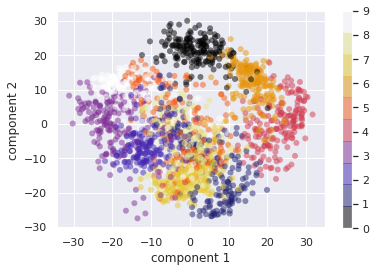

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
pca = PCA(3) # project from 64 to 3 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target.shape)

(1797, 64)
(1797, 3)
(1797,)


In [ ]:
#from sklearn.manifold import Isomap
#model = Isomap(n_components=3)
#projected = model.fit_transform(digits.data)
#print(digits.data.shape)
#print(projected.shape)
#print(digits.target.shape)

(1797, 64)
(1797, 3)
(1797,)


In [ ]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

R, G, B = projected[:, 0], projected[:, 1], projected[:, 2]
cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[d] for d in digits.target]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=R, y=G, z=B, mode='markers',
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False,
                  title_text="3-component PCA for MNIST",
                  scene={"xaxis": {"title": "component 1"},
                         "yaxis": {"title": "component 2"},
                         "zaxis": {"title": "component 3"}},
                  showlegend=False)

fig.show()

##Choosing the number of components

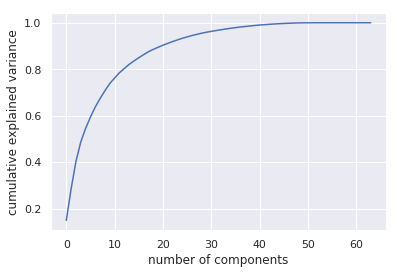

In [ ]:
# the cumulative explained variance ratio as a function of the number of components

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#we’d need about 20 components to retain 90% of the variance

#PCA as Noise Filtering

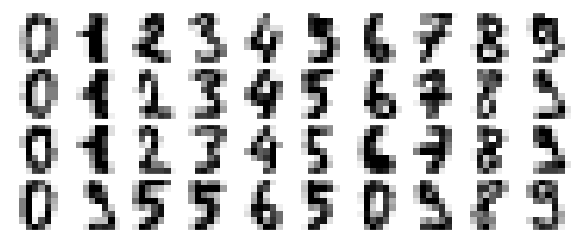

In [ ]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

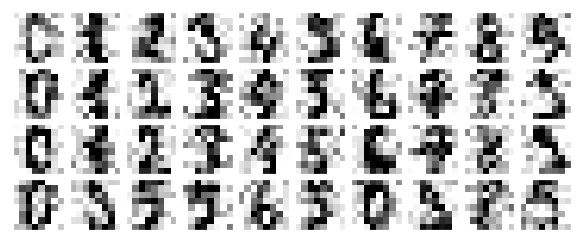

In [ ]:
# add some noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
# let's retain 50% of variation

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

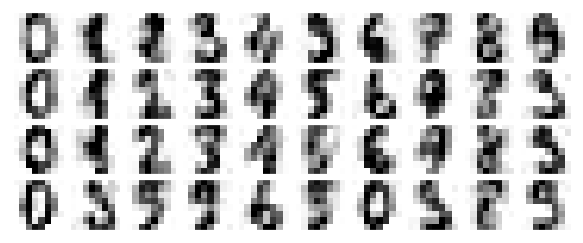

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

#Example: Eigenfaces

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver='randomized') # big dataset, use randomized solver
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

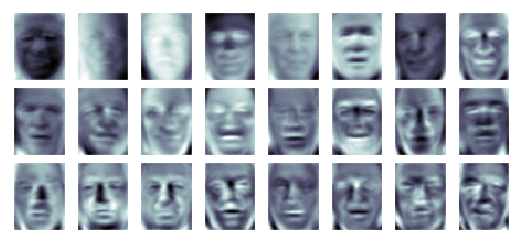

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

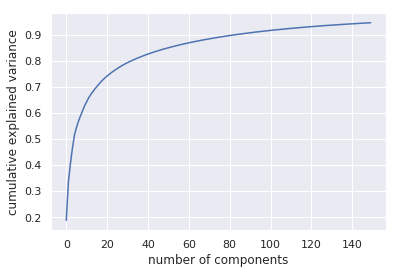

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

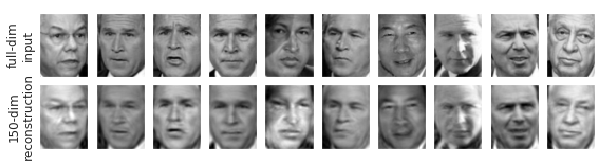

In [ ]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
  ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data

#Manifold learning

We have already seen one dimensionality reduction technique, namely PCA.


**Manifold learning** — a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces.


<br>

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_16_manifold_learning/calabi_yau_manifold_with_dots.png)

<br>

In other words

$$
\{\mathbf{x}_i \in \mathbb{R}^D \} \rightarrow \{\mathbf{y}_i \in \mathbb{R}^d \}
$$

so that pairwise distances are more or less preserved

$$
d_{\mathbb{R}^D}(\mathbf{x}_i, \mathbf{x}_j) \approx d_{\mathbb{R}^d}(\mathbf{y}_i, \mathbf{y}_j)
$$

where $d_{\mathbb{R}^D}$ and $d_{\mathbb{R}^d}$ are distance (Euclidean or other) functions.




#TDD manifold learning

Before we get started let's make our minds on the test sets.

Of course, the simplest test case is the set of points on a plane in 3D.








In [ ]:
#@title ##Plane

%%html
<svg width="120mm" height="90mm" version="1.1" viewBox="0 0 190.11 141.13" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".3285" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".3285" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".3285" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-9.621 -18.96)">
  <path d="m9.8274 152.42c0.75595 0 46.113-71.437 46.113-71.437l143.27-61.898" fill="none" stroke="#000" stroke-width=".26458px"/>
  <path d="m9.9445 152.8 174.32-73.708 14.949-60.008" fill="none" stroke="#000" stroke-width="1.065"/>
  <g fill-rule="evenodd">
   <g transform="matrix(1.1819 0 0 1.1819 -.086182 186.81)">
    <g transform="matrix(.54285 0 0 -.54285 -92.032 383.65)" fill-opacity=".66184" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Manifold and data in high dimensional space}$$\n$$\\text{Data scan on low dimensional space}$$\n" xml:space="preserve"><g fill="#f00" fill-opacity=".66184"><ellipse transform="matrix(.81256 -.58288 -.82474 -.56551 0 0)" cx="-558.24" cy="-829.35" rx="4.0758" ry="7.5324"/><ellipse transform="matrix(.86754 -.49737 -.8391 -.54398 0 0)" cx="-619.62" cy="-920.25" rx="3.8178" ry="7.1395"/><ellipse transform="matrix(.76475 -.64433 -.86341 -.5045 0 0)" cx="-621.39" cy="-829.17" rx="3.3887" ry="6.2607" stroke-width="1.0005"/><ellipse transform="matrix(.68779 -.72591 -.88444 -.46665 0 0)" cx="-637.17" cy="-771.78" rx="3.2883" ry="6.0116" stroke-width=".99779"/><ellipse transform="matrix(.79988 -.60016 -.86223 -.50652 0 0)" cx="-644.22" cy="-883.31" rx="3.2391" ry="5.9884" stroke-width=".99732"/><ellipse transform="matrix(.79823 -.60236 -.86777 -.49696 0 0)" cx="-656.92" cy="-899.67" rx="3.1017" ry="5.7369" stroke-width=".99371"/><ellipse transform="matrix(.70659 -.70763 -.88253 -.47026 0 0)" cx="-661.03" cy="-814.89" rx="2.7893" ry="5.1562"/><ellipse transform="matrix(.74424 -.66792 -.85031 -.52628 0 0)" cx="-621.82" cy="-853.42" rx="2.5108" ry="4.6017" stroke-width=".99555"/></g><g fill="#ff0" fill-opacity=".72947"><ellipse transform="matrix(.73844 -.67432 -.87129 -.49076 0 0)" cx="-595.18" cy="-837.62" rx="3.9289" ry="7.5713"/><ellipse transform="matrix(.7334 -.6798 -.86812 -.49635 0 0)" cx="-593.9" cy="-848.9" rx="3.5415" ry="6.8028"/><ellipse transform="matrix(.73743 -.67542 -.87066 -.49188 0 0)" cx="-590.75" cy="-853.15" rx="3.7211" ry="7.1662"/><ellipse transform="matrix(.75076 -.66057 -.8789 -.477 0 0)" cx="-608.52" cy="-892.1" rx="3.8505" ry="7.4786"/><ellipse transform="matrix(.72907 -.68444 -.86538 -.50112 0 0)" cx="-584.31" cy="-875.44" rx="2.9874" ry="5.7227"/><ellipse transform="matrix(.75999 -.64993 -.88449 -.46657 0 0)" cx="-645.23" cy="-922.77" rx="3.1693" ry="6.1919"/><ellipse transform="matrix(.73043 -.68299 -.86625 -.49962 0 0)" cx="-591.35" cy="-866.49" rx="3.0823" ry="5.9096"/><ellipse transform="matrix(.73233 -.68095 -.86745 -.49753 0 0)" cx="-602.71" cy="-862.45" rx="3.0028" ry="5.764"/><ellipse transform="matrix(.71281 -.70136 -.85487 -.51884 0 0)" cx="-570.55" cy="-837.81" rx="2.8938" ry="5.4864"/><ellipse transform="matrix(.7147 -.69943 -.85612 -.51678 0 0)" cx="-615.92" cy="-910.61" rx="2.692" ry="5.1098" stroke-width=".99175"/><ellipse transform="matrix(.74215 -.67023 -.87361 -.48664 0 0)" cx="-646.82" cy="-939.84" rx="2.6002" ry="5.0226" stroke-width="1.0032"/><ellipse transform="matrix(.65678 -.75409 -.87344 -.48693 0 0)" cx="-627.7" cy="-868.36" rx="2.6579" ry="4.9932" stroke-width=".99913"/><ellipse transform="matrix(.75322 -.65777 -.8804 -.47423 0 0)" cx="-675.76" cy="-933" rx="2.6858" ry="5.2247" stroke-width="1.0012"/><ellipse transform="matrix(.65181 -.75839 -.86684 -.49859 0 0)" cx="-621.75" cy="-840.11" rx="2.7566" ry="5.1458" stroke-width=".99891"/><ellipse transform="matrix(.60117 -.79912 -.89477 -.44652 0 0)" cx="-659.29" cy="-811.16" rx="2.7735" ry="5.1535" stroke-width=".99736"/><ellipse transform="matrix(.52677 -.85001 -.89206 -.45191 0 0)" cx="-642.95" cy="-730.53" rx="3.0756" ry="5.5661" stroke-width=".999"/></g><ellipse transform="matrix(.83163 -.55533 -.80724 -.59022 0 0)" cx="-537.4" cy="-822.03" rx="4.5375" ry="8.3861" fill="#f00" fill-opacity=".66184" stroke-width="1.0006"/><g fill="#ff6f00" fill-opacity=".66184"><ellipse transform="matrix(-.66597 .74598 .87404 .48585 0 0)" cx="585.09" cy="736.3" rx="3.8665" ry="7.8357" stroke-width="1.0003"/><ellipse transform="matrix(-.65743 .75351 .86923 .49441 0 0)" cx="578.18" cy="741.1" rx="3.7984" ry="7.6411" stroke-width=".99756"/><ellipse transform="matrix(-.69049 .72334 .88727 .46126 0 0)" cx="626.97" cy="772.71" rx="3.2878" ry="6.8053"/><ellipse transform="matrix(-.69561 .71842 .88992 .45611 0 0)" cx="632.95" cy="794.48" rx="3.3567" ry="6.9786"/><ellipse transform="matrix(-.68666 .72698 .88525 .46511 0 0)" cx="629.96" cy="788.4" rx="3.4854" ry="7.1906"/><ellipse transform="matrix(-.66442 .74736 .87317 .48741 0 0)" cx="606.08" cy="782.28" rx="2.9292" ry="5.9284"/><ellipse transform="matrix(-.70352 .71067 .89396 .44814 0 0)" cx="661.53" cy="823.64" rx="2.9846" ry="6.2471"/><ellipse transform="matrix(-.70557 .70864 .8685 .49569 0 0)" cx="617.9" cy="828.55" rx="3.0286" ry="6.23"/><ellipse transform="matrix(-.69544 .71858 .86534 .50118 0 0)" cx="620.91" cy="815.81" rx="2.7634" ry="5.6539" stroke-width=".99639"/><ellipse transform="matrix(-.72686 .68679 .87252 .48858 0 0)" cx="640.41" cy="861.65" rx="2.7023" ry="5.6327"/><ellipse transform="matrix(-.66116 .75024 .8869 .46197 0 0)" cx="656.67" cy="828.11" rx="2.6598" ry="5.4658" stroke-width=".99356"/><ellipse transform="matrix(-.56959 .82193 .91339 .40709 0 0)" cx="690.36" cy="742.37" rx="2.6224" ry="5.279" stroke-width="1.0029"/><ellipse transform="matrix(-.76454 .64458 .88185 .47153 0 0)" cx="688.38" cy="925.08" rx="2.3295" ry="4.9867" stroke-width=".99706"/><ellipse transform="matrix(-.71025 .70395 .89733 .44135 0 0)" cx="698.77" cy="868.99" rx="2.3299" ry="4.9049" stroke-width="1.0018"/><ellipse transform="matrix(-.56677 .82387 .90734 .42041 0 0)" cx="681.74" cy="740.18" rx="2.5208" ry="5.0042" stroke-width=".99996"/></g><g fill="#00f"><ellipse transform="matrix(.31476 .94917 .98892 .14846 0 0)" cx="894.72" cy="152.66" rx="4.7222" ry="6.6614" stroke-width="1.0588"/><g fill="#00f" fill-opacity=".66184" fill-rule="evenodd"><ellipse transform="matrix(.24404 .96977 .97049 .24112 0 0)" cx="844.03" cy="247.74" rx="4.5443" ry="6.988" stroke-width=".99994"/><ellipse transform="matrix(.25048 .96812 .97202 .23489 0 0)" cx="856.38" cy="234.03" rx="4.3539" ry="6.8612"/><ellipse transform="matrix(.24985 .96828 .97188 .23548 0 0)" cx="865.42" cy="228.12" rx="4.0731" ry="6.4035" stroke-width=".99999"/><ellipse transform="matrix(.25044 .96813 .97201 .23493 0 0)" cx="866.78" cy="236.11" rx="3.9803" ry="6.2716"/><ellipse transform="matrix(.25402 .9672 .97281 .23159 0 0)" cx="873.11" cy="237.48" rx="4.1088" ry="6.561" stroke-width="1.0001"/></g></g><g fill-rule="evenodd"><g fill="#0097ff"><ellipse transform="matrix(.57378 -.81901 -.88976 -.45643 0 0)" cx="-602.57" cy="-860.59" rx="3.6737" ry="6.4488" stroke-width="1.0023"/><ellipse transform="matrix(.60626 -.79527 -.87623 -.4819 0 0)" cx="-588.54" cy="-884.47" rx="3.5296" ry="6.3037" stroke-width=".99975"/><ellipse transform="matrix(.62351 -.78182 -.87938 -.47613 0 0)" cx="-622.38" cy="-899.51" rx="2.9118" ry="5.3938" stroke-width=".99997"/><ellipse transform="matrix(.72613 -.68756 -.85493 -.51874 0 0)" cx="-597.66" cy="-999.61" rx="2.7563" ry="5.2803"/><ellipse transform="matrix(.71879 -.69522 -.84998 -.52681 0 0)" cx="-582.23" cy="-1001.5" rx="2.7072" ry="5.1638" stroke-width=".99736"/><ellipse transform="matrix(.57418 -.81873 -.88075 -.47358 0 0)" cx="-602.02" cy="-869.37" rx="3.5947" ry="6.2725" stroke-width=".99899"/><ellipse transform="matrix(.5438 -.83921 -.90765 -.41973 0 0)" cx="-660.04" cy="-849.42" rx="3.3893" ry="5.9984" stroke-width="1.0005"/><ellipse transform="matrix(.53519 -.84473 -.89411 -.44785 0 0)" cx="-632.22" cy="-855.27" rx="3.3549" ry="5.8097" stroke-width=".99801"/><ellipse transform="matrix(.60282 -.79788 -.87373 -.48642 0 0)" cx="-607.03" cy="-898.69" rx="2.9293" ry="5.313" stroke-width="1.0003"/><ellipse transform="matrix(.56073 -.828 -.89567 -.44472 0 0)" cx="-648.9" cy="-864.71" rx="2.9357" ry="5.2185"/><ellipse transform="matrix(.62057 -.78415 -.88365 -.46814 0 0)" cx="-604.86" cy="-885.17" rx="3.4217" ry="6.2026" stroke-width="1.0026"/><ellipse transform="matrix(.60182 -.79863 -.87385 -.48619 0 0)" cx="-573.94" cy="-859.57" rx="3.7474" ry="6.6617" stroke-width=".999"/><ellipse transform="matrix(.59442 -.80416 -.86982 -.49336 0 0)" cx="-559.42" cy="-866.26" rx="3.6831" ry="6.4969" stroke-width=".99786"/><ellipse transform="matrix(.59785 -.80161 -.8717 -.49003 0 0)" cx="-556.61" cy="-851.43" rx="3.9652" ry="7.0197" stroke-width=".99837"/><ellipse transform="matrix(.58975 -.80759 -.86723 -.4979 0 0)" cx="-548.73" cy="-854.15" rx="3.9359" ry="6.9088" stroke-width=".99723"/></g><g fill="#006307"><ellipse transform="matrix(-.63961 .7687 .8723 .48897 0 0)" cx="568.61" cy="819.78" rx="3.6211" ry="7.022" stroke-width=".99709"/><ellipse transform="matrix(-.6326 .77448 .89035 .45528 0 0)" cx="607.45" cy="835.72" rx="3.3322" ry="6.5416"/><ellipse transform="matrix(-.62884 .77753 .88851 .45886 0 0)" cx="593.17" cy="835.86" rx="3.387" ry="6.6234" stroke-width=".99907"/><ellipse transform="matrix(-.6615 .74994 .87245 .4887 0 0)" cx="571.5" cy="862.36" rx="3.3322" ry="6.5416"/><ellipse transform="matrix(-.6326 .77448 .89035 .45528 0 0)" cx="596.35" cy="860.34" rx="3.3322" ry="6.5416"/><ellipse transform="matrix(-.62372 .78165 .88597 .46375 0 0)" cx="647.32" cy="883.13" rx="2.2923" ry="4.4591" stroke-width=".9971"/><ellipse transform="matrix(-.61658 .7873 .88236 .47058 0 0)" cx="637.93" cy="864.02" rx="2.293" ry="4.4273" stroke-width=".9997"/><ellipse transform="matrix(-.63274 .77436 .89042 .45514 0 0)" cx="653.79" cy="874.64" rx="2.3344" ry="4.5836" stroke-width="1.0003"/><ellipse transform="matrix(-.63138 .77548 .88975 .45644 0 0)" cx="646.53" cy="866.42" rx="2.4264" ry="4.7575"/><ellipse transform="matrix(-.62899 .77741 .88858 .45872 0 0)" cx="639.54" cy="874.12" rx="2.5718" ry="5.03" stroke-width="1.0002"/><ellipse transform="matrix(-.628 .77821 .8881 .45966 0 0)" cx="629.25" cy="884.86" rx="2.637" ry="5.1523"/><ellipse transform="matrix(-.628 .77821 .8881 .45966 0 0)" cx="629.63" cy="871.87" rx="2.637" ry="5.1523"/><ellipse transform="matrix(-.62633 .77956 .88727 .46126 0 0)" cx="630.49" cy="855.44" rx="2.7855" ry="5.4331"/><ellipse transform="matrix(-.61106 .79159 .87951 .47588 0 0)" cx="624.35" cy="871.86" rx="2.4201" ry="4.6459"/><ellipse transform="matrix(-.58911 .80806 .90045 .43496 0 0)" cx="665.55" cy="871.23" rx="2.3249" ry="4.4998" stroke-width="1.002"/></g></g></g>
   </g>
   <g fill="#00f" fill-opacity=".66184">
    <ellipse transform="matrix(.24836 -.96867 .96948 -.24518 0 0)" cx="-103.43" cy="208.27" rx="2.2163" ry="3.9029"/>
    <ellipse transform="matrix(.23515 -.97196 .966 -.25855 0 0)" cx="-102.02" cy="215.45" rx="2.0794" ry="3.6292" stroke-width="1.0001"/>
    <ellipse transform="matrix(.24664 -.96911 .96912 -.24657 0 0)" cx="-114.57" cy="208.57" rx="2.2658" ry="4.1343"/>
    <ellipse transform="matrix(.18536 -.98267 .95163 -.30725 0 0)" cx="-121.64" cy="217.03" rx="2.0502" ry="3.8832"/>
    <ellipse transform="matrix(.22989 -.97322 .96442 -.26437 0 0)" cx="-119.66" cy="217.7" rx="2.3883" ry="4.0817"/>
    <ellipse transform="matrix(.2462 -.96922 .96901 -.24701 0 0)" cx="-112.83" cy="213.95" rx="2.1108" ry="3.8451"/>
    <ellipse transform="matrix(.24622 -.96921 .96902 -.24699 0 0)" cx="-94.329" cy="208.59" rx="1.9118" ry="3.4829"/>
    <ellipse transform="matrix(.23609 -.97173 .96627 -.25752 0 0)" cx="-91.312" cy="201.45" rx="1.8911" ry="3.3128" stroke-width="1.0001"/>
    <ellipse transform="matrix(.22843 -.97356 .96397 -.26602 0 0)" cx="-95.698" cy="218.56" rx="1.87" ry="3.1772" stroke-width=".99985"/>
    <ellipse transform="matrix(.1809 -.9835 .95023 -.31155 0 0)" cx="-95.965" cy="220.29" rx="1.676" ry="2.8849" stroke-width=".99981"/>
    <ellipse transform="matrix(.21877 -.97578 .96073 -.27748 0 0)" cx="-88.36" cy="211.8" rx="1.8284" ry="2.9851" stroke-width="1.0007"/>
    <ellipse transform="matrix(.24079 -.97058 .96759 -.25254 0 0)" cx="-88.455" cy="211.86" rx="1.8171" ry="3.2422" stroke-width=".99995"/>
    <ellipse transform="matrix(.23883 -.97106 .96705 -.25459 0 0)" cx="-86.935" cy="205.2" rx="1.791" ry="3.1713"/>
   </g>
   <g fill="#ff0" fill-opacity=".72947">
    <ellipse transform="matrix(.73521 .67784 -.86927 .49435 0 0)" cx="120.35" cy="-12.321" rx="1.7945" ry="3.4509" stroke-width=".99696"/>
    <ellipse transform="matrix(.71808 .69596 -.85832 .51312 0 0)" cx="126.1" cy="-18.33" rx="1.8388" ry="3.4978" stroke-width=".99637"/>
    <ellipse transform="matrix(.71159 .7026 -.85407 .52016 0 0)" cx="132.85" cy="-11.009" rx="1.9638" ry="3.7202"/>
    <ellipse transform="matrix(.7429 .6694 -.87406 .48581 0 0)" cx="132.46" cy="4.3063" rx="2.0394" ry="3.9413"/>
    <ellipse transform="matrix(.74384 .66836 -.87465 .48476 0 0)" cx="131.09" cy="13.487" rx="2.2312" ry="4.3145"/>
    <ellipse transform="matrix(.73844 .67432 -.87129 .49076 0 0)" cx="128.15" cy="-4.6995" rx="1.9927" ry="3.84"/>
    <ellipse transform="matrix(.70169 .71248 -.89606 .44393 0 0)" cx="120.34" cy="-6.5527" rx="1.9927" ry="3.84"/>
   </g>
   <g fill="#006307" fill-opacity=".66184">
    <ellipse transform="matrix(-.56358 -.82606 .90264 -.4304 0 0)" cx="-125.25" cy="57.782" rx="1.7916" ry="3.4414" stroke-width="1.0006"/>
    <ellipse transform="matrix(-.58416 -.81164 .89277 -.45052 0 0)" cx="-129.03" cy="48.561" rx="1.9006" ry="3.6406"/>
    <ellipse transform="matrix(-.6105 -.79201 .88254 -.47024 0 0)" cx="-131.05" cy="57.912" rx="1.7345" ry="3.3382"/>
    <ellipse transform="matrix(-.73514 -.67791 .86686 -.49854 0 0)" cx="-139.95" cy="38.988" rx="1.6791" ry="3.4195" stroke-width="1.0127"/>
    <ellipse transform="matrix(-.64337 -.76555 .8955 -.44506 0 0)" cx="-131.42" cy="66.023" rx="1.6732" ry="3.3215" stroke-width="1.0021"/>
    <ellipse transform="matrix(-.63076 -.77598 .88945 -.45704 0 0)" cx="-143.18" cy="54.212" rx="1.8377" ry="3.6008"/>
    <ellipse transform="matrix(-.61099 -.79164 .87948 -.47593 0 0)" cx="-141.47" cy="58.587" rx="1.843" ry="3.5379" stroke-width="1.0012"/>
    <ellipse transform="matrix(-.59877 -.80092 .873 -.48772 0 0)" cx="-139.06" cy="60.541" rx="1.7576" ry="3.3309" stroke-width="1.0023"/>
    <ellipse transform="matrix(-.62825 -.77801 .86524 -.50135 0 0)" cx="-138.1" cy="51.985" rx="1.7594" ry="3.3666" stroke-width="1.0018"/>
    <ellipse transform="matrix(-.62455 -.78099 .88638 -.46295 0 0)" cx="-140.3" cy="46.124" rx="2.0219" ry="3.9363" stroke-width=".64034"/>
    <ellipse transform="matrix(-.60785 -.79405 .87783 -.47897 0 0)" cx="-137.8" cy="43.6" rx="2.0611" ry="3.9433" stroke-width=".63814"/>
   </g>
   <g fill="#f00" fill-opacity=".3285" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".43478" stroke-width=".94195">
    <path d="m149.02 133.61h22.492" marker-end="url(#c)"/>
    <path d="m149.02 133.61v-22.401" marker-end="url(#b)"/>
    <path d="m149.02 133.61-11.736 19.11" marker-end="url(#a)"/>
   </g>
  </g>
 </g>
</svg>





Datapoints are colored so we can track their relative positions.
Here are two popular non-linear 3D manifolds (surfaces) that manifold learning algorithms are tested on:

In [ ]:
#@title ##S-shape and swiss roll datasets

%%html
<svg width="180mm" height="100mm" version="1.1" viewBox="0 0 146.15 84.611" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".3285" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".3285" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".3285" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".5" fill-rule="evenodd" stroke="#000" stroke-opacity=".56311" stroke-width="1pt"/>
  </marker>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".5" fill-rule="evenodd" stroke="#000" stroke-opacity=".56311" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".5" fill-rule="evenodd" stroke="#000" stroke-opacity=".56311" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".69417" fill-rule="evenodd" stroke="#000" stroke-opacity=".69417" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-23.702 .19157)" fill-rule="evenodd">
  <g fill="#ff6f00">
   <ellipse transform="matrix(-.38754 -.92185 .97209 -.23459 0 0)" cx="-83.409" cy="113.21" rx="1.0021" ry=".78601" fill-opacity=".4466"/>
   <ellipse transform="matrix(-.38754 -.92185 .97209 -.23459 0 0)" cx="-82.939" cy="115.84" rx="1.0021" ry=".78601" fill-opacity=".3301"/>
   <g fill-opacity=".54854">
    <ellipse transform="matrix(.06912 -.99761 .97359 .2283 0 0)" cx="-4.998" cy="149.45" rx=".85258" ry=".66874"/>
    <ellipse transform="matrix(.06912 -.99761 .97359 .2283 0 0)" cx="-10.536" cy="146.75" rx="1.0811" ry=".84799"/>
    <ellipse transform="matrix(.06912 -.99761 .97359 .2283 0 0)" cx="-6.4762" cy="150.83" rx=".86838" ry=".68114"/>
    <ellipse transform="matrix(.06912 -.99761 .97359 .2283 0 0)" cx="-14.922" cy="144.25" rx="1.2659" ry=".99298"/>
    <ellipse transform="matrix(.06912 -.99761 .97359 .2283 0 0)" cx="-14.767" cy="145.92" rx="1.2659" ry=".99298"/>
   </g>
  </g>
  <g transform="matrix(.54285 0 0 -.54285 -92.032 383.65)" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Manifold and data in high dimensional space}$$\n$$\\text{Data scan on low dimensional space}$$\n" xml:space="preserve"><g stroke="none"><g fill-rule="evenodd"><g fill="#ff6f00" fill-opacity=".54854"><ellipse transform="matrix(.31706 .94841 .85554 -.51774 0 0)" cx="760.7" cy="231.96" rx="2.5583" ry="1.9053"/><ellipse transform="matrix(.24811 .96873 .91637 -.40034 0 0)" cx="748.24" cy="255.63" rx="1.9284" ry="1.5126"/><ellipse transform="matrix(.24811 .96873 .91637 -.40034 0 0)" cx="750.53" cy="256.78" rx="1.9284" ry="1.5126"/><ellipse transform="matrix(.34085 .94012 .87324 -.48728 0 0)" cx="765.4" cy="188.31" rx="1.6156" ry="1.2672"/><ellipse transform="matrix(.34085 .94012 .87324 -.48728 0 0)" cx="772.5" cy="192.73" rx="1.6156" ry="1.2672"/><ellipse transform="matrix(.34085 .94012 .87324 -.48728 0 0)" cx="775.23" cy="192.51" rx="1.6156" ry="1.2672"/><ellipse transform="matrix(.34085 .94012 .87324 -.48728 0 0)" cx="782.12" cy="195.71" rx="1.6156" ry="1.2672"/></g><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="366.33" cy="-618.57" rx="1.7489" ry="3.1231" fill="#0097ff" fill-opacity=".66184"/><g fill="#00ff63"><g fill-opacity=".40291"><ellipse transform="matrix(-.34507 .93858 .90688 .42138 0 0)" cx="362.18" cy="643.28" rx="1.2602" ry="2.1549"/><ellipse transform="matrix(-.35322 .93554 .90319 .42925 0 0)" cx="354.92" cy="646" rx="1.2602" ry="2.1549"/><ellipse transform="matrix(-.42294 .90616 .86814 .49631 0 0)" cx="297.7" cy="663.49" rx="1.4585" ry="2.494"/><ellipse transform="matrix(-.51511 .85712 .81167 .58412 0 0)" cx="222.94" cy="700.46" rx="1.494" ry="2.5547"/></g><ellipse transform="matrix(-.41165 .91134 .87424 .48549 0 0)" cx="305.13" cy="630.99" rx="2.1279" ry="3.6387" fill-opacity=".66184"/><ellipse transform="matrix(-.068082 .99768 .98865 .15022 0 0)" cx="509.31" cy="459.52" rx="2.1279" ry="3.6387" fill-opacity=".66184"/></g><g fill="#0097ff" fill-opacity=".36408"><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="386.76" cy="-642.37" rx="1.3587" ry="2.4263"/><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="391.88" cy="-640.87" rx="1.3587" ry="2.4263"/><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="396.74" cy="-648.77" rx="1.3587" ry="2.4263"/></g><g fill="#00ffb5"><g fill-opacity=".30583"><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="705.97" cy="-234.28" rx="1.308" ry="2.3356"/><ellipse transform="matrix(.65946 .75174 .75174 -.65946 0 0)" cx="751.47" cy="-76.325" rx="1.0405" ry="1.858"/><ellipse transform="matrix(.74227 .6701 .6701 -.74227 0 0)" cx="719.44" cy="-170.69" rx="1.6962" ry="3.0289"/><ellipse transform="matrix(.65946 .75174 .75174 -.65946 0 0)" cx="746.43" cy="-84.791" rx="1.308" ry="2.3356"/></g><ellipse transform="matrix(.87412 .48571 .33926 -.94069 0 0)" cx="580.66" cy="-326.69" rx="1.5933" ry="3.0192" fill-opacity=".66184"/></g></g><path d="m258.51 612.72 0.70172-0.95193 0.45693-0.57661 0.79419-0.8649 0.88666-0.88667 0.92475-0.78875 1.0227-0.91386 1.1532-0.93562 1.3926-0.84859 1.1532-0.58748 1.3708-0.80507c0.087 0 2.2629-0.97914 2.2629-0.97914l2.8939-1.0879c0.10879-0.0217 2.5022-0.47869 2.5022-0.47869l2.3282-0.41342 1.9148-0.19582 2.3282 0.0217 2.0018 0.13056 1.8495 0.30462 1.8712 0.36989 1.2185 0.41342 3.3316 1.348 2.4309 1.5078 2.3694 2.0617 1.7793 2.0962-32.518-48.681 0.95739 2.2194 1.1314 4.3082 0.60924 6.9628-0.21759 2.3499-1.3055 3.3073-2.3064 2.7416-3.1332 2.0453-3.0462 1.4796-3.6554 1.349-3.3073 0.87035-3.3508 0.87034-3.5249 0.60924-4.2212 0.95738-1.3055 0.26113 3.699 4.4388 14.519 17.277z" fill-opacity=".019608"/><g fill-rule="evenodd"><ellipse transform="matrix(-.39611 -.9182 -.9182 .39611 0 0)" cx="-695" cy=".12925" rx="1.1269" ry="2.0124" fill="#00ab30" fill-opacity=".43204"/><ellipse transform="matrix(-.48683 -.8735 -.8735 .48683 0 0)" cx="-682.78" cy="67.359" rx="1.3435" ry="2.3991" fill="#00ab0c" fill-opacity=".66184"/><ellipse transform="matrix(-.92981 -.36803 -.36803 .92981 0 0)" cx="-457.52" cy="499.18" rx="1.5377" ry="2.7459" fill="#00ab60" fill-opacity=".66184"/><g fill="#00ab30" fill-opacity=".43204"><ellipse transform="matrix(-.76099 -.64877 -.64877 .76099 0 0)" cx="-608.23" cy="321.52" rx="1.3597" ry="2.428"/><ellipse transform="matrix(-.57969 -.81483 -.81483 .57969 0 0)" cx="-672.58" cy="152.88" rx="1.2208" ry="2.18"/><ellipse transform="matrix(-.99741 .071962 .071962 .99741 0 0)" cx="-198.44" cy="658.27" rx="1.1517" ry="2.0566"/><ellipse transform="matrix(-.97761 .21043 .21043 .97761 0 0)" cx="-110.05" cy="691.04" rx=".82763" ry="1.4779"/></g><g fill="#ff4300" fill-opacity=".43204"><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="588.45" cy="-260.35" rx="1.251" ry="2.2339"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="607.79" cy="-262.73" rx=".69767" ry="1.2458"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="602.42" cy="-261.67" rx=".89069" ry="1.5905"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="605.26" cy="-259.65" rx=".81075" ry="1.4477"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="593.11" cy="-256.36" rx="1.0173" ry="1.8165"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="598.76" cy="-256.76" rx="1.0148" ry="1.8121"/></g></g></g><g fill="none" stroke="#000"><g transform="translate(.15231 -.12185)"><path d="m266.46 619.52 35.775 40.998" stroke-width=".48887px"/><g stroke-miterlimit="10.433"><path d="m219.93 623.1c6e-3 8e-3 0.0126 0.0154 0.0189 0.0231 2.3815 2.9007 5.183 5.2028 7.898 7.7466 2.8844 2.756 22.783 21.68 33.84 32.52" stroke-width=".63118"/><path d="m265.11 561.57c1.8698 2.048 3.264 4.5157 4.9814 6.7829 2.599 3.3779 19.194 29.42 28.79 44.13" stroke-width=".56782"/><g fill="none" stroke="#000"><path d="m261.69 663.39c6.5988 6.5741 13.43 8.3895 21.755 8.2785 5.1273 0.015 15.091-4.0729 18.714-11.425" stroke-width=".58488"/><path d="m213.86 562.93 43.421 51.962" stroke-opacity=".58937" stroke-width=".29244"/><path d="m213.73 562.59 23.737 28.557" stroke-width=".58488"/></g></g></g><g stroke-miterlimit="10.433"><path d="m302.34 660.42c-15.406 22.286-47.263 7.9073-45.291-10.024 4.188-14.972 45.398-7.1121 45.565-24.796 0.20261-4.7792-1.1855-8.6427-2.9129-11.778-8.4426-15.324-32.657-13.112-42.26 0.94347" stroke-opacity=".62136" stroke-width=".2756px"/><path d="m266.46 619.52c-13.368 19.48-35.391 16.067-46.312 3.5672-4.1396-4.7381-7.4868-10.798-6.2405-17.33 3.2942-17.614 47.671-12.177 54.45-29.9 6.4352-24.3-40.412-33.441-54.342-13.051" stroke-width=".7"/><path d="m425.05 634.15c-13.085 2.3218-24.813-5.1018-30.158-9.9649-3.8968-3.477-7.6084-8.7398-9.7673-14.354-1.8878-4.9092-2.9314-10.034-2.9179-15.434-0.0527-5.9845 1.7744-11.656 5.2923-17.399 5.0815-7.6677 16.736-15.372 28.265-14.582 6.9814 0.47826 14.917 4.7475 18.727 8.7305 2.4493 2.5605 3.7727 4.0458 5.5932 7.6724 4.5365 10.203 2.0919 23.777-5.5212 30.444-11.392 8.4222-21.487 6.8576-27.011 4.4961-3.8126-1.5386-8.1762-6.8894-9.8329-11.038-1.8202-4.5582-1.5809-8.7086-1.0374-12.082 1.6065-9.9716 11.754-14.574 16.862-14.762 6.6374-0.24443 13.725 3.5418 15.869 9.1766 2.9274 7.6933-3.1698 16.877-12.034 17.092" stroke-width=".67053"/><path d="m446.13 650.97c5.1818 4.3354 13.212 3.8067 19.083 1.2922 15.393-6.9746 11.674-24.795 7.1227-31.485" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-width=".53614"/></g></g><g stroke="none"><g fill-opacity=".66184"><g fill="#00f"><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="555.5" cy="-392.67" rx="1.4265" ry="2.5474"/><g fill-rule="evenodd"><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="558.95" cy="-395.05" rx="1.423" ry="2.5411"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="564.41" cy="-393.43" rx="1.2212" ry="2.1807"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="567.47" cy="-399.07" rx="1.3087" ry="2.337"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="574.67" cy="-396.32" rx="1.2379" ry="2.2106"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="579.29" cy="-399.1" rx="1.0773" ry="1.9238"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="585.81" cy="-399.43" rx=".9986" ry="1.7833"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="585.13" cy="-400.86" rx="1.0483" ry="1.872"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="594.03" cy="-401.87" rx=".91859" ry="1.6403"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="602.13" cy="-405.18" rx=".76723" ry="1.3701"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="601.08" cy="-404.58" rx=".76723" ry="1.3701"/></g></g><g fill="#f00" fill-rule="evenodd"><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="547.4" cy="-253.66" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="551.96" cy="-256.74" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="556.33" cy="-252.05" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="558.39" cy="-257.41" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="564.67" cy="-257.81" rx="1.3824" ry="2.4686"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="560" cy="-257.23" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="562.15" cy="-254.75" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="570" cy="-257.68" rx="1.3676" ry="2.4423"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="575.8" cy="-258.9" rx="1.1788" ry="2.1051"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="572.41" cy="-253.19" rx="1.2964" ry="2.3149"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="580.11" cy="-258.88" rx="1.071" ry="1.9126"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="582.46" cy="-255.17" rx="1.1288" ry="2.0156"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="577.17" cy="-248.91" rx="1.2515" ry="2.2347"/><ellipse transform="matrix(.72264 .69122 .69122 -.72264 0 0)" cx="604.64" cy="-254.93" rx=".86716" ry="1.5485"/></g><g fill="#00f" fill-rule="evenodd"><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="561.69" cy="-397.87" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="556.02" cy="-398.62" rx="1.4265" ry="2.5474"/><ellipse transform="matrix(.85051 .52597 .52597 -.85051 0 0)" cx="571.7" cy="-402.55" rx="1.2548" ry="2.2407"/></g></g><g fill="#ff0" fill-opacity=".72947" fill-rule="evenodd"><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="650.15" cy="-181.36" rx="1.357" ry="2.4233"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="677.38" cy="12.028" rx="1.3311" ry="2.377"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="621.35" cy="-177.42" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="627.33" cy="-179.76" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="630.24" cy="-181.83" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="633.49" cy="-173.67" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="639.44" cy="-181.09" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="644.73" cy="-174.99" rx="1.4529" ry="2.5944"/></g><g fill-opacity=".66184"><g fill="#0097ff" fill-rule="evenodd"><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="653.25" cy="-199.39" rx="1.5403" ry="2.7505"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="659.08" cy="-197.21" rx="1.4798" ry="2.6425"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="662.1" cy="-200.52" rx="1.3937" ry="2.4888"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="667.3" cy="-198.06" rx="1.3184" ry="2.3542"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="669.17" cy="-202.85" rx="1.2982" ry="2.3183"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="671.26" cy="-195.01" rx="1.3587" ry="2.4263"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="675.82" cy="-201.73" rx="1.2579" ry="2.2462"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="679.52" cy="-194.12" rx="1.2982" ry="2.3182"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="682.64" cy="-199.97" rx="1.157" ry="2.066"/><ellipse transform="matrix(.62765 .7785 .7785 -.62765 0 0)" cx="687.73" cy="-192.97" rx="1.1158" ry="1.9925"/><ellipse transform="matrix(.48407 .87503 .87503 -.48407 0 0)" cx="711.4" cy="-78.759" rx="1.1158" ry="1.9925"/><ellipse transform="matrix(.53006 .84796 .84796 -.53006 0 0)" cx="712.7" cy="-114.06" rx=".98396" ry="1.7571"/><ellipse transform="matrix(.61044 .79206 .79206 -.61044 0 0)" cx="693.94" cy="-180.59" rx="1.0706" ry="1.9118"/><ellipse transform="matrix(.54127 .84085 .84085 -.54127 0 0)" cx="705.37" cy="-121.13" rx="1.0585" ry="1.8903"/><ellipse transform="matrix(.54793 .83652 .83652 -.54793 0 0)" cx="715.14" cy="-123.58" rx=".80579" ry="1.4389"/><ellipse transform="matrix(.69424 .71974 .71974 -.69424 0 0)" cx="675.6" cy="-253.39" rx=".95724" ry="1.7094"/><ellipse transform="matrix(.75464 .65614 .65614 -.75464 0 0)" cx="655.09" cy="-310.34" rx=".81417" ry="1.4539"/><ellipse transform="matrix(.69927 .71485 .71485 -.69927 0 0)" cx="675.78" cy="-258.31" rx=".90399" ry="1.6143" stroke-width=".99999"/><ellipse transform="matrix(.60651 .79508 .79508 -.60651 0 0)" cx="707.57" cy="-173.2" rx=".78626" ry="1.4041"/></g><g fill="#00ffb5"><g fill-rule="evenodd"><ellipse transform="matrix(-.25281 .96752 .96752 .25281 0 0)" cx="554.51" cy="389.15" rx="1.3812" ry="2.4664"/><ellipse transform="matrix(.11466 .9934 .9934 -.11466 0 0)" cx="664.05" cy="170.06" rx="1.2982" ry="2.3183"/><ellipse transform="matrix(.033331 .99944 .99944 -.033331 0 0)" cx="642.83" cy="224.36" rx="1.53" ry="2.7322"/><ellipse transform="matrix(-.040804 .99917 .99917 .040804 0 0)" cx="627.81" cy="264.98" rx="1.308" ry="2.3356"/><ellipse transform="matrix(.092724 .99569 .99569 -.092724 0 0)" cx="666.09" cy="188.42" rx="1.2982" ry="2.3183"/><ellipse transform="matrix(.12999 .99152 .99152 -.12999 0 0)" cx="677.25" cy="166.66" rx="1.2982" ry="2.3183"/><ellipse transform="matrix(-.040804 .99917 .99917 .040804 0 0)" cx="644.21" cy="286.56" rx="1.1679" ry="2.0856"/><ellipse transform="matrix(.17435 .98468 .98468 -.17435 0 0)" cx="705.67" cy="155.85" rx="1.0188" ry="1.8193"/><ellipse transform="matrix(.2691 .96311 .96311 -.2691 0 0)" cx="713.69" cy="82.613" rx="1.0188" ry="1.8193"/><ellipse transform="matrix(-.040804 .99917 .99917 .040804 0 0)" cx="650.41" cy="290.42" rx="1.1176" ry="1.9958"/><ellipse transform="matrix(-.0010921 1 1 .0010921 0 0)" cx="652.68" cy="257.51" rx="1.2251" ry="2.1877"/><ellipse transform="matrix(.15978 .98715 .98715 -.15978 0 0)" cx="673.22" cy="146.11" rx="1.2982" ry="2.3183"/><ellipse transform="matrix(-.040804 .99917 .99917 .040804 0 0)" cx="647.39" cy="294.82" rx="1.1679" ry="2.0856"/><ellipse transform="matrix(.16498 .9863 .9863 -.16498 0 0)" cx="701.98" cy="157.77" rx="1.0188" ry="1.8193"/></g><path d="m249.3 650.85-2.2085-2.2303 0.50045-0.11967 0.80507 0.0109 0.58749 0.087 0.81594 0.28286c0.0544 0.0109 0.55485 0.46781 0.55485 0.46781l0.15231 0.40253-0.0979 0.34814-0.22846 0.42429c-0.087 0.087-0.45693 0.33727-0.45693 0.33727l-0.26111 0.13054z"/><g fill-rule="evenodd"><ellipse transform="matrix(-.12874 .99168 .99168 .12874 0 0)" cx="604.82" cy="323.12" rx="1.3812" ry="2.4664"/><ellipse transform="matrix(.089408 .996 .996 -.089408 0 0)" cx="691.11" cy="216" rx="1.0188" ry="1.8193"/><ellipse transform="matrix(.28133 .95961 .95961 -.28133 0 0)" cx="722.57" cy="83.245" rx=".81504" ry="1.4554"/></g></g><g fill="#ff6f00" fill-rule="evenodd"><ellipse transform="matrix(.28697 .95794 .95794 -.28697 0 0)" cx="599.61" cy="66.575" rx="1.6621" ry="2.9681"/><ellipse transform="matrix(.38356 .92352 .92352 -.38356 0 0)" cx="612.52" cy="6.0794" rx="1.4039" ry="2.507"/><ellipse transform="matrix(-.11071 .99385 .99385 .11071 0 0)" cx="523.88" cy="306.87" rx="1.7739" ry="3.1677"/><ellipse transform="matrix(.039212 .99923 .99923 -.039212 0 0)" cx="569.7" cy="224.28" rx="1.431" ry="2.5553"/><ellipse transform="matrix(-.03241 .99947 .99947 .03241 0 0)" cx="554.66" cy="269.12" rx="1.409" ry="2.5162"/><ellipse transform="matrix(-.0039868 .99999 .99999 .0039868 0 0)" cx="566.83" cy="250.36" rx="1.3656" ry="2.4386"/><ellipse transform="matrix(.50717 .86185 .86185 -.50717 0 0)" cx="600.77" cy="-84.437" rx="1.6094" ry="2.8739"/><ellipse transform="matrix(.086354 .99626 .99626 -.086354 0 0)" cx="590.94" cy="203.23" rx="1.1847" ry="2.1155"/><ellipse transform="matrix(.33054 .94379 .94379 -.33054 0 0)" cx="631.65" cy="48.239" rx="1.1578" ry="2.0674"/></g></g></g><g fill-rule="evenodd"><g stroke="none"><ellipse transform="matrix(-.17201 .98509 .98509 .17201 0 0)" cx="531.76" cy="364.61" rx="1.2221" ry="2.1824" fill="#ff4300" fill-opacity=".43204"/><ellipse transform="matrix(.12895 .99165 .99165 -.12895 0 0)" cx="599.84" cy="185.08" rx="1.2452" ry="2.2235" fill="#ff6f00" fill-opacity=".66184"/><ellipse transform="matrix(.075939 .99711 .99711 -.075939 0 0)" cx="597.23" cy="217.18" rx="1.2431" ry="2.2197" fill="#ff6f00" fill-opacity=".66184"/><g fill="#ff4300" fill-opacity=".43204"><ellipse transform="matrix(-.11425 .99345 .99345 .11425 0 0)" cx="561.2" cy="344.55" rx=".90102" ry="1.609"/><ellipse transform="matrix(-.36261 .93194 .93194 .36261 0 0)" cx="445.28" cy="463.43" rx="1.2554" ry="2.2417"/><ellipse transform="matrix(.024201 .99971 .99971 -.024201 0 0)" cx="605.34" cy="259.49" rx=".85898" ry="1.5339"/><ellipse transform="matrix(-.11798 .99302 .99302 .11798 0 0)" cx="554.13" cy="333.21" rx="1.0697" ry="1.9101"/><ellipse transform="matrix(-.19193 .98141 .98141 .19193 0 0)" cx="529.87" cy="379.86" rx="1.0565" ry="1.8867"/><ellipse transform="matrix(-.20463 .97884 .97884 .20463 0 0)" cx="522.44" cy="384.77" rx=".98162" ry="1.7529"/><ellipse transform="matrix(.44009 .89795 .89795 -.44009 0 0)" cx="658.8" cy="-25.384" rx=".77492" ry="1.3838"/><ellipse transform="matrix(.064596 .99791 .99791 -.064596 0 0)" cx="618.15" cy="238.41" rx=".78744" ry="1.4062"/></g><g fill="#ff0" fill-opacity=".72947"><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="624.91" cy="-172.57" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="637.04" cy="-182.49" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.13995 .99016 .99016 -.13995 0 0)" cx="669.56" cy="194.06" rx="1.165" ry="2.0803"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="647.49" cy="-169.96" rx="1.4326" ry="2.5582"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="626.12" cy="-187.23" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="618.22" cy="-184.76" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.42873 .90343 .90343 -.42873 0 0)" cx="679.19" cy="-19.708" rx="1.233" ry="2.2018"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="645.28" cy="-185.23" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.31578 .94883 .94883 -.31578 0 0)" cx="683.46" cy="71.343" rx="1.3416" ry="2.3956"/><ellipse transform="matrix(.40867 .91268 .91268 -.40867 0 0)" cx="697.21" cy="9.0335" rx="1.1694" ry="2.0882"/><ellipse transform="matrix(.27268 .96211 .96211 -.27268 0 0)" cx="686.31" cy="100.78" rx="1.3383" ry="2.3897"/><ellipse transform="matrix(.63737 .77056 .77056 -.63737 0 0)" cx="660.29" cy="-171.57" rx="1.392" ry="2.4857"/><ellipse transform="matrix(.34132 .93995 .93995 -.34132 0 0)" cx="678.33" cy="51.726" rx="1.2982" ry="2.3181"/></g><g fill="#ffc900" fill-opacity=".72947"><ellipse transform="matrix(.96728 .25372 .25372 -.96728 0 0)" cx="408.53" cy="-493.62" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.97818 -.20776 -.20776 -.97818 0 0)" cx="145.75" cy="-617.53" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.81992 .57248 .57248 -.81992 0 0)" cx="566.17" cy="-327.43" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.81992 .57248 .57248 -.81992 0 0)" cx="563.9" cy="-328.36" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.98711 .16002 .16002 -.98711 0 0)" cx="365.84" cy="-533.99" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.81992 .57248 .57248 -.81992 0 0)" cx="576.98" cy="-330.56" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.96104 .27639 .27639 -.96104 0 0)" cx="435.48" cy="-493.64" rx="1.5137" ry="2.7031"/><ellipse transform="matrix(.97523 -.22119 -.22119 -.97523 0 0)" cx="154.88" cy="-665.66" rx=".96362" ry="1.7207"/><ellipse transform="matrix(.89263 .45079 .45079 -.89263 0 0)" cx="535.69" cy="-411.41" rx="1.2" ry="2.1429"/><ellipse transform="matrix(.99984 -.017961 -.017961 -.99984 0 0)" cx="288.57" cy="-622.75" rx=".91198" ry="1.6285"/><ellipse transform="matrix(.89263 .45079 .45079 -.89263 0 0)" cx="533.64" cy="-411.14" rx="1.2" ry="2.1429"/><ellipse transform="matrix(.89263 .45079 .45079 -.89263 0 0)" cx="551.4" cy="-425.95" rx="1.0439" ry="1.8642"/><ellipse transform="matrix(.89263 .45079 .45079 -.89263 0 0)" cx="550.86" cy="-423.27" rx="1.051" ry="1.8767"/><ellipse transform="matrix(.72405 .68975 .68975 -.72405 0 0)" cx="645.17" cy="-248.36" rx="1.2" ry="2.1429"/><ellipse transform="matrix(.85241 .52287 .52287 -.85241 0 0)" cx="574.1" cy="-373.5" rx="1.2" ry="2.1429"/><ellipse transform="matrix(.80894 .58789 .58789 -.80894 0 0)" cx="593.35" cy="-325.5" rx="1.2" ry="2.1429"/></g><g fill="#00ab0c" fill-opacity=".66184"><ellipse transform="matrix(-.65791 -.7531 -.7531 .65791 0 0)" cx="-601.43" cy="221.53" rx="1.7201" ry="3.0717"/><ellipse transform="matrix(-.75237 -.65874 -.65874 .75237 0 0)" cx="-572.67" cy="304.74" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-601.2" cy="243.83" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.4748 -.88009 -.88009 .4748 0 0)" cx="-640.16" cy="71.482" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.78481 -.61974 -.61974 .78481 0 0)" cx="-573.7" cy="323.47" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.78614 -.61805 -.61805 .78614 0 0)" cx="-583.85" cy="335.91" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.82422 -.56627 -.56627 .82422 0 0)" cx="-545.92" cy="371.32" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.81165 -.58414 -.58414 .81165 0 0)" cx="-575.42" cy="351.71" rx="1.626" ry="2.9035"/></g><ellipse transform="matrix(-.60971 -.79263 -.79263 .60971 0 0)" cx="-669.23" cy="181.13" rx=".99235" ry="1.7721" fill="#00ab30" fill-opacity=".43204"/><g fill="#00ab0c" fill-opacity=".66184"><ellipse transform="matrix(-.94037 -.34015 -.34015 .94037 0 0)" cx="-441.16" cy="505.22" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.81877 -.57412 -.57412 .81877 0 0)" cx="-559.6" cy="362.58" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.79785 -.60286 -.60286 .79785 0 0)" cx="-539.11" cy="349.64" rx="1.9461" ry="3.4752"/></g><g fill="#00ab60" fill-opacity=".66184"><ellipse transform="matrix(-.96262 -.27085 -.27085 .96262 0 0)" cx="-379.45" cy="534.3" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.8451 -.5346 -.5346 .8451 0 0)" cx="-525.74" cy="397.84" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.9105 -.41351 -.41351 .9105 0 0)" cx="-457.45" cy="462.16" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.96708 -.25448 -.25448 .96708 0 0)" cx="-382.3" cy="546.03" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.9714 -.23744 -.23744 .9714 0 0)" cx="-379.9" cy="551.78" rx="1.626" ry="2.9035"/></g><ellipse transform="matrix(-.48683 -.8735 -.8735 .48683 0 0)" cx="-689" cy="92.119" rx=".88444" ry="1.5794" fill="#00ab30" fill-opacity=".43204"/><ellipse transform="matrix(-.73724 -.67563 -.67563 .73724 0 0)" cx="-604.26" cy="278.01" rx="1.626" ry="2.9035" fill="#00ab0c" fill-opacity=".66184"/></g><g transform="matrix(1.5 0 0 -1.5 -365.16 1089.4)" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{S-shape}$$\n" xml:space="preserve"><g transform="matrix(.96315 0 0 .96315 15.412 9.4752)" stroke-width="0"><path d="m420.45 259.97-0.98183-0.23966c-0.47934-0.11597-0.78086-0.53347-0.78086-0.97417 0-0.54119 0.4175-1.0127 1.0205-1.0127 1.2834 0 1.4535 1.2602 1.4999 1.6081 7e-3 0.0464 7e-3 0.0927 0.0927 0.0927 0.10051 0 0.10051-0.0387 0.10051-0.18555v-1.5385c0-0.13143 0-0.18554-0.0851-0.18554-0.0542 0-0.0618 7e-3 -0.11597 0.10051l-0.27058 0.43294c-0.23196-0.2242-0.54893-0.53345-1.2293-0.53345-0.85818 0-1.5076 0.67262-1.5076 1.4844 0 0.64169 0.40977 1.1984 1.0128 1.4071 0.0851 0.0308 0.47933 0.1237 1.0127 0.25514 0.20875 0.0541 0.44068 0.10822 0.65717 0.3943 0.16235 0.19328 0.23966 0.44841 0.23966 0.70353 0 0.54892-0.38656 1.0978-1.0282 1.0978-0.22421 0-0.81178-0.0387-1.2215-0.41749-0.44842-0.40977-0.47161-0.90457-0.47934-1.1829-7e-3 -0.0696-0.0696-0.0696-0.0927-0.0696-0.1005 0-0.1005 0.0541-0.1005 0.18555v1.5385c0 0.13144 0 0.18555 0.0851 0.18555 0.0542 0 0.0618-0.0155 0.11598-0.1005 0-7e-3 0.0231-0.0308 0.27832-0.44069 0.23967 0.26288 0.73448 0.54119 1.4148 0.54119 0.90456 0 1.5231-0.74992 1.5231-1.6003 0-0.76541-0.51027-1.3994-1.1597-1.5463z"/><polygon transform="matrix(.77313 0 0 -.77313 194.44 800.4)" points="294.5 697.03 297.14 697.03 297.14 697.6 294.5 697.6"/><path d="m426.21 261.46 0.0232 7e-3h0.0155l0.0231 7e-3h0.0232l0.0232 7e-3 0.12331 0.0295 0.0308 0.0155 0.0308 7e-3 0.0387 0.0155 0.0308 0.0155 0.0387 0.0154 0.0308 0.0155 0.0308 0.0232 0.0387 0.0155 0.0308 0.0232 0.0308 0.0231 0.0308 0.0232 0.0308 0.0309 0.0231 0.0308 0.0308 0.0308 0.0463 0.0616 7e-3 0.0232 7e-3 0.0155 7e-3 0.0232 0.0155 0.0154 7e-3 0.0231v0.0154l7e-3 0.0232 7e-3 0.0231 7e-3 0.0232v0.0462l7e-3 0.0232v0.0539c0 0.38656-0.2706 0.69582-0.87364 0.69582-0.64169 0-0.92002-0.43296-1.0669-1.0901-0.0232-0.10051-0.0308-0.13144-0.10824-0.13144-0.10052 0-0.10052 0.0541-0.10052 0.19328v1.0128c0 0.13143 0 0.18555 0.0851 0.18555 0.0387 0 0.0464-7e-3 0.19328-0.15463 0.0155-0.0155 0.0155-0.0308 0.15462-0.17781 0.34018 0.3247 0.68035 0.33244 0.84271 0.33244 0.8891 0 1.2447-0.518 1.2447-1.0669 0-0.40977-0.23194-0.6417-0.32472-0.73448-0.25513-0.23966-0.55666-0.30151-0.88135-0.36336-0.43297-0.0851-0.94324-0.18556-0.94324-0.63397 0-0.26286 0.20101-0.57986 0.85818-0.57986 0.85043 0 0.8891 0.68809 0.90455 0.92774 7e-3 0.0696 0.0774 0.0696 0.0927 0.0696 0.10051 0 0.10051-0.0387 0.10051-0.18554v-0.77313c0-0.13143 0-0.18556-0.0851-0.18556-0.0387 0-0.0541 0-0.15462 0.0927-0.0232 0.0308-0.10051 0.10052-0.13143 0.12371-0.29378-0.21647-0.61078-0.21647-0.72674-0.21647-0.93549 0-1.2293 0.51026-1.2293 0.94324 0 0.27059 0.12371 0.48706 0.33245 0.65716 0.2474 0.19328 0.46388 0.23967 1.0128 0.3479z"/><path d="m428.49 262.36v0.13126l-0.0148 0.0463v0.0155l-7e-3 0.0232-0.0148 0.031-0.0155 7e-3 -7e-3 0.0155-0.0154 7e-3 -7e-3 7e-3 -0.0155 0.0154-0.0232 7e-3h-0.0155l-0.0231 7e-3 -0.0155 7e-3h-0.0231l-0.0308 7e-3h-0.0541l-0.0155 7e-3h-0.2938v0.23967c0.2706-7e-3 0.66489-0.0232 0.8659-0.0232 0.20102 0 0.60304 0.0155 0.8659 0.0232v-0.23967c-0.51798 0-0.60304 0-0.60304-0.34019v-1.4148c0-0.80405 0.54893-1.2293 1.0438-1.2293 0.48707 0 0.57211 0.40976 0.57211 0.85043v1.7936c0 0.34018-0.0851 0.34018-0.60304 0.34018v0.23967c0.2706-7e-3 0.6649-0.0232 0.87364-0.0232 0.19328 0 0.5953 0.0155 0.85816 0.0232v-0.23967c-0.40202 0-0.5953 0-0.5953-0.23195v-1.4612c0-0.6649 0-0.90456-0.23967-1.1752-0.10824-0.13144-0.36337-0.28606-0.81178-0.28606-0.64943 0-0.98958 0.45614-1.121 0.74993v-2.6825l-1.1056 0.0774v0.23968c0.53344 0 0.59531 0.0542 0.59531 0.43295z"/><path d="m434.49 262.36 7e-3 0.0232v0.0308l7e-3 0.0308 7e-3 0.0232 7e-3 0.0308 7e-3 0.0309 7e-3 0.0231 0.0155 0.0308 7e-3 0.0308 0.0155 0.0231 0.0155 0.0232 7e-3 0.0308 0.0155 0.0232 0.0232 0.0231 0.0154 0.0232 0.0155 0.0232 0.0232 0.0232 0.0155 0.0231 0.0232 0.0155 0.0232 0.0231 0.0232 0.0155 0.0231 0.0155 0.0232 0.0155 0.0308 0.0155 0.0232 7e-3 0.0308 0.0155 0.12332 0.0295h0.0617c0.16236 0 0.63396-0.10823 0.63396-0.72673v-0.43297h-0.19328v0.43297c0 0.44067-0.19328 0.48706-0.27832 0.48706-0.25513 0-0.28606-0.34017-0.28606-0.37884v-1.5385c0-0.32471 0-0.62624-0.27832-0.90456-0.30153-0.30151-0.68036-0.42522-1.0514-0.42522-0.63397 0-1.1674 0.36337-1.1674 0.8659 0 0.23194 0.15463 0.36337 0.35564 0.36337 0.21647 0 0.35564-0.15461 0.35564-0.35563 0-0.0927-0.0387-0.34019-0.39429-0.35564 0.20873-0.26286 0.58757-0.34791 0.83497-0.34791 0.37883 0 0.81178 0.30152 0.81178 0.98192v1.2138c0 0.72673-0.54892 0.98957-0.89683 0.98957-0.37883 0-0.69582-0.2706-0.69582-0.64943 0-0.42522 0.32473-1.0592 1.5927-1.1056v-0.16236c-0.38657 0.0232-0.92774 0.0464-1.4148 0.2706-0.57983 0.26285-0.77313 0.66489-0.77313 1.0051 0 0.6185 0.74994 0.81178 1.237 0.81178 0.51026 0 0.85816-0.30926 1.0051-0.66489z"/><path d="m437.11 260.05v-0.50253l-1.1133 0.0851v0.23967c0.54892 0 0.60304 0.0464 0.60304 0.37884v3.595c0 0.34791-0.0851 0.34791-0.60304 0.34791v0.23967c0.26286-7e-3 0.66489-0.0232 0.8659-0.0232 0.20874 0 0.60304 0.0155 0.87364 0.0232v-0.23967c-0.51801 0-0.60305 0-0.60305-0.34791v-1.3607l0.10825-0.10051c-0.10825-0.15463-0.10825-0.16236-0.10825-0.31699v-1.7164c0.22421-0.38656 0.60305-0.61078 0.99733-0.61078 0.55666 0 1.0283 0.67263 1.0283 1.5385 0 0.93549-0.54118 1.5772-1.1056 1.5772-0.30925 0-0.60303-0.15462-0.81178-0.47161l-0.10824 0.10051c0.0387 0.1237 0.36337 0.54118 0.9509 0.54118 0.91229 0 1.7164-0.74993 1.7164-1.7473 0-0.97416-0.74993-1.7318-1.6081-1.7318-0.60304 0-0.92773 0.34018-1.0823 0.50253z"/><path d="m441.13 261.17 7e-3 -0.15463c0.0387-1.1442 0.68809-1.3375 0.95091-1.3375 0.79633 0 0.87362 1.036 0.87362 1.3375h-1.8245l-7e-3 0.15463h2.1493c0.17008 0 0.19328 0 0.19328-0.15463 0-0.7654-0.41749-1.5076-1.3839-1.5076-0.88909 0-1.6004 0.78859-1.6004 1.755 0 1.0283 0.81179 1.7705 1.6931 1.7705 0.94324 0 1.2911-0.85044 1.2911-0.99733 0-0.0774-0.0618-0.0927-0.10051-0.0927-0.0696 0-0.0851 0.0464-0.1005 0.10824-0.27061 0.78859-0.96641 0.78859-1.0438 0.78859-0.38658 0-0.69583-0.23194-0.8659-0.51026-0.23195-0.3711-0.23195-0.88137-0.23195-1.1597z"/></g><g stroke="#000" stroke-miterlimit="10.433"><g id="content" transform="matrix(1.5 0 0 -1.5 -365.12 1089.4)" fill-opacity=".72816" fill-rule="evenodd" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Color coded datapoints}$$\n" xml:space="preserve"><path d="m554.23 543.82v-0.075l7e-3 -0.075 7e-3 -0.0751 0.0119-0.0711 0.0159-0.0712 0.0198-0.0671 0.0474-0.1342 0.0277-0.0632 0.0315-0.0593 0.0317-0.0593 0.0394-0.0593 0.0788-0.1104 0.0435-0.0514 0.0948-0.0948 0.0514-0.0434 0.0514-0.0435 0.0552-0.0394 0.0552-0.0356 0.0552-0.0317 0.0593-0.0315 0.0593-0.0277 0.0632-0.0277 0.1264-0.0396 0.0671-0.016 0.0632-0.0119 0.0671-7e-3 0.0712-5e-3 0.0671-5e-3c0.64033 0 1.0277 0.54545 1.0277 1 0 0.0394 0 0.0671-0.0514 0.0671-0.0435 0-0.0435-0.0237-0.0474-0.0632-0.0315-0.56128-0.45058-0.88146-0.88142-0.88146-0.24112 0-1.0119 0.1343-1.0119 1.3044 0 1.174 0.76683 1.3044 1.0079 1.3044 0.42691 0 0.77869-0.35576 0.85776-0.92888 7e-3 -0.0552 7e-3 -0.0671 0.0632-0.0671 0.0632 0 0.0632 0.0119 0.0632 0.0949v0.92889c0 0.0671 0 0.0949-0.0435 0.0949-0.0162 0-0.0316 0-0.0632-0.0474l-0.19764-0.28852c-0.14215 0.14244-0.34387 0.33597-0.72335 0.33597-0.73913 0-1.3716-0.62452-1.3716-1.423z"/><path d="m558.7 543.32v0.0435l-0.01 0.0948-7e-3 0.0434-0.0357 0.1305-0.0159 0.0435-0.0594 0.1182-0.0237 0.0355-0.0237 0.0356-0.0237 0.0355-0.0277 0.0315-0.0316 0.0316-0.0277 0.0315-0.0316 0.0316-0.0356 0.0237-0.0316 0.0277-0.0356 0.0237-0.0394 0.0237-0.0356 0.0198-0.0394 0.0198-0.0394 0.0159-0.0394 0.0119-0.0394 0.0162-0.087 0.014-0.0434 7e-3 -0.0434 5e-3h-0.0435l-5e-3 -0.0869c0.17391 0 0.34387-0.087 0.44666-0.25298 0.0987-0.16996 0.0987-0.39922 0.0987-0.54547 0-0.14214 0-0.35576-0.0869-0.52965-0.087-0.17392-0.25695-0.28857-0.45456-0.28857-0.16997 0-0.34388 0.083-0.45063 0.26091-0.0987 0.17391-0.0987 0.41501-0.0987 0.55731 0 0.15023 0 0.36364 0.0949 0.53758 0.10665 0.17786 0.29249 0.26087 0.4506 0.26087l5e-3 0.0869c-0.49406 0-0.87748-0.42689-0.87748-0.917 0-0.50991 0.41106-0.88542 0.87352-0.88542 0.47431 0 0.87356 0.38342 0.87356 0.88542z"/><path d="m559.52 545.2-0.56919-0.0394v-0.12251c0.27668 0 0.3083-0.0277 0.3083-0.22134v-2.0436c0-0.17391-0.0435-0.17391-0.3083-0.17391v-0.12253c0.13052 5e-3 0.33993 0.0119 0.43875 0.0119 0.0987 0 0.29251-7e-3 0.43875-0.0119v0.12253c-0.26484 0-0.30831 0-0.30831 0.17391z"/><path d="m561.77 543.32v0.0435l-0.01 0.0948-7e-3 0.0434-0.0357 0.1305-0.0162 0.0435-0.0594 0.1182-0.0237 0.0355-0.0237 0.0356-0.0277 0.0355-0.0277 0.0315-0.0277 0.0316-0.0315 0.0315-0.0317 0.0316-0.0315 0.0237-0.0356 0.0277-0.0712 0.0474-0.0355 0.0198-0.0394 0.0198-0.0394 0.0159-0.0394 0.0119-0.0435 0.0162-0.0394 7e-3 -0.087 0.014-0.0435 5e-3h-0.0435l-5e-3 -0.0869c0.17395 0 0.33995-0.087 0.44273-0.25298 0.10273-0.16996 0.10273-0.39922 0.10273-0.54547 0-0.14214 0-0.35576-0.0869-0.52965-0.0869-0.17392-0.25694-0.28857-0.45456-0.28857-0.16996 0-0.34391 0.083-0.45062 0.26091-0.0987 0.17391-0.0987 0.41501-0.0987 0.55731 0 0.15023 0 0.36364 0.0947 0.53758 0.10678 0.17786 0.29253 0.26087 0.45061 0.26087l5e-3 0.0869c-0.49408 0-0.87751-0.42689-0.87751-0.917 0-0.50991 0.4111-0.88542 0.87355-0.88542 0.47432 0 0.87355 0.38342 0.87355 0.88542z"/><path d="m562.54 543.78v0.43086l-0.54941-0.0435v-0.12252c0.27668 0 0.30831-0.0277 0.30831-0.2174v-1.0554c0-0.17392-0.0435-0.17392-0.30831-0.17392v-0.12252c0.15407 5e-3 0.33991 0.0119 0.45061 0.0119 0.15807 0 0.34388 0 0.50198-0.0119v0.12252h-0.083c-0.29249 0-0.30041 0.0434-0.30041 0.18577v0.60083c0 0.39129 0.16602 0.73913 0.46642 0.73913 0.0277 0 0.0356 0 0.0435-5e-3 -0.0119-5e-3 -0.0908-0.0514-0.0908-0.15024 0-0.11094 0.083-0.16996 0.16997-0.16996 0.0712 0 0.16997 0.0474 0.16997 0.17391 0 0.12237-0.12253 0.23715-0.29251 0.23715-0.28856 0-0.43083-0.26084-0.48619-0.43084z"/><path d="m565.2 543.34v0.0554l5e-3 0.0316v0.0277l5e-3 0.0237v0.0277l5e-3 0.0277 0.025 0.1185 0.0119 0.0394 0.0119 0.0435 0.0119 0.0356 0.0159 0.0394 0.0162 0.0316 0.0159 0.0315 0.0159 0.0317 0.0198 0.0277 0.0594 0.0711 0.0198 0.0198 0.0198 0.0159 0.0237 0.0159 0.0237 0.0162 0.0198 0.0159 0.0237 0.0119 0.0198 7e-3 0.0474 0.014 0.0198 7e-3 0.0237 5e-3 0.0198 5e-3 0.0237 5e-3h0.0396c0.0356 0 0.28459-5e-3 0.41898-0.1462-0.1581-0.0119-0.18182-0.12646-0.18182-0.1779 0-0.10273 0.0712-0.1818 0.18182-0.1818 0.0987 0 0.17786 0.0671 0.17786 0.18577 0 0.26484-0.29645 0.41897-0.6008 0.41897-0.49408 0-0.85773-0.42294-0.85773-0.90909 0-0.50595 0.39133-0.89331 0.84983-0.89331 0.5257 0 0.65219 0.47037 0.65219 0.50989 0 0.0394-0.0394 0.0394-0.0514 0.0394-0.0356 0-0.0435-0.0159-0.0514-0.0394-0.11059-0.36366-0.3676-0.41108-0.51385-0.41108-0.20949 0-0.55733 0.16997-0.55733 0.80238z"/><path d="m568.34 543.32v0.0435l-5e-3 0.0474-7e-3 0.0474-7e-3 0.0434-7e-3 0.0435-0.0119 0.0435-0.0162 0.0435-0.0159 0.0435-0.0159 0.0394-0.0396 0.0788-0.0237 0.0355-0.0237 0.0356-0.0277 0.0355-0.0277 0.0315-0.0277 0.0316-0.0317 0.0315-0.0316 0.0316-0.0315 0.0237-0.0356 0.0277-0.0712 0.0474-0.0355 0.0198-0.0394 0.0198-0.0394 0.0159-0.0394 0.0119-0.0435 0.0162-0.0394 7e-3 -0.087 0.014-0.0435 5e-3h-0.0474v-0.0869c0.16998 0 0.33995-0.087 0.4427-0.25298 0.10273-0.16996 0.10273-0.39922 0.10273-0.54547 0-0.14214 0-0.35576-0.0869-0.52965-0.0869-0.17392-0.26088-0.28857-0.45853-0.28857-0.166 0-0.33992 0.083-0.44663 0.26091-0.0987 0.17391-0.0987 0.41501-0.0987 0.55731 0 0.15023 0 0.36364 0.0948 0.53758 0.10666 0.17786 0.29249 0.26087 0.45061 0.26087v0.0869c-0.49014 0-0.87355-0.42689-0.87355-0.917 0-0.50991 0.41109-0.88542 0.87355-0.88542 0.47431 0 0.87352 0.38342 0.87352 0.88542z"/><path d="m570.06 542.7v-0.26087l0.58105 0.0435v0.12239c-0.27668 0-0.30831 0.0277-0.30831 0.21739v2.3835l-0.56918-0.0394v-0.12239c0.27668 0 0.30831-0.0277 0.30831-0.22136v-0.84585c-0.11452 0.13837-0.28461 0.24111-0.4941 0.24111l0.0119-0.0869c0.13837 0 0.30437-0.0593 0.42688-0.23317 0.0435-0.0671 0.0435-0.075 0.0435-0.14623v-0.80635c0-0.0712 0-0.079-0.0435-0.14623-0.11844-0.18578-0.29644-0.27274-0.46245-0.27274-0.17787 0-0.32017 0.10273-0.41503 0.24901-0.10273 0.16207-0.11452 0.38737-0.11452 0.54943 0 0.14244 7e-3 0.37945 0.12253 0.55733 0.083 0.11856 0.2332 0.24901 0.44271 0.24901l-0.0119 0.0869c-0.46644 0-0.88145-0.38343-0.88145-0.88935 0-0.502 0.38736-0.88937 0.83797-0.88937 0.249 0 0.42689 0.1343 0.52568 0.26088z"/><path d="m571.19 543.39 7e-3 0.079c0.0237 0.58499 0.35179 0.68382 0.48617 0.68382 0.40714 0 0.44666-0.52966 0.44666-0.68382h-0.93283l-7e-3 -0.079h1.1028c0.0869 0 0.0987 0 0.0987 0.079 0 0.39133-0.21346 0.77077-0.70754 0.77077-0.45852 0-0.81819-0.40317-0.81819-0.89726 0-0.5257 0.41105-0.90516 0.86561-0.90516 0.48224 0 0.66012 0.4348 0.66012 0.50989 0 0.0394-0.0316 0.0474-0.0514 0.0474-0.0356 0-0.0435-0.0237-0.0514-0.0552-0.13837-0.40319-0.49409-0.40319-0.53364-0.40319-0.19759 0-0.35573 0.11845-0.44664 0.26088-0.11869 0.18973-0.11869 0.45062-0.11869 0.5929z"/><path d="m574 542.7v-0.26087l0.5771 0.0435v0.12239c-0.27667 0-0.30831 0.0277-0.30831 0.21739v2.3835l-0.56524-0.0394v-0.12239c0.27275 0 0.30438-0.0277 0.30438-0.22136v-0.84585c-0.11058 0.13837-0.28065 0.24111-0.49409 0.24111l0.0159-0.0869c0.13837 0 0.30436-0.0593 0.42294-0.23317 0.0474-0.0671 0.0474-0.075 0.0474-0.14623v-0.80635c0-0.0712 0-0.079-0.0474-0.14623-0.11463-0.18578-0.29251-0.27274-0.46247-0.27274-0.17786 0-0.32018 0.10273-0.41504 0.24901-0.10273 0.16207-0.11452 0.38737-0.11452 0.54943 0 0.14244 7e-3 0.37945 0.12237 0.55733 0.083 0.11856 0.23321 0.24901 0.44666 0.24901l-0.016 0.0869c-0.46642 0-0.88143-0.38343-0.88143-0.88935 0-0.502 0.38734-0.88937 0.83796-0.88937 0.25295 0 0.43083 0.1343 0.52965 0.26088z"/><path d="m557.24 538.49v-0.26086l0.57708 0.0435v0.12238c-0.27271 0-0.30829 0.0277-0.30829 0.2174v2.3835l-0.56526-0.0394v-0.12253c0.2767 0 0.30832-0.0277 0.30832-0.22135v-0.84585c-0.11451 0.13837-0.28458 0.2411-0.49803 0.2411l0.0159-0.0869c0.13837 0 0.30435-0.0593 0.4269-0.2332 0.0434-0.0671 0.0434-0.075 0.0434-0.14621v-0.80637c0-0.0711 0-0.079-0.0434-0.14622-0.11868-0.18578-0.29646-0.27274-0.46642-0.27274-0.17787 0-0.32018 0.10273-0.41504 0.24902-0.10273 0.16207-0.11451 0.38735-0.11451 0.54942 0 0.14243 0.0119 0.37946 0.12252 0.55733 0.083 0.11868 0.23319 0.24902 0.44664 0.24902l-0.016 0.0869c-0.46645 0-0.8775-0.38342-0.8775-0.88936 0-0.50198 0.38341-0.88935 0.83401-0.88935 0.25298 0 0.43083 0.1343 0.52966 0.26088z"/><path d="m559.24 538.57 5e-3 -0.0119v-0.0159l5e-3 -0.016 5e-3 -0.0119 5e-3 -0.0159 5e-3 -0.016 5e-3 -0.0119 7e-3 -0.0159 5e-3 -0.0159 0.014-0.0238 5e-3 -0.0159 7e-3 -0.0119 0.0119-0.0119 0.014-0.0238 0.0119-0.0119 7e-3 -0.0119 0.0119-7e-3 0.0119-0.0119 0.0357-0.021 0.016-7e-3 0.0119-5e-3 0.0159-7e-3 0.0477-0.015 0.0162-5e-3h0.0319c0.083 0 0.3241 0.0552 0.3241 0.37156v0.22134h-0.0987v-0.22134c0-0.22531-0.0987-0.24902-0.14244-0.24902-0.13052 0-0.14623 0.1739-0.14623 0.19367v0.78659c0 0.16601 0 0.32018-0.14243 0.46246-0.15408 0.15409-0.34784 0.2174-0.53755 0.2174-0.32415 0-0.59686-0.18577-0.59686-0.4427 0-0.11868 0.079-0.18577 0.18181-0.18577 0.11058 0 0.18183 0.079 0.18183 0.18182 0 0.0474-0.0198 0.17391-0.20161 0.18182 0.10678 0.13429 0.30042 0.17789 0.42689 0.17789 0.19372 0 0.41506-0.15409 0.41506-0.50199v-0.62052c0-0.37156-0.28063-0.50596-0.45851-0.50596-0.19369 0-0.35576 0.13836-0.35576 0.33205 0 0.21739 0.16603 0.5415 0.81427 0.5652v0.083c-0.19765-0.0119-0.47433-0.0237-0.72336-0.13837-0.29644-0.1343-0.39527-0.33991-0.39527-0.51383 0-0.31623 0.38342-0.41504 0.63244-0.41504 0.26087 0 0.43873 0.15811 0.51385 0.33994z"/><path d="m560.58 539.84h0.56521v0.12251h-0.56521v0.72332h-0.0987c-5e-3 -0.32016-0.12237-0.74309-0.50989-0.7589v-0.0869h0.33597v-1.083c0-0.48223 0.3676-0.52966 0.5099-0.52966 0.28064 0 0.38736 0.28065 0.38736 0.52966v0.22529h-0.0947v-0.21738c0-0.28855-0.1188-0.43877-0.26484-0.43877-0.26483 0-0.26483 0.35575-0.26483 0.42295z"/><path d="m562.74 538.57v-0.0119l5e-3 -0.0159 5e-3 -0.016 5e-3 -0.0119 5e-3 -0.0159 5e-3 -0.016 5e-3 -0.0119 5e-3 -0.0159 7e-3 -0.0159 5e-3 -0.0119 7e-3 -0.0119 7e-3 -0.0159 0.021-0.0357 0.0119-0.0119 7e-3 -0.0119 0.0119-0.0119 0.0119-7e-3 0.0119-0.0119 0.0476-0.028 0.0159-5e-3 0.0119-7e-3 0.0162-5e-3 0.0159-5e-3 0.016-5e-3 0.0159-5e-3h0.0357c0.083 0 0.32412 0.0552 0.32412 0.37156v0.22134h-0.0987v-0.22134c0-0.22531-0.0987-0.24902-0.14243-0.24902-0.13039 0-0.14624 0.1739-0.14624 0.19367v0.78659c0 0.16601 0 0.32018-0.14243 0.46246-0.15409 0.15409-0.35178 0.2174-0.54152 0.2174-0.32412 0-0.59288-0.18577-0.59288-0.4427 0-0.11868 0.079-0.18577 0.1818-0.18577 0.11095 0 0.17786 0.079 0.17786 0.18182 0 0.0474-0.0198 0.17391-0.19763 0.18182 0.10678 0.13429 0.29647 0.17789 0.42295 0.17789 0.19367 0 0.41898-0.15409 0.41898-0.50199v-0.62052c0-0.37156-0.2846-0.50596-0.46246-0.50596-0.19368 0-0.35178 0.13836-0.35178 0.33205 0 0.21739 0.16204 0.5415 0.81424 0.5652v0.083c-0.20158-0.0119-0.47828-0.0237-0.72333-0.13837-0.29648-0.1343-0.39528-0.33991-0.39528-0.51383 0-0.31623 0.38341-0.41504 0.62848-0.41504 0.26087 0 0.4427 0.15811 0.51779 0.33994z"/><path d="m564.08 539.75v0.25693l-0.56919-0.0435v-0.12238c0.28064 0 0.30829-0.0237 0.30829-0.19367v-1.838c0-0.17788-0.0434-0.17788-0.30829-0.17788v-0.12252c0.1343 5e-3 0.33995 0.0119 0.4427 0.0119 0.10666 0 0.30436-7e-3 0.44268-0.0119v0.12252c-0.26481 0-0.30433 0-0.30433 0.17788v0.69569l0.0514 0.0514c-0.0514 0.079-0.0514 0.083-0.0514 0.16206v0.8775c0.11058 0.19763 0.30433 0.31225 0.50592 0.31225 0.28856 0 0.52965-0.34387 0.52965-0.78657 0-0.47829-0.27668-0.80634-0.56917-0.80634-0.15808 0-0.3083 0.079-0.41503 0.2411l-0.0514-0.0514c0.0159-0.0632 0.18181-0.27667 0.48221-0.27667 0.47038 0 0.88146 0.3834 0.88146 0.8933 0 0.49803-0.38341 0.88541-0.82612 0.88541-0.30832 0-0.47433-0.17396-0.54942-0.25694z"/><path d="m567.55 539.11v0.0435l-0.01 0.0948-7e-3 0.0435-0.0357 0.1305-0.0159 0.0435-0.0594 0.1182-0.0237 0.0355-0.0237 0.0356-0.0277 0.0355-0.0277 0.0316-0.0277 0.0315-0.0631 0.0631-0.0316 0.0237-0.0356 0.0277-0.0316 0.0237-0.0394 0.0237-0.0356 0.0198-0.0394 0.0198-0.0394 0.0162-0.0394 0.0119-0.0434 0.0159-0.0394 7e-3 -0.0435 7e-3 -0.0434 7e-3 -0.0435 5e-3h-0.0435l-5e-3 -0.0869c0.17391 0 0.33992-0.087 0.4427-0.25299 0.10273-0.16997 0.10273-0.39921 0.10273-0.54547 0-0.14215 0-0.35574-0.0869-0.52964-0.083-0.17393-0.25694-0.28857-0.45456-0.28857-0.16996 0-0.34387 0.083-0.45061 0.26089-0.0987 0.17391-0.0987 0.41503-0.0987 0.55732 0 0.15025 0 0.36366 0.0949 0.53756 0.10666 0.17787 0.29251 0.2609 0.45062 0.2609l5e-3 0.0869c-0.49409 0-0.8775-0.4269-0.8775-0.91703 0-0.50989 0.41109-0.88541 0.87356-0.88541 0.4743 0 0.87351 0.38341 0.87351 0.88541z"/><path d="m568.36 540.01-0.55337-0.0435v-0.12238c0.25692 0 0.29251-0.0237 0.29251-0.21344v-1.0593c0-0.17392-0.0435-0.17392-0.30435-0.17392v-0.12252c0.12238 5e-3 0.33597 0.0119 0.43083 0.0119 0.13837 0 0.27668-7e-3 0.41108-0.0119v0.12252c-0.26088 0-0.2767 0.0198-0.2767 0.16998z"/><path d="m568.38 540.69v0.0238l-5e-3 0.0119v7e-3l-5e-3 0.0119v0.0119l-5e-3 7e-3 -5e-3 0.0119-5e-3 7e-3 -7e-3 7e-3 -5e-3 7e-3 -5e-3 0.0119-7e-3 7e-3 -5e-3 7e-3 -7e-3 5e-3 -0.014 0.014-7e-3 5e-3 -7e-3 7e-3 -7e-3 5e-3 -7e-3 7e-3 -0.014 0.01-0.0119 5e-3 -7e-3 5e-3h-0.0119l-7e-3 5e-3 -0.0119 5e-3h-0.0189l-7e-3 5e-3h-0.0119c-0.12237 0-0.2095-0.10666-0.2095-0.20949 0-0.10666 0.0869-0.20949 0.2095-0.20949 0.11059 0 0.20949 0.083 0.20949 0.20949z"/><path d="m569.19 539.62v-1.0554c0-0.17393-0.0435-0.17393-0.30831-0.17393v-0.12237c0.13836 5e-3 0.33994 0.0119 0.44665 0.0119 0.10273 0 0.30833-7e-3 0.44271-0.0119v0.12237c-0.26482 0-0.30831 0-0.30831 0.17393v0.72335c0 0.41106 0.28066 0.62845 0.52965 0.62845 0.24903 0 0.2925-0.20949 0.2925-0.43479v-0.91701c0-0.17393-0.0434-0.17393-0.30435-0.17393v-0.12237c0.1343 5e-3 0.33598 0.0119 0.44272 0.0119 0.10273 0 0.3083-7e-3 0.44269-0.0119v0.12237c-0.20555 0-0.30435 0-0.30834 0.11868v0.74707c0 0.33993 0 0.46246-0.12237 0.60078-0.0552 0.0671-0.18578 0.14623-0.41503 0.14623-0.2846 0-0.47035-0.16997-0.58105-0.41107v0.41107l-0.55734-0.0435v-0.12239c0.27671 0 0.30832-0.0277 0.30832-0.2174z"/><path d="m571.52 539.84h0.56525v0.12251h-0.56525v0.72332h-0.0987c0-0.32016-0.11869-0.74309-0.50594-0.7589v-0.0869h0.33596v-1.083c0-0.48223 0.36365-0.52966 0.50595-0.52966 0.28063 0 0.39132 0.28065 0.39132 0.52966v0.22529h-0.0987v-0.21738c0-0.28855-0.1188-0.43877-0.26483-0.43877-0.26483 0-0.26483 0.35575-0.26483 0.42295z"/><path d="m573.19 539.03 7e-3 -5e-3h0.0119l7e-3 -5e-3h0.0159l0.0119-5e-3 0.0159-5e-3 0.0119-5e-3 0.016-5e-3 0.0159-5e-3 0.0198-7e-3 0.0159-5e-3 0.016-7e-3 0.0198-7e-3 0.0159-7e-3 0.0198-7e-3 0.0162-0.0119 0.0159-7e-3 0.0159-0.0119 0.0198-0.0119 0.0119-0.0119 0.0159-0.0162 0.016-0.016 0.0357-0.0477 7e-3 -0.0119 5e-3 -7e-3 5e-3 -0.0119 5e-3 -7e-3 5e-3 -0.0119 5e-3 -7e-3 5e-3 -0.0119v-0.0119l0.01-0.0238v-0.0357l5e-3 -0.0162c0-0.19764-0.13837-0.35573-0.44665-0.35573-0.33204 0-0.47434 0.22135-0.54943 0.55734-0.0119 0.0514-0.0159 0.0671-0.0552 0.0671-0.0514 0-0.0514-0.0277-0.0514-0.0987v-0.51779c0-0.0671 0-0.0949 0.0435-0.0949 0.0198 0 0.0237 5e-3 0.0987 0.079 7e-3 7e-3 7e-3 0.016 0.079 0.0908 0.17394-0.166 0.35182-0.16996 0.43481-0.16996 0.45059 0 0.63243 0.26481 0.63243 0.54546 0 0.20949-0.11868 0.32808-0.16601 0.3755-0.12644 0.12239-0.28062 0.15425-0.44666 0.18579-0.22135 0.0435-0.48617 0.0949-0.48617 0.32411 0 0.1343 0.10273 0.29646 0.4427 0.29646 0.43479 0 0.45061-0.3518 0.46245-0.47434 0-0.0356 0.0356-0.0356 0.0474-0.0356 0.0514 0 0.0514 0.0198 0.0514 0.0948v0.39528c0 0.0671 0 0.0949-0.0474 0.0949-0.0159 0-0.0277 0-0.075-0.0474-0.0119-0.0162-0.0514-0.0514-0.0671-0.0632-0.15023 0.11059-0.31225 0.11059-0.37154 0.11059-0.48222 0-0.63243-0.26086-0.63243-0.4822 0-0.13837 0.0632-0.24903 0.16997-0.336 0.12644-0.0987 0.23718-0.12237 0.52175-0.17787z"/></g><g fill-opacity=".5" fill-rule="evenodd" stroke-opacity=".56311"><path d="m499.42 276.8 36.713 9.1548" marker-end="url(#h)" stroke-width=".38589"/><path d="m499.42 276.8 25.944 20.522" marker-end="url(#g)" stroke-width=".4857"/><path d="m499.42 276.8 31.755 13.974" marker-end="url(#f)" stroke-width=".44341"/></g><g fill="none" fill-opacity=".5" stroke-opacity=".56471" stroke-width=".48577"><path d="m465.13 274.81-28.031 8.7309" marker-end="url(#h)"/><path d="m465.13 274.81-33.947 13.901" marker-end="url(#h)"/><path d="m465.13 274.81-30.616 19.013" marker-end="url(#b)"/></g></g><g fill-opacity=".3285" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".43478" stroke-width=".66505"><path d="m468.62 335.83h17.069" marker-end="url(#Arrow1Mend)"/><path d="m468.62 335.83v-17.069" marker-end="url(#a)"/><path d="m468.62 335.83-8.9061 14.561" marker-end="url(#c)"/></g></g></g><g fill="none" stroke="#000"><path d="m461.64 668.29c-10.262 1.821-17.334-3.4924-21.885-7.2826-6.0161-4.8002-11.109-14.251-10.708-23.473 0.17998-4.1347 0.0495-7.7034 3.9223-14.71 7.5674-14.512 35.812-14.541 41.749 2.5312 3.2721 9.632 1.3638 18.622-4.6071 23.852-8.9347 6.6055-15.972 5.5478-21.015 3.5263-5.4693-2.2071-10.095-11.189-9.1542-17.026 1.26-7.8208 7.841-13.48 14.195-13.579 5.2086-0.0817 9.9314 3.3499 11.969 7.6169 3.1702 6.6391-2.1791 14.965-10.376 14.271" stroke-miterlimit="10.433" stroke-opacity=".74757" stroke-width=".33553"/><g stroke-miterlimit="10.433"><path d="m396.08 625.22 42.972 35.241" stroke-width=".63797"/><path d="m424.96 634.05 36.671 34.252" stroke-width=".61116"/><path d="m472.43 620.92c-10.661-14.252-31.414-42.084-33.751-45.017-1.9269-2.2388-1.1899-1.3368-2.4234-2.879" stroke-width=".63921"/><path d="m441.37 598.74-13.482-16.552" fill="none" stroke="#000" stroke-width=".52869"/></g><path d="m417.38 602.14 38.342 41.874" stroke-opacity=".49029" stroke-width=".48739px"/><path d="m402.32 609.83 43.858 41.202" fill="#00000f" stroke="#000" stroke-miterlimit="10.433" stroke-width=".65983"/></g><g fill="#00f" fill-opacity=".66184" fill-rule="evenodd" stroke="none"><ellipse transform="matrix(-.21724 .97612 .97612 .21724 0 0)" cx="534.93" cy="549.58" rx="1.5726" ry="2.8082"/><ellipse transform="matrix(.068903 .99762 .99762 -.068903 0 0)" cx="693.27" cy="404.21" rx=".88475" ry="1.5799"/><ellipse transform="matrix(.15124 .9885 .9885 -.15124 0 0)" cx="722.78" cy="345.89" rx=".94539" ry="1.6882"/><ellipse transform="matrix(.0029029 1 1 -.0029029 0 0)" cx="667.87" cy="451.7" rx=".82537" ry="1.4738"/><ellipse transform="matrix(-.17847 .98394 .98394 .17847 0 0)" cx="552.78" cy="522.69" rx="1.7123" ry="3.0577"/><ellipse transform="matrix(.19742 .98032 .98032 -.19742 0 0)" cx="725.87" cy="302.14" rx="1.2226" ry="2.1832"/><ellipse transform="matrix(.24658 .96912 .96912 -.24658 0 0)" cx="738.88" cy="263.5" rx="1.3317" ry="2.3781"/><ellipse transform="matrix(.05325 .99858 .99858 -.05325 0 0)" cx="682" cy="407.28" rx="1.1001" ry="1.9645"/><ellipse transform="matrix(.064337 .99793 .99793 -.064337 0 0)" cx="673.31" cy="388.46" rx="1.5971" ry="2.8519"/><ellipse transform="matrix(-.10237 .99475 .99475 .10237 0 0)" cx="608.18" cy="502.27" rx="1.157" ry="2.0661"/><ellipse transform="matrix(-.0034744 .99999 .99977 -.02151 0 0)" cx="660.7" cy="435.86" rx="1.4102" ry="2.385" stroke-width="1.0002"/><ellipse transform="matrix(.1534 .98816 .98816 -.1534 0 0)" cx="707.99" cy="330.88" rx="1.4618" ry="2.6104"/><ellipse transform="matrix(.24623 .96921 .96921 -.24623 0 0)" cx="744.91" cy="269.19" rx="1.1203" ry="2.0006"/></g><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="723.99" cy="-139" rx="1.8922" ry="3.3789" fill="#f00" fill-opacity=".66184" fill-rule="evenodd" stroke="none"/><path d="m427.82 582.04 36.963 45.555" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".49029" stroke-width=".47631"/><g fill="#f00" stroke="none"><g fill-rule="evenodd"><g fill-opacity=".66184"><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="728.56" cy="-143.38" rx="1.5147" ry="2.7047"/><ellipse transform="matrix(.94138 .33735 .33735 -.94138 0 0)" cx="606.7" cy="-413.41" rx="1.9689" ry="3.516"/><ellipse transform="matrix(.82137 .57039 .57039 -.82137 0 0)" cx="699.67" cy="-246.94" rx="1.7155" ry="3.0634"/></g><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="772.95" cy="-146.92" rx=".77452" ry="1.3831" fill-opacity=".32039"/><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="770.78" cy="-141.39" rx=".90174" ry="1.6102" fill-opacity=".32039"/><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="747.43" cy="-141.91" rx="1.2896" ry="2.3029" fill-opacity=".36408"/><ellipse transform="matrix(.89582 .44441 .44441 -.89582 0 0)" cx="664.1" cy="-350.81" rx="1.4265" ry="2.5474" fill-opacity=".37379"/><ellipse transform="matrix(.94161 .33671 .33671 -.94161 0 0)" cx="623.3" cy="-423.06" rx="1.4265" ry="2.5474" fill-opacity=".36893"/><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="759.21" cy="-144.73" rx="1.0847" ry="1.937" fill-opacity=".32039"/><ellipse transform="matrix(.77313 .63425 .63425 -.77313 0 0)" cx="739.51" cy="-201.04" rx="1.1213" ry="2.0023" fill-opacity=".32039"/><ellipse transform="matrix(.79634 .60484 .60484 -.79634 0 0)" cx="717.76" cy="-227.27" rx="1.3353" ry="2.3844" fill-opacity=".37379"/><g fill-opacity=".32039"><ellipse transform="matrix(.99891 .046611 .34495 -.93862 0 0)" cx="665.85" cy="-622.21" rx="1.2295" ry="2.1665"/><ellipse transform="matrix(.87362 .4866 .4866 -.87362 0 0)" cx="687.16" cy="-322.11" rx="1.2927" ry="2.3085"/><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="765.75" cy="-143.71" rx="1.0328" ry="1.8442"/><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="775.14" cy="-139.89" rx=".77244" ry="1.3794"/><ellipse transform="matrix(.83126 .55588 .55588 -.83126 0 0)" cx="725.84" cy="-265.75" rx="1.0615" ry="1.8955"/><ellipse transform="matrix(.87399 .48595 .48595 -.87399 0 0)" cx="681.15" cy="-321.29" rx="1.3671" ry="2.4412"/><ellipse transform="matrix(.83956 .54327 .54327 -.83956 0 0)" cx="713.74" cy="-271.91" rx="1.1339" ry="2.0249"/><ellipse transform="matrix(.72253 .69134 .69134 -.72253 0 0)" cx="765.44" cy="-147.23" rx="1.0549" ry="1.8838"/></g></g><path d="m443.33 601.03 2.4309 2.8617c-0.10074 0.36926-0.12769 0.73851-0.33848 1.1078-0.24958 0.42227-0.60202 0.66454-1.0155 0.80005-0.4933 0.0467-0.89044-0.13099-1.2616-0.36925-0.21919-0.16678-0.38583-0.43869-0.52312-0.76928-0.13086-0.12882-0.44201-1.6341-0.36925-1.6309-0.1285-0.48727 0.44977-2.6302 0.52311-2.6156z" fill-opacity=".35437"/><g fill-opacity=".32039"><g fill-rule="evenodd"><ellipse transform="matrix(.87088 .4915 .4915 -.87088 0 0)" cx="701.6" cy="-317.55" rx="1.1558" ry="2.0639"/><ellipse transform="matrix(.86928 .49432 .49432 -.86928 0 0)" cx="703.67" cy="-316.36" rx="1.0615" ry="1.8955"/><ellipse transform="matrix(.78208 .62318 .62318 -.78208 0 0)" cx="739.43" cy="-207.13" rx="1.0427" ry="1.8619"/><ellipse transform="matrix(.83522 .54992 .54992 -.83522 0 0)" cx="716.11" cy="-270.83" rx="1.1438" ry="2.0425"/><ellipse transform="matrix(.8056 .59246 .59246 -.8056 0 0)" cx="734.49" cy="-236.78" rx="1.0797" ry="1.9281"/><ellipse transform="matrix(.87027 .49258 .49258 -.87027 0 0)" cx="708.35" cy="-319.37" rx="1.0158" ry="1.814"/></g><path d="m466.74 631.41-0.68156-1.7739c-0.0862 0.18358-0.14427 0.25833-0.2154 0.61542-0.0173 0.16536-0.0208 0.2736 8.8e-4 0.4852 0.0258 0.28475-6e-3 0.37721 0.0859 0.77643 0.0742 0.25682 0.13298 0.40484 0.28254 0.61542 0.0753 0.10627 0.22258 0.23091 0.30772 0.21541 0.0656-2e-3 0.13864-0.16979 0.15844-0.3186 7e-3 -0.11538 0.0621-0.40212 0.0615-0.61542z"/><ellipse transform="matrix(.95743 .28866 .28866 -.95743 0 0)" cx="625.51" cy="-470.52" rx=".95782" ry="1.7104" fill-rule="evenodd"/></g></g><g fill-rule="evenodd"><g transform="matrix(1.3331 0 0 1.3331 61.839 -228.63)" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Swiss roll (spiral) shape}$$\n" xml:space="preserve"><path d="m266.51 696.9-1.0195 0.24691c-0.49382 0.11948-0.80445 0.54958-0.80445 1.0035 0 0.55753 0.43009 1.0434 1.0513 1.0434 1.3221 0 1.4974-1.2983 1.5452-1.6567 0.0159-0.0479 0.0159-0.0955 0.0956-0.0955 0.10354 0 0.10354 0.0398 0.10354 0.19115v1.585c0 0.1354 0 0.19116-0.0876 0.19116-0.0558 0-0.0638-8e-3 -0.11151-0.10354l-0.27876-0.44603c-0.23895 0.23098-0.5655 0.54957-1.2744 0.54957-0.88409 0-1.5531-0.69294-1.5531-1.5293 0-0.66107 0.42214-1.2346 1.0434-1.4496 0.0876-0.0318 0.49381-0.12743 1.0513-0.26283 0.21504-0.0558 0.45399-0.11151 0.677-0.40621 0.1593-0.19912 0.23894-0.46195 0.23894-0.7248 0-0.56549-0.39027-1.131-1.0593-1.131-0.23099 0-0.8363 0.0399-1.2585 0.43011-0.45399 0.42212-0.48586 0.93186-0.49382 1.2186 0 0.0716-0.0638 0.0716-0.0875 0.0716-0.11152 0-0.11152-0.0558-0.11152-0.19115v-1.585c0-0.13541 0-0.19116 0.0876-0.19116 0.0638 0 0.0717 0.0159 0.11947 0.10353 0 8e-3 0.0319 0.0319 0.28674 0.454 0.2469-0.2708 0.75665-0.55753 1.4655-0.55753 0.92395 0 1.5611 0.77258 1.5611 1.6488 0 0.78852-0.51771 1.4416-1.1867 1.5929z"/><path d="m273.05 696.49 0.0159 0.0318 0.0159 0.0398 0.0319 0.0637 0.0159 0.0239 0.0159 0.0319 0.0159 0.0239 0.0159 0.0318 0.0399 0.0398 0.0159 0.0239 0.0239 0.0159 0.0159 0.0239 0.0239 0.0159 0.0159 0.0159 0.0479 0.0318 0.0239 8e-3 0.0159 0.0159 0.14348 0.048h0.0239l0.0239 8e-3h0.0239l0.0318 8e-3h0.0717v0.24692c-0.17522-0.0159-0.4062-0.0239-0.57346-0.0239-0.23099 0-0.58939 0.0159-0.74072 0.0239v-0.24692c0.28673-8e-3 0.46195-0.14336 0.46195-0.37434 0-0.0479 0-0.0638-0.0399-0.16726l-0.7248-2.031-0.78851 2.2142c-0.0319 0.0955-0.0399 0.1115-0.0399 0.15132 0 0.20709 0.31063 0.20709 0.46993 0.20709v0.24692c-0.23097-8e-3 -0.63718-0.0239-0.82834-0.0239-0.23895 0-0.46992 8e-3 -0.70887 0.0239v-0.24692c0.2947 0 0.42214-0.0159 0.50179-0.11946 0.0399-0.0479 0.12743-0.27878 0.18319-0.43011l-0.68498-1.9196-0.74868 2.1186c-0.0399 0.0955-0.0399 0.11151-0.0399 0.14336 0 0.20709 0.31064 0.20709 0.46993 0.20709v0.24691c-0.23895-8e-3 -0.68498-0.0239-0.86817-0.0239-0.0318 0-0.45399 8e-3 -0.74072 0.0239v-0.24691c0.39824 0 0.49382-0.0239 0.5894-0.2708l1.0036-2.8036c0.0399-0.11152 0.0638-0.17523 0.16726-0.17523 0.0955 0 0.11948 0.0479 0.15133 0.1593l0.80445 2.2381 0.81241-2.2461c0.0318-0.0876 0.0558-0.15133 0.15928-0.15133 0.10355 0 0.12745 0.0717 0.1593 0.15133z"/><path d="m275.27 697.33-1.1071-0.0876v-0.24691c0.50975 0 0.58144-0.0478 0.58144-0.4301v-2.1346c0-0.35046-0.0876-0.35046-0.6133-0.35046v-0.2469c0.25487 8e-3 0.67701 0.0239 0.86816 0.0239 0.27878 0 0.55754-0.0159 0.82834-0.0239v0.2469c-0.52567 0-0.55753 0.0399-0.55753 0.3425z"/><path d="m275.31 698.7v0.0717l-8e-3 0.0159-8e-3 0.0239v0.0239l-8e-3 0.0159-8e-3 0.0239-0.016 0.0318-0.0159 0.0159-8e-3 0.0239-0.0159 0.0159-8e-3 0.0159-0.0159 8e-3 -0.0319 0.0318-0.0159 8e-3 -0.0159 0.0159-0.0159 8e-3 -0.0159 0.0159-0.0318 0.016-0.0239 8e-3 -0.0159 8e-3h-0.0159l-0.0239 8e-3 -0.0159 8e-3h-0.0399l-0.0239 8e-3h-0.0239c-0.2469 0-0.41417-0.21505-0.41417-0.42213 0-0.21505 0.16727-0.42214 0.41417-0.42214 0.22302 0 0.42214 0.16726 0.42214 0.42214z"/><path d="m277.73 695.37 0.0159-8e-3h0.0239l0.0239-8e-3h0.0239l0.0239-8e-3 0.0319-8e-3 0.0239-8e-3 0.0637-0.016 0.0398-0.0159 0.0318-8e-3 0.0319-0.0159 0.0398-0.0159 0.0318-0.0159 0.0398-0.0159 0.0319-0.0239 0.0318-0.0159 0.0319-0.0239 0.0398-0.0239 0.0318-0.0239 0.0239-0.0319 0.0319-0.0318 0.0718-0.0954 0.0159-0.0239 8e-3 -0.0159 8e-3 -0.0239 8e-3 -0.0159 8e-3 -0.0239 8e-3 -0.0159 0.016-0.0479v-0.0239l8e-3 -0.0239v-0.0479l8e-3 -0.0239v-0.0318c0-0.39823-0.27877-0.71683-0.90003-0.71683-0.66904 0-0.95577 0.44603-1.1071 1.123-0.0239 0.10355-0.0318 0.13541-0.11151 0.13541-0.10355 0-0.10355-0.0558-0.10355-0.19912v-1.0434c0-0.1354 0-0.19115 0.0876-0.19115 0.0399 0 0.0479 8e-3 0.19913 0.15929 0.0159 0.0159 0.0159 0.0318 0.1593 0.18319 0.35045-0.33452 0.70886-0.34248 0.87613-0.34248 0.91595 0 1.2744 0.53364 1.2744 1.0992 0 0.42214-0.23098 0.66109-0.32655 0.75666-0.26285 0.24691-0.57347 0.31063-0.90804 0.37435-0.44603 0.0875-0.97969 0.19116-0.97969 0.65311 0 0.2708 0.20709 0.59736 0.89204 0.59736 0.87612 0 0.91594-0.70886 0.93185-0.95578 8e-3 -0.0716 0.0797-0.0716 0.0955-0.0716 0.0956 0 0.0956 0.0398 0.0956 0.19116v0.79647c0 0.1354 0 0.19115-0.0797 0.19115-0.0399 0-0.0558 0-0.15931-0.0955-0.0239-0.0318-0.10354-0.10355-0.1354-0.12744-0.30266 0.22301-0.62922 0.22301-0.74869 0.22301-0.97169 0-1.2744-0.52567-1.2744-0.97168 0-0.27877 0.12744-0.50178 0.34249-0.67701 0.25488-0.19912 0.47789-0.24691 1.0514-0.35841z"/><path d="m280.86 695.37 0.0159-8e-3h0.0239l0.0159-8e-3h0.0319l0.0239-8e-3 0.0318-8e-3 0.0239-8e-3 0.0637-0.016 0.0398-0.0159 0.0319-8e-3 0.0318-0.0159 0.0398-0.0159 0.0319-0.0159 0.0399-0.0159 0.0318-0.0239 0.0319-0.0159 0.0318-0.0239 0.0398-0.0239 0.0876-0.0876 0.0718-0.0954 0.0159-0.0239 8e-3 -0.0159 8e-3 -0.0239 8e-3 -0.0159 8e-3 -0.0239 8e-3 -0.0159 8e-3 -0.0239v-0.0239l0.016-0.0479v-0.0718l8e-3 -0.0318c0-0.39823-0.27877-0.71683-0.90004-0.71683-0.66904 0-0.95577 0.44603-1.1071 1.123-0.0239 0.10355-0.0318 0.13541-0.11151 0.13541-0.10354 0-0.10354-0.0558-0.10354-0.19912v-1.0434c0-0.1354 0-0.19115 0.0875-0.19115 0.0398 0 0.0478 8e-3 0.19912 0.15929 0.0159 0.0159 0.0159 0.0318 0.1593 0.18319 0.35045-0.33452 0.70886-0.34248 0.87613-0.34248 0.90794 0 1.2744 0.53364 1.2744 1.0992 0 0.42214-0.23099 0.66109-0.32656 0.75666-0.26284 0.24691-0.57347 0.31063-0.90804 0.37435-0.44602 0.0875-0.97969 0.19116-0.97969 0.65311 0 0.2708 0.20708 0.59736 0.89204 0.59736 0.87612 0 0.91594-0.70886 0.92394-0.95578 0.0159-0.0716 0.0796-0.0716 0.0956-0.0716 0.10353 0 0.10353 0.0398 0.10353 0.19116v0.79647c0 0.1354 0 0.19115-0.0797 0.19115-0.0479 0-0.0638 0-0.15929-0.0955-0.0239-0.0318-0.10355-0.10355-0.13541-0.12744-0.30265 0.22301-0.62922 0.22301-0.74868 0.22301-0.97169 0-1.2744-0.52567-1.2744-0.97168 0-0.27877 0.12743-0.50178 0.34248-0.67701 0.25488-0.19912 0.4779-0.24691 1.0514-0.35841z"/><path d="m286.31 696.46v0.86816l-1.1071-0.0877v-0.24691c0.55754 0 0.62126-0.0558 0.62126-0.43806v-2.1266c0-0.35045-0.0876-0.35045-0.62126-0.35045v-0.24691c0.31063 8e-3 0.68498 0.0239 0.90803 0.0239 0.3186 0 0.68498 0 1.0036-0.0239v0.24691h-0.16726c-0.58143 0-0.59736 0.0875-0.59736 0.37433v1.2107c0 0.78852 0.32655 1.4894 0.93186 1.4894 0.0558 0 0.0717 0 0.0876-8e-3 -0.0239-8e-3 -0.18319-0.10355-0.18319-0.30267 0-0.22301 0.16726-0.34249 0.34249-0.34249 0.14336 0 0.34248 0.0955 0.34248 0.35046 0 0.2469-0.24691 0.47788-0.5894 0.47788-0.58142 0-0.86019-0.52567-0.97169-0.86816z"/><path d="m291.83 695.53v0.0876l-8e-3 0.0955-0.0159 0.0956-0.0319 0.17531-0.0239 0.0875-0.0239 0.0876-0.0318 0.0877-0.11948 0.23897-0.0478 0.0717-0.0479 0.0717-0.0558 0.0717-0.11148 0.12749-0.12749 0.12749-0.0638 0.0478-0.0716 0.0558-0.14331 0.0956-0.0717 0.0398-0.0797 0.0398-0.0796 0.0318-0.0797 0.0239-0.0876 0.0318-0.0797 0.0159-0.17514 0.0319-0.0876 8e-3h-0.0876l-8e-3 -0.17522c0.35045 0 0.68497-0.17523 0.89203-0.50975 0.20709-0.34248 0.20709-0.80444 0.20709-1.0992 0-0.28674 0-0.71684-0.17523-1.0673-0.17521-0.35045-0.51771-0.58142-0.91594-0.58142-0.34249 0-0.69293 0.16725-0.90795 0.52566-0.19912 0.35046-0.19912 0.83631-0.19912 1.123 0 0.30266 0 0.73276 0.19116 1.0832 0.21505 0.35841 0.58939 0.52567 0.90803 0.52567l8e-3 0.17522c-0.99561 0-1.7682-0.86019-1.7682-1.8478 0-1.0274 0.82834-1.7841 1.7602-1.7841 0.95578 0 1.7602 0.77257 1.7602 1.7841z"/><path d="m293.46 699.32-1.1469-0.0797v-0.2469c0.55754 0 0.62125-0.0558 0.62125-0.44603v-4.1178c0-0.35046-0.0877-0.35046-0.62125-0.35046v-0.2469c0.26284 8e-3 0.68497 0.0239 0.88408 0.0239 0.19912 0 0.5894-0.0159 0.8841-0.0239v0.2469c-0.53364 0-0.62124 0-0.62124 0.35046z"/><path d="m295.67 699.32-1.1469-0.0797v-0.2469c0.55754 0 0.62126-0.0558 0.62126-0.44603v-4.1178c0-0.35046-0.0876-0.35046-0.62126-0.35046v-0.2469c0.26283 8e-3 0.68497 0.0239 0.88409 0.0239s0.5894-0.0159 0.87613-0.0239v0.2469c-0.52568 0-0.6133 0-0.6133 0.35046z"/><path d="m269.97 685.2v0.016h-8e-3v0.016h-8e-3v8e-3l-8e-3 8e-3v8e-3h-8e-3v8e-3h-8e-3v8e-3l-8e-3 8e-3h-8e-3v8e-3l-0.024 0.024v8e-3h-8e-3l-0.04 0.04v8e-3h-8e-3c-0.99561 1.0036-1.2505 2.493-1.2505 3.7036 0 1.3779 0.30266 2.7558 1.2823 3.7434 0.10354 0.0955 0.10354 0.1115 0.10354 0.13541 0 0.0558-0.0318 0.0797-0.0797 0.0797-0.0797 0-0.79649-0.53365-1.2664-1.5452-0.4062-0.86816-0.50179-1.7443-0.50179-2.4133 0-0.61328 0.0876-1.5691 0.52568-2.469 0.47789-0.97169 1.1628-1.4814 1.2425-1.4814 0.0479 0 0.0796 0.0239 0.0796 0.0797z"/><path d="m272.08 688.63 0.0159-8e-3h0.0159l0.0239-8e-3h0.0239l0.0318-8e-3 0.0239-8e-3 0.0954-0.024 0.0318-0.0159 0.0399-8e-3 0.0637-0.0319 0.0399-0.0159 0.0318-0.0159 0.0399-0.0239 0.0319-0.0159 0.0955-0.0717 0.0637-0.0637 0.0718-0.0954 8e-3 -0.0239 0.0159-0.0159 8e-3 -0.0239 8e-3 -0.0159 8e-3 -0.0239 8e-3 -0.0159 8e-3 -0.0239v-0.0239l8e-3 -0.0239v-0.0239l8e-3 -0.0239v-0.0797c0-0.39823-0.27877-0.71682-0.89203-0.71682-0.66904 0-0.95577 0.44602-1.1071 1.123-0.0239 0.10355-0.0319 0.13541-0.11152 0.13541-0.10353 0-0.10353-0.0558-0.10353-0.19912v-1.0433c0-0.13541 0-0.19116 0.0876-0.19116 0.0399 0 0.0478 8e-3 0.19912 0.15929 0.0159 0.0159 0.0159 0.0319 0.15929 0.18319 0.35045-0.33451 0.70887-0.34248 0.87613-0.34248 0.90804 0 1.2744 0.53363 1.2744 1.0992 0 0.42214-0.23895 0.66109-0.33453 0.75666-0.26283 0.24691-0.5655 0.31063-0.90003 0.37435-0.44603 0.0876-0.97969 0.19115-0.97969 0.65311 0 0.2708 0.20707 0.59736 0.89203 0.59736 0.86817 0 0.90804-0.70887 0.92395-0.95577 8e-3 -0.0717 0.0797-0.0717 0.0955-0.0717 0.10355 0 0.10355 0.0398 0.10355 0.19117v0.79647c0 0.1354 0 0.19116-0.0875 0.19116-0.0398 0-0.0558 0-0.1593-0.0956-0.0239-0.0318-0.10353-0.10354-0.13539-0.12742-0.29471 0.223-0.62126 0.223-0.74074 0.223-0.97169 0-1.2744-0.52567-1.2744-0.97168 0-0.27878 0.12745-0.50178 0.3425-0.67701 0.25487-0.19912 0.47788-0.24691 1.0513-0.35841z"/><path d="m274.93 690.07v0.51772l-1.1469-0.0876v-0.24692c0.5655 0 0.62124-0.0478 0.62124-0.39027v-3.7036c0-0.35841-0.0876-0.35841-0.62124-0.35841v-0.24692c0.27079 8e-3 0.68497 0.0239 0.89203 0.0239 0.21504 0 0.61329-0.0159 0.89203-0.0239v0.24692c-0.52568 0-0.61329 0-0.61329 0.35841v1.4018l0.11151 0.10355c-0.11151 0.15929-0.11151 0.16726-0.11151 0.32655v1.7682c0.23097 0.39825 0.61329 0.62923 1.0195 0.62923 0.58143 0 1.0672-0.69294 1.0672-1.585 0-0.96378-0.55753-1.6248-1.1469-1.6248-0.3186 0-0.61329 0.1593-0.82833 0.48585l-0.11151-0.10354c0.0398-0.12744 0.37434-0.55753 0.97168-0.55753 0.94778 0 1.7762 0.77258 1.7762 1.8001 0 1.0036-0.77259 1.7842-1.6647 1.7842-0.62126 0-0.95578-0.35046-1.1071-0.51771z"/><path d="m279.37 690.59-1.1071-0.0877v-0.24691c0.50975 0 0.58144-0.0478 0.58144-0.43011v-2.1346c0-0.35045-0.0876-0.35045-0.62126-0.35045v-0.24691c0.25488 8e-3 0.68497 0.0239 0.87612 0.0239 0.27877 0 0.55755-0.0159 0.82835-0.0239v0.24691c-0.52569 0-0.55755 0.0399-0.55755 0.34249z"/><path d="m279.4 691.96v0.0479l-8e-3 0.0239v0.0159l-8e-3 0.0239v0.0239l-8e-3 0.0159-8e-3 0.0239-8e-3 0.0159-0.0159 0.0159-8e-3 0.0159-8e-3 0.0239-0.0159 0.0159-8e-3 0.0159-0.0159 8e-3 -0.0318 0.0318-0.0159 8e-3 -0.0159 0.0159-0.0159 8e-3 -0.0159 0.0159-0.0319 0.016-0.0239 8e-3 -0.0159 8e-3h-0.0239l-0.0318 0.016h-0.0479l-0.0159 8e-3h-0.0239c-0.24691 0-0.42214-0.21505-0.42214-0.42213 0-0.21505 0.17523-0.42214 0.42214-0.42214 0.22301 0 0.42213 0.16726 0.42213 0.42214z"/><path d="m281.5 689.72v0.86816l-1.1071-0.0876v-0.24692c0.55754 0 0.62126-0.0558 0.62126-0.43805v-2.1266c0-0.35046-0.0876-0.35046-0.62126-0.35046v-0.2469c0.31064 8e-3 0.68498 0.0239 0.90804 0.0239 0.31859 0 0.69294 0 1.0115-0.0239v0.2469h-0.16725c-0.58939 0-0.60533 0.0875-0.60533 0.37435v1.2106c0 0.78851 0.33452 1.4894 0.93986 1.4894 0.0479 0 0.0717 0 0.0876-8e-3 -0.0239-8e-3 -0.18319-0.10355-0.18319-0.30267 0-0.22301 0.16726-0.34248 0.34248-0.34248 0.13541 0 0.33453 0.0955 0.33453 0.35045 0 0.24691-0.24692 0.47789-0.58143 0.47789-0.58143 0-0.86816-0.52568-0.97969-0.86816z"/><path d="m285.92 687.69v-0.0239l8e-3 -0.0319v-0.0318l8e-3 -0.0239 0.016-0.0637 0.0159-0.0239 0.016-0.0637 0.0319-0.0479 0.0159-0.0318 0.0637-0.0956 0.0876-0.0876 0.0479-0.0318 0.0318-0.0159 0.0239-0.0159 0.0318-8e-3 0.0239-0.0159 0.12731-0.032h0.0637c0.16726 0 0.6531 0.11152 0.6531 0.7487v0.44603h-0.19912v-0.44603c0-0.45399-0.19912-0.50178-0.28672-0.50178-0.25487 0-0.29471 0.35044-0.29471 0.39028v1.585c0 0.33453 0 0.64515-0.27876 0.93186-0.31063 0.31063-0.70887 0.43806-1.0912 0.43806-0.65312 0-1.2026-0.37434-1.2026-0.89203 0-0.23895 0.15929-0.37435 0.36637-0.37435 0.22302 0 0.36638 0.15929 0.36638 0.36638 0 0.0955-0.0398 0.35045-0.4062 0.36638 0.21505 0.27081 0.60532 0.35842 0.8602 0.35842 0.39028 0 0.84426-0.31064 0.84426-1.0115v-1.2505c0-0.74869-0.57345-1.0195-0.93185-1.0195-0.39027 0-0.71683 0.27876-0.71683 0.66904 0 0.43807 0.33452 1.0912 1.6488 1.139v0.16726c-0.40621-0.0239-0.96378-0.0479-1.4655-0.27878-0.59736-0.27079-0.78852-0.68497-0.78852-1.0354 0-0.63717 0.76462-0.83629 1.2664-0.83629 0.52569 0 0.89204 0.31858 1.0434 0.68497z"/><path d="m288.65 692.58-1.139-0.0797v-0.24691c0.54957 0 0.6133-0.0558 0.6133-0.44603v-4.1178c0-0.35046-0.0875-0.35046-0.6133-0.35046v-0.2469c0.26284 8e-3 0.67701 0.0239 0.87613 0.0239s0.5894-0.0159 0.88409-0.0239v0.2469c-0.53364 0-0.62126 0-0.62126 0.35046z"/><path d="m291.75 689.07v0.11948l-8e-3 0.0638v0.0638l-8e-3 0.1354-8e-3 0.14337-0.0159 0.14337-0.0318 0.30266-0.0319 0.15929-0.0318 0.16726-0.0319 0.15931-0.0478 0.16725-0.0479 0.16726-0.0558 0.17522-0.0638 0.16727-0.0318 0.0877-0.0319 0.0797-0.0399 0.0876-0.0399 0.0797c-0.47789 0.97169-1.1628 1.4894-1.2425 1.4894-0.0479 0-0.0796-0.0319-0.0796-0.0797 0-0.0239 0-0.0398 0.15133-0.18319 0.78055-0.78055 1.2346-2.039 1.2346-3.6957 0-1.3461-0.2947-2.7399-1.2823-3.7354-0.10354-0.0955-0.10354-0.1115-0.10354-0.13541 0-0.0478 0.0318-0.0797 0.0797-0.0797 0.0797 0 0.79648 0.53365 1.2664 1.5372 0.4062 0.87613 0.50178 1.7522 0.50178 2.4133z"/></g><g stroke="none"><g fill="#0097ff" fill-opacity=".66184"><ellipse transform="matrix(.97776 -.20973 -.1958 -.98064 0 0)" cx="262.21" cy="-674.5" rx="2.1898" ry="3.5291"/><ellipse transform="matrix(.96816 -.25035 -.25989 -.96564 0 0)" cx="221.44" cy="-697.81" rx="2.0893" ry="3.366"/><ellipse transform="matrix(.9958 -.091572 -.093415 -.99563 0 0)" cx="330.3" cy="-624.05" rx="2.1587" ry="3.7809"/></g><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="374.18" cy="-626.73" rx="1.3587" ry="2.4263" fill="#00bae6" fill-opacity=".33495"/><ellipse transform="matrix(.97158 -.23673 -.24643 -.96916 0 0)" cx="238.28" cy="-704.88" rx="1.7092" ry="2.7497" fill="#0097ff" fill-opacity=".66184"/><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="371.91" cy="-621.27" rx="1.3587" ry="2.4263" fill="#00bae6" fill-opacity=".33495"/><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="371.01" cy="-632.73" rx="1.3587" ry="2.4263" fill="#0097ff" fill-opacity=".66184"/><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="381.6" cy="-633.58" rx="1.3587" ry="2.4263" fill="#00bae6" fill-opacity=".33495"/><g fill="#0097ff" fill-opacity=".66184"><ellipse transform="matrix(.94633 -.32321 -.32321 -.94633 0 0)" cx="194.94" cy="-750.82" rx="1.1308" ry="2.0193"/><ellipse transform="matrix(.98764 -.15673 -.16864 -.98568 0 0)" cx="300.32" cy="-687.04" rx="1.7092" ry="2.6912"/><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="395.92" cy="-658.49" rx="1.3587" ry="2.4263"/><path d="m461.83 668.31c-5.1389 1.0304-11.495 0.0755-17.634-3.877-1.6306-1.0734-3.4049-2.5782-5.143-3.9742" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-width=".51384"/></g><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="378.5" cy="-621.93" rx="1.3587" ry="2.4263" fill="#00bae6" fill-opacity=".33495"/><ellipse transform="matrix(.99886 -.047666 -.047666 -.99886 0 0)" cx="370.07" cy="-630.68" rx="1.7002" ry="3.036" fill="#0097ff" fill-opacity=".66184"/><ellipse transform="matrix(.82494 .56522 .47059 -.88235 0 0)" cx="621.14" cy="-259.39" rx="2.0776" ry="3.9314" fill="#00ffb5" fill-opacity=".66184"/><ellipse transform="matrix(.682 .73135 .5719 -.82032 0 0)" cx="686.74" cy="-109.84" rx="1.4998" ry="2.7615" fill="#00bae6" fill-opacity=".33495"/><g fill="#00ffb5"><ellipse transform="matrix(.65946 .75174 .75174 -.65946 0 0)" cx="750.88" cy="-84.773" rx="1.1434" ry="2.0417" fill-opacity=".30583"/><ellipse transform="matrix(.4822 .87606 .80445 -.59402 0 0)" cx="716.07" cy="78.035" rx="1.6298" ry="2.7364" fill-opacity=".30583"/><ellipse transform="matrix(.7187 .69533 .75229 -.65883 0 0)" cx="694.66" cy="-135.22" rx="2.3232" ry="3.9726" fill-opacity=".66184"/><ellipse transform="matrix(.63575 .77189 .6969 -.71717 0 0)" cx="691.42" cy="-59.92" rx="2.1025" ry="3.9786" fill-opacity=".66184"/></g><ellipse transform="matrix(.98139 -.192 -.20528 -.9787 0 0)" cx="276.52" cy="-697.95" rx="1.5254" ry="2.6381" fill="#0097ff" fill-opacity=".66184"/><g fill="#00ffb5" fill-opacity=".30583"><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="708.69" cy="-232.15" rx="1.308" ry="2.3356"/><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="686.42" cy="-235.85" rx="1.5592" ry="2.7844"/><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="679.25" cy="-231.32" rx="1.6989" ry="3.0337"/><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="669.43" cy="-234.72" rx="1.308" ry="2.3356"/><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="670.66" cy="-237.03" rx="1.308" ry="2.3356"/></g><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="678.9" cy="-239.55" rx="1.308" ry="2.3356" fill="#00bae6" fill-opacity=".33495"/><g fill="#00ffb5" fill-opacity=".30583"><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="689.66" cy="-242.83" rx="1.308" ry="2.3356"/><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="692.01" cy="-247.51" rx="1.308" ry="2.3356"/><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="688.76" cy="-229.47" rx="1.308" ry="2.3356"/><ellipse transform="matrix(.80804 .58913 .58913 -.80804 0 0)" cx="692.72" cy="-233.44" rx="1.308" ry="2.3356"/></g><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="734.98" cy="134.23" rx="1.3311" ry="2.377" fill="#ff0" fill-opacity=".72947"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="741.21" cy="138.94" rx="1.3311" ry="2.377" fill="#ff0" fill-opacity=".72947"/><g fill="#00ab0c" fill-opacity=".66184"><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-744.83" cy="103.08" rx="2.2789" ry="4.0695"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-748.72" cy="104.25" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-747.94" cy="112.64" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.98319 -.18261 -.18261 .98319 0 0)" cx="-546.77" cy="508.76" rx="2.0204" ry="3.6079"/></g><ellipse transform="matrix(-.98971 .1431 .1431 .98971 0 0)" cx="-356.18" cy="647.9" rx="1.9674" ry="3.5132" fill="#006307" fill-opacity=".66184"/><g fill="#ff0" fill-opacity=".72947"><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="754.29" cy="141.83" rx="1.3311" ry="2.377"/><ellipse transform="matrix(-.03776 .99929 .99929 .03776 0 0)" cx="633.23" cy="473.45" rx="1.1775" ry="2.1027"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="765.29" cy="147.64" rx="1.3311" ry="2.377"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="758.96" cy="145.43" rx="1.3311" ry="2.377"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="736.44" cy="140.77" rx="1.7018" ry="3.0389"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="747.04" cy="139.36" rx="1.3311" ry="2.377"/><ellipse transform="matrix(.23678 .97156 .97156 -.23678 0 0)" cx="742.08" cy="289.91" rx="1.1658" ry="2.0819"/></g></g><g stroke="none"><g fill-opacity=".66184"><g fill="#00ab0c"><ellipse transform="matrix(-.99906 -.043264 -.043264 .99906 0 0)" cx="-475.4" cy="584.59" rx="2.0204" ry="3.6079"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-752.5" cy="102.92" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.85656 -.51605 -.51605 .85656 0 0)" cx="-703.01" cy="293.15" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-757.01" cy="101.33" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-756.43" cy="112.3" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-762.56" cy="108.76" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.93543 -.35351 -.35351 .93543 0 0)" cx="-647.53" cy="418.06" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-770.37" cy="106.22" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-780.75" cy="106.4" rx="1.306" ry="2.3321"/><ellipse transform="matrix(-.9664 -.25705 -.25705 .9664 0 0)" cx="-611.14" cy="486.99" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.82179 -.5698 -.5698 .82179 0 0)" cx="-737.49" cy="258.75" rx="1.4461" ry="2.5823"/><ellipse transform="matrix(-.9374 -.34825 -.34825 .9374 0 0)" cx="-651.01" cy="424.64" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.88141 -.47235 -.47235 .88141 0 0)" cx="-720.06" cy="345.58" rx="1.2548" ry="2.2407"/></g><g fill="#44ab00"><ellipse transform="matrix(-.57545 -.81784 -.81784 .57545 0 0)" cx="-798.34" cy="-5.5414" rx="1.0384" ry="1.8544"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-774.7" cy="114.45" rx="1.3913" ry="2.4845"/><ellipse transform="matrix(-.53593 -.84426 -.84426 .53593 0 0)" cx="-791.04" cy="-38.48" rx="1.1447" ry="2.0441"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-765.26" cy="115.77" rx="1.626" ry="2.9035"/></g><g fill="#006307"><ellipse transform="matrix(-.9952 .097817 .097817 .9952 0 0)" cx="-387.18" cy="635.18" rx="1.9674" ry="3.5132"/><ellipse transform="matrix(-.99961 .027823 .027823 .99961 0 0)" cx="-444.41" cy="623.78" rx="1.5829" ry="2.8265"/><ellipse transform="matrix(-.99891 .046754 .046754 .99891 0 0)" cx="-440.41" cy="643.86" rx="1.4112" ry="2.5201"/><ellipse transform="matrix(-.99558 -.093905 -.093905 .99558 0 0)" cx="-509.16" cy="560.96" rx="1.7387" ry="3.1049"/></g><g fill="#00ab0c"><ellipse transform="matrix(-.93723 -.3487 -.3487 .93723 0 0)" cx="-656.61" cy="426.54" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.93373 -.35798 -.35798 .93373 0 0)" cx="-667.03" cy="426.09" rx="1.3581" ry="2.425"/><ellipse transform="matrix(-.95437 -.29862 -.29862 .95437 0 0)" cx="-639.07" cy="464.47" rx="1.3971" ry="2.4948"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-767.08" cy="100.58" rx="1.626" ry="2.9035"/><ellipse transform="matrix(-.68895 -.72481 -.72481 .68895 0 0)" cx="-768.65" cy="100.89" rx="1.626" ry="2.9035"/></g></g><g fill="#ff0" fill-opacity=".72947"><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="746.85" cy="143.47" rx="1.3311" ry="2.377"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="753.24" cy="147.23" rx="1.3311" ry="2.377"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="770.52" cy="151.8" rx="1.2588" ry="2.2478"/><ellipse transform="matrix(.18932 .98192 .98192 -.18932 0 0)" cx="720.97" cy="322.4" rx="1.1844" ry="2.1151"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="762.55" cy="145.73" rx="1.3311" ry="2.377"/><ellipse transform="matrix(.40016 .91644 .91644 -.40016 0 0)" cx="743.45" cy="143.53" rx="1.3311" ry="2.377"/></g><ellipse transform="matrix(.23556 .97186 .92147 -.38845 0 0)" cx="721.91" cy="251.01" rx="2.782" ry="2.1821" fill="#ff6f00" fill-opacity=".66184"/><g fill="#00ff63"><g fill-opacity=".66184"><ellipse transform="matrix(.18208 .98328 .99496 -.10028 0 0)" cx="607.18" cy="299.92" rx="2.4892" ry="4.2566"/><ellipse transform="matrix(.13299 .99112 .99871 -.050708 0 0)" cx="589.52" cy="337.86" rx="2.5281" ry="4.323"/><ellipse transform="matrix(-.31141 .95028 .92132 .38881 0 0)" cx="361.3" cy="587.08" rx="2.3555" ry="4.0279"/><ellipse transform="matrix(-.516 .85659 .81106 .58496 0 0)" cx="216.73" cy="673.49" rx="2.1279" ry="3.6387"/></g><ellipse transform="matrix(-.53571 .8444 .79729 .6036 0 0)" cx="206.02" cy="687.76" rx="2.1279" ry="3.6387" fill-opacity=".53883"/><ellipse transform="matrix(.0025582 1 .99679 .080012 0 0)" cx="575.08" cy="447.79" rx="1.2602" ry="2.1549" fill-opacity=".40291"/></g><g fill-opacity=".66184"><g fill="#ff6f00"><ellipse transform="matrix(.041296 .99915 .97957 -.20109 0 0)" cx="688.05" cy="386.73" rx="3.0635" ry="2.4029"/><ellipse transform="matrix(.18916 .98195 .93887 -.34427 0 0)" cx="704.37" cy="284.03" rx="3.1952" ry="2.5062"/><ellipse transform="matrix(-.14624 .98925 .9999 -.014389 0 0)" cx="626.39" cy="506.17" rx="2.5809" ry="2.0244"/><ellipse transform="matrix(-.33618 .9418 .98354 .1807 0 0)" cx="507.72" cy="583.94" rx="3.0337" ry="2.3796"/><ellipse transform="matrix(-.017491 .99985 .9897 -.14317 0 0)" cx="659.45" cy="420.66" rx="2.9144" ry="2.286"/><ellipse transform="matrix(-.7525 .65859 .7708 .63707 0 0)" cx="186.75" cy="715.63" rx="2.767" ry="2.1703"/><ellipse transform="matrix(-.20597 .97856 .99893 .046274 0 0)" cx="583.19" cy="529.48" rx="2.5809" ry="2.0244"/><ellipse transform="matrix(-.2716 .96241 .99352 .11365 0 0)" cx="556.83" cy="568.49" rx="2.469" ry="1.9366"/><ellipse transform="matrix(-.98908 .14738 .30418 .95261 0 0)" cx="-227.36" cy="655.45" rx="2.5809" ry="2.0244"/><ellipse transform="matrix(-.99961 .027794 .18783 .9822 0 0)" cx="-308.35" cy="607.31" rx="2.5809" ry="2.0244"/><ellipse transform="matrix(-.40588 .91393 .96721 .25397 0 0)" cx="470.58" cy="621.35" rx="2.5809" ry="2.0244"/><ellipse transform="matrix(-.17845 .98395 .99983 .018255 0 0)" cx="589.86" cy="517.28" rx="2.5809" ry="2.0244"/><ellipse transform="matrix(-.066013 .99782 .99548 -.094962 0 0)" cx="631.18" cy="444.45" rx="3.2138" ry="2.5208"/></g><ellipse transform="matrix(.16462 .98636 .98636 -.16462 0 0)" cx="698.75" cy="312.73" rx="1.6874" ry="3.0133" fill="#00f"/><ellipse transform="matrix(.17344 .98484 .98963 -.14362 0 0)" cx="696.49" cy="310.29" rx="1.5029" ry="2.711" fill="#00f"/></g></g></g><path d="m283.06 638.46c7.5963-1.7258 16.96-3.0186 19.041-10.026 0.71221-2.6373 1.7721-8.1154-3.105-16.147" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-width=".56782"/></g>
  <g fill="#ff6f00">
   <ellipse transform="matrix(.06912 -.99761 .97359 .2283 0 0)" cx="-18.429" cy="141.76" rx="1.2659" ry=".99298" fill-opacity=".66184"/>
   <ellipse transform="matrix(.06912 -.99761 .97359 .2283 0 0)" cx="-9.1318" cy="148.96" rx="1.0811" ry=".84799" fill-opacity=".54854"/>
   <ellipse transform="matrix(-.38754 -.92185 .97209 -.23459 0 0)" cx="-86.145" cy="111.39" rx="1.2659" ry=".99298" fill-opacity=".55825"/>
   <ellipse transform="matrix(-.38754 -.92185 .97209 -.23459 0 0)" cx="-87.365" cy="107.75" rx="1.2659" ry=".99298" fill-opacity=".55825"/>
   <path d="m134.45 56.862 5.696-6.227" fill="none" stroke="#000" stroke-width=".30938"/>
  </g>
 </g>
</svg>






The aim of the algorithm is to unwind the surface without messing out with the datapoints' colors too much. The datapoint should not be mixed -- close points should remain close.

#Overview of manifold learning methods

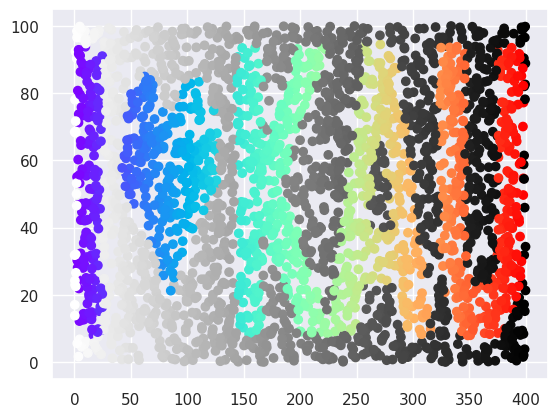

In [ ]:
#@title Dataset To Use Throughout the Lecture
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib as mpl

class MplColorHelper:
  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = mpl.cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

def make_hello(N=1000, rseed=42):
  # Make a plot with "HELLO" text; save as PNG
  fig, ax = plt.subplots(figsize=(4, 1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, 'I❤KAU', va='center', ha='center', weight='bold', size=85)
  fig.canvas.draw()
  # Now we can save it to a numpy array.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))[::-1,:,:]
  plt.close(fig)
  data = np.zeros(img.shape[:2])
  data[np.sum(img, axis=2) < 250*3] = 1
  data = data.T

  col_text = MplColorHelper('rainbow', 0, data.shape[0])
  col_back = MplColorHelper('binary', 0, data.shape[0])

  X = np.random.random_sample((N, 2)) * data.shape
  #X = np.random.randint(size=[N, 2], low=0, high=data.shape)
  colors = col_text.get_rgb(X[:, 0])
  mask = (data[X[:,0].astype(int), X[:,1].astype(int)] < 1)
  colors[mask] = col_back.get_rgb(X[mask, 0])
  return X, colors

X, cols = make_hello(3000)
plt.scatter(X[:, 0], X[:, 1], c=cols);

Here are manifold learning algorithms from `sklearn`

In [ ]:
#@title Comparison of SKLearn Manifold Learning Methods

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets


def make_s_curve(X):
  t = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
  t = (t * 2.0 - 1.0) * np.pi * 1.5
  x = np.sin(t)
  y = X[:, 1] / np.max(X[:, 0]) * 2 * np.pi
  z = np.sign(t) * (np.cos(t) - 1)
  return np.vstack((x, y, z)).T


XS = make_s_curve(X)
color = ['rgb(' +
         np.array2string(c[:-1],
                         formatter={'float_kind':lambda x:  "%.0f" % (x * 255)},
                         separator=',')[1:-1] +
         ')' for c in cols]


n_neighbors = 10
n_components = 2

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=5,
    column_widths=[0.4, 0.15, 0.15, 0.15, 0.15],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "surface", "rowspan": 2}, {"type": "xy"}, {"type": "xy"}, {"type": "xy"}, {"type": "xy"}],
           [            None                 , {"type": "xy"}, {"type": "xy"}, {"type": "xy"}, {"type": "xy"}]],
    horizontal_spacing = 0.0
);

fig.add_trace(
  go.Scatter3d(x=XS[:, 0], y=XS[:, 1], z=XS[:, 2],
               mode='markers',
               marker={'size': 5, 'opacity': 0.8, 'color': cols}
              ),
  row=1, col=1
);

annots = []

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors,
                                        n_components=n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(XS)
    t1 = time()
    fig.add_trace(
      go.Scatter(x=Y[:, 0], y=Y[:, 1],
                 mode='markers',
                 marker={'color': color, 'size': 5, 'opacity': 0.8}
                ),
      row=1, col=i+2
    );
    annots.append("%s: %.2g sec" % (labels[i], t1 - t0))

t0 = time()
Y = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(XS)
t1 = time()
fig.add_trace(
  go.Scatter(x=Y[:, 0], y=Y[:, 1],
              mode='markers',
              marker={'color': color, 'size': 5, 'opacity': 0.8}
            ),
  row=2, col=2
);
annots.append("Isomap: %.2g sec" % (t1 - t0))

t0 = time()
mds = manifold.MDS(n_components, normalized_stress='auto', max_iter=100, n_init=1)
Y = mds.fit_transform(XS)
t1 = time()
fig.add_trace(
  go.Scatter(x=Y[:, 0], y=Y[:, 1],
              mode='markers',
              marker={'color': color, 'size': 5, 'opacity': 0.8}
            ),
  row=2, col=3
);
annots.append("MDS: %.2g sec" % (t1 - t0))

t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(XS)
t1 = time()
fig.add_trace(
  go.Scatter(x=Y[:, 0], y=Y[:, 1],
              mode='markers',
              marker={'color': color, 'size': 5, 'opacity': 0.8}
            ),
  row=2, col=4
);
annots.append("SpectralEmbedding: %.1g sec" % (t1 - t0))

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(XS)
t1 = time()
fig.add_trace(
  go.Scatter(x=Y[:, 0], y=Y[:, 1],
              mode='markers',
              marker={'color': color, 'size': 5, 'opacity': 0.8}
            ),
  row=2, col=5
);
annots.append("t-SNE: %.2g sec" % (t1 - t0))

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    showlegend=False
)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
axs = [0.4, 0.55, 0.7, 0.85, 0.4, 0.55, 0.7, 0.85]
ays = [0.55, 0.55, 0.55, 0.55, 0.45, 0.45, 0.45, 0.45]
fig.layout.annotations = [{'text': n,
                           'y': y, 'x': x,
                           'xref': 'paper', 'yref': 'paper',
                           'xanchor': 'left',
                           'showarrow': False} for x,y,n in zip(axs, ays, annots)]


#fig.layout.annotations.extend(
#dict(
#x=-0.075,
#y=0.45,
#showarrow=False,
#text="testing",
#textangle=-90,
#xref=“paper”,
#yref=“paper”,
#font=dict(color=“black”, size=18),
#)
#)

fig.show()

**We will consider 3 methods:**

*   multidimensional scaling (MDS)
*   locally linear embedding (LLE)
*   isometric mapping (Isomap)

##Manifold learning: episode I. Multidimensional Scaling (MDS)

There are three kinds of MDS:

In [ ]:
#@title ##MDS


%%html
<svg width="200mm" height="50mm" version="1.1" viewBox="0 0 411.51 102.15" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(82.15 31.303)">
  <rect x="126.58" y="-31.303" width="91.139" height="21.163" fill="#000000" fill-opacity=".10606" opacity=".999"/>
  <rect x="258" y="38.711" width="71.361" height="16.571" fill="#7a1eff" fill-opacity=".20833" opacity=".999"/>
  <rect x="132.42" y="38.711" width="82.322" height="16.571" fill="#ff1e00" fill-opacity=".19697" opacity=".999"/>
  <rect x="6.4392" y="38.614" width="71.361" height="16.571" fill="#009e00" fill-opacity=".20833" opacity=".999"/>
  <g font-family="'Courier New'">
   <text x="161.54953" y="-15.594616" font-size="13.516px" stroke-width=".33791" style="line-height:1.25" xml:space="preserve"><tspan x="161.54953" y="-15.594616" fill="#000000" fill-opacity=".8" font-family="'Helvetica CY'" stroke-width=".33791">MDS</tspan></text>
   <g font-size="10.583px" stroke-width=".26458">
    <text x="23.517477" y="51.10112" style="line-height:1.25" xml:space="preserve"><tspan x="23.517477" y="51.10112" fill="#000000" fill-opacity=".8" font-family="'Helvetica CY'" stroke-width=".26458">Classical</tspan></text>
    <text x="163.34322" y="50.797485" style="line-height:1.25" xml:space="preserve"><tspan x="163.34322" y="50.797485" fill="#000000" fill-opacity=".8" font-family="'Helvetica CY'" stroke-width=".26458">Metric</tspan></text>
    <text x="270.66104" y="50.797741" style="line-height:1.25" xml:space="preserve"><tspan x="270.66104" y="50.797741" fill="#000000" fill-opacity=".8" font-family="'Helvetica CY'" stroke-width=".26458">Non-metric</tspan></text>
    <text x="-1.6620502" y="70.639603" style="line-height:1.25" xml:space="preserve"><tspan x="-1.6620502" y="70.639603" stroke-width=".26458">minimize <tspan font-family="'Courier New'" font-weight="bold">Strain</tspan></tspan></text>
    <text x="127.78105" y="70.680267" style="line-height:1.25" xml:space="preserve"><tspan x="127.78105" y="70.680267" stroke-width=".26458">minimize <tspan font-family="'Courier New'" font-weight="bold">Stress</tspan></tspan></text>
   </g>
  </g>
  <g fill="none" stroke="#000000" stroke-width=".26458px">
   <path d="m172.8-9.6644 119.22 47.62"/>
   <path d="m172.8-9.6644-130.39 48.109"/>
   <path d="m172.8-9.6644 0.0733 45.792"/>
  </g>
 </g>
</svg>


We will cover the metric MDS in this lecture.









## Metric MDS

In **metric MDS** we are seeking for a map

$$
\{\mathbf{x}_i \in \mathbb{R}^D \} \rightarrow \{\mathbf{y}_i \in \mathbb{R}^d \}
$$

so that pairwise distances are preserved

$$
d_{\mathbb{R}^D}(\mathbf{x}_i, \mathbf{x}_j) \approx d_{\mathbb{R}^d}(\mathbf{y}_i, \mathbf{y}_j)
$$

where $d_{\mathbb{R}^D}$ and $d_{\mathbb{R}^d}$ are distance functions.

Let me introduce **distance matrix** - $N\times N$ square matrix (2D array) containing the distances, taken pairwise, between the elements of a set.

$$
\mathcal{D}=
\begin{pmatrix}
0 & \dots & d_{1j} & \dots & d_{1N}\\
\dots & \dots & \dots & \dots & \dots\\
d_{i1} & \dots & d_{ij} & \dots & d_{iN}\\
\dots & \dots & \dots & \dots & \dots\\
d_{N1} & \dots & d_{Nj} & \dots & 0\\
\end{pmatrix}.
$$

--------

So we want to minimize loss function (called **stress**)

$$
\text{Stress} (\{\mathbf{y}_i\}) = \| \mathcal{D}_{\mathbb{R}^D}(\{\mathbf{x}_i\})- \mathcal{D}_{\mathbb{R}^d}(\{\mathbf{y}_i\}) \|^2
$$

In other words we want to find

$$
\{\hat{\mathbf{y}_i}\} = \text{argmin}_{\{\mathbf{y}_i\}} \text{Stress}(\{\mathbf{y}_i\}).
$$

This could be done numerically.
The procedure is called **stress majorization** and can be performed with different algorithms (Kruskal recommended an iterative steepest descent approach)

**Note:**

* distance representation is invariant with respect to rotations and transations, i.e. affine transformations.

In [ ]:
#@title Linear Dataset

def random_projection(X, dimension=3, rseed=25):
  assert dimension >= X.shape[1]
  rng = np.random.RandomState(rseed)
  C = rng.randn(dimension, dimension)
  e, V = np.linalg.eigh(np.dot(C, C.T))
  return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape

import plotly.graph_objects as go
#colors = ['rgb(' + np.array2string(c[:-1], formatter={'float_kind':lambda x:  "%.0f" % (x * 255)}, separator=',')[1:-1] + ')' for c in colorize['cmap'](0.255*colorize['c'])]

fig = go.Figure(data=[go.Scatter3d(x=X3[:, 0], y=X3[:, 1], z=X3[:, 2], mode='markers',  marker=dict(
        size=5,
        opacity=0.8,
        color=cols
    ))])
fig.show()

We can now ask the MDS estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix. The result recovers a representation of the original data

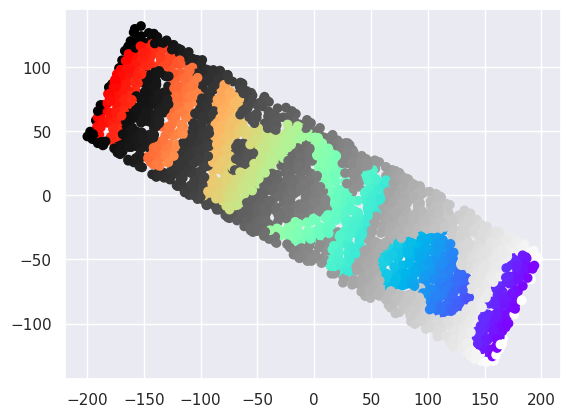

In [ ]:
import matplotlib.pyplot as plt
from sklearn import manifold
model = manifold.MDS(n_components=2, random_state=1, normalized_stress='auto')
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], c=cols)

This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data. In the case of MDS, the quantity preserved is the distance between every pair of points.


#Nonlinear manifolds: where MDS Fails

Our discussion so far has considered linear embeddings, which essentially consist of rotations, translations, and scaling of data into higher-dimensional spaces. Where MDS breaks down is when the embedding is nonlinear—that is, when it goes beyond this simple set of operations. Consider the following embedding, which takes the input and contorts it into an “$\text{S}$” shape in three dimensions:

In [ ]:
#@title The S-Dataset
def make_s_curve(X):
  t = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
  t = (t * 2.0 - 1.0) * np.pi * 1.5
  x = np.sin(t)
  y = X[:, 1] / np.max(X[:, 0]) * 2 * np.pi
  z = np.sign(t) * (np.cos(t) - 1)
  return np.vstack((x, y, z)).T

XS = make_s_curve(X)

import plotly.graph_objects as go
#colors = ['rgb(' + np.array2string(c[:-1], formatter={'float_kind':lambda x:  "%.0f" % (x * 255)}, separator=',')[1:-1] + ')' for c in colorize['cmap'](0.255*colorize['c'])]

fig = go.Figure(data=[go.Scatter3d(x=XS[:, 0], y=XS[:, 1], z=XS[:, 2], mode='markers',  marker=dict(
        size=5,
        opacity=0.8,
        color=cols
    ))])
fig.show()

The fundamental relationships between the data points are still there, but this time the data has been transformed in a nonlinear way: it has been wrapped up into the shape of an “$\text{S}$”. If we try a simple MDS algorithm on this data, it is not able to “unwrap” this nonlinear embedding, and we lose track of the fundamental relationships in the embedded manifold

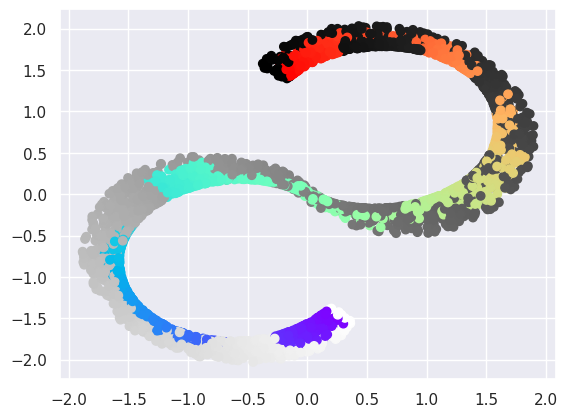

In [ ]:
import matplotlib.pyplot as plt
from sklearn import manifold
model = manifold.MDS(n_components=2, random_state=1, normalized_stress='auto')
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], c=cols)


The best two-dimensional linear embedding does not unwrap the S-curve, but
instead throws out the original y-axis.

#Manifold learning: episode II. A new hope.

In 2000 two revolutionary papers were printed in the same issue of *Science*. They proposed two new different methods (Isomap and LLE) for dimensionality reduction

* J. B. Tenenbaum, V. de Silva, J. C. Langford, [A Global Geometric Framework for Nonlinear Dimensionality Reduction](https://web.mit.edu/cocosci/Papers/sci_reprint.pdf), Science 290, (2000), 2319–2323.
* Sam Roweis & Lawrence Saul. [Nonlinear dimensionality reduction by locally linear embedding](http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf), Science 290, (2000), 2323--2326.



#Locally Linear Embedding (LLE)

Let me cite the explanations of the authors of LLE (it was good enough to be published in *Science* after all):
$$
\def\q{\unicode{x201C}}
\def\Q{\unicode{x201D}}
$$

$\q$  *The LLE algorithm is based on simple geometric intuitions.
Suppose the data consist of $N$ real-valued vectors $\mathbf{x}_i$, each of dimensionality $D$, sampled from some underlying manifold. Provided there is sufficient data (such that the manifold is well-sampled), we expect each data point and its neighbors to lie on or close to a locally linear patch of the manifold. We characterize the local geometry of these patches by linear coefficients that reconstruct each data point from its neighbors.*

*Suppose the data lie on or near a smooth nonlinear manifold of lower dimensionality* $d < D$. *To a good approximation then, there
exists a linear mapping — consisting of a translation, rotation, and rescaling—that maps the high-dimensional coordinates of each neighborhood to global internal coordinates on the manifold. By design, the reconstruction weights* $W_{ij}$ *reflect intrinsic geometric properties of the data that are invariant to exactly such transformations. We therefore expect their characterization of local geometry in the original data space to be equally
valid for local patches on the manifold. In particular, the same weights* $W_{ij}$ *that reconstruct the $i$th data point in* $D$ *dimensions should also reconstruct its embedded.* $\Q$

<br>

--------

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_16_manifold_learning/locally_linear_embedding_article.png)

--------

<br>

We can say that we reconstruct the entire manifold by small linear patches:


In [ ]:
#@title ##Linear patches

%%html
<svg width="180mm" height="93mm" version="1.1" viewBox="0 0 235.96 96.072" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".54902" fill-rule="evenodd" stroke="#000" stroke-opacity=".54902" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".54902" fill-rule="evenodd" stroke="#000" stroke-opacity=".54902" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".54902" fill-rule="evenodd" stroke="#000" stroke-opacity=".54902" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".66184" fill-rule="evenodd" stroke="#f00" stroke-opacity=".66184" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".66184" fill-rule="evenodd" stroke="#f00" stroke-opacity=".66184" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(182.9 38.714)">
  <g transform="matrix(1.5,0,0,-1.5,-353.47,1169.5)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{MDS}$$\n$$\\text{Classical}$$\n$$\\text{Non-metric}$$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-265.29,1060)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Metric}$$\nclassical\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433"><path d="m270.53 204.48c0.36847-0.58901 0.56376-0.58576 1.5027-1.0792 1.2284-0.64559 3.6009-1.4662 6.0376-2.1963 1.926-0.57707 6.9296-1.4528 9.0294-1.6749 12.717-1.7271 19.894-2.2139 36.19-0.83233 1.8715 0.25876 7.7519 1.2192 9.4179 1.5338 1.8554 0.35044 4.6513 1.3944 5.7698 1.822 0.37289 0.14255 2.5303 1.2589 3.3224 1.9471 1.0996 0.95537 0.98498 1.363 1.2045 1.6864" stroke="#000" stroke-dasharray="1.56406294, 0.26067716000000002" stroke-dashoffset="1.5119" stroke-miterlimit="10.433" stroke-opacity=".3285" stroke-width=".26068"/><path d="m279.31 191.33 19.185-8.1038 1.5983-6.587-15.711 6.7928z" stroke-opacity=".71845" stroke-width=".12388"/><path d="m279.24 191.66 19.474-8.2464 1.6716-6.8192" fill="none" stroke="#000" stroke-opacity=".343" stroke-width=".44024"/><path d="m288.98 185.12 20.767-1.5754 3.6119-5.7357-17.056 1.4386z" stroke-opacity=".71845" stroke-width=".12388"/><path d="m288.81 185.43 21.105-1.6243 3.7646-5.946" stroke="#000" stroke-opacity=".343" stroke-width=".47524"/><path d="m300.56 182.9 20.331 4.5156 4.6364-4.021-16.256-3.9907z" stroke-opacity=".68932" stroke-width=".12388"/><path d="m300.32 183.07 20.619 4.5617 4.8248-4.1564" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".35749" stroke-width=".66827"/><g fill="#fffff5" stroke="#fffffd" stroke-dashoffset="9.1232" stroke-linecap="square" stroke-width=".12388"><rect x="325.72" y="183.42" width=".10267" height=".72915"/><rect x="313.54" y="177.8" width=".72915" height=".80044"/><rect x="300.23" y="176.56" width="1.0057" height="1.8467"/></g></g><g fill="#2b2b2b" fill-opacity=".81068" fill-rule="evenodd" stroke="none"><ellipse transform="matrix(.94212 .33528 -.097946 .99519 0 0)" cx="337.12" cy="71.233" rx=".43094" ry=".30169" stroke-width="1.0069"/><ellipse transform="matrix(.97392 .2269 -.0042283 .99999 0 0)" cx="318.69" cy="108.69" rx=".44932" ry=".31113" stroke-width="1.0053"/><ellipse transform="matrix(.95354 .30127 -.11018 .99391 0 0)" cx="342.22" cy="79.2" rx=".44686" ry=".28146" stroke-width="1.0073"/><ellipse transform="matrix(.94261 .33391 -.098396 .99515 0 0)" cx="346.92" cy="70.344" rx=".45509" ry=".31731" stroke-width="1.0081"/><ellipse transform="matrix(.9516 .30734 -.10782 .99417 0 0)" cx="345.96" cy="78.575" rx=".46673" ry=".29982" stroke-width="1.0068"/><ellipse transform="matrix(.95062 .31034 -.10668 .99429 0 0)" cx="344.09" cy="76.811" rx=".45126" ry=".29267" stroke-width="1.0012"/></g><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".43204" stroke-width=".066667"><path d="m309.92 180.97 5.5255 2.3202"/><path d="m310.58 183.84 4.8592-0.55592"/><path d="m317.57 181.8-2.1224 1.4823"/><path d="m318.93 183.18-3.489 0.10429"/><path d="m320.09 185.87-4.6488-2.5829"/><path d="m315.44 183.29 5.3559 1.1649"/></g><g fill="#2b2b2b" fill-opacity=".81068" fill-rule="evenodd" stroke="none"><ellipse transform="matrix(.99848 -.055131 .014983 .99989 0 0)" cx="298.3" cy="198.34" rx=".46245" ry=".34473" stroke-width="1.0003"/><ellipse transform="matrix(.98581 -.16784 .058989 .99826 0 0)" cx="295.95" cy="232.36" rx=".44167" ry=".28791" stroke-width="1.0023"/><ellipse transform="matrix(-.97831 -.20714 .3119 -.95012 0 0)" cx="-346.55" cy="-113.38" rx=".41684" ry=".27048" stroke-width="1.0011"/><ellipse transform="matrix(.98419 -.17714 .055807 .99844 0 0)" cx="289.34" cy="232.11" rx=".45067" ry=".31001" stroke-width="1.0029"/><ellipse transform="matrix(.98236 -.18701 .052772 .99861 0 0)" cx="290" cy="237.16" rx=".47595" ry=".34559" stroke-width="1.0018"/><ellipse transform="matrix(.99876 -.049796 .071799 .99742 0 0)" cx="287.57" cy="194.11" rx=".40806" ry=".30541" stroke-width=".99889"/></g><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".63107" stroke-width=".066667"><path d="m297.4 182.6 5.3514-1.5388"/><path d="m300.85 181.84 1.9063-0.78089"/><path d="m305.39 182.34-2.6412-1.2862"/><path d="m303.67 179.47-0.91869 1.5847"/><path d="m301.12 179.22 1.6307 1.8374"/><path d="m297.79 180.48 4.9609 0.57418"/></g><g fill="#525252" fill-rule="evenodd" stroke="none"><ellipse transform="matrix(.91149 -.41133 .1952 .98076 0 0)" cx="250.35" cy="296.53" rx=".5168" ry=".28125" stroke-width="1.0027"/><ellipse transform="matrix(.89812 -.43974 .18043 .98359 0 0)" cx="259.46" cy="304.12" rx=".48513" ry=".28145" stroke-width="1.0074"/><ellipse transform="matrix(.89203 -.45198 .17454 .98465 0 0)" cx="266.07" cy="307.5" rx=".49156" ry=".2928" stroke-width="1.0194"/><ellipse transform="matrix(.89835 -.43927 .18065 .98355 0 0)" cx="265.01" cy="305.48" rx=".47646" ry=".27613" stroke-width="1.0147"/><ellipse transform="matrix(.91854 -.39533 .20429 .97891 0 0)" cx="249.2" cy="288.13" rx=".47746" ry=".25021" stroke-width="1.002"/><ellipse transform="matrix(.90698 -.42117 .1899 .9818 0 0)" cx="253.96" cy="296.97" rx=".47725" ry=".26566" stroke-width="1.0008"/></g><g fill="none" stroke="#000" stroke-miterlimit="10.433"><g stroke-opacity=".63592" stroke-width=".066667"><path d="m287.8 183.46 1.9813 0.27609"/><path d="m290.98 182.55-1.2018 1.1856"/><path d="m293.24 184.05-3.4592-0.30856"/><path d="m286.82 184.52 2.9557-0.77953"/><path d="m287.91 184.99 1.8676-1.2505"/><path d="m286.16 187.8 3.6216-4.0601"/></g><path d="m270.53 204.48c1.234-1.8328 6.4688-11.896 10.421-16.853 3.7176-4.663 6.0958-4.1527 9.2391-8.2272 1.9284-2.4788 7.6568-10.721 17.41-3.0455 1.7749 1.3967 4.8004 0.47043 7.695 0.85372 10.808-0.0143 26.303 26.421 27.691 28.208-1.028 2.5826-3.5627 3.6663-4.1165 3.9136-4.7063 2.1016-14.881 2.8023-24.702 2.7423-5.1508-0.0314-10.256-0.0107-13.694-0.056-15.846-0.20878-18.969-2.4612-27.661-5.2915-0.37024-0.12056-2.178-0.76844-2.2821-2.2443z" fill="none" stroke="#000" stroke-opacity=".52657" stroke-width=".31006"/></g><g stroke="none"><g fill="#2b2b2b" fill-opacity=".81068" fill-rule="evenodd"><ellipse transform="matrix(-.40552 -.91409 .95969 -.28105 0 0)" cx="-257.59" cy="206.18" rx=".43858" ry=".34512" stroke-width=".99923"/><ellipse transform="matrix(-.80245 -.59671 .71384 -.70031 0 0)" cx="-343.58" cy="40.843" rx=".45836" ry=".26092" stroke-width="1.0044"/><ellipse transform="matrix(-.61136 -.79136 .8613 -.5081 0 0)" cx="-311.11" cy="136.3" rx=".41773" ry=".29044" stroke-width="1.0039"/><ellipse transform="matrix(.80146 .59805 -.72497 .68878 0 0)" cx="340.7" cy="-41.565" rx=".45384" ry=".26676" stroke-width="1.0053"/><ellipse transform="matrix(.98583 -.16773 .059029 .99826 0 0)" cx="287.15" cy="225.49" rx=".44992" ry=".29309" stroke-width="1.0023"/><ellipse transform="matrix(.98815 -.15352 .064618 .99791 0 0)" cx="286.77" cy="219.88" rx=".47358" ry=".28249" stroke-width="1.0009"/><ellipse transform="matrix(.98554 .16944 -.24856 .96862 0 0)" cx="350.64" cy="122.12" rx=".41553" ry=".23846" stroke-width="1.0016"/><ellipse transform="matrix(.98594 -.1671 .059258 .99824 0 0)" cx="286.56" cy="225.04" rx=".43336" ry=".28124" stroke-width="1.0022"/><ellipse transform="matrix(.98786 -.15533 .063853 .99796 0 0)" cx="288.99" cy="218.96" rx=".41603" ry=".25106" stroke-width="1.0021"/><ellipse transform="matrix(.9848 -.17367 .056956 .99838 0 0)" cx="282.34" cy="228.77" rx=".40084" ry=".27034"/></g><g fill="#ff0101"><ellipse transform="matrix(.89761 -.44079 .17991 .98368 0 0)" cx="261.85" cy="304.11" rx=".4947" ry=".28766" fill-opacity=".79126"/><ellipse transform="matrix(.99607 -.088555 .034143 .99942 0 0)" cx="296.75" cy="207.5" rx=".46591" ry=".29131" fill-opacity=".75728" fill-rule="evenodd"/><ellipse transform="matrix(.94956 .3136 -.10546 .99442 0 0)" cx="340.79" cy="76.842" rx=".42756" ry=".28018" fill-opacity=".76214" fill-rule="evenodd"/></g><g fill="#2b2b2b" fill-opacity=".81068" fill-rule="evenodd"><ellipse transform="matrix(.9848 -.17367 .056956 .99838 0 0)" cx="282.99" cy="228.61" rx=".40084" ry=".27034"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="284.26" cy="261.82" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="280.05" cy="263.06" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="284.11" cy="263.43" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="281.96" cy="260.92" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="283.55" cy="259.89" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="287.62" cy="268.76" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="278.22" cy="267.57" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="273.58" cy="269.88" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="274.82" cy="268.12" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="281.35" cy="266.32" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="281.58" cy="271.34" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="290.75" cy="260.26" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="286.88" cy="264.55" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="287.97" cy="261.1" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="287.66" cy="268.6" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="296.27" cy="269.02" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="294.33" cy="268.96" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="291.04" cy="269.39" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="299.65" cy="266.17" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="298.44" cy="261.07" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="296.5" cy="261.01" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="293.21" cy="261.44" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="295.61" cy="258.31" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="299.63" cy="275.89" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="297.69" cy="275.83" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="294.41" cy="276.26" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="296.81" cy="273.13" rx=".40723" ry=".38815"/><ellipse transform="matrix(.66793 -.74422 .58985 .80751 0 0)" cx="143.34" cy="366.42" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="308.91" cy="265.72" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="304.21" cy="262.4" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="308.03" cy="263.02" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="301.97" cy="266.22" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="300.03" cy="266.15" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="304.45" cy="274.09" rx=".40723" ry=".38815"/><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="299.15" cy="263.45" rx=".40723" ry=".38815"/><ellipse transform="matrix(.46573 -.88493 .76936 .63882 0 0)" cx="53.338" cy="378.95" rx=".40723" ry=".38815"/><ellipse transform="matrix(.56649 -.82407 .68896 .7248 0 0)" cx="94.025" cy="375.4" rx=".40723" ry=".38815"/><ellipse transform="matrix(.58935 -.80788 .66839 .74381 0 0)" cx="100.91" cy="372.91" rx=".40723" ry=".38815"/><ellipse transform="matrix(.18641 -.98247 .92261 .38574 0 0)" cx="-54.701" cy="354.58" rx=".40723" ry=".38815"/><ellipse transform="matrix(.37308 -.9278 .83048 .55705 0 0)" cx="10.694" cy="377.28" rx=".40723" ry=".38815"/><g><ellipse transform="matrix(.59369 -.80469 .66437 .7474 0 0)" cx="104.71" cy="381.2" rx=".40723" ry=".38815"/><ellipse transform="matrix(.69753 -.71656 .55666 .83074 0 0)" cx="150.28" cy="372.65" rx=".40723" ry=".38815"/><ellipse transform="matrix(.43202 -.90187 .79291 .60934 0 0)" cx="35.248" cy="377.39" rx=".40723" ry=".38815"/></g><ellipse transform="matrix(.20877 -.97797 .91357 .40667 0 0)" cx="-44.736" cy="359.62" rx=".40723" ry=".38815"/><ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="-12.875" cy="370.01" rx=".42506" ry=".43568" stroke-width="1.0265"/><ellipse transform="matrix(.29421 -.95574 .87414 .48567 0 0)" cx="-16.439" cy="373.79" rx=".40723" ry=".38815"/><g><ellipse transform="matrix(.37308 -.9278 .83048 .55705 0 0)" cx="8.3659" cy="379.28" rx=".40723" ry=".38815"/><ellipse transform="matrix(.37308 -.9278 .83048 .55705 0 0)" cx="11.827" cy="383.13" rx=".40723" ry=".38815"/><ellipse transform="matrix(.37308 -.9278 .83048 .55705 0 0)" cx="8.5451" cy="384.33" rx=".40723" ry=".38815"/><ellipse transform="matrix(.37308 -.9278 .83048 .55705 0 0)" cx="14.602" cy="387.05" rx=".40723" ry=".38815"/></g><g stroke-width="1.0265"><ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="-16.903" cy="377.86" rx=".42506" ry=".43568"/><ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="-10.17" cy="378.5" rx=".42506" ry=".43568"/><ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="-11.807" cy="382.53" rx=".42506" ry=".43568"/></g><ellipse transform="matrix(.37308 -.9278 .83048 .55705 0 0)" cx="5.3177" cy="377.36" rx=".40723" ry=".38815"/><g><ellipse transform="matrix(.96936 -.24564 .039669 .99921 0 0)" cx="301.1" cy="279.43" rx=".40723" ry=".38815"/><ellipse transform="matrix(.83505 -.55017 .3654 .93085 0 0)" cx="195.85" cy="336.09" rx=".40723" ry=".38815"/><ellipse transform="matrix(.83505 -.55017 .3654 .93085 0 0)" cx="202" cy="336.81" rx=".40723" ry=".38815"/><ellipse transform="matrix(.69753 -.71656 .55666 .83074 0 0)" cx="142.86" cy="374.34" rx=".40723" ry=".38815"/></g><ellipse transform="matrix(.37308 -.9278 .83048 .55705 0 0)" cx="11.844" cy="391.54" rx=".40723" ry=".38815"/><ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="-6.7625" cy="373.3" rx=".42506" ry=".43568" stroke-width="1.0265"/></g></g><path d="m319.63 167.56c-3.308 1.4198-6.9898 6.4554-8.2864 11.06" fill="none" marker-end="url(#Arrow1Mend)" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".66184" stroke-width=".29938"/><text x="326.38553" y="171.22777" fill="#000000" font-family="Verdana" font-size="4.7037px" letter-spacing="0px" stroke="none" stroke-width=".11759" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="326.38553" y="175.5191" stroke-width=".11759"/></text>
<path d="m338.88 183.84c-9.721 5.2013-11.081 7.7852-12.969 10.145" fill="none" marker-end="url(#d)" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".66184" stroke-width=".42664"/><g id="content" transform="matrix(.39471 0 0 -.39471 209.88 435.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{non-linear manifold}$$\n$$\\text{linear patch}$$\n" xml:space="preserve"><g stroke-width="0"><g fill-opacity=".52174" stroke-opacity="0"><path d="m331.71 642.96v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.67 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.51 0-0.76 0-0.77 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m340.84 641.67v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.15 0.3-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.09 0.06-0.1 0.06-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.12-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.21-1.34-0.22-0.44-0.66-0.73-1.16-0.73-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m342.22 642.96v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><polygon transform="translate(67.478,-55.628)" points="279.29 697.6 279.29 697.03 281.93 697.03 281.93 697.6"/><path d="m351.75 646.43-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56v-5.17c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.33 0.01 0.86 0.03 1.11 0.03s0.74-0.02 1.11-0.03v0.31c-0.67 0-0.78 0-0.78 0.44z"/><path d="m354.52 643.93-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.54v-2.68c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.69-0.02 1.03-0.03v0.31c-0.65 0-0.69 0.05-0.69 0.43z"/><path d="m354.56 645.66-0.01 0.03v0.06l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.03 0.06-0.02 0.03-0.01 0.02-0.02 0.02-0.02 0.01-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.28 0 0.53 0.21 0.53 0.53z"/><path d="m356.61 642.96v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.76 0-0.77 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m362.16 641.84 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.34-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m368.8 640.29 0.01-0.03v-0.04l0.01-0.04 0.01-0.03 0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.04 0.01-0.03 0.02-0.03 0.02-0.04 0.04-0.06 0.03-0.03 0.04-0.06 0.03-0.03 0.03-0.02 0.03-0.03 0.12-0.08 0.04-0.01 0.04-0.02 0.03-0.01 0.12-0.03h0.09c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.07 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.48 0-0.89 0.35-0.89 0.84 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.59-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m372.13 642.84v1.09l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.26-0.03v0.31h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.52c0 0.99 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.74 0.6-0.73 0-1.08-0.66-1.22-1.09z"/><path d="m334.26 632.92v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.62 0 0.73-0.53 0.73-1.1v-2.32c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.59-1.44-0.97-0.14 0.86-0.88 0.97-1.33 0.97-0.73 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m344.78 630.25 0.01-0.03v-0.04l0.01-0.04 0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.04-0.06 0.01-0.04 0.02-0.03 0.03-0.03 0.04-0.06 0.03-0.03 0.02-0.03 0.03-0.02 0.03-0.03 0.09-0.06 0.04-0.02 0.03-0.01 0.04-0.02 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.94-0.71-1.28-1.16-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.6-1.05 0.65 0 1.11 0.4 1.3 0.86z"/><path d="m347.54 632.92v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.62 0 0.73-0.53 0.73-1.1v-2.32c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m353.75 633.89-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.54v-2.68c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.69-0.02 1.03-0.03v0.31c-0.66 0-0.69 0.05-0.69 0.43z"/><path d="m353.78 635.62v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.28 0 0.52 0.21 0.52 0.53z"/><path d="m356.49 633.78v1.15c0 0.88 0.48 1.36 0.92 1.36 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.23 0.16-0.43 0.43-0.43 0.29 0 0.44 0.2 0.44 0.44 0 0.37-0.37 0.69-0.9 0.69-0.7 0-1.55-0.52-1.55-1.58v-1.14h-0.78v-0.31h0.78v-3.22c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.39 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.19h1.14v0.31z"/><path d="m362.49 631.63v0.11l-0.01 0.12-0.02 0.12-0.04 0.22-0.03 0.11-0.08 0.22-0.04 0.1-0.1 0.2-0.12 0.18-0.07 0.09-0.14 0.16-0.16 0.16-0.08 0.06-0.09 0.07-0.18 0.12-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.11 0.04-0.1 0.02-0.22 0.04-0.11 0.01h-0.11l-0.01-0.22c0.43 0 0.86-0.22 1.12-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.15-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.2 0 2.21 0.97 2.21 2.24z"/><path d="m364.54 636.39-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56v-5.17c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.33 0.01 0.86 0.03 1.11 0.03s0.74-0.02 1.11-0.03v0.31c-0.67 0-0.78 0-0.78 0.44z"/><path d="m369.33 630.05v-0.66l1.47 0.11v0.31c-0.7 0-0.78 0.07-0.78 0.55v6.03l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.35-0.72 0.61-1.26 0.61l0.04-0.22c0.35 0 0.77-0.15 1.08-0.59 0.11-0.17 0.11-0.19 0.11-0.37v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.44 0-0.8 0.26-1.04 0.63-0.26 0.41-0.29 0.98-0.29 1.39 0 0.36 0.02 0.96 0.31 1.41 0.21 0.3 0.58 0.63 1.12 0.63l-0.04 0.22c-1.17 0-2.22-0.97-2.22-2.25 0-1.27 0.98-2.25 2.11-2.25 0.64 0 1.09 0.34 1.34 0.66z"/></g><g fill-opacity=".54106"><path d="m281.5 684.13-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-5.17c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.11 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45z"/><path d="m284.27 681.63-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m284.31 683.36v0.05l-0.01 0.03v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.02-0.02 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.52 0-0.27 0.22-0.53 0.53-0.53 0.28 0 0.53 0.21 0.53 0.53z"/><path d="m286.37 680.65v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m291.91 679.53 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.34-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m298.55 677.99 0.01-0.04v-0.03l0.02-0.08 0.01-0.03 0.02-0.08 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.06-0.09 0.03-0.03 0.02-0.03 0.03-0.03 0.02-0.03 0.03-0.03 0.12-0.08 0.04-0.02 0.03-0.02 0.08-0.02 0.03-0.01 0.04-0.01 0.05-0.01h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.28-1.16-1.28-0.49 0-0.9 0.34-0.9 0.84 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.5-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.8 0.97-1.05 1.6-1.05 0.65 0 1.11 0.4 1.3 0.86z"/><path d="m301.88 680.53v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.42 0.43-0.42 0.18 0 0.42 0.11 0.42 0.43s-0.3 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m309.15 680.97v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.64c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.75l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.22c0.29 0.5 0.78 0.79 1.28 0.79 0.73 0 1.34-0.87 1.34-2 0-1.2-0.7-2.03-1.43-2.03-0.4 0-0.78 0.19-1.05 0.6l-0.14-0.13c0.05-0.16 0.47-0.69 1.23-0.69 1.18 0 2.22 0.97 2.22 2.25 0 1.26-0.97 2.25-2.08 2.25-0.78 0-1.2-0.44-1.4-0.66z"/><path d="m316.29 677.99v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.08-0.12 0.03-0.03 0.02-0.03 0.06-0.06 0.15-0.1 0.04-0.02 0.04-0.01 0.03-0.01 0.12-0.03h0.09c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.28-1.17-1.28-0.48 0-0.89 0.34-0.89 0.84 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.8 0.97-1.05 1.59-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m319.68 681.21h1.42v0.31h-1.42v1.83h-0.25c-0.01-0.82-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.66 0-0.66 0.9-0.66 1.07z"/><path d="m322.99 679.4v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.01 0.06 0.01 0.07 0.03 0.18 0.01 0.05 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.12 0.08 0.05 0.03 0.06 0.03 0.05 0.03 0.12 0.04 0.05 0.02 0.06 0.01 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.06-0.37-0.4-0.03-0.46-0.33-0.46-0.46 0-0.25 0.18-0.45 0.45-0.45 0.26 0 0.46 0.17 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.28-0.93-0.93-1.04-1.3-1.04-0.53 0-1.41 0.42-1.41 2.02z"/><path d="m327.07 677.99v-0.11l-0.01-0.04v-0.06l-0.01-0.02-0.01-0.03-0.04-0.08-0.03-0.03-0.08-0.04-0.03-0.01h-0.03l-0.03-0.01h-0.03l-0.04-0.01h-0.35l-0.03-0.01h-0.06v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98v3.48l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/></g></g><g transform="matrix(.82184 0 0 .82142 22.135 100.03)" fill-opacity=".54902" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".54902" stroke-width="1.01"><path d="m130.57 578.42v32.353" marker-end="url(#a)"/><path d="m130.57 578.42h32.353" marker-end="url(#c)"/><path d="m130.57 578.42-24.117-21.565" marker-end="url(#b)"/></g></g></g></g>
 </g>
 <path d="m44.366 82.685c0.72015 1.3133 17.245 7.7183 26.301 9.7903 10.621 2.4298 23.498 2.8184 27.726 3.0698 7.7058 0.45822 16.403 0.31114 24.527 0.34548 9.1055 0.03849 17.63 0.22109 25.993 0.08062 7.5657-0.12708 14.88-0.65047 21.421-1.2801 7.5183-0.72376 14.049-1.6463 19.346-3.2422 4.789-1.4427 7.9937-3.2428 10.363-5.6728 0.54069-0.59551 1.2778-1.2835 1.869-2.1897 0.8861-1.3583 1.5726-2.9188 1.805-3.0858" fill="none" stroke="#000" stroke-opacity=".33333" stroke-width="1.5115"/>
 <g fill="#2b2b2b" fill-opacity=".81068" stroke-width="2.3096">
  <ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="34.549" cy="211.07" rx=".95639" ry=".98028"/>
  <ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="22.585" cy="205.05" rx=".95639" ry=".98028"/>
  <ellipse transform="matrix(.099488 -.99504 .87681 .48083 0 0)" cx="24.282" cy="219.44" rx=".95639" ry=".98028"/>
 </g>
</svg>







The high level outline of the algorithm is the following:

$\qquad$ `1. Find` $k$ `nearest neighbors`.

$\qquad$ `2. Solve for reconstruction weights`.

$\qquad$ `3. Compute embedding coordinates` Y `using weights` W.

Note that we try to minimize $2$ loss functions one by one.

On step `2` we want to minimize loss function

$$
\epsilon(\{w_{ij}\})=\sum_i^N \|\mathbf{x}_i-\sum_j^k w_{ij}\mathbf{x}_j\|^2
= \sum_i^N \|\sum_j^k w_{ij} (\mathbf{x}_i-\mathbf{x}_j)\|^2
$$

with additional restriction $\sum_j^k w_{ij}=1$.

In essence we seek for

$$
\{ \hat{w_{ij}} \}=\text{argmin}_
{\sum_j^k w_{ij}=1}
\epsilon\left(\{w_{ij}\}\right)
$$

On step `3` we want to minimize loss function

$$
\Phi(\{\mathbf{y}_i\})=\sum_i \|\mathbf{y}_i-\sum_j w_{ij}\mathbf{y}_j\|^2
$$

we seek for

$$
\{ \hat{\mathbf{y}_i} \}=\text{argmin}_{\{\mathbf{y}_i\}}\Phi(\{\mathbf{y}_i\})
$$

In conclusion we can say

$$
\boxed{\text{LLE} = \text{sum of local MDS's}}
$$

As we have seen the source of the problem is that MDS tries to preserve distances between faraway points when constructing the embedding. So in LLE we modified the algorithm such that it only preserves distances between nearby points? The resulting embedding would be closer to what we want.

In [ ]:
#@title Distances considered for LLE (left) and MDS (right)

from plotly.subplots import make_subplots
import plotly.graph_objects as go
#colors = ['rgb(' + np.array2string(c[:-1], formatter={'float_kind':lambda x:  "%.0f" % (x * 255)}, separator=',')[1:-1] + ')' for c in colorize['cmap'](0.255*colorize['c'])]

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=XS[:, 0], y=XS[:, 1], z=XS[:, 2],
                           mode='markers', name='datapoints (LEFT)',
                           marker=dict(
                              size=5,
                              opacity=0.8,
                              color=cols
                            )
                           ), row=1, col=1)
fig.add_trace(go.Scatter3d(x=XS[:, 0], y=XS[:, 1], z=XS[:, 2],
                           mode='markers', name='datapoints (RIGHT)',
                           marker=dict(
                              size=5,
                              opacity=0.8,
                              color=cols
                            )
                           ), row=1, col=2)

# construct lines for LLE
from sklearn.neighbors import NearestNeighbors

rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
nbrs = NearestNeighbors(n_neighbors=100).fit(XS).kneighbors(XS[ind[:100]])[1]
lines_LLE = []
for i in range(100):
  for j in nbrs[i]:
    lines_LLE = lines_LLE + [XS[ind[i]], XS[j], np.array([None, None, None])]
lines_LLE = np.array(lines_LLE)

fig.add_trace(go.Scatter3d(
    x=lines_LLE[:, 0],
    y=lines_LLE[:, 1],
    z=lines_LLE[:, 2],
    mode='lines', opacity=0.2,
    line={'color': 'rgb(0,0,0)', 'width': 1},
    name='LLE connections'
), row=1, col=1)

# construct lines for MDS
lines_MDS = []
for i in ind[:100]:
  for j in ind[100:200]:
    lines_MDS = lines_MDS + [XS[i], XS[j], np.array([None, None, None])]
lines_MDS = np.array(lines_MDS)

fig.add_trace(go.Scatter3d(
    x=lines_MDS[:, 0],
    y=lines_MDS[:, 1],
    z=lines_MDS[:, 2],
    mode='lines', opacity=0.1,
    line={'color': 'rgb(0,0,0)', 'width': 1},
    name='MDS connections'
), row=1, col=2)

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    showlegend=True
)

fig.show()

Here each faint line represents a distance that should be preserved in the embedding. On the left is a representation of the model used by MDS: it tries to preserve the distances between each pair of points in the dataset. On the right is a representation of the model used by a manifold learning algorithm called locally linear embedding (LLE): rather than preserving all distances, it instead tries to preserve only the distances between neighboring points: in this case, the nearest $100$ neighbors of each point.
Thinking about the left panel, we can see why MDS fails: there is no way to flatten this data while adequately preserving the length of every line drawn between the two points. For the right panel, on the other hand, things look a bit more optimistic. We could imagine unrolling the data in a way that keeps the lengths of the lines approximately the same. This is precisely what LLE does, through a global optimization of a cost function reflecting this logic.
LLE comes in a number of flavors; here we will use the modified LLE algorithm to
recover the embedded two-dimensional manifold. In general, modified LLE does better than other flavors of the algorithm at recovering well-defined manifolds with very little distortion

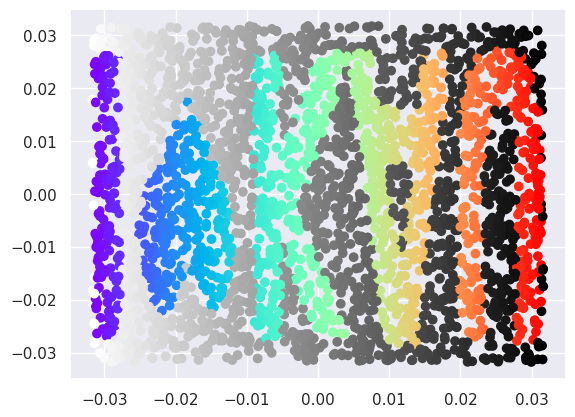

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
outLLE = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(outLLE[:, 0], outLLE[:, 1], c=cols)


The result remains somewhat distorted compared to our original manifold, but captures the essential relationships in the data!


#Isomap

The basic idea of dimensionality reduction methods is to lower dimensionality but preserve distances between the points.

But consider this: when points lie on a manifold embedded in Euclidean space the distance between them can be calculated in two ways
* **Euclidean distance** - distance calculated in the space the manifold is embedded in;
* **geodesic distance**   - calculated along the manifold that is the length of the shortest geodesic on the manifold.

If the manifold is essentially non-linear we want to preserve geodesic distance (and not Euclidean distance) as it captures the idea of proximity between neighboring points. Consider pictures **A** and **B** from the original paper to see the difference between the two distances

<br>

--------
![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_16_manifold_learning/isomap_article.png)

--------

<br>

The problem is that we do not know the manifold the points belong to: all we have are the points and nothing else. Thus we need a way to approximate geodesic distance! Isomap algorithm proposes to do that in two steps:

* build the $k$-nearest neighbors graph that connects every point to its $k$ nearest (in the sense of Euclidean distance) neighbors;
* calculate the shortest path (via [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [Floyd–Warshall algorithms](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm)) that will approximate the distance between any two datapoints.

The picture **C** shows that the red line (approximation using graph) is pretty close to the actual geodesic distance for the swiss roll manifold.

The final step applies classical MDS to the matrix of graph distances $\mathcal{D}_{\text{geod}}$ constructing an embedding of the data in a d-dimensional Euclidean space Y that best preserves the manifold's estimated intrinsic
geometry.

The high level outline of the algorithm is the following:

$\qquad$ `1. Construct neighborhood graph;`

$\qquad$ `2. Compute shortest paths;`

$\qquad$ `3. Construct` $d$`-dimensional embedding with MDS.`

Here is the summary of the method as was written by the authors:

$$
\def\q{\unicode{x201C}}
\def\Q{\unicode{x201D}}
$$

$\q$*Our approach builds on classical MDS but seeks to preserve the intrinsic geometry of the data, as captured in the geodesic manifold distances between all pairs of data points. The crux is estimating the geodesic distance between faraway points, given only input-space distances. For neighboring points, input-space distance (Euclidean distance) provides a good approximation to geodesic distance. For faraway points, geodesic distance can be approximated by adding up a sequence of “short hops” between neighboring points. These approximations are computed efficiently by finding shortest paths in a graph with edges connecting neighboring data points.*$\Q$

So basically

$$
\boxed{\text{Isomap = MDS with geodesic distance}}
$$

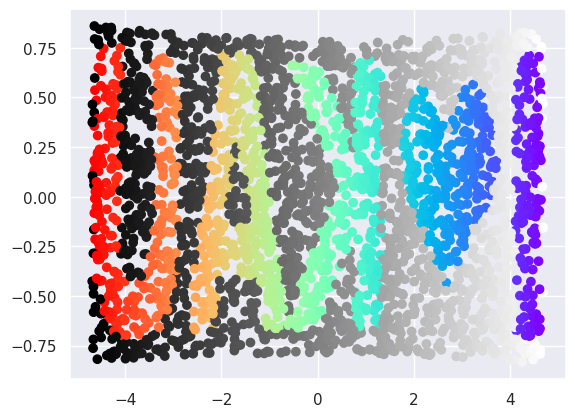

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components = 2, n_neighbors=100)
outISO = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(outISO[:, 0], outISO[:, 1], c=cols)

#Manifold learning in scikit-learn

**Note:** run this code before using

**Note:** helicoid shows difference between Isomap and LLE

**Note:** swiss roll, isomap, # of neighbors 10, 50, 100

In [ ]:
#@title Explore manifold learning
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.manifold import Isomap

def linear_embedding(datapoints, neighbors):
  model = LocallyLinearEmbedding(n_neighbors=neighbors, n_components=2, method='modified', eigen_solver='dense')
  return model.fit_transform(datapoints)

def multidim_scaling(datapoints, neighbors):
  model = MDS(n_components=2, dissimilarity='precomputed', random_state=1, normalized_stress='auto')
  D = pairwise_distances(datapoints)
  return model.fit_transform(D)

def isomap(datapoints, neighbors):
  model = Isomap(n_components = 2, n_neighbors=neighbors)
  return model.fit_transform(datapoints)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib as mpl

class MplColorHelper:
  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = mpl.cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

def make_hello(N=1000, rseed=42):
  # Make a plot with "HELLO" text; save as PNG
  fig, ax = plt.subplots(figsize=(4, 1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, 'I❤KAU', va='center', ha='center', weight='bold', size=85)
  fig.canvas.draw()
  # Now we can save it to a numpy array.
  img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
  img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))[::-1,:,:]
  plt.close(fig)
  data = np.zeros(img.shape[:2])
  data[np.sum(img, axis=2) < 250*3] = 1
  data = data.T

  col_text = MplColorHelper('rainbow', 0, data.shape[0])
  col_back = MplColorHelper('binary', 0, data.shape[0])

  X = np.random.random_sample((N, 2)) * data.shape
  #X = np.random.randint(size=[N, 2], low=0, high=data.shape)
  colors = col_text.get_rgb(X[:, 0])
  mask = (data[X[:,0].astype(int), X[:,1].astype(int)] < 1)
  colors[mask] = col_back.get_rgb(X[mask, 0])
  return X, colors

X, cols = make_hello(3000)
colors = ['rgb(' +
         np.array2string(c[:-1],
                         formatter={'float_kind':lambda x:  "%.0f" % (x * 255)},
                         separator=',')[1:-1] +
         ')' for c in cols]

def unwind_manifold(datapoints, method, neighbors):
  methods = {'lle': linear_embedding, 'mds': multidim_scaling, 'isomap': isomap}
  return methods[method](datapoints, neighbors)

def roll(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.2)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  roulette = np.array([[(2 + p[0]) * np.cos(2 * p[0]), (2 + p[0]) * np.sin(2 * p[0]), 2.0 * p[1]] for p in params])
  return roulette

def s_curve(X):
  t = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
  t = (t * 2.0 - 1.0) * np.pi * 1.5
  x = np.sin(t)
  y = X[:, 1] / np.max(X[:, 0]) * 2 * np.pi
  z = np.sign(t) * (np.cos(t) - 1)
  return np.vstack((x, y, z)).T

def plane(X):
  p = np.array([[x[0], x[1], x[0] + x[1]] for x in X])
  return p

def mobius(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.1)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  mobius = np.array([[(1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.cos(p[0]), (1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.sin(p[0]), p[1]/2.0 * np.sin(p[0]/2)] for p in params])
  return mobius

def cylinder(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.1)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cylinder = np.array([[2.0 * np.cos(p[0]), 2.0 * np.sin(p[0]), p[1]] for p in params])
  return cylinder

def helicoid(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  helicoid = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[0]] for p in params])
  return helicoid

def cone(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.2)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cone = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[1]] for p in params])
  return cone

def transform_to_3d(x, manifold):
  funcs = {'s_curve': s_curve, 'mobius': mobius, 'cylinder': cylinder,
           'helicoid': helicoid, 'cone': cone, 'plane': plane,
           'roll': roll}
  return funcs[manifold](x)

def plot_unwinded(x):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.scatter(x[:, 0], x[:, 1], c=cols)
  #ax.set_ylim(0.15, -0.15);
  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json
from IPython.display import display, clear_output
from scipy.spatial import Delaunay

def invoke(manifold, method, neighbors):
  man = transform_to_3d(X, manifold)
  unw = unwind_manifold(man, method, int(neighbors))
  figr = plot_unwinded(unw)
  image_base64 = figure_to_base64(figr)


  x_ = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100)
  y_ = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), num=100)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  Y = transform_to_3d(x_vec, manifold) #[:,2].reshape((x_.shape[0],y_.shape[0]))

  tri = Delaunay(x_vec, )
  simplices = tri.simplices
  I, J, K = ([triplet[c] for triplet in tri.simplices] for c in range(3))
  #print(Y[:,0].shape, Y[:,1].shape, Y[:,2].shape)
  return IPython.display.JSON({'image': image_base64,
                               'g_x': Y[:,0].tolist(), 'g_y': Y[:,1].tolist(), 'g_z': Y[:,2].tolist(),
                               's_x': man[:, 0].tolist(), 's_y': man[:, 1].tolist(), 's_z': man[:, 2].tolist(), 's_c': colors,
                               'simplices': [I, J, K]})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <script type="application/javascript">

    var params = null;
    var debug_txt = "";
    var bg_image = new Image();


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
      }
    }

    var timer

   function plot_3d(g_x, g_y, g_z, simp)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           i: simp[0],
           j: simp[1],
           k: simp[2],
           type: 'mesh3d',
           opacity: 0.4,
           showscale: false,
           colorscale: "Viridis"
        }];
     var layout = {
          title: 'Manifold',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     //debug_txt = 'before plot';
     Plotly.newPlot(cell_for_plot, data, layout);
     //debug_txt = 'go';
   }

   function plot_scatter(s_x, s_y, s_z, colors)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 4,
             color: colors,
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
     var layout = {
          title: 'Manifold',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          margins: {l: 0, r: 0, b: 0, t: 0},
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
    //Plotly.newPlot(cell_for_plot, data, layout);
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 100;

    async function calculate() {
      var e = document.getElementById("select_kernel");
      var ker_name = e.options[e.selectedIndex].value;
      var e1 = document.getElementById("select_metric");
      var metric_name = e1.options[e1.selectedIndex].value;
      const n = document.getElementById("neighbors").value;
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [ker_name, metric_name, n], {});
      params = result.data['application/json'];

      bg_image.src = 'data:image/  png;base64,' + params.image;
      //cell_for_plot = document.getElementById('for_plotly_plot');

      plot_3d(params.g_x, params.g_y, params.g_z, params.simplices);
      plot_scatter(params.s_x, params.s_y, params.s_z, params.s_c);

    }

 </script>

<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>
<div id="custom_controls" style="position:absolute; top:0px; left:600px;">
  <canvas id="canvas" width="600" height="600"></canvas>
  <div style="position:absolute; top:0px; left:-600px;">
   Manifold:
   <select id="select_kernel">
       <option value="plane">Plane in 3D</option>
       <option value="mobius">Mobius strip</option>
       <option value="s_curve">S-shaped sheet</option>
       <option value="cylinder">Cylinder</option>
       <option value="helicoid">Helicoid</option>
       <option value="cone">Cone</option>
       <option value="roll">Swiss Roll</option>
   </select>

   Method:
   <select id="select_metric">
       <option value="lle">Locally Linear Embedding (LLE)</option>
       <option value="mds">Multidimensional Scaling (MDS)</option>
       <option value="isomap">Isomap (Iso)</option>
   </select>

   Neighbors:
   <input type="number" id="neighbors" min="0" max="1000" value="100"></input>

    <button type="button" onclick="calculate();">
      Unfold
    </button>
  </div>
</div>
<div>

<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_locally_linear.py:369: RuntimeWarning: invalid value encountered in scalar divide
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


#Example: Isomap on images of faces

One place manifold learning is often used is in understanding the relationship
between high-dimensional data points. A common case of high-dimensional data is
images; for example, a set of images with $1000$ pixels each can be thought of as collection of points in $1000$ dimensions—the brightness of each pixel in each image defines the coordinate in that dimension.

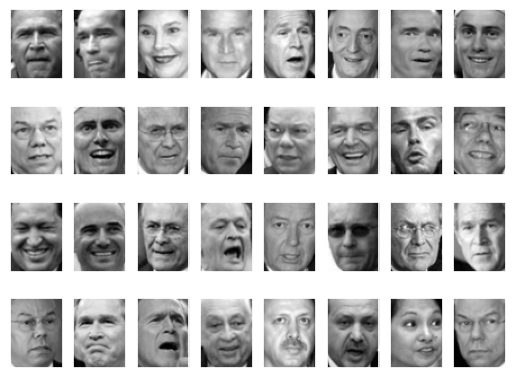

In [ ]:
#@title Dataset

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='gray')

We have $2370$ images, each with $2914$ pixels. In other words, the images can be thought of as data points in a $2914$-dimensional space!

We would like to plot a low-dimensional embedding of the $2914$-dimensional data to learn the fundamental relationships between the images. One useful way to start is to compute a PCA, and examine the explained variance ratio, which will give us an idea of how many linear features are required to describe the data

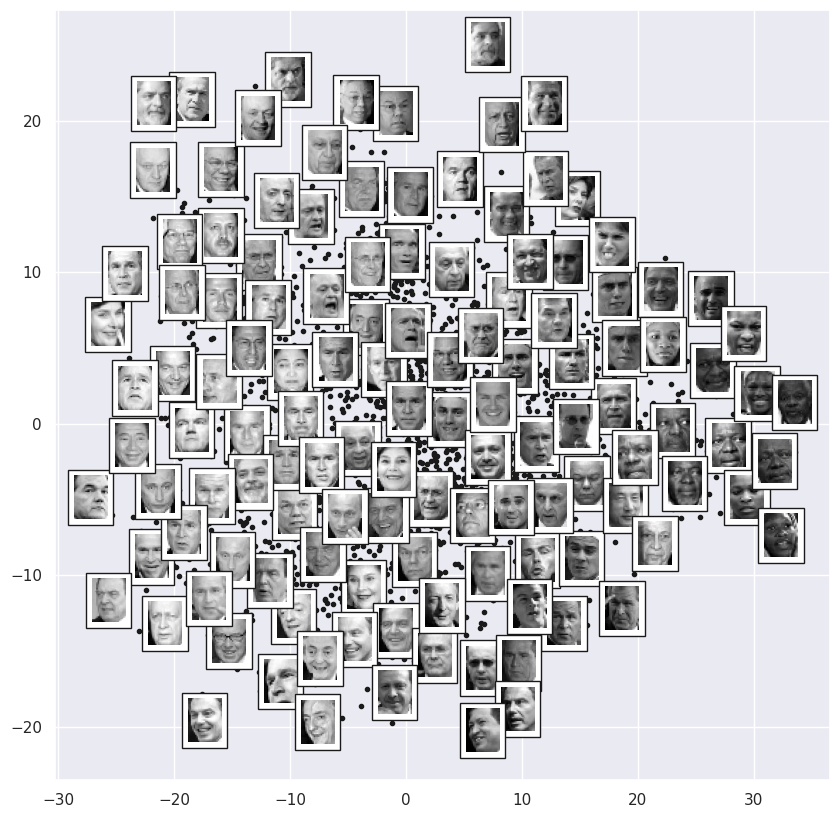

In [ ]:
#@title IsoMap Used on the Dataset
from sklearn.manifold import Isomap
model = Isomap(n_components = 2)
proj = model.fit_transform(faces.data)

from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
  ax = ax or plt.gca()
  proj = model.fit_transform(data)
  ax.plot(proj[:, 0], proj[:, 1], '.k')
  if images is not None:
    min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
    shown_images = np.array([2 * proj.max(0)])
    for i in range(data.shape[0]):
      dist = np.sum((proj[i] - shown_images) ** 2, 1)
      if np.min(dist) < min_dist_2:
        # don't show points that are too close
        continue
      shown_images = np.vstack([shown_images, proj[i]])
      imagebox = offsetbox.AnnotationBbox(
      offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
      ax.add_artist(imagebox)

fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

The result is interesting: the first two Isomap dimensions seem to describe global image features: the overall darkness or lightness of the image from left to right, and the general orientation of the face from bottom to top. This gives us a nice visual indication of some of the fundamental features in our data.


#Example: visualizing structure in handwritten digits

As another example of using manifold learning for visualization, let's take a look at the MNIST handwritten digits set (28x28 -> 3).

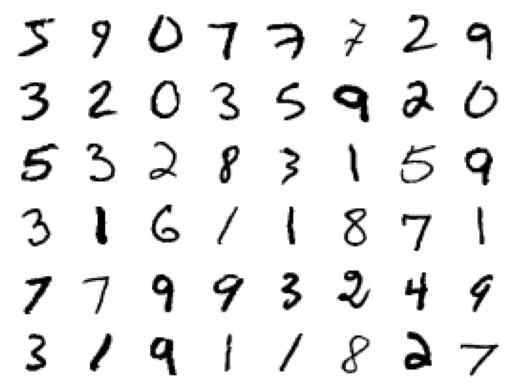

In [ ]:
#@title Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto')
digits = {'data': mnist.data.to_numpy(), 'targets': mnist.target.to_numpy()}
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
  axi.imshow(digits['data'][1250 * i].reshape(28, 28), cmap='gray_r')

In [ ]:
#@title 3-Components Isomap
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['targets'], test_size=0.05, random_state=42)

from sklearn.manifold import Isomap
model = Isomap(n_components=3, n_neighbors=5, eigen_solver='dense')
projected = model.fit_transform(X_test)

import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

R, G, B = projected[:, 0], projected[:, 1], projected[:, 2]
cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[int(d)] for d in y_test]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=R, y=G, z=B, mode='markers',
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False,
                  title_text="3-component ISOmap for MNIST",
                  scene={"xaxis": {"title": "component 1"},
                         "yaxis": {"title": "component 2"},
                         "zaxis": {"title": "component 3"}},
                  showlegend=False)

fig.show()

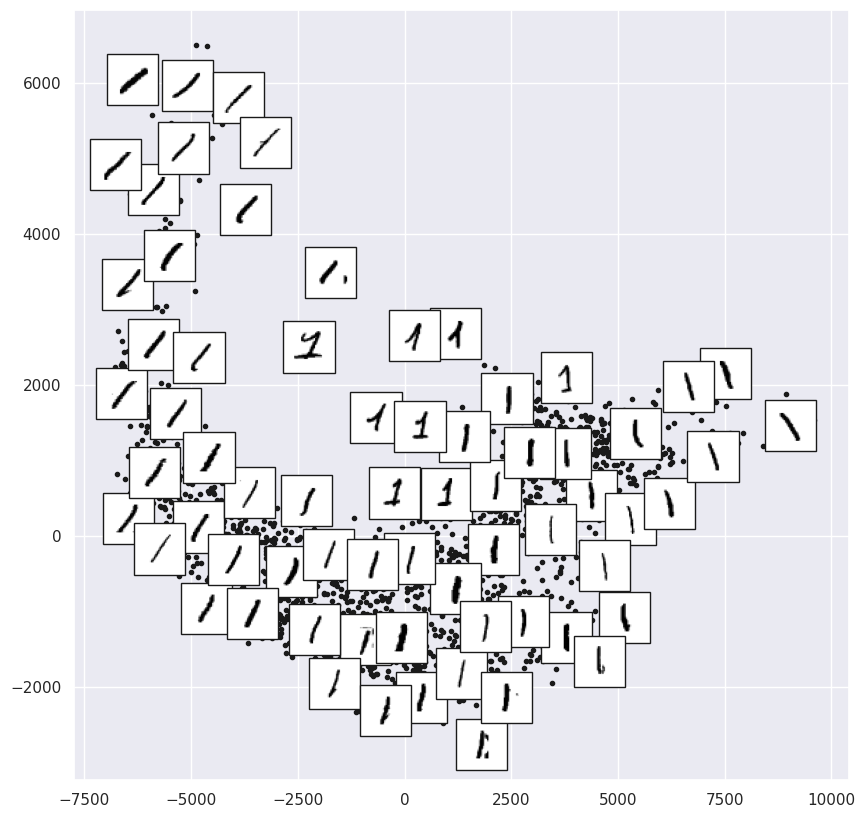

In [ ]:
#@title IsoMap with Ones
data = digits['data'][digits['targets'].astype(int) == 1][::4]
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')

The result gives you an idea of the variety of forms that the number “$1$” can take within the dataset. The data lies along a broad curve in the projected space, which appears to trace the orientation of the digit. As you move up the plot, you find ones that have hats and/or bases, though these are very sparse within the dataset. The projection lets us identify outliers that have data issues (i.e., pieces of the neighboring digits that snick into the extracted images).

Now, this in itself may not be useful for the task of classifying digits, but it does help us get an understanding of the data, and may give us ideas about how to move forward, such as how we might want to preprocess the data before building a classification pipeline.


#Conclusions

*   visualization
*   noise filtering
*   feature extraction and engineering

**Problems:**
 *  In manifold learning, there is no good framework for handling missing data.
 In contrast, there are straightforward iterative approaches for missing data in PCA.
 *  In manifold learning, the presence of noise in the data can "short-circuit" the manifold and drastically change the embedding.
 In contrast, PCA naturally filters noise from the most important components.
 *  The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors.
 In contrast, PCA does not involve such a choice.
 *  In manifold learning, the globally optimal number of output dimensions is difficult to determine.
 In contrast, PCA lets you find the output dimension based on the explained variance.
 *  In manifold learning, the meaning of the embedded dimensions is not always clear.
 In PCA, the principal components have a very clear meaning.
 *  In manifold learning the computational expense of manifold methods scales as $O(N^2)$ or $O(N^3)$.
For PCA, there exist randomized approaches that are generally much faster (though see the megaman package for some more scalable implementations of manifold learning).